In [1]:
import matplotlib.pyplot as plt
from clustimage import Clustimage
import os
import numpy as np
import optuna
import copy
from tqdm import tqdm
import pickle
from clustimage import set_logger

In [15]:
# init with HOG method
cl = Clustimage(method='hog', params_hog={'pixels_per_cell':(4,4)})

# Load MNIST example data
# X = cl.import_example(data='mnist')
X = []
path = "data/train/cloth-mask/"
pathnames = os.listdir(path)
for i in tqdm(pathnames):
    X.append(cl.imread(f'{path}/{i}', dim=(128,128), colorscale=0,flatten=True))
X = np.array(X)

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/var/tmp/pbs.3331228.pbshpc/clustimage]
[clustimage] >INFO> filepath is set to [/var/tmp/pbs.3331228.pbshpc/clustimage]
[clustimage] >INFO> filepath is set to [/var/tmp/pbs.3331228.pbshpc/clustimage]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11647/11647 [04:55<00:00, 39.42it/s]


In [16]:
set_logger(20)

In [17]:
X_img = cl.import_data(X)
Xfeat = cl.extract_feat(X_img)
xycoord = cl.embedding(Xfeat)

[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/var/tmp/pbs.3331228.pbshpc/clustimage]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11647/11647 [00:04<00:00, 2728.56it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11647/11647 [27:06<00:00,  7.16it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=11647, features=16384
[clustimage] >INFO> Compute [tsne] embedding


In [18]:
agglo_clust = copy.deepcopy(cl)

In [19]:
# agglo_clust.save(filepath = 'agglo_clust.pkl')

In [20]:
agglo_clust.cluster(cluster='agglomerative', evaluate='silhouette')

[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [hog] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [45:49<00:00, 124.99s/it]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (11647, 16384) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


array([2, 2, 1, ..., 0, 1, 1], dtype=int32)

In [21]:
agglo_clust.save(filepath = 'agglo_clust_4x4.pkl',overwrite='True')

[clustimage] >INFO> Saving..


[pypickle] Pickle file saved: [agglo_clust_4x4.pkl]


True

In [2]:
cl = Clustimage()
cl.load(filepath = 'agglo_clust_4x4.pkl.pkl')

[clustimage] >WARNING> Could not load previous results!


[pypickle] Pickle file does not exists: [agglo_clust_4x4.pkl.pkl]


In [3]:
cl.clusteval.plot()

AttributeError: 'Clustimage' object has no attribute 'clusteval'

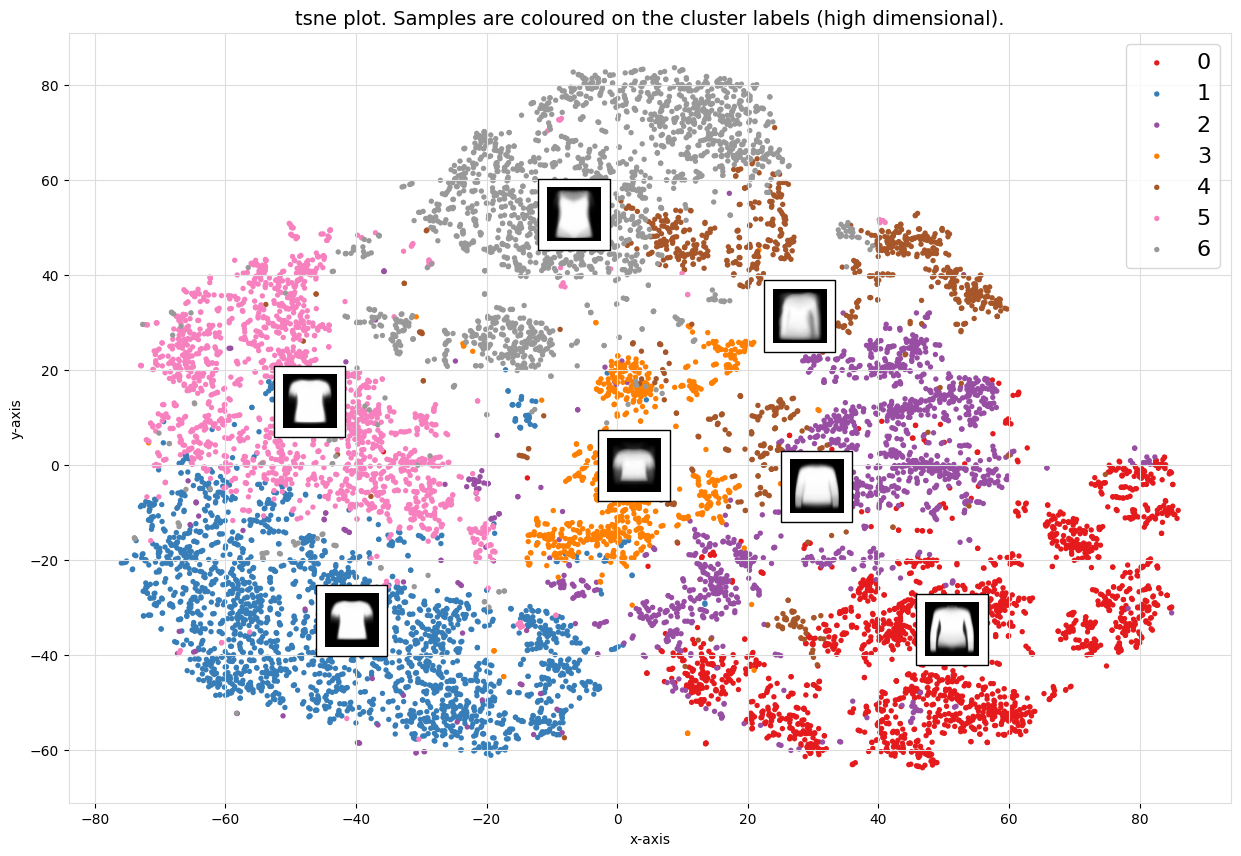

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [12]:
agglo_clust.scatter(zoom=0.3,img_mean = True)

In [10]:
import pickle

In [11]:
def make_files(p,name):
    set_logger(100)
    pathnames = os.listdir(p)
    arr = {}
    k = None
    cl.verbose = 0
    
    for i in tqdm(pathnames):
        try:
            img = cl.imread(f'{p}/{i}', dim=(128,128), colorscale=0,flatten=True)
            result = agglo_clust.find(img)

            f = [*result.keys()][1]
            k = result[f]
            clust_id = k['labels'][0]
            if clust_id not in arr:
                arr[clust_id] = [i]
            else:
                arr[clust_id].append(i)
        except:
            print(i)

    with open(f'file2_{name}.pkl', 'wb') as f:
        pickle.dump(arr, f)
    with open(f'file2_{name}.pkl', 'rb') as f:
        clusts = pickle.load(f)
    print(os.getcwd())
    print(os.listdir())
    os.mkdir('data3')
    for i in clusts:
        f = open(f'data/data3/{name}{i}.txt','w')
        for j in clusts[i]:
            f.write(f'{j} {j}\n')
        f.close()
    set_logger(20)

In [12]:
!ls

Agglo_Clust.png      file2_test.pkl	   run.py
a.py		     file2_train.pkl	   saved_dictionary.pkl
checkpoints	     file.pkl		   sync_batchnorm
cluster data.ipynb   f.txt		   temp.py
clustering_train.py  get_norm_const.py	   tensorboard
cluster.py	     Kmeans_Clust.png	   test_condition.py
cp_dataset.py	     k.py		   test_generator.py
cp_dataset_test.py   network_generator.py  t.ipynb
data		     networks.py	   train_condition.py
err2.txt	     Notebook.ipynb	   train_generator.py
error.txt	     output		   training_clusters.txt
err.txt		     output.txt		   train_saved_dictionary.pkl
eval_models	     out.txt		   Untitled.ipynb
evaluate.py	     __pycache__	   utils.py
figures		     README.md


In [ ]:
%timeit make_files("data/train/cloth-mask/", 'train')


  0%|                                                                             | 0/11647 [00:00<?, ?it/s]

[pca] >Column labels are auto-completed.
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm   ] [0.00 sec] [RSS: 1.70524e-06] [loc=1917.249 scale=225.646]
[distfit] >[expon  ] [0.00 sec] [RSS: 2.61178e-05] [loc=0.000 scale=1917.249]
[distfit] >[uniform] [0.00 sec] [RSS: 2.1359e-05] [loc=0.000 scale=2573.341]
[distfit] >[gamma  ] [7.95 sec] [RSS: 2.215e-06] [loc=-4178.865 scale=9.324]



  0%|                                                                | 1/11647 [01:52<364:42:13, 112.74s/it]

[distfit] >[t      ] [26.8 sec] [RSS: 1.24049e-06] [loc=1943.436 scale=217.794]
[distfit] >Compute confidence interval [parametric]



  0%|                                                                 | 2/11647 [01:53<150:40:38, 46.58s/it]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 3/11647 [01:53<82:10:22, 25.41s/it]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 4/11647 [01:53<49:59:07, 15.46s/it]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 5/11647 [01:53<32:12:05,  9.96s/it]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 6/11647 [01:53<21:28:51,  6.64s/it]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 7/11647 [01:54<14:41:18,  4.54s/it]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 8/11647 [01:54<10:13:41,  3.16s/it]

[pca] >Column labels are auto-completed.



  0%|                                                                   | 9/11647 [01:54<7:14:20,  2.24s/it]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                  | 11/11647 [01:54<3:48:31,  1.18s/it]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 12/11647 [01:55<2:51:34,  1.13it/s]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 13/11647 [01:55<2:11:45,  1.47it/s]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 14/11647 [01:55<1:44:35,  1.85it/s]

[pca] >Column labels are auto-completed.



  0%|                                                                  | 15/11647 [01:55<1:25:08,  2.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                  | 17/11647 [01:56<1:01:49,  3.13it/s]

[pca] >Column labels are auto-completed.



  0%|                                                                    | 18/11647 [01:56<55:43,  3.48it/s]

[pca] >Column labels are auto-completed.



  0%|                                                                    | 19/11647 [01:56<51:01,  3.80it/s]

[pca] >Column labels are auto-completed.



  0%|                                                                    | 20/11647 [01:56<48:20,  4.01it/s]

[pca] >Column labels are auto-completed.



  0%|                                                                    | 21/11647 [01:56<47:02,  4.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 23/11647 [01:57<43:10,  4.49it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 24/11647 [01:57<42:45,  4.53it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 25/11647 [01:57<42:03,  4.61it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 26/11647 [01:58<41:27,  4.67it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 27/11647 [01:58<42:20,  4.57it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 28/11647 [01:58<42:09,  4.59it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 29/11647 [01:58<41:39,  4.65it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 30/11647 [01:58<41:14,  4.69it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 31/11647 [01:59<41:07,  4.71it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 32/11647 [01:59<40:39,  4.76it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 33/11647 [01:59<40:36,  4.77it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 34/11647 [01:59<40:21,  4.80it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 35/11647 [01:59<40:15,  4.81it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 36/11647 [02:00<40:07,  4.82it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 37/11647 [02:00<41:52,  4.62it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 38/11647 [02:00<41:39,  4.64it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 39/11647 [02:00<41:34,  4.65it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 40/11647 [02:01<41:59,  4.61it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 41/11647 [02:01<41:52,  4.62it/s]

[pca] >Column labels are auto-completed.



  0%|▏                                                                   | 42/11647 [02:01<42:06,  4.59it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 43/11647 [02:01<42:29,  4.55it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 44/11647 [02:01<41:33,  4.65it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 45/11647 [02:02<41:57,  4.61it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 46/11647 [02:02<41:11,  4.69it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 47/11647 [02:02<41:02,  4.71it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 48/11647 [02:02<40:18,  4.80it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 49/11647 [02:02<40:25,  4.78it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 50/11647 [02:03<40:36,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▎                                                                   | 52/11647 [02:03<40:25,  4.78it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 53/11647 [02:03<40:49,  4.73it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 54/11647 [02:03<40:40,  4.75it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 55/11647 [02:04<40:28,  4.77it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 56/11647 [02:04<40:27,  4.78it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 57/11647 [02:04<40:48,  4.73it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 58/11647 [02:04<40:52,  4.73it/s]

[pca] >Column labels are auto-completed.



  1%|▎                                                                   | 59/11647 [02:05<40:39,  4.75it/s]

[pca] >Column labels are auto-completed.



  1%|▎                                                                   | 60/11647 [02:05<41:06,  4.70it/s]

[pca] >Column labels are auto-completed.



  1%|▎                                                                   | 61/11647 [02:05<41:47,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▎                                                                   | 63/11647 [02:05<40:37,  4.75it/s]

[pca] >Column labels are auto-completed.



  1%|▎                                                                   | 64/11647 [02:06<40:03,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 66/11647 [02:06<40:03,  4.82it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 67/11647 [02:06<40:07,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 69/11647 [02:07<40:08,  4.81it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 70/11647 [02:07<41:35,  4.64it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 71/11647 [02:07<40:50,  4.72it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 72/11647 [02:07<40:37,  4.75it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 73/11647 [02:07<40:49,  4.72it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 74/11647 [02:08<40:14,  4.79it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 75/11647 [02:08<40:09,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 77/11647 [02:08<40:40,  4.74it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 78/11647 [02:09<40:44,  4.73it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 79/11647 [02:09<41:45,  4.62it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 80/11647 [02:09<41:47,  4.61it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 81/11647 [02:09<41:08,  4.69it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 82/11647 [02:09<40:29,  4.76it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 83/11647 [02:10<41:22,  4.66it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 84/11647 [02:10<41:11,  4.68it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 85/11647 [02:10<41:21,  4.66it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 86/11647 [02:10<41:04,  4.69it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 87/11647 [02:10<41:29,  4.64it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 88/11647 [02:11<41:26,  4.65it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 89/11647 [02:11<40:35,  4.75it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 90/11647 [02:11<40:38,  4.74it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 91/11647 [02:11<41:01,  4.70it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 92/11647 [02:12<41:31,  4.64it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 93/11647 [02:12<41:09,  4.68it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 94/11647 [02:12<41:08,  4.68it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 95/11647 [02:12<40:57,  4.70it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 96/11647 [02:12<40:34,  4.74it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 97/11647 [02:13<40:12,  4.79it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 98/11647 [02:13<40:07,  4.80it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 99/11647 [02:13<39:41,  4.85it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                  | 100/11647 [02:13<39:51,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                  | 102/11647 [02:14<39:47,  4.83it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                  | 103/11647 [02:14<39:55,  4.82it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                  | 104/11647 [02:14<40:18,  4.77it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                  | 105/11647 [02:14<40:18,  4.77it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                  | 106/11647 [02:14<40:39,  4.73it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                  | 107/11647 [02:15<40:34,  4.74it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                  | 108/11647 [02:15<40:14,  4.78it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 109/11647 [02:15<40:11,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 111/11647 [02:15<40:19,  4.77it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 112/11647 [02:16<39:51,  4.82it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 113/11647 [02:16<39:52,  4.82it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 114/11647 [02:16<39:51,  4.82it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 115/11647 [02:16<40:22,  4.76it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 116/11647 [02:17<42:51,  4.48it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 117/11647 [02:17<42:17,  4.54it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 118/11647 [02:17<42:43,  4.50it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 120/11647 [02:17<40:46,  4.71it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 121/11647 [02:18<40:25,  4.75it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 122/11647 [02:18<40:05,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 124/11647 [02:18<41:10,  4.66it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 125/11647 [02:18<41:00,  4.68it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 126/11647 [02:19<40:57,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 128/11647 [02:19<40:10,  4.78it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 129/11647 [02:19<40:28,  4.74it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 130/11647 [02:20<40:13,  4.77it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 131/11647 [02:20<39:51,  4.81it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 132/11647 [02:20<40:27,  4.74it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 133/11647 [02:20<41:24,  4.63it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 134/11647 [02:20<41:27,  4.63it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 135/11647 [02:21<41:46,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 137/11647 [02:21<40:56,  4.69it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 138/11647 [02:21<41:25,  4.63it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 139/11647 [02:21<42:22,  4.53it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 140/11647 [02:22<43:24,  4.42it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 141/11647 [02:22<42:20,  4.53it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 142/11647 [02:22<41:58,  4.57it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 143/11647 [02:22<41:12,  4.65it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 144/11647 [02:23<40:36,  4.72it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 145/11647 [02:23<40:57,  4.68it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 146/11647 [02:23<41:37,  4.61it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 147/11647 [02:23<40:31,  4.73it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 148/11647 [02:23<40:29,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 150/11647 [02:24<39:09,  4.89it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 151/11647 [02:24<39:08,  4.89it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 152/11647 [02:24<39:41,  4.83it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 153/11647 [02:24<40:01,  4.79it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 154/11647 [02:25<40:15,  4.76it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 155/11647 [02:25<40:18,  4.75it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 156/11647 [02:25<40:10,  4.77it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 157/11647 [02:25<40:29,  4.73it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 158/11647 [02:25<40:33,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 160/11647 [02:26<39:30,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 162/11647 [02:26<39:15,  4.88it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 163/11647 [02:27<40:02,  4.78it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 164/11647 [02:27<41:13,  4.64it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 165/11647 [02:27<40:40,  4.71it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 166/11647 [02:27<41:05,  4.66it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 167/11647 [02:27<40:44,  4.70it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 168/11647 [02:28<40:08,  4.77it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 169/11647 [02:28<40:21,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 171/11647 [02:28<43:30,  4.40it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 172/11647 [02:28<42:21,  4.52it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 173/11647 [02:29<41:35,  4.60it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 175/11647 [02:29<40:06,  4.77it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 176/11647 [02:29<40:01,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 178/11647 [02:30<40:18,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 180/11647 [02:30<39:37,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 181/11647 [02:30<40:57,  4.67it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 182/11647 [02:31<41:18,  4.63it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 183/11647 [02:31<40:58,  4.66it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 184/11647 [02:31<40:44,  4.69it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 185/11647 [02:31<40:29,  4.72it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 186/11647 [02:31<40:22,  4.73it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 187/11647 [02:32<40:19,  4.74it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 188/11647 [02:32<40:23,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 190/11647 [02:32<39:36,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 191/11647 [02:32<39:31,  4.83it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 192/11647 [02:33<39:48,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 194/11647 [02:33<38:46,  4.92it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 195/11647 [02:33<38:55,  4.90it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 196/11647 [02:33<39:08,  4.88it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 197/11647 [02:34<39:37,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 199/11647 [02:34<39:13,  4.86it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 200/11647 [02:34<39:10,  4.87it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 201/11647 [02:34<39:06,  4.88it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 202/11647 [02:35<39:33,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 203/11647 [02:35<39:22,  4.84it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 204/11647 [02:35<39:35,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 205/11647 [02:35<39:23,  4.84it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 206/11647 [02:36<40:01,  4.76it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 207/11647 [02:36<40:39,  4.69it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 208/11647 [02:36<40:38,  4.69it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 209/11647 [02:36<40:21,  4.72it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 210/11647 [02:36<39:34,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 211/11647 [02:37<39:33,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 212/11647 [02:37<39:35,  4.81it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 213/11647 [02:37<39:47,  4.79it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 214/11647 [02:37<39:36,  4.81it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 215/11647 [02:37<43:03,  4.43it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 216/11647 [02:38<42:46,  4.45it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 217/11647 [02:38<41:26,  4.60it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 219/11647 [02:38<39:52,  4.78it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 220/11647 [02:39<40:12,  4.74it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 221/11647 [02:39<40:01,  4.76it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 222/11647 [02:39<40:41,  4.68it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 223/11647 [02:39<40:36,  4.69it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 224/11647 [02:39<40:13,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 226/11647 [02:40<39:36,  4.81it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 227/11647 [02:40<40:08,  4.74it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 228/11647 [02:40<39:55,  4.77it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 229/11647 [02:40<39:40,  4.80it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 230/11647 [02:41<41:00,  4.64it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 231/11647 [02:41<40:58,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 233/11647 [02:41<39:23,  4.83it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 234/11647 [02:41<39:19,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 236/11647 [02:42<38:44,  4.91it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 237/11647 [02:42<39:26,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 238/11647 [02:42<39:13,  4.85it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 239/11647 [02:42<40:06,  4.74it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 240/11647 [02:43<39:44,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 242/11647 [02:43<38:16,  4.97it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 243/11647 [02:43<38:29,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 245/11647 [02:44<38:55,  4.88it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 246/11647 [02:44<39:06,  4.86it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 247/11647 [02:44<39:25,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 248/11647 [02:44<39:23,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 249/11647 [02:45<40:31,  4.69it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 250/11647 [02:45<41:46,  4.55it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 251/11647 [02:45<41:15,  4.60it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 252/11647 [02:45<40:48,  4.65it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 253/11647 [02:45<40:05,  4.74it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 254/11647 [02:46<40:03,  4.74it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 255/11647 [02:46<40:32,  4.68it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 256/11647 [02:46<40:24,  4.70it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 257/11647 [02:46<40:14,  4.72it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 258/11647 [02:46<40:41,  4.67it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 259/11647 [02:47<40:42,  4.66it/s]

[pca] >Column labels are auto-completed.



  2%|█▍                                                                 | 260/11647 [02:47<40:12,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 262/11647 [02:47<39:45,  4.77it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 263/11647 [02:48<39:52,  4.76it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 264/11647 [02:48<39:47,  4.77it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 265/11647 [02:48<39:23,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 266/11647 [02:48<39:29,  4.80it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 267/11647 [02:48<39:22,  4.82it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 268/11647 [02:49<38:54,  4.87it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 269/11647 [02:49<38:56,  4.87it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 270/11647 [02:49<38:59,  4.86it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 271/11647 [02:49<38:53,  4.88it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 272/11647 [02:49<40:05,  4.73it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 273/11647 [02:50<40:15,  4.71it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 274/11647 [02:50<40:49,  4.64it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 275/11647 [02:50<40:08,  4.72it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 276/11647 [02:50<40:33,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 278/11647 [02:51<39:55,  4.75it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 279/11647 [02:51<39:47,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 281/11647 [02:51<38:59,  4.86it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 282/11647 [02:51<38:59,  4.86it/s]

[pca] >Column labels are auto-completed.



  2%|█▋                                                                 | 283/11647 [02:52<39:08,  4.84it/s]

[pca] >Column labels are auto-completed.



  2%|█▋                                                                 | 284/11647 [02:52<40:06,  4.72it/s]

[pca] >Column labels are auto-completed.



  2%|█▋                                                                 | 285/11647 [02:52<40:13,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▋                                                                 | 287/11647 [02:53<38:58,  4.86it/s]

[pca] >Column labels are auto-completed.



  2%|█▋                                                                 | 288/11647 [02:53<39:13,  4.83it/s]

[pca] >Column labels are auto-completed.



  2%|█▋                                                                 | 289/11647 [02:53<39:19,  4.81it/s]

[pca] >Column labels are auto-completed.



  2%|█▋                                                                 | 290/11647 [02:53<39:13,  4.83it/s]

[pca] >Column labels are auto-completed.



  2%|█▋                                                                 | 291/11647 [02:53<40:19,  4.69it/s]

[pca] >Column labels are auto-completed.



  3%|█▋                                                                 | 292/11647 [02:54<40:13,  4.71it/s]

[pca] >Column labels are auto-completed.



  3%|█▋                                                                 | 293/11647 [02:54<39:55,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 295/11647 [02:54<38:27,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 297/11647 [02:55<38:04,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 299/11647 [02:55<38:16,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 301/11647 [02:55<37:50,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 303/11647 [02:56<38:20,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 305/11647 [02:56<37:43,  5.01it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 306/11647 [02:56<37:54,  4.99it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 307/11647 [02:57<38:40,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 309/11647 [02:57<37:17,  5.07it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 310/11647 [02:57<37:55,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 312/11647 [02:58<37:44,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 314/11647 [02:58<37:52,  4.99it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 315/11647 [02:58<38:33,  4.90it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 316/11647 [02:58<38:37,  4.89it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 317/11647 [02:59<38:53,  4.86it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 318/11647 [02:59<39:11,  4.82it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 319/11647 [02:59<39:05,  4.83it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 320/11647 [02:59<39:34,  4.77it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 321/11647 [02:59<39:09,  4.82it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 322/11647 [03:00<39:32,  4.77it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 323/11647 [03:00<39:32,  4.77it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 324/11647 [03:00<39:29,  4.78it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 325/11647 [03:00<41:35,  4.54it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 326/11647 [03:01<40:44,  4.63it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 327/11647 [03:01<40:56,  4.61it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 328/11647 [03:01<41:01,  4.60it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 329/11647 [03:01<41:09,  4.58it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 330/11647 [03:01<40:45,  4.63it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 331/11647 [03:02<40:19,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 333/11647 [03:02<39:32,  4.77it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 334/11647 [03:02<39:28,  4.78it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 335/11647 [03:02<39:16,  4.80it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 336/11647 [03:03<39:11,  4.81it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 337/11647 [03:03<39:37,  4.76it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 338/11647 [03:03<39:40,  4.75it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 339/11647 [03:03<39:31,  4.77it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 340/11647 [03:04<40:03,  4.70it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 341/11647 [03:04<40:39,  4.63it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 342/11647 [03:04<40:00,  4.71it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 343/11647 [03:04<40:15,  4.68it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 344/11647 [03:04<40:00,  4.71it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 345/11647 [03:05<40:19,  4.67it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 346/11647 [03:05<39:52,  4.72it/s]

[pca] >Column labels are auto-completed.



  3%|█▉                                                                 | 347/11647 [03:05<40:16,  4.68it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 348/11647 [03:05<40:23,  4.66it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 349/11647 [03:05<40:46,  4.62it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 350/11647 [03:06<40:19,  4.67it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 351/11647 [03:06<39:42,  4.74it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 352/11647 [03:06<39:23,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 354/11647 [03:06<39:20,  4.78it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 355/11647 [03:07<40:33,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 357/11647 [03:07<38:48,  4.85it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 358/11647 [03:07<39:17,  4.79it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 359/11647 [03:08<39:33,  4.76it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 360/11647 [03:08<39:17,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 362/11647 [03:08<38:55,  4.83it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 363/11647 [03:08<39:12,  4.80it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 364/11647 [03:09<38:44,  4.85it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 365/11647 [03:09<39:05,  4.81it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 366/11647 [03:09<38:45,  4.85it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 367/11647 [03:09<38:44,  4.85it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 368/11647 [03:09<38:58,  4.82it/s]

[pca] >Column labels are auto-completed.



  3%|██                                                                 | 369/11647 [03:10<39:07,  4.80it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 370/11647 [03:10<39:12,  4.79it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 371/11647 [03:10<40:20,  4.66it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 372/11647 [03:10<39:44,  4.73it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 373/11647 [03:10<39:32,  4.75it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 374/11647 [03:11<39:58,  4.70it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 375/11647 [03:11<40:02,  4.69it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 376/11647 [03:11<39:50,  4.72it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 377/11647 [03:11<39:56,  4.70it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 378/11647 [03:12<39:57,  4.70it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 379/11647 [03:12<39:24,  4.77it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 380/11647 [03:12<39:28,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 382/11647 [03:12<38:07,  4.92it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 383/11647 [03:13<39:03,  4.81it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 384/11647 [03:13<39:04,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 386/11647 [03:13<38:24,  4.89it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 387/11647 [03:13<39:16,  4.78it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 388/11647 [03:14<40:38,  4.62it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 389/11647 [03:14<40:25,  4.64it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 390/11647 [03:14<40:19,  4.65it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 391/11647 [03:14<40:55,  4.58it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 392/11647 [03:14<40:45,  4.60it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 393/11647 [03:15<40:04,  4.68it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 394/11647 [03:15<39:54,  4.70it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 395/11647 [03:15<40:00,  4.69it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 396/11647 [03:15<40:23,  4.64it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 397/11647 [03:16<41:11,  4.55it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 399/11647 [03:16<39:52,  4.70it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 400/11647 [03:16<40:05,  4.68it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 401/11647 [03:16<39:58,  4.69it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 402/11647 [03:17<40:00,  4.68it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 403/11647 [03:17<40:03,  4.68it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 404/11647 [03:17<39:31,  4.74it/s]

[pca] >Column labels are auto-completed.



  3%|██▎                                                                | 405/11647 [03:17<39:06,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 407/11647 [03:18<38:47,  4.83it/s]

[pca] >Column labels are auto-completed.



  4%|██▎                                                                | 408/11647 [03:18<39:41,  4.72it/s]

[pca] >Column labels are auto-completed.



  4%|██▎                                                                | 409/11647 [03:18<39:55,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▎                                                                | 410/11647 [03:18<39:53,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▎                                                                | 411/11647 [03:19<40:15,  4.65it/s]

[pca] >Column labels are auto-completed.



  4%|██▎                                                                | 412/11647 [03:19<40:39,  4.61it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 413/11647 [03:19<40:46,  4.59it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 414/11647 [03:19<41:08,  4.55it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 415/11647 [03:19<40:29,  4.62it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 416/11647 [03:20<40:11,  4.66it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 417/11647 [03:20<40:52,  4.58it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 418/11647 [03:20<40:52,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 420/11647 [03:20<40:27,  4.62it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 421/11647 [03:21<39:50,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 422/11647 [03:21<41:19,  4.53it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 423/11647 [03:21<41:26,  4.51it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 424/11647 [03:21<41:14,  4.54it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 425/11647 [03:22<40:21,  4.64it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 426/11647 [03:22<40:55,  4.57it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 427/11647 [03:22<41:02,  4.56it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 428/11647 [03:22<40:43,  4.59it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 429/11647 [03:22<40:50,  4.58it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 430/11647 [03:23<39:51,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 431/11647 [03:23<39:45,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 432/11647 [03:23<40:13,  4.65it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 433/11647 [03:23<39:48,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 434/11647 [03:24<41:39,  4.49it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 435/11647 [03:24<41:03,  4.55it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 436/11647 [03:24<39:53,  4.68it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 437/11647 [03:24<40:06,  4.66it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 438/11647 [03:24<39:48,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 439/11647 [03:25<41:02,  4.55it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 440/11647 [03:25<40:25,  4.62it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 441/11647 [03:25<39:48,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 442/11647 [03:25<39:59,  4.67it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 443/11647 [03:25<39:48,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 444/11647 [03:26<39:27,  4.73it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 445/11647 [03:26<39:41,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 446/11647 [03:26<39:51,  4.68it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 447/11647 [03:26<39:44,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 448/11647 [03:27<39:41,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 449/11647 [03:27<39:11,  4.76it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 450/11647 [03:27<39:28,  4.73it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 451/11647 [03:27<39:46,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 453/11647 [03:28<38:49,  4.81it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 454/11647 [03:28<39:00,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 456/11647 [03:28<39:00,  4.78it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 457/11647 [03:28<39:20,  4.74it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 458/11647 [03:29<40:53,  4.56it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 459/11647 [03:29<40:23,  4.62it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 460/11647 [03:29<40:38,  4.59it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 461/11647 [03:29<39:50,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 463/11647 [03:30<38:37,  4.83it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 464/11647 [03:30<38:46,  4.81it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 465/11647 [03:30<38:49,  4.80it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 466/11647 [03:30<38:59,  4.78it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 467/11647 [03:31<39:04,  4.77it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 468/11647 [03:31<39:00,  4.78it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 469/11647 [03:31<39:00,  4.78it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 470/11647 [03:31<39:00,  4.78it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 471/11647 [03:31<38:31,  4.83it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 472/11647 [03:32<38:30,  4.84it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 473/11647 [03:32<38:52,  4.79it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 474/11647 [03:32<39:41,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 475/11647 [03:32<40:13,  4.63it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 476/11647 [03:32<39:49,  4.67it/s]

[pca] >Column labels are auto-completed.



  4%|██▋                                                                | 477/11647 [03:33<39:49,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 479/11647 [03:33<38:50,  4.79it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 480/11647 [03:33<38:59,  4.77it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 481/11647 [03:33<39:37,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 482/11647 [03:34<39:33,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 483/11647 [03:34<39:18,  4.73it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 484/11647 [03:34<39:17,  4.73it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 485/11647 [03:34<39:07,  4.76it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 486/11647 [03:35<39:12,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 488/11647 [03:35<38:25,  4.84it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 489/11647 [03:35<38:44,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 491/11647 [03:36<39:02,  4.76it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 492/11647 [03:36<39:22,  4.72it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 493/11647 [03:36<39:32,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 494/11647 [03:36<39:54,  4.66it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 495/11647 [03:36<39:42,  4.68it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 496/11647 [03:37<39:46,  4.67it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 497/11647 [03:37<39:54,  4.66it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 498/11647 [03:37<48:05,  3.86it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 499/11647 [03:37<45:18,  4.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 501/11647 [03:38<41:39,  4.46it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 502/11647 [03:38<41:10,  4.51it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 503/11647 [03:38<41:33,  4.47it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 504/11647 [03:38<40:35,  4.58it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 505/11647 [03:39<40:10,  4.62it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 506/11647 [03:39<39:52,  4.66it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 507/11647 [03:39<39:23,  4.71it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 508/11647 [03:39<38:59,  4.76it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 509/11647 [03:40<38:59,  4.76it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 510/11647 [03:40<38:47,  4.79it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 511/11647 [03:40<39:32,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 512/11647 [03:40<39:31,  4.69it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 513/11647 [03:40<39:23,  4.71it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 514/11647 [03:41<39:17,  4.72it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 515/11647 [03:41<39:05,  4.75it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 516/11647 [03:41<40:07,  4.62it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 517/11647 [03:41<39:29,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 518/11647 [03:41<39:13,  4.73it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 519/11647 [03:42<40:02,  4.63it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 520/11647 [03:42<39:45,  4.66it/s]

[pca] >Column labels are auto-completed.



  4%|██▉                                                                | 521/11647 [03:42<39:29,  4.70it/s]

[pca] >Column labels are auto-completed.



  4%|███                                                                | 522/11647 [03:42<39:37,  4.68it/s]

[pca] >Column labels are auto-completed.



  4%|███                                                                | 523/11647 [03:43<39:17,  4.72it/s]

[pca] >Column labels are auto-completed.



  4%|███                                                                | 524/11647 [03:43<39:52,  4.65it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 525/11647 [03:43<39:42,  4.67it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 526/11647 [03:43<39:40,  4.67it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 527/11647 [03:43<38:49,  4.77it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 528/11647 [03:44<38:29,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 530/11647 [03:44<38:08,  4.86it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 531/11647 [03:44<38:14,  4.84it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 532/11647 [03:44<38:27,  4.82it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 533/11647 [03:45<38:36,  4.80it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 534/11647 [03:45<39:10,  4.73it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 535/11647 [03:45<39:07,  4.73it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 536/11647 [03:45<39:30,  4.69it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 537/11647 [03:45<39:50,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 539/11647 [03:46<38:08,  4.85it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 540/11647 [03:46<38:11,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 542/11647 [03:46<37:38,  4.92it/s]

[pca] >Column labels are auto-completed.



  5%|███                                                                | 543/11647 [03:47<37:50,  4.89it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 544/11647 [03:47<38:28,  4.81it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 545/11647 [03:47<38:19,  4.83it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 546/11647 [03:47<38:27,  4.81it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 547/11647 [03:47<38:24,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 549/11647 [03:48<38:36,  4.79it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 550/11647 [03:48<38:40,  4.78it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 551/11647 [03:48<38:49,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 553/11647 [03:49<38:32,  4.80it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 554/11647 [03:49<38:16,  4.83it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 555/11647 [03:49<38:13,  4.84it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 556/11647 [03:49<38:37,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 558/11647 [03:50<38:10,  4.84it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 559/11647 [03:50<39:30,  4.68it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 560/11647 [03:50<40:12,  4.60it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 561/11647 [03:50<39:43,  4.65it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 562/11647 [03:51<39:13,  4.71it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 563/11647 [03:51<39:10,  4.72it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 564/11647 [03:51<39:02,  4.73it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 565/11647 [03:51<38:32,  4.79it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 566/11647 [03:51<38:34,  4.79it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 567/11647 [03:52<39:06,  4.72it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 568/11647 [03:52<38:35,  4.78it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 569/11647 [03:52<39:13,  4.71it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 570/11647 [03:52<44:11,  4.18it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 571/11647 [03:53<42:15,  4.37it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 572/11647 [03:53<40:47,  4.53it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 573/11647 [03:53<40:13,  4.59it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 574/11647 [03:53<40:01,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 576/11647 [03:54<37:46,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 578/11647 [03:54<38:16,  4.82it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 579/11647 [03:54<38:53,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 581/11647 [03:55<38:01,  4.85it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 582/11647 [03:55<37:51,  4.87it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 583/11647 [03:55<38:25,  4.80it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 584/11647 [03:55<41:35,  4.43it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 585/11647 [03:56<41:01,  4.49it/s]

[pca] >Column labels are auto-completed.



  5%|███▎                                                               | 586/11647 [03:56<40:06,  4.60it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 587/11647 [03:56<39:51,  4.62it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 588/11647 [03:56<39:50,  4.63it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 589/11647 [03:56<39:30,  4.66it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 590/11647 [03:57<39:17,  4.69it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 591/11647 [03:57<39:42,  4.64it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 592/11647 [03:57<39:00,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 594/11647 [03:57<39:09,  4.70it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 595/11647 [03:58<38:48,  4.75it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 596/11647 [03:58<38:26,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 598/11647 [03:58<38:11,  4.82it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 599/11647 [03:59<38:12,  4.82it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 600/11647 [03:59<38:41,  4.76it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 601/11647 [03:59<38:59,  4.72it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 602/11647 [03:59<39:02,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 604/11647 [04:00<38:37,  4.76it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 605/11647 [04:00<38:35,  4.77it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 606/11647 [04:00<38:10,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 608/11647 [04:00<37:51,  4.86it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 609/11647 [04:01<38:00,  4.84it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 610/11647 [04:01<39:15,  4.69it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 611/11647 [04:01<39:21,  4.67it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 612/11647 [04:01<39:21,  4.67it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 613/11647 [04:01<39:04,  4.71it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 614/11647 [04:02<38:33,  4.77it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 615/11647 [04:02<38:30,  4.77it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 616/11647 [04:02<39:13,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 618/11647 [04:03<39:24,  4.66it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 619/11647 [04:03<39:08,  4.70it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 620/11647 [04:03<38:54,  4.72it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 621/11647 [04:03<39:31,  4.65it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 622/11647 [04:03<40:15,  4.56it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 623/11647 [04:04<39:16,  4.68it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 624/11647 [04:04<38:43,  4.74it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 625/11647 [04:04<38:45,  4.74it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 626/11647 [04:04<38:52,  4.73it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 627/11647 [04:04<39:16,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 629/11647 [04:05<38:02,  4.83it/s]

[pca] >Column labels are auto-completed.



  5%|███▌                                                               | 630/11647 [04:05<37:55,  4.84it/s]

[pca] >Column labels are auto-completed.



  5%|███▋                                                               | 631/11647 [04:05<37:57,  4.84it/s]

[pca] >Column labels are auto-completed.



  5%|███▋                                                               | 632/11647 [04:05<38:03,  4.82it/s]

[pca] >Column labels are auto-completed.



  5%|███▋                                                               | 633/11647 [04:06<38:58,  4.71it/s]

[pca] >Column labels are auto-completed.



  5%|███▋                                                               | 634/11647 [04:06<38:33,  4.76it/s]

[pca] >Column labels are auto-completed.



  5%|███▋                                                               | 635/11647 [04:06<38:38,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▋                                                               | 637/11647 [04:07<37:15,  4.92it/s]

[pca] >Column labels are auto-completed.



  5%|███▋                                                               | 638/11647 [04:07<37:43,  4.86it/s]

[pca] >Column labels are auto-completed.



  5%|███▋                                                               | 639/11647 [04:07<38:31,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▋                                                               | 641/11647 [04:07<37:50,  4.85it/s]

[pca] >Column labels are auto-completed.



  6%|███▋                                                               | 642/11647 [04:08<37:36,  4.88it/s]

[pca] >Column labels are auto-completed.



  6%|███▋                                                               | 643/11647 [04:08<37:47,  4.85it/s]

[pca] >Column labels are auto-completed.



  6%|███▋                                                               | 644/11647 [04:08<37:54,  4.84it/s]

[pca] >Column labels are auto-completed.



  6%|███▋                                                               | 645/11647 [04:08<37:32,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▋                                                               | 647/11647 [04:09<37:48,  4.85it/s]

[pca] >Column labels are auto-completed.



  6%|███▋                                                               | 648/11647 [04:09<38:03,  4.82it/s]

[pca] >Column labels are auto-completed.



  6%|███▋                                                               | 649/11647 [04:09<37:47,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▋                                                               | 651/11647 [04:09<38:12,  4.80it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 652/11647 [04:10<37:53,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 654/11647 [04:10<37:56,  4.83it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 655/11647 [04:10<37:40,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 657/11647 [04:11<37:34,  4.87it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 658/11647 [04:11<37:46,  4.85it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 659/11647 [04:11<38:08,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 661/11647 [04:11<37:20,  4.90it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 662/11647 [04:12<37:21,  4.90it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 663/11647 [04:12<38:21,  4.77it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 664/11647 [04:12<38:20,  4.77it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 665/11647 [04:12<38:05,  4.80it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 666/11647 [04:12<38:04,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 668/11647 [04:13<37:34,  4.87it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 669/11647 [04:13<38:08,  4.80it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 670/11647 [04:13<38:20,  4.77it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 671/11647 [04:14<37:55,  4.82it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 672/11647 [04:14<38:20,  4.77it/s]

[pca] >Column labels are auto-completed.



  6%|███▊                                                               | 673/11647 [04:14<37:57,  4.82it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 674/11647 [04:14<44:24,  4.12it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 675/11647 [04:14<42:50,  4.27it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 676/11647 [04:15<41:28,  4.41it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 677/11647 [04:15<40:09,  4.55it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 678/11647 [04:15<39:33,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 680/11647 [04:16<37:51,  4.83it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 681/11647 [04:16<38:16,  4.77it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 682/11647 [04:16<37:58,  4.81it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 683/11647 [04:16<37:39,  4.85it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 684/11647 [04:16<37:31,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 686/11647 [04:17<36:54,  4.95it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 687/11647 [04:17<37:01,  4.93it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 688/11647 [04:17<37:08,  4.92it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 689/11647 [04:17<37:41,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 691/11647 [04:18<36:56,  4.94it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 692/11647 [04:18<37:06,  4.92it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 693/11647 [04:18<37:19,  4.89it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 694/11647 [04:18<37:30,  4.87it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 695/11647 [04:19<37:36,  4.85it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 696/11647 [04:19<37:58,  4.81it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 697/11647 [04:19<38:14,  4.77it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 698/11647 [04:19<38:21,  4.76it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 699/11647 [04:19<37:47,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 701/11647 [04:20<37:06,  4.92it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 702/11647 [04:20<37:10,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 704/11647 [04:20<37:56,  4.81it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 705/11647 [04:21<38:31,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 707/11647 [04:21<37:27,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 709/11647 [04:21<37:26,  4.87it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 710/11647 [04:22<37:51,  4.81it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 711/11647 [04:22<37:33,  4.85it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 712/11647 [04:22<38:02,  4.79it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 713/11647 [04:22<38:17,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 715/11647 [04:23<37:12,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 717/11647 [04:23<38:10,  4.77it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 718/11647 [04:23<38:05,  4.78it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 719/11647 [04:24<38:46,  4.70it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 720/11647 [04:24<38:34,  4.72it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 721/11647 [04:24<38:00,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 723/11647 [04:24<37:07,  4.90it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 724/11647 [04:25<39:09,  4.65it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 725/11647 [04:25<38:54,  4.68it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 726/11647 [04:25<39:44,  4.58it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 727/11647 [04:25<38:45,  4.69it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 728/11647 [04:25<38:17,  4.75it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 729/11647 [04:26<38:15,  4.76it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 730/11647 [04:26<38:29,  4.73it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 731/11647 [04:26<37:59,  4.79it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 732/11647 [04:26<37:53,  4.80it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 733/11647 [04:27<40:55,  4.44it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 734/11647 [04:27<40:10,  4.53it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 735/11647 [04:27<39:14,  4.63it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 736/11647 [04:27<38:41,  4.70it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 737/11647 [04:27<38:53,  4.68it/s]

[pca] >Column labels are auto-completed.



  6%|████▏                                                              | 738/11647 [04:28<40:36,  4.48it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 739/11647 [04:28<41:14,  4.41it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 741/11647 [04:28<39:16,  4.63it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 742/11647 [04:29<39:49,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 744/11647 [04:29<37:33,  4.84it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 745/11647 [04:29<37:41,  4.82it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 746/11647 [04:29<37:49,  4.80it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 747/11647 [04:30<37:56,  4.79it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 748/11647 [04:30<38:31,  4.72it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 749/11647 [04:30<38:26,  4.73it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 750/11647 [04:30<38:01,  4.78it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 751/11647 [04:30<37:43,  4.81it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 752/11647 [04:31<38:09,  4.76it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 753/11647 [04:31<37:55,  4.79it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 754/11647 [04:31<37:40,  4.82it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 755/11647 [04:31<38:11,  4.75it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 756/11647 [04:31<38:17,  4.74it/s]

[pca] >Column labels are auto-completed.



  6%|████▎                                                              | 757/11647 [04:32<38:22,  4.73it/s]

[pca] >Column labels are auto-completed.



  7%|████▎                                                              | 758/11647 [04:32<38:07,  4.76it/s]

[pca] >Column labels are auto-completed.



  7%|████▎                                                              | 759/11647 [04:32<37:57,  4.78it/s]

[pca] >Column labels are auto-completed.



  7%|████▎                                                              | 760/11647 [04:32<38:14,  4.75it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 761/11647 [04:32<38:17,  4.74it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 762/11647 [04:33<37:59,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 764/11647 [04:33<37:09,  4.88it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 765/11647 [04:33<37:22,  4.85it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 766/11647 [04:33<38:01,  4.77it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 767/11647 [04:34<38:28,  4.71it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 768/11647 [04:34<38:58,  4.65it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 769/11647 [04:34<38:16,  4.74it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 770/11647 [04:34<38:55,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 772/11647 [04:35<38:42,  4.68it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 773/11647 [04:35<38:15,  4.74it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 774/11647 [04:35<37:58,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 776/11647 [04:36<37:33,  4.82it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 777/11647 [04:36<37:14,  4.86it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 778/11647 [04:36<37:28,  4.83it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 779/11647 [04:36<37:29,  4.83it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 780/11647 [04:36<37:51,  4.78it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 781/11647 [04:37<38:16,  4.73it/s]

[pca] >Column labels are auto-completed.



  7%|████▍                                                              | 782/11647 [04:37<37:32,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 784/11647 [04:37<37:13,  4.86it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 785/11647 [04:37<38:23,  4.72it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 786/11647 [04:38<38:12,  4.74it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 787/11647 [04:38<38:04,  4.75it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 788/11647 [04:38<38:31,  4.70it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 789/11647 [04:38<39:12,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 791/11647 [04:39<38:45,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 793/11647 [04:39<37:10,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 795/11647 [04:40<36:05,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 797/11647 [04:40<36:30,  4.95it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 798/11647 [04:40<36:54,  4.90it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 799/11647 [04:40<36:56,  4.89it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 800/11647 [04:41<37:07,  4.87it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 801/11647 [04:41<37:15,  4.85it/s]

[pca] >Column labels are auto-completed.



  7%|████▌                                                              | 802/11647 [04:41<37:17,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 804/11647 [04:41<36:49,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 806/11647 [04:42<36:00,  5.02it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 807/11647 [04:42<36:22,  4.97it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 808/11647 [04:42<36:40,  4.93it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 809/11647 [04:42<37:00,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 811/11647 [04:43<36:36,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 813/11647 [04:43<36:46,  4.91it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 814/11647 [04:43<38:00,  4.75it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 815/11647 [04:44<37:39,  4.79it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 816/11647 [04:44<37:38,  4.80it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 817/11647 [04:44<37:12,  4.85it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 818/11647 [04:44<37:39,  4.79it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 819/11647 [04:44<38:05,  4.74it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 820/11647 [04:45<37:51,  4.77it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 821/11647 [04:45<38:01,  4.74it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 822/11647 [04:45<37:34,  4.80it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 823/11647 [04:45<37:43,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 825/11647 [04:46<36:26,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 827/11647 [04:46<36:10,  4.98it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 828/11647 [04:46<36:13,  4.98it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 829/11647 [04:47<36:28,  4.94it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 830/11647 [04:47<36:36,  4.92it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 831/11647 [04:47<36:38,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 833/11647 [04:47<36:49,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 835/11647 [04:48<37:04,  4.86it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 836/11647 [04:48<37:09,  4.85it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 837/11647 [04:48<37:30,  4.80it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 838/11647 [04:48<38:03,  4.73it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 839/11647 [04:49<39:14,  4.59it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 840/11647 [04:49<38:46,  4.65it/s]

[pca] >Column labels are auto-completed.



  7%|████▊                                                              | 841/11647 [04:49<38:15,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 843/11647 [04:49<37:54,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 845/11647 [04:50<36:59,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 847/11647 [04:50<36:27,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 849/11647 [04:51<35:56,  5.01it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 850/11647 [04:51<36:09,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 852/11647 [04:51<35:48,  5.03it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 853/11647 [04:51<36:20,  4.95it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 854/11647 [04:52<36:44,  4.90it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 855/11647 [04:52<36:52,  4.88it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 856/11647 [04:52<39:01,  4.61it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 857/11647 [04:52<38:55,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 859/11647 [04:53<36:54,  4.87it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 860/11647 [04:53<37:09,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 862/11647 [04:53<36:47,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 864/11647 [04:54<37:22,  4.81it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 865/11647 [04:54<36:57,  4.86it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 866/11647 [04:54<36:52,  4.87it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 867/11647 [04:54<36:50,  4.88it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 868/11647 [04:55<36:51,  4.87it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 869/11647 [04:55<37:02,  4.85it/s]

[pca] >Column labels are auto-completed.



  7%|█████                                                              | 870/11647 [04:55<37:24,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|█████                                                              | 872/11647 [04:55<36:47,  4.88it/s]

[pca] >Column labels are auto-completed.



  7%|█████                                                              | 873/11647 [04:56<36:53,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 875/11647 [04:56<36:49,  4.88it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 876/11647 [04:56<37:08,  4.83it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 877/11647 [04:56<36:54,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 879/11647 [04:57<36:41,  4.89it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 880/11647 [04:57<36:47,  4.88it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 881/11647 [04:57<37:25,  4.79it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 882/11647 [04:57<37:19,  4.81it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 883/11647 [04:58<38:30,  4.66it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 884/11647 [04:58<38:43,  4.63it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 885/11647 [04:58<38:08,  4.70it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 886/11647 [04:58<37:32,  4.78it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 887/11647 [04:58<37:19,  4.80it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 888/11647 [04:59<38:13,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 890/11647 [04:59<38:36,  4.64it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 891/11647 [04:59<37:50,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 893/11647 [05:00<36:58,  4.85it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 894/11647 [05:00<36:52,  4.86it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 895/11647 [05:00<37:18,  4.80it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 896/11647 [05:00<38:10,  4.69it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 897/11647 [05:01<37:34,  4.77it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 898/11647 [05:01<37:40,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 900/11647 [05:01<37:03,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 902/11647 [05:02<35:49,  5.00it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 903/11647 [05:02<36:04,  4.96it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 904/11647 [05:02<36:16,  4.94it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 905/11647 [05:02<36:37,  4.89it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 906/11647 [05:02<37:22,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 908/11647 [05:03<37:24,  4.78it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 909/11647 [05:03<37:32,  4.77it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 910/11647 [05:03<37:51,  4.73it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 911/11647 [05:03<37:31,  4.77it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 912/11647 [05:04<37:57,  4.71it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 913/11647 [05:04<37:15,  4.80it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 914/11647 [05:04<37:01,  4.83it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 915/11647 [05:04<36:52,  4.85it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 916/11647 [05:05<37:53,  4.72it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 917/11647 [05:05<37:38,  4.75it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 918/11647 [05:05<37:45,  4.74it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 919/11647 [05:05<37:33,  4.76it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 920/11647 [05:05<37:11,  4.81it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 921/11647 [05:06<37:04,  4.82it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 922/11647 [05:06<37:14,  4.80it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 923/11647 [05:06<37:23,  4.78it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 924/11647 [05:06<37:27,  4.77it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 925/11647 [05:06<37:06,  4.82it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 926/11647 [05:07<36:47,  4.86it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 927/11647 [05:07<37:26,  4.77it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 928/11647 [05:07<37:15,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 930/11647 [05:07<36:23,  4.91it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 931/11647 [05:08<36:31,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 933/11647 [05:08<35:49,  4.98it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 934/11647 [05:08<36:46,  4.86it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 935/11647 [05:08<36:41,  4.87it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 936/11647 [05:09<36:21,  4.91it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 937/11647 [05:09<36:40,  4.87it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 938/11647 [05:09<36:31,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 940/11647 [05:09<36:32,  4.88it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 941/11647 [05:10<36:30,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 943/11647 [05:10<37:26,  4.77it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 944/11647 [05:10<37:38,  4.74it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 945/11647 [05:11<37:50,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 947/11647 [05:11<37:22,  4.77it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 948/11647 [05:11<37:43,  4.73it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 949/11647 [05:11<37:28,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 951/11647 [05:12<36:01,  4.95it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 952/11647 [05:12<36:27,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 954/11647 [05:12<35:33,  5.01it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 955/11647 [05:13<35:53,  4.97it/s]

[pca] >Column labels are auto-completed.



  8%|█████▍                                                             | 956/11647 [05:13<36:44,  4.85it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 957/11647 [05:13<36:54,  4.83it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 958/11647 [05:13<37:12,  4.79it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 959/11647 [05:13<37:30,  4.75it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 960/11647 [05:14<37:33,  4.74it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 961/11647 [05:14<37:35,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 963/11647 [05:14<36:30,  4.88it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 964/11647 [05:14<36:45,  4.84it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 965/11647 [05:15<36:39,  4.86it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 966/11647 [05:15<36:49,  4.83it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 967/11647 [05:15<36:38,  4.86it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 968/11647 [05:15<36:20,  4.90it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 969/11647 [05:15<36:28,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 971/11647 [05:16<36:15,  4.91it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 972/11647 [05:16<36:18,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 974/11647 [05:16<36:23,  4.89it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 975/11647 [05:17<36:23,  4.89it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 976/11647 [05:17<36:45,  4.84it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 977/11647 [05:17<36:52,  4.82it/s]

[pca] >Column labels are auto-completed.



  8%|█████▋                                                             | 978/11647 [05:17<38:03,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▋                                                             | 980/11647 [05:18<37:24,  4.75it/s]

[pca] >Column labels are auto-completed.



  8%|█████▋                                                             | 981/11647 [05:18<38:42,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▋                                                             | 983/11647 [05:18<37:47,  4.70it/s]

[pca] >Column labels are auto-completed.



  8%|█████▋                                                             | 984/11647 [05:19<37:29,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▋                                                             | 986/11647 [05:19<36:40,  4.84it/s]

[pca] >Column labels are auto-completed.



  8%|█████▋                                                             | 987/11647 [05:19<36:52,  4.82it/s]

[pca] >Column labels are auto-completed.



  8%|█████▋                                                             | 988/11647 [05:19<36:41,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                             | 990/11647 [05:20<37:00,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                             | 992/11647 [05:20<36:44,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                             | 994/11647 [05:21<36:16,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                             | 996/11647 [05:21<36:17,  4.89it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                             | 997/11647 [05:21<36:12,  4.90it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                             | 998/11647 [05:21<36:26,  4.87it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                             | 999/11647 [05:22<36:45,  4.83it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1000/11647 [05:22<37:06,  4.78it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1001/11647 [05:22<36:48,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                            | 1003/11647 [05:22<35:46,  4.96it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1004/11647 [05:23<36:44,  4.83it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1005/11647 [05:23<37:03,  4.79it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1006/11647 [05:23<37:19,  4.75it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1007/11647 [05:23<37:21,  4.75it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1008/11647 [05:24<37:20,  4.75it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1009/11647 [05:24<36:59,  4.79it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1010/11647 [05:24<37:06,  4.78it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1011/11647 [05:24<37:44,  4.70it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1012/11647 [05:24<37:23,  4.74it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1013/11647 [05:25<38:14,  4.64it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                            | 1014/11647 [05:25<37:52,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1016/11647 [05:25<37:04,  4.78it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1017/11647 [05:25<37:19,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1019/11647 [05:26<36:51,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1021/11647 [05:26<36:16,  4.88it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1022/11647 [05:26<36:33,  4.84it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1023/11647 [05:27<37:12,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1025/11647 [05:27<36:18,  4.88it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1026/11647 [05:27<36:12,  4.89it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1027/11647 [05:28<37:03,  4.78it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1028/11647 [05:28<37:16,  4.75it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1029/11647 [05:28<36:45,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1031/11647 [05:28<36:19,  4.87it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1032/11647 [05:29<44:37,  3.96it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1033/11647 [05:29<42:09,  4.20it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1034/11647 [05:29<40:52,  4.33it/s]

[pca] >Column labels are auto-completed.



  9%|█████▊                                                            | 1035/11647 [05:29<39:20,  4.50it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1037/11647 [05:30<38:02,  4.65it/s]

[pca] >Column labels are auto-completed.



  9%|█████▉                                                            | 1038/11647 [05:30<37:48,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1040/11647 [05:30<36:41,  4.82it/s]

[pca] >Column labels are auto-completed.



  9%|█████▉                                                            | 1041/11647 [05:31<36:23,  4.86it/s]

[pca] >Column labels are auto-completed.



  9%|█████▉                                                            | 1042/11647 [05:31<36:09,  4.89it/s]

[pca] >Column labels are auto-completed.



  9%|█████▉                                                            | 1043/11647 [05:31<36:56,  4.78it/s]

[pca] >Column labels are auto-completed.



  9%|█████▉                                                            | 1044/11647 [05:31<36:27,  4.85it/s]

[pca] >Column labels are auto-completed.



  9%|█████▉                                                            | 1045/11647 [05:31<37:52,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1047/11647 [05:32<36:54,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1049/11647 [05:32<36:42,  4.81it/s]

[pca] >Column labels are auto-completed.



  9%|█████▉                                                            | 1050/11647 [05:32<36:35,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1052/11647 [05:33<35:52,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1054/11647 [05:33<35:36,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1056/11647 [05:34<35:23,  4.99it/s]

[pca] >Column labels are auto-completed.



  9%|█████▉                                                            | 1057/11647 [05:34<37:07,  4.75it/s]

[pca] >Column labels are auto-completed.



  9%|█████▉                                                            | 1058/11647 [05:34<36:56,  4.78it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1059/11647 [05:34<36:40,  4.81it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1060/11647 [05:34<36:26,  4.84it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1061/11647 [05:35<36:41,  4.81it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1062/11647 [05:35<36:45,  4.80it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1063/11647 [05:35<36:33,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1065/11647 [05:35<35:21,  4.99it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1066/11647 [05:36<35:51,  4.92it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1067/11647 [05:36<36:08,  4.88it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1068/11647 [05:36<36:55,  4.78it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1069/11647 [05:36<36:44,  4.80it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1070/11647 [05:37<37:21,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1072/11647 [05:37<36:46,  4.79it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1073/11647 [05:37<36:39,  4.81it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1074/11647 [05:37<36:02,  4.89it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1075/11647 [05:38<36:47,  4.79it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1076/11647 [05:38<36:29,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1078/11647 [05:38<36:15,  4.86it/s]

[pca] >Column labels are auto-completed.



  9%|██████                                                            | 1079/11647 [05:38<36:05,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1081/11647 [05:39<35:24,  4.97it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1082/11647 [05:39<36:50,  4.78it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1083/11647 [05:39<37:27,  4.70it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1084/11647 [05:39<37:33,  4.69it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1085/11647 [05:40<37:11,  4.73it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1086/11647 [05:40<37:13,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1088/11647 [05:40<36:10,  4.87it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1089/11647 [05:40<36:08,  4.87it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1090/11647 [05:41<35:51,  4.91it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1091/11647 [05:41<38:16,  4.60it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1092/11647 [05:41<37:46,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1094/11647 [05:42<36:04,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1096/11647 [05:42<36:02,  4.88it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1097/11647 [05:42<36:07,  4.87it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1098/11647 [05:42<36:13,  4.85it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1099/11647 [05:43<36:11,  4.86it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1100/11647 [05:43<36:18,  4.84it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1101/11647 [05:43<36:18,  4.84it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1102/11647 [05:43<36:38,  4.80it/s]

[pca] >Column labels are auto-completed.



  9%|██████▎                                                           | 1103/11647 [05:43<37:14,  4.72it/s]

[pca] >Column labels are auto-completed.



  9%|██████▎                                                           | 1104/11647 [05:44<36:56,  4.76it/s]

[pca] >Column labels are auto-completed.



  9%|██████▎                                                           | 1105/11647 [05:44<37:32,  4.68it/s]

[pca] >Column labels are auto-completed.



  9%|██████▎                                                           | 1106/11647 [05:44<37:40,  4.66it/s]

[pca] >Column labels are auto-completed.



 10%|██████▎                                                           | 1107/11647 [05:44<37:25,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1109/11647 [05:45<36:21,  4.83it/s]

[pca] >Column labels are auto-completed.



 10%|██████▎                                                           | 1110/11647 [05:45<37:04,  4.74it/s]

[pca] >Column labels are auto-completed.



 10%|██████▎                                                           | 1111/11647 [05:45<36:40,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1113/11647 [05:45<35:38,  4.93it/s]

[pca] >Column labels are auto-completed.



 10%|██████▎                                                           | 1114/11647 [05:46<35:42,  4.92it/s]

[pca] >Column labels are auto-completed.



 10%|██████▎                                                           | 1115/11647 [05:46<35:54,  4.89it/s]

[pca] >Column labels are auto-completed.



 10%|██████▎                                                           | 1116/11647 [05:46<35:49,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1118/11647 [05:47<36:55,  4.75it/s]

[pca] >Column labels are auto-completed.



 10%|██████▎                                                           | 1119/11647 [05:47<37:00,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1121/11647 [05:47<35:57,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1123/11647 [05:48<34:59,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1125/11647 [05:48<35:01,  5.01it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1126/11647 [05:48<35:05,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1128/11647 [05:49<35:07,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1130/11647 [05:49<35:20,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1132/11647 [05:49<35:36,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1134/11647 [05:50<35:22,  4.95it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1135/11647 [05:50<36:04,  4.86it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1136/11647 [05:50<36:41,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1138/11647 [05:51<36:22,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1140/11647 [05:51<36:00,  4.86it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1141/11647 [05:51<36:14,  4.83it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1142/11647 [05:51<36:04,  4.85it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1143/11647 [05:52<36:11,  4.84it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1144/11647 [05:52<36:22,  4.81it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1145/11647 [05:52<36:19,  4.82it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1146/11647 [05:52<36:43,  4.77it/s]

[pca] >Column labels are auto-completed.



 10%|██████▍                                                           | 1147/11647 [05:52<36:23,  4.81it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1148/11647 [05:53<36:23,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1150/11647 [05:53<35:33,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1152/11647 [05:53<35:07,  4.98it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1153/11647 [05:54<35:36,  4.91it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1154/11647 [05:54<35:47,  4.89it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1155/11647 [05:54<35:35,  4.91it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1156/11647 [05:54<36:13,  4.83it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1157/11647 [05:54<36:18,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1159/11647 [05:55<37:12,  4.70it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1160/11647 [05:55<36:34,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1162/11647 [05:56<35:42,  4.89it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1163/11647 [05:56<35:34,  4.91it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1164/11647 [05:56<35:48,  4.88it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1165/11647 [05:56<36:15,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1167/11647 [05:57<35:25,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1169/11647 [05:57<35:15,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1171/11647 [05:57<34:41,  5.03it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1172/11647 [05:58<35:11,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1174/11647 [05:58<35:49,  4.87it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1175/11647 [05:58<35:51,  4.87it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1176/11647 [05:58<36:22,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1178/11647 [05:59<35:36,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1180/11647 [05:59<35:25,  4.92it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1181/11647 [05:59<36:35,  4.77it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1182/11647 [06:00<36:27,  4.78it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1183/11647 [06:00<36:06,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1185/11647 [06:00<35:18,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1187/11647 [06:01<35:21,  4.93it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1188/11647 [06:01<35:25,  4.92it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1189/11647 [06:01<35:43,  4.88it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1190/11647 [06:01<36:04,  4.83it/s]

[pca] >Column labels are auto-completed.



 10%|██████▋                                                           | 1191/11647 [06:01<35:39,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1193/11647 [06:02<35:17,  4.94it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1194/11647 [06:02<38:06,  4.57it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1195/11647 [06:02<37:22,  4.66it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1196/11647 [06:02<36:51,  4.72it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1197/11647 [06:03<37:45,  4.61it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1198/11647 [06:03<37:29,  4.64it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1199/11647 [06:03<37:05,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1201/11647 [06:04<36:07,  4.82it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1202/11647 [06:04<36:05,  4.82it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1203/11647 [06:04<35:44,  4.87it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1204/11647 [06:04<36:10,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1206/11647 [06:05<35:35,  4.89it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1207/11647 [06:05<35:39,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1209/11647 [06:05<35:28,  4.90it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1210/11647 [06:05<36:14,  4.80it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1211/11647 [06:06<36:55,  4.71it/s]

[pca] >Column labels are auto-completed.



 10%|██████▊                                                           | 1212/11647 [06:06<36:26,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▉                                                           | 1214/11647 [06:06<35:54,  4.84it/s]

[pca] >Column labels are auto-completed.



 10%|██████▉                                                           | 1215/11647 [06:06<35:45,  4.86it/s]

[pca] >Column labels are auto-completed.



 10%|██████▉                                                           | 1216/11647 [06:07<36:22,  4.78it/s]

[pca] >Column labels are auto-completed.



 10%|██████▉                                                           | 1217/11647 [06:07<35:54,  4.84it/s]

[pca] >Column labels are auto-completed.



 10%|██████▉                                                           | 1218/11647 [06:07<35:51,  4.85it/s]

[pca] >Column labels are auto-completed.



 10%|██████▉                                                           | 1219/11647 [06:07<36:04,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▉                                                           | 1221/11647 [06:08<35:27,  4.90it/s]

[pca] >Column labels are auto-completed.



 10%|██████▉                                                           | 1222/11647 [06:08<35:14,  4.93it/s]

[pca] >Column labels are auto-completed.



 11%|██████▉                                                           | 1223/11647 [06:08<36:03,  4.82it/s]

[pca] >Column labels are auto-completed.



 11%|██████▉                                                           | 1224/11647 [06:08<36:25,  4.77it/s]

[pca] >Column labels are auto-completed.



 11%|██████▉                                                           | 1225/11647 [06:09<36:41,  4.73it/s]

[pca] >Column labels are auto-completed.



 11%|██████▉                                                           | 1226/11647 [06:09<36:51,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|██████▉                                                           | 1228/11647 [06:09<35:26,  4.90it/s]

[pca] >Column labels are auto-completed.



 11%|██████▉                                                           | 1229/11647 [06:09<36:20,  4.78it/s]

[pca] >Column labels are auto-completed.



 11%|██████▉                                                           | 1230/11647 [06:10<36:23,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|██████▉                                                           | 1232/11647 [06:10<34:51,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|██████▉                                                           | 1234/11647 [06:10<34:58,  4.96it/s]

[pca] >Column labels are auto-completed.



 11%|██████▉                                                           | 1235/11647 [06:11<35:04,  4.95it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1236/11647 [06:11<35:16,  4.92it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1237/11647 [06:11<35:23,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1239/11647 [06:11<34:59,  4.96it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1240/11647 [06:12<38:09,  4.55it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1241/11647 [06:12<37:13,  4.66it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1242/11647 [06:12<36:44,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1244/11647 [06:12<35:19,  4.91it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1245/11647 [06:13<35:32,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1247/11647 [06:13<35:39,  4.86it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1248/11647 [06:13<35:44,  4.85it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1249/11647 [06:13<35:40,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1251/11647 [06:14<35:08,  4.93it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1252/11647 [06:14<35:11,  4.92it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1253/11647 [06:14<35:38,  4.86it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1254/11647 [06:14<36:19,  4.77it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1255/11647 [06:15<35:56,  4.82it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1256/11647 [06:15<35:48,  4.84it/s]

[pca] >Column labels are auto-completed.



 11%|███████                                                           | 1257/11647 [06:15<35:53,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1259/11647 [06:16<36:07,  4.79it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1260/11647 [06:16<36:09,  4.79it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1261/11647 [06:16<35:56,  4.82it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1262/11647 [06:16<35:54,  4.82it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1263/11647 [06:16<36:52,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1265/11647 [06:17<35:28,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1267/11647 [06:17<34:20,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1269/11647 [06:18<33:51,  5.11it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1270/11647 [06:18<34:21,  5.03it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1271/11647 [06:18<35:06,  4.92it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1272/11647 [06:18<35:03,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1274/11647 [06:19<34:50,  4.96it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1275/11647 [06:19<36:07,  4.78it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1276/11647 [06:19<35:54,  4.81it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1277/11647 [06:19<35:33,  4.86it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1278/11647 [06:19<35:19,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1280/11647 [06:20<34:36,  4.99it/s]

[pca] >Column labels are auto-completed.



 11%|███████▎                                                          | 1281/11647 [06:20<34:55,  4.95it/s]

[pca] >Column labels are auto-completed.



 11%|███████▎                                                          | 1282/11647 [06:20<34:58,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1284/11647 [06:21<37:52,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1286/11647 [06:21<36:17,  4.76it/s]

[pca] >Column labels are auto-completed.



 11%|███████▎                                                          | 1287/11647 [06:21<36:10,  4.77it/s]

[pca] >Column labels are auto-completed.



 11%|███████▎                                                          | 1288/11647 [06:21<35:56,  4.80it/s]

[pca] >Column labels are auto-completed.



 11%|███████▎                                                          | 1289/11647 [06:22<36:13,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1291/11647 [06:22<34:37,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1293/11647 [06:22<34:29,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1295/11647 [06:23<35:35,  4.85it/s]

[pca] >Column labels are auto-completed.



 11%|███████▎                                                          | 1296/11647 [06:23<35:57,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1298/11647 [06:23<35:01,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1300/11647 [06:24<35:32,  4.85it/s]

[pca] >Column labels are auto-completed.



 11%|███████▎                                                          | 1301/11647 [06:24<35:23,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1303/11647 [06:24<34:22,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1305/11647 [06:25<35:21,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1307/11647 [06:25<35:08,  4.90it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1308/11647 [06:26<35:07,  4.91it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1309/11647 [06:26<35:15,  4.89it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1310/11647 [06:26<35:18,  4.88it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1311/11647 [06:26<35:34,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1313/11647 [06:27<34:40,  4.97it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1314/11647 [06:27<36:50,  4.67it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1315/11647 [06:27<37:03,  4.65it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1316/11647 [06:27<36:41,  4.69it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1317/11647 [06:27<36:04,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1319/11647 [06:28<34:50,  4.94it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1320/11647 [06:28<35:09,  4.90it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1321/11647 [06:28<34:53,  4.93it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1322/11647 [06:28<34:55,  4.93it/s]

[pca] >Column labels are auto-completed.



 11%|███████▍                                                          | 1323/11647 [06:29<34:54,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1325/11647 [06:29<35:01,  4.91it/s]

[pca] >Column labels are auto-completed.



 11%|███████▌                                                          | 1326/11647 [06:29<35:10,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1328/11647 [06:30<35:17,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1330/11647 [06:30<35:24,  4.86it/s]

[pca] >Column labels are auto-completed.



 11%|███████▌                                                          | 1331/11647 [06:30<35:32,  4.84it/s]

[pca] >Column labels are auto-completed.



 11%|███████▌                                                          | 1332/11647 [06:30<35:12,  4.88it/s]

[pca] >Column labels are auto-completed.



 11%|███████▌                                                          | 1333/11647 [06:31<35:17,  4.87it/s]

[pca] >Column labels are auto-completed.



 11%|███████▌                                                          | 1334/11647 [06:31<35:45,  4.81it/s]

[pca] >Column labels are auto-completed.



 11%|███████▌                                                          | 1335/11647 [06:31<36:02,  4.77it/s]

[pca] >Column labels are auto-completed.



 11%|███████▌                                                          | 1336/11647 [06:31<38:55,  4.41it/s]

[pca] >Column labels are auto-completed.



 11%|███████▌                                                          | 1337/11647 [06:32<37:51,  4.54it/s]

[pca] >Column labels are auto-completed.



 11%|███████▌                                                          | 1338/11647 [06:32<37:23,  4.60it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▌                                                          | 1340/11647 [06:32<36:45,  4.67it/s]

[pca] >Column labels are auto-completed.



 12%|███████▌                                                          | 1341/11647 [06:32<36:25,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▌                                                          | 1343/11647 [06:33<35:42,  4.81it/s]

[pca] >Column labels are auto-completed.



 12%|███████▌                                                          | 1344/11647 [06:33<36:13,  4.74it/s]

[pca] >Column labels are auto-completed.



 12%|███████▌                                                          | 1345/11647 [06:33<36:20,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1347/11647 [06:34<35:21,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1349/11647 [06:34<35:03,  4.90it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1350/11647 [06:34<35:30,  4.83it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1351/11647 [06:34<35:02,  4.90it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1352/11647 [06:35<35:18,  4.86it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1353/11647 [06:35<35:51,  4.79it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1354/11647 [06:35<36:04,  4.75it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1355/11647 [06:35<36:08,  4.75it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1356/11647 [06:36<35:59,  4.77it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1357/11647 [06:36<35:52,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1359/11647 [06:36<35:26,  4.84it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1360/11647 [06:36<35:13,  4.87it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1361/11647 [06:37<35:04,  4.89it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1362/11647 [06:37<35:37,  4.81it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1363/11647 [06:37<35:32,  4.82it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1364/11647 [06:37<35:58,  4.76it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1365/11647 [06:37<35:55,  4.77it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1366/11647 [06:38<35:56,  4.77it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1367/11647 [06:38<36:03,  4.75it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1368/11647 [06:38<36:00,  4.76it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1369/11647 [06:38<35:52,  4.77it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1370/11647 [06:38<35:54,  4.77it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1371/11647 [06:39<36:31,  4.69it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1372/11647 [06:39<36:11,  4.73it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1373/11647 [06:39<36:01,  4.75it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1374/11647 [06:39<35:46,  4.79it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1375/11647 [06:39<35:47,  4.78it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1376/11647 [06:40<36:28,  4.69it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1377/11647 [06:40<36:38,  4.67it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1378/11647 [06:40<36:14,  4.72it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1379/11647 [06:40<35:52,  4.77it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1380/11647 [06:41<35:56,  4.76it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1381/11647 [06:41<35:26,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1383/11647 [06:41<34:51,  4.91it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1384/11647 [06:41<35:09,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1386/11647 [06:42<34:22,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1388/11647 [06:42<35:16,  4.85it/s]

[pca] >Column labels are auto-completed.



 12%|███████▊                                                          | 1389/11647 [06:42<35:06,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1391/11647 [06:43<34:22,  4.97it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1392/11647 [06:43<35:04,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1394/11647 [06:43<35:05,  4.87it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1395/11647 [06:44<35:09,  4.86it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1396/11647 [06:44<35:19,  4.84it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1397/11647 [06:44<35:07,  4.86it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1398/11647 [06:44<35:01,  4.88it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1399/11647 [06:44<35:41,  4.79it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1400/11647 [06:45<35:36,  4.80it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1401/11647 [06:45<35:37,  4.79it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1402/11647 [06:45<35:34,  4.80it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1403/11647 [06:45<35:23,  4.82it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1404/11647 [06:45<35:10,  4.85it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1405/11647 [06:46<35:13,  4.85it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1406/11647 [06:46<35:09,  4.85it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1407/11647 [06:46<34:48,  4.90it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1408/11647 [06:46<35:32,  4.80it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1409/11647 [06:46<35:52,  4.76it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1410/11647 [06:47<37:20,  4.57it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1411/11647 [06:47<38:22,  4.45it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1412/11647 [06:47<37:19,  4.57it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1413/11647 [06:47<36:33,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1415/11647 [06:48<34:54,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1417/11647 [06:48<34:53,  4.89it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1418/11647 [06:48<34:50,  4.89it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1419/11647 [06:49<35:30,  4.80it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1420/11647 [06:49<35:16,  4.83it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1421/11647 [06:49<35:22,  4.82it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1422/11647 [06:49<35:47,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1424/11647 [06:50<34:58,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1426/11647 [06:50<33:41,  5.06it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1427/11647 [06:50<34:12,  4.98it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1428/11647 [06:50<34:32,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1430/11647 [06:51<34:54,  4.88it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1431/11647 [06:51<35:33,  4.79it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1432/11647 [06:51<35:11,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1434/11647 [06:52<35:01,  4.86it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1435/11647 [06:52<35:52,  4.74it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1436/11647 [06:52<35:42,  4.77it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1437/11647 [06:52<35:19,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1439/11647 [06:53<34:55,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1441/11647 [06:53<34:53,  4.88it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1442/11647 [06:53<35:04,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1444/11647 [06:54<34:20,  4.95it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1445/11647 [06:54<34:43,  4.90it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1446/11647 [06:54<34:46,  4.89it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1447/11647 [06:54<34:50,  4.88it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1448/11647 [06:55<35:20,  4.81it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1449/11647 [06:55<35:40,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1451/11647 [06:55<34:59,  4.86it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1452/11647 [06:55<34:58,  4.86it/s]

[pca] >Column labels are auto-completed.



 12%|████████▏                                                         | 1453/11647 [06:56<34:54,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1455/11647 [06:56<34:54,  4.87it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1456/11647 [06:56<34:49,  4.88it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1457/11647 [06:56<34:42,  4.89it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1458/11647 [06:57<34:46,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1460/11647 [06:57<34:32,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1462/11647 [06:57<34:15,  4.96it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1463/11647 [06:58<34:56,  4.86it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1464/11647 [06:58<34:45,  4.88it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1465/11647 [06:58<35:01,  4.85it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1466/11647 [06:58<35:27,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1468/11647 [06:59<34:57,  4.85it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1469/11647 [06:59<36:21,  4.67it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1470/11647 [06:59<36:42,  4.62it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1471/11647 [06:59<35:55,  4.72it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1472/11647 [07:00<35:52,  4.73it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1473/11647 [07:00<35:51,  4.73it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1474/11647 [07:00<35:24,  4.79it/s]

[pca] >Column labels are auto-completed.



 13%|████████▎                                                         | 1475/11647 [07:00<36:05,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1477/11647 [07:01<34:43,  4.88it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1478/11647 [07:01<34:38,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1480/11647 [07:01<33:56,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1482/11647 [07:02<34:14,  4.95it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1483/11647 [07:02<34:27,  4.92it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1484/11647 [07:02<35:05,  4.83it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1485/11647 [07:02<34:54,  4.85it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1486/11647 [07:02<35:07,  4.82it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1487/11647 [07:03<35:12,  4.81it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1488/11647 [07:03<36:03,  4.70it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1489/11647 [07:03<35:21,  4.79it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1490/11647 [07:03<35:24,  4.78it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1491/11647 [07:03<34:57,  4.84it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1492/11647 [07:04<34:44,  4.87it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1493/11647 [07:04<34:39,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1495/11647 [07:04<33:59,  4.98it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1496/11647 [07:04<34:11,  4.95it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1497/11647 [07:05<34:33,  4.89it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1498/11647 [07:05<35:12,  4.81it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1499/11647 [07:05<34:51,  4.85it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1500/11647 [07:05<37:31,  4.51it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1501/11647 [07:06<36:49,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1503/11647 [07:06<35:48,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1505/11647 [07:06<35:21,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1507/11647 [07:07<35:07,  4.81it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1508/11647 [07:07<35:04,  4.82it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1509/11647 [07:07<35:35,  4.75it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1510/11647 [07:07<35:18,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1512/11647 [07:08<35:49,  4.71it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1513/11647 [07:08<35:31,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1515/11647 [07:08<34:53,  4.84it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1516/11647 [07:09<34:48,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1518/11647 [07:09<33:37,  5.02it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1519/11647 [07:09<33:50,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1521/11647 [07:10<33:16,  5.07it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1522/11647 [07:10<34:12,  4.93it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1523/11647 [07:10<34:42,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1525/11647 [07:10<34:02,  4.96it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1526/11647 [07:11<34:35,  4.88it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1527/11647 [07:11<35:23,  4.77it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1528/11647 [07:11<35:20,  4.77it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1529/11647 [07:11<36:02,  4.68it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1530/11647 [07:11<35:29,  4.75it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1531/11647 [07:12<35:19,  4.77it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1532/11647 [07:12<35:13,  4.79it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1533/11647 [07:12<35:09,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1535/11647 [07:13<34:32,  4.88it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1536/11647 [07:13<34:58,  4.82it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1537/11647 [07:13<34:55,  4.82it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1538/11647 [07:13<35:46,  4.71it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1539/11647 [07:13<35:42,  4.72it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1540/11647 [07:14<35:36,  4.73it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1541/11647 [07:14<35:25,  4.76it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1542/11647 [07:14<35:26,  4.75it/s]

[pca] >Column labels are auto-completed.



 13%|████████▋                                                         | 1543/11647 [07:14<35:12,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1545/11647 [07:15<34:23,  4.89it/s]

[pca] >Column labels are auto-completed.



 13%|████████▊                                                         | 1546/11647 [07:15<34:31,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1548/11647 [07:15<34:03,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1550/11647 [07:16<33:12,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1552/11647 [07:16<33:59,  4.95it/s]

[pca] >Column labels are auto-completed.



 13%|████████▊                                                         | 1553/11647 [07:16<34:20,  4.90it/s]

[pca] >Column labels are auto-completed.



 13%|████████▊                                                         | 1554/11647 [07:16<34:23,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1556/11647 [07:17<33:53,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1558/11647 [07:17<34:27,  4.88it/s]

[pca] >Column labels are auto-completed.



 13%|████████▊                                                         | 1559/11647 [07:17<34:19,  4.90it/s]

[pca] >Column labels are auto-completed.



 13%|████████▊                                                         | 1560/11647 [07:18<35:05,  4.79it/s]

[pca] >Column labels are auto-completed.



 13%|████████▊                                                         | 1561/11647 [07:18<35:21,  4.75it/s]

[pca] >Column labels are auto-completed.



 13%|████████▊                                                         | 1562/11647 [07:18<34:59,  4.80it/s]

[pca] >Column labels are auto-completed.



 13%|████████▊                                                         | 1563/11647 [07:18<35:41,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1565/11647 [07:19<34:37,  4.85it/s]

[pca] >Column labels are auto-completed.



 13%|████████▊                                                         | 1566/11647 [07:19<34:30,  4.87it/s]

[pca] >Column labels are auto-completed.



 13%|████████▉                                                         | 1567/11647 [07:19<34:23,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▉                                                         | 1569/11647 [07:19<34:11,  4.91it/s]

[pca] >Column labels are auto-completed.



 13%|████████▉                                                         | 1570/11647 [07:20<34:28,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▉                                                         | 1572/11647 [07:20<34:36,  4.85it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1573/11647 [07:20<35:01,  4.79it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1574/11647 [07:21<35:01,  4.79it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1575/11647 [07:21<35:14,  4.76it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1576/11647 [07:21<36:21,  4.62it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1577/11647 [07:21<36:22,  4.61it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1578/11647 [07:21<36:13,  4.63it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1579/11647 [07:22<36:10,  4.64it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1580/11647 [07:22<35:39,  4.70it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1581/11647 [07:22<35:29,  4.73it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1582/11647 [07:22<35:06,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1584/11647 [07:23<34:59,  4.79it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1585/11647 [07:23<34:43,  4.83it/s]

[pca] >Column labels are auto-completed.



 14%|████████▉                                                         | 1586/11647 [07:23<34:33,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1588/11647 [07:23<34:29,  4.86it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1589/11647 [07:24<34:27,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1591/11647 [07:24<33:24,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1593/11647 [07:24<33:42,  4.97it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1594/11647 [07:25<34:10,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1596/11647 [07:25<33:53,  4.94it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1597/11647 [07:25<36:47,  4.55it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1598/11647 [07:26<35:58,  4.66it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1599/11647 [07:26<36:07,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1601/11647 [07:26<34:24,  4.87it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1602/11647 [07:26<34:17,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1604/11647 [07:27<33:54,  4.94it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1605/11647 [07:27<34:18,  4.88it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1606/11647 [07:27<34:06,  4.91it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1607/11647 [07:27<34:11,  4.89it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1608/11647 [07:28<34:08,  4.90it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1609/11647 [07:28<34:12,  4.89it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1610/11647 [07:28<34:21,  4.87it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▏                                                        | 1611/11647 [07:28<35:02,  4.77it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▏                                                        | 1612/11647 [07:28<34:51,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1614/11647 [07:29<35:09,  4.76it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▏                                                        | 1615/11647 [07:29<34:51,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1617/11647 [07:29<33:59,  4.92it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▏                                                        | 1618/11647 [07:30<33:58,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1620/11647 [07:30<33:56,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1622/11647 [07:30<32:54,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1624/11647 [07:31<33:09,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1626/11647 [07:31<32:40,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1628/11647 [07:32<33:32,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1630/11647 [07:32<33:28,  4.99it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▏                                                        | 1631/11647 [07:32<34:51,  4.79it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▏                                                        | 1632/11647 [07:32<35:41,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1634/11647 [07:33<34:22,  4.86it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1635/11647 [07:33<34:24,  4.85it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1636/11647 [07:33<34:15,  4.87it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1637/11647 [07:33<34:19,  4.86it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1638/11647 [07:34<34:44,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1640/11647 [07:34<34:14,  4.87it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1641/11647 [07:34<34:11,  4.88it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1642/11647 [07:35<34:15,  4.87it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1643/11647 [07:35<34:33,  4.83it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1644/11647 [07:35<35:26,  4.70it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1645/11647 [07:35<34:51,  4.78it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1646/11647 [07:35<36:34,  4.56it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1647/11647 [07:36<36:05,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1649/11647 [07:36<34:55,  4.77it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1650/11647 [07:36<34:45,  4.79it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1651/11647 [07:36<35:21,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1653/11647 [07:37<34:48,  4.79it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▎                                                        | 1654/11647 [07:37<34:38,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1656/11647 [07:37<33:59,  4.90it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▍                                                        | 1657/11647 [07:38<34:37,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1659/11647 [07:38<34:26,  4.83it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▍                                                        | 1660/11647 [07:38<34:36,  4.81it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▍                                                        | 1661/11647 [07:39<35:33,  4.68it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▍                                                        | 1662/11647 [07:39<35:14,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1664/11647 [07:39<34:02,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1666/11647 [07:40<33:53,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1668/11647 [07:40<33:32,  4.96it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▍                                                        | 1669/11647 [07:40<34:37,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1671/11647 [07:41<34:42,  4.79it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▍                                                        | 1672/11647 [07:41<35:03,  4.74it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▍                                                        | 1673/11647 [07:41<35:07,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1675/11647 [07:41<34:39,  4.80it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▍                                                        | 1676/11647 [07:42<34:35,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▌                                                        | 1678/11647 [07:42<34:18,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▌                                                        | 1680/11647 [07:42<34:14,  4.85it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▌                                                        | 1681/11647 [07:43<36:03,  4.61it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▌                                                        | 1682/11647 [07:43<35:47,  4.64it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▌                                                        | 1683/11647 [07:43<36:32,  4.55it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▌                                                        | 1684/11647 [07:43<35:54,  4.62it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▌                                                        | 1685/11647 [07:44<35:47,  4.64it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▌                                                        | 1686/11647 [07:44<35:16,  4.71it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▌                                                        | 1687/11647 [07:44<35:11,  4.72it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▌                                                        | 1688/11647 [07:44<34:52,  4.76it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▌                                                        | 1689/11647 [07:44<35:58,  4.61it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▌                                                        | 1690/11647 [07:45<35:15,  4.71it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▌                                                        | 1691/11647 [07:45<34:44,  4.78it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▌                                                        | 1692/11647 [07:45<35:38,  4.66it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▌                                                        | 1693/11647 [07:45<35:24,  4.69it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▌                                                        | 1694/11647 [07:45<35:13,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▌                                                        | 1696/11647 [07:46<34:29,  4.81it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▌                                                        | 1697/11647 [07:46<35:01,  4.73it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▌                                                        | 1698/11647 [07:46<35:01,  4.73it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1699/11647 [07:46<34:54,  4.75it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1700/11647 [07:47<35:30,  4.67it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1701/11647 [07:47<35:35,  4.66it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1702/11647 [07:47<35:13,  4.71it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1703/11647 [07:47<35:24,  4.68it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1704/11647 [07:48<35:34,  4.66it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1705/11647 [07:48<35:30,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1707/11647 [07:48<34:12,  4.84it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1708/11647 [07:48<34:06,  4.86it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1709/11647 [07:49<34:39,  4.78it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1710/11647 [07:49<34:58,  4.74it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1711/11647 [07:49<35:12,  4.70it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1712/11647 [07:49<35:09,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1714/11647 [07:50<35:03,  4.72it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1715/11647 [07:50<35:09,  4.71it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1716/11647 [07:50<35:13,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1718/11647 [07:50<34:07,  4.85it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1719/11647 [07:51<34:10,  4.84it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1720/11647 [07:51<34:10,  4.84it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1721/11647 [07:51<34:18,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1723/11647 [07:51<33:58,  4.87it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1724/11647 [07:52<34:07,  4.85it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1725/11647 [07:52<35:03,  4.72it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1726/11647 [07:52<34:55,  4.74it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1727/11647 [07:52<34:39,  4.77it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1728/11647 [07:53<34:49,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1730/11647 [07:53<34:23,  4.81it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1731/11647 [07:53<34:32,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1733/11647 [07:54<33:59,  4.86it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1734/11647 [07:54<35:38,  4.64it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1735/11647 [07:54<35:44,  4.62it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1736/11647 [07:54<35:03,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1738/11647 [07:55<34:54,  4.73it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1739/11647 [07:55<35:12,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1741/11647 [07:55<34:02,  4.85it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▊                                                        | 1742/11647 [07:55<34:10,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1744/11647 [07:56<33:34,  4.92it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1745/11647 [07:56<33:57,  4.86it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1746/11647 [07:56<33:57,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1748/11647 [07:57<33:21,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1750/11647 [07:57<33:44,  4.89it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1751/11647 [07:57<33:53,  4.87it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1752/11647 [07:58<33:55,  4.86it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1753/11647 [07:58<34:02,  4.84it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1754/11647 [07:58<34:35,  4.77it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1755/11647 [07:58<34:20,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1757/11647 [07:59<34:42,  4.75it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1758/11647 [07:59<34:40,  4.75it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1759/11647 [07:59<34:36,  4.76it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1760/11647 [07:59<35:04,  4.70it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1761/11647 [07:59<34:55,  4.72it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1762/11647 [08:00<34:26,  4.78it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1763/11647 [08:00<34:13,  4.81it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▉                                                        | 1764/11647 [08:00<34:52,  4.72it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1765/11647 [08:00<34:46,  4.74it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1766/11647 [08:00<34:24,  4.79it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1767/11647 [08:01<34:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1768/11647 [08:01<34:13,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1770/11647 [08:01<33:58,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1772/11647 [08:02<33:38,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1774/11647 [08:02<33:23,  4.93it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1775/11647 [08:02<33:24,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1777/11647 [08:03<34:08,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1779/11647 [08:03<33:37,  4.89it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1780/11647 [08:03<33:40,  4.88it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1781/11647 [08:04<34:30,  4.76it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1782/11647 [08:04<34:30,  4.77it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1783/11647 [08:04<34:25,  4.77it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1784/11647 [08:04<34:16,  4.80it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1785/11647 [08:04<34:47,  4.72it/s]

[pca] >Column labels are auto-completed.



 15%|██████████                                                        | 1786/11647 [08:05<34:24,  4.78it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1787/11647 [08:05<34:19,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1789/11647 [08:05<33:14,  4.94it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1790/11647 [08:05<34:04,  4.82it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1791/11647 [08:06<34:28,  4.76it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1792/11647 [08:06<34:48,  4.72it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1793/11647 [08:06<34:27,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1795/11647 [08:06<34:02,  4.82it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1796/11647 [08:07<34:02,  4.82it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1797/11647 [08:07<34:12,  4.80it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1798/11647 [08:07<34:32,  4.75it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1799/11647 [08:07<34:27,  4.76it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1800/11647 [08:08<34:22,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1802/11647 [08:08<33:41,  4.87it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1803/11647 [08:08<33:42,  4.87it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1804/11647 [08:08<33:45,  4.86it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1805/11647 [08:09<33:56,  4.83it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▏                                                       | 1806/11647 [08:09<33:59,  4.83it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▏                                                       | 1807/11647 [08:09<34:43,  4.72it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▏                                                       | 1808/11647 [08:09<34:54,  4.70it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1809/11647 [08:09<34:19,  4.78it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1810/11647 [08:10<34:09,  4.80it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1811/11647 [08:10<33:51,  4.84it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1812/11647 [08:10<33:53,  4.84it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1813/11647 [08:10<34:02,  4.81it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1814/11647 [08:10<33:48,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1816/11647 [08:11<33:21,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1818/11647 [08:11<34:01,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1820/11647 [08:12<34:23,  4.76it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1821/11647 [08:12<34:50,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1823/11647 [08:12<34:11,  4.79it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1824/11647 [08:12<34:18,  4.77it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1825/11647 [08:13<34:40,  4.72it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1826/11647 [08:13<34:24,  4.76it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1827/11647 [08:13<34:23,  4.76it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1828/11647 [08:13<34:07,  4.79it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1829/11647 [08:14<34:56,  4.68it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1830/11647 [08:14<34:35,  4.73it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1831/11647 [08:14<34:07,  4.79it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1832/11647 [08:14<34:12,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1834/11647 [08:15<33:41,  4.86it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1835/11647 [08:15<33:36,  4.87it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1836/11647 [08:15<33:29,  4.88it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1837/11647 [08:15<33:27,  4.89it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1838/11647 [08:15<35:05,  4.66it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1839/11647 [08:16<38:23,  4.26it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1840/11647 [08:16<36:43,  4.45it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1841/11647 [08:16<35:36,  4.59it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1842/11647 [08:16<36:03,  4.53it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1843/11647 [08:17<35:17,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1845/11647 [08:17<34:14,  4.77it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1846/11647 [08:17<34:28,  4.74it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1847/11647 [08:17<34:04,  4.79it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1848/11647 [08:18<33:51,  4.82it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1849/11647 [08:18<34:20,  4.76it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▍                                                       | 1850/11647 [08:18<34:37,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1852/11647 [08:18<33:34,  4.86it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1853/11647 [08:19<33:31,  4.87it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1854/11647 [08:19<34:22,  4.75it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1855/11647 [08:19<34:09,  4.78it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1856/11647 [08:19<34:07,  4.78it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1857/11647 [08:19<33:50,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1859/11647 [08:20<33:51,  4.82it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1860/11647 [08:20<33:27,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1862/11647 [08:20<32:38,  5.00it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1863/11647 [08:21<33:10,  4.92it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1864/11647 [08:21<33:11,  4.91it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1865/11647 [08:21<33:07,  4.92it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1866/11647 [08:21<33:34,  4.86it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1867/11647 [08:21<33:28,  4.87it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1868/11647 [08:22<34:11,  4.77it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1869/11647 [08:22<34:25,  4.73it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1870/11647 [08:22<34:47,  4.68it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1871/11647 [08:22<34:22,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1873/11647 [08:23<33:30,  4.86it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▌                                                       | 1874/11647 [08:23<34:01,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1876/11647 [08:23<33:20,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1878/11647 [08:24<33:02,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1880/11647 [08:24<33:11,  4.90it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1881/11647 [08:24<33:19,  4.88it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1882/11647 [08:25<33:49,  4.81it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1883/11647 [08:25<34:25,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1885/11647 [08:25<33:19,  4.88it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1886/11647 [08:25<33:25,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1888/11647 [08:26<32:59,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1890/11647 [08:26<33:18,  4.88it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1891/11647 [08:26<33:53,  4.80it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1892/11647 [08:27<34:28,  4.72it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1893/11647 [08:27<34:33,  4.71it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1894/11647 [08:27<34:25,  4.72it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1895/11647 [08:27<34:20,  4.73it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1896/11647 [08:27<34:28,  4.71it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1897/11647 [08:28<34:36,  4.70it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1898/11647 [08:28<34:16,  4.74it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1899/11647 [08:28<35:55,  4.52it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1901/11647 [08:29<33:50,  4.80it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1902/11647 [08:29<33:47,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1904/11647 [08:29<33:37,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1906/11647 [08:30<33:29,  4.85it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1907/11647 [08:30<34:33,  4.70it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1908/11647 [08:30<34:26,  4.71it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1909/11647 [08:30<36:54,  4.40it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1910/11647 [08:30<35:49,  4.53it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1912/11647 [08:31<34:13,  4.74it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1913/11647 [08:31<34:05,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1915/11647 [08:31<32:58,  4.92it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1916/11647 [08:32<33:16,  4.87it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1917/11647 [08:32<33:09,  4.89it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1918/11647 [08:32<34:24,  4.71it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▊                                                       | 1919/11647 [08:32<34:38,  4.68it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▉                                                       | 1920/11647 [08:33<34:08,  4.75it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▉                                                       | 1921/11647 [08:33<33:53,  4.78it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1922/11647 [08:33<33:40,  4.81it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1923/11647 [08:33<38:40,  4.19it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1924/11647 [08:33<37:04,  4.37it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1926/11647 [08:34<35:33,  4.56it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1927/11647 [08:34<34:58,  4.63it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1928/11647 [08:34<34:45,  4.66it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1929/11647 [08:35<34:24,  4.71it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1930/11647 [08:35<34:24,  4.71it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1931/11647 [08:35<34:10,  4.74it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1932/11647 [08:35<33:48,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1934/11647 [08:36<33:01,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1936/11647 [08:36<32:44,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1938/11647 [08:36<33:06,  4.89it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1939/11647 [08:37<33:15,  4.86it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1940/11647 [08:37<33:45,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1942/11647 [08:37<33:19,  4.85it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1943/11647 [08:37<33:45,  4.79it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1944/11647 [08:38<33:35,  4.81it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1945/11647 [08:38<33:59,  4.76it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1946/11647 [08:38<33:39,  4.80it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1947/11647 [08:38<33:42,  4.80it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1948/11647 [08:38<33:33,  4.82it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1949/11647 [08:39<35:52,  4.51it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1950/11647 [08:39<35:22,  4.57it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1951/11647 [08:39<35:15,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1953/11647 [08:40<34:05,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1955/11647 [08:40<33:10,  4.87it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1956/11647 [08:40<33:17,  4.85it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1957/11647 [08:40<33:18,  4.85it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1958/11647 [08:41<33:44,  4.79it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1959/11647 [08:41<34:34,  4.67it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1960/11647 [08:41<35:18,  4.57it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1962/11647 [08:41<34:27,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1964/11647 [08:42<34:57,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1966/11647 [08:42<33:27,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1968/11647 [08:43<33:07,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1970/11647 [08:43<32:53,  4.90it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1971/11647 [08:43<32:56,  4.90it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1972/11647 [08:44<33:59,  4.74it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1973/11647 [08:44<33:37,  4.79it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1974/11647 [08:44<33:13,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1976/11647 [08:44<32:49,  4.91it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1977/11647 [08:45<33:06,  4.87it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1978/11647 [08:45<33:05,  4.87it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1979/11647 [08:45<33:23,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1981/11647 [08:45<33:02,  4.88it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1982/11647 [08:46<32:44,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1984/11647 [08:46<32:33,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1986/11647 [08:46<32:14,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1988/11647 [08:47<32:11,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1990/11647 [08:47<32:33,  4.94it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▎                                                      | 1991/11647 [08:47<33:08,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1993/11647 [08:48<32:58,  4.88it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▎                                                      | 1994/11647 [08:48<33:02,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1996/11647 [08:48<33:32,  4.80it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▎                                                      | 1997/11647 [08:49<33:07,  4.85it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▎                                                      | 1998/11647 [08:49<33:07,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 2000/11647 [08:49<32:38,  4.93it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▎                                                      | 2001/11647 [08:49<32:30,  4.95it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▎                                                      | 2002/11647 [08:50<32:51,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 2004/11647 [08:50<32:49,  4.90it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▎                                                      | 2005/11647 [08:50<33:16,  4.83it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▎                                                      | 2006/11647 [08:50<33:06,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2008/11647 [08:51<33:00,  4.87it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2009/11647 [08:51<33:41,  4.77it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2010/11647 [08:51<33:38,  4.78it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2011/11647 [08:51<33:27,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2013/11647 [08:52<32:56,  4.87it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2014/11647 [08:52<32:46,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2016/11647 [08:52<32:43,  4.91it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2017/11647 [08:53<32:52,  4.88it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2018/11647 [08:53<33:07,  4.84it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2019/11647 [08:53<33:51,  4.74it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2020/11647 [08:53<33:38,  4.77it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2021/11647 [08:54<34:03,  4.71it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2022/11647 [08:54<33:34,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2024/11647 [08:54<32:29,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2026/11647 [08:55<32:03,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2028/11647 [08:55<32:09,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▌                                                      | 2030/11647 [08:55<32:26,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▌                                                      | 2032/11647 [08:56<32:53,  4.87it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▌                                                      | 2033/11647 [08:56<33:33,  4.77it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▌                                                      | 2034/11647 [08:56<34:11,  4.69it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▌                                                      | 2035/11647 [08:56<33:48,  4.74it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▌                                                      | 2036/11647 [08:57<33:41,  4.75it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▌                                                      | 2037/11647 [08:57<33:43,  4.75it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▌                                                      | 2038/11647 [08:57<33:44,  4.75it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▌                                                      | 2039/11647 [08:57<33:54,  4.72it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▌                                                      | 2040/11647 [08:57<33:24,  4.79it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▌                                                      | 2041/11647 [08:58<33:04,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▌                                                      | 2043/11647 [08:58<32:32,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▌                                                      | 2045/11647 [08:58<32:57,  4.86it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▌                                                      | 2046/11647 [08:59<33:54,  4.72it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▌                                                      | 2047/11647 [08:59<33:32,  4.77it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▌                                                      | 2048/11647 [08:59<33:40,  4.75it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▌                                                      | 2049/11647 [08:59<33:40,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▌                                                      | 2051/11647 [09:00<33:01,  4.84it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2052/11647 [09:00<33:05,  4.83it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2053/11647 [09:00<33:28,  4.78it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2054/11647 [09:00<33:40,  4.75it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2055/11647 [09:01<33:15,  4.81it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2056/11647 [09:01<33:16,  4.80it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2057/11647 [09:01<33:03,  4.83it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2058/11647 [09:01<33:06,  4.83it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2059/11647 [09:01<33:01,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2061/11647 [09:02<32:36,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2063/11647 [09:02<32:35,  4.90it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2064/11647 [09:02<32:29,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2066/11647 [09:03<33:10,  4.81it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2067/11647 [09:03<33:10,  4.81it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2068/11647 [09:03<33:13,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2070/11647 [09:04<33:32,  4.76it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▋                                                      | 2071/11647 [09:04<33:11,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2073/11647 [09:04<33:40,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2075/11647 [09:05<32:40,  4.88it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2076/11647 [09:05<32:27,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2078/11647 [09:05<32:55,  4.84it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2079/11647 [09:05<32:36,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2081/11647 [09:06<31:43,  5.03it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2082/11647 [09:06<32:16,  4.94it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2083/11647 [09:06<33:21,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2085/11647 [09:07<32:44,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2087/11647 [09:07<31:57,  4.99it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2088/11647 [09:07<34:12,  4.66it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2089/11647 [09:08<34:25,  4.63it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2090/11647 [09:08<33:40,  4.73it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2091/11647 [09:08<33:55,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2093/11647 [09:08<32:19,  4.93it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2094/11647 [09:09<32:27,  4.90it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2095/11647 [09:09<33:08,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2097/11647 [09:09<33:07,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2099/11647 [09:10<32:39,  4.87it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▉                                                      | 2100/11647 [09:10<32:24,  4.91it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▉                                                      | 2101/11647 [09:10<32:25,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2103/11647 [09:10<32:13,  4.94it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▉                                                      | 2104/11647 [09:11<32:38,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2106/11647 [09:11<32:01,  4.97it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▉                                                      | 2107/11647 [09:11<34:01,  4.67it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▉                                                      | 2108/11647 [09:11<33:22,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2110/11647 [09:12<32:52,  4.83it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▉                                                      | 2111/11647 [09:12<32:48,  4.84it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▉                                                      | 2112/11647 [09:12<32:43,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2114/11647 [09:13<32:16,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2116/11647 [09:13<31:30,  5.04it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▉                                                      | 2117/11647 [09:13<31:45,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2119/11647 [09:14<31:21,  5.06it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2120/11647 [09:14<31:46,  5.00it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2121/11647 [09:14<32:24,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2123/11647 [09:14<32:21,  4.90it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2124/11647 [09:15<32:42,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2126/11647 [09:15<32:12,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2128/11647 [09:16<32:12,  4.93it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2129/11647 [09:16<32:29,  4.88it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2130/11647 [09:16<32:15,  4.92it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2131/11647 [09:16<33:33,  4.73it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2132/11647 [09:16<33:08,  4.78it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2133/11647 [09:17<32:51,  4.83it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2134/11647 [09:17<33:19,  4.76it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2135/11647 [09:17<33:03,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2137/11647 [09:17<33:04,  4.79it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2138/11647 [09:18<32:43,  4.84it/s]

[pca] >Column labels are auto-completed.



 18%|████████████                                                      | 2139/11647 [09:18<32:42,  4.85it/s]

[pca] >Column labels are auto-completed.



 18%|████████████▏                                                     | 2140/11647 [09:18<32:35,  4.86it/s]

[pca] >Column labels are auto-completed.



 18%|████████████▏                                                     | 2141/11647 [09:18<32:44,  4.84it/s]

[pca] >Column labels are auto-completed.



 18%|████████████▏                                                     | 2142/11647 [09:18<32:39,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2144/11647 [09:19<31:56,  4.96it/s]

[pca] >Column labels are auto-completed.



 18%|████████████▏                                                     | 2145/11647 [09:19<32:10,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2147/11647 [09:19<31:51,  4.97it/s]

[pca] >Column labels are auto-completed.



 18%|████████████▏                                                     | 2148/11647 [09:20<32:11,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2150/11647 [09:20<31:55,  4.96it/s]

[pca] >Column labels are auto-completed.



 18%|████████████▏                                                     | 2151/11647 [09:20<32:25,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2153/11647 [09:21<32:42,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▏                                                     | 2155/11647 [09:21<32:15,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▏                                                     | 2157/11647 [09:21<31:25,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▏                                                     | 2159/11647 [09:22<31:48,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▏                                                     | 2161/11647 [09:22<32:45,  4.83it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2162/11647 [09:22<32:45,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2164/11647 [09:23<32:02,  4.93it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2165/11647 [09:23<32:43,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2167/11647 [09:23<31:39,  4.99it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2168/11647 [09:24<31:47,  4.97it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2169/11647 [09:24<32:01,  4.93it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2170/11647 [09:24<37:29,  4.21it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2171/11647 [09:24<37:04,  4.26it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2172/11647 [09:25<35:47,  4.41it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2173/11647 [09:25<35:18,  4.47it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2174/11647 [09:25<35:02,  4.51it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2176/11647 [09:25<33:35,  4.70it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2177/11647 [09:26<34:38,  4.56it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2178/11647 [09:26<34:40,  4.55it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2180/11647 [09:26<32:52,  4.80it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2181/11647 [09:27<33:00,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2183/11647 [09:27<32:33,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2185/11647 [09:27<32:33,  4.84it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2186/11647 [09:28<32:24,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2188/11647 [09:28<31:48,  4.96it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2189/11647 [09:28<32:11,  4.90it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2190/11647 [09:28<32:11,  4.90it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2191/11647 [09:29<32:18,  4.88it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2192/11647 [09:29<32:35,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2194/11647 [09:29<32:18,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2196/11647 [09:30<31:41,  4.97it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2197/11647 [09:30<31:47,  4.95it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2198/11647 [09:30<32:06,  4.90it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2199/11647 [09:30<32:06,  4.90it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2200/11647 [09:30<32:12,  4.89it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2201/11647 [09:31<32:22,  4.86it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2202/11647 [09:31<33:34,  4.69it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2203/11647 [09:31<33:18,  4.73it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2204/11647 [09:31<32:58,  4.77it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▍                                                     | 2205/11647 [09:31<32:52,  4.79it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2206/11647 [09:32<33:05,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2208/11647 [09:32<32:27,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2210/11647 [09:32<31:24,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2212/11647 [09:33<31:32,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2214/11647 [09:33<31:11,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2216/11647 [09:34<31:59,  4.91it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2217/11647 [09:34<32:17,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2219/11647 [09:34<32:46,  4.79it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2220/11647 [09:35<32:31,  4.83it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2221/11647 [09:35<32:36,  4.82it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2222/11647 [09:35<32:27,  4.84it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2223/11647 [09:35<32:37,  4.81it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2224/11647 [09:35<32:41,  4.80it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2225/11647 [09:36<32:44,  4.80it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2226/11647 [09:36<32:43,  4.80it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▌                                                     | 2227/11647 [09:36<32:58,  4.76it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2228/11647 [09:36<32:50,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2230/11647 [09:37<31:30,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2232/11647 [09:37<31:28,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2234/11647 [09:37<31:42,  4.95it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2235/11647 [09:38<32:01,  4.90it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2236/11647 [09:38<32:58,  4.76it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2237/11647 [09:38<32:40,  4.80it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2238/11647 [09:38<32:46,  4.78it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2239/11647 [09:38<33:06,  4.74it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2240/11647 [09:39<32:46,  4.78it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2241/11647 [09:39<33:16,  4.71it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2242/11647 [09:39<33:30,  4.68it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2243/11647 [09:39<33:13,  4.72it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▋                                                     | 2244/11647 [09:40<33:19,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2246/11647 [09:40<31:58,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2248/11647 [09:40<31:42,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2250/11647 [09:41<31:41,  4.94it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2251/11647 [09:41<31:54,  4.91it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2252/11647 [09:41<32:16,  4.85it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2253/11647 [09:41<32:08,  4.87it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2254/11647 [09:42<32:21,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2256/11647 [09:42<32:04,  4.88it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2257/11647 [09:42<32:07,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2259/11647 [09:43<32:13,  4.86it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2260/11647 [09:43<33:31,  4.67it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2261/11647 [09:43<33:08,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2263/11647 [09:43<31:48,  4.92it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2264/11647 [09:44<31:51,  4.91it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2265/11647 [09:44<32:18,  4.84it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2266/11647 [09:44<32:25,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2268/11647 [09:44<31:59,  4.89it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2269/11647 [09:45<32:00,  4.88it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2270/11647 [09:45<31:53,  4.90it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▊                                                     | 2271/11647 [09:45<32:01,  4.88it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▊                                                     | 2272/11647 [09:45<32:05,  4.87it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2273/11647 [09:45<32:17,  4.84it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2274/11647 [09:46<32:28,  4.81it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2275/11647 [09:46<33:56,  4.60it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2276/11647 [09:46<33:21,  4.68it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2277/11647 [09:46<33:25,  4.67it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2278/11647 [09:47<33:03,  4.72it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2279/11647 [09:47<33:18,  4.69it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2280/11647 [09:47<33:04,  4.72it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2281/11647 [09:47<32:41,  4.78it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2282/11647 [09:47<32:26,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2284/11647 [09:48<32:08,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2286/11647 [09:48<32:29,  4.80it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2287/11647 [09:48<34:12,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2289/11647 [09:49<32:27,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2291/11647 [09:49<31:55,  4.88it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2292/11647 [09:49<32:55,  4.73it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2293/11647 [09:50<32:47,  4.75it/s]

[pca] >Column labels are auto-completed.



 20%|████████████▉                                                     | 2294/11647 [09:50<33:04,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2296/11647 [09:50<32:15,  4.83it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████                                                     | 2297/11647 [09:50<32:29,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2299/11647 [09:51<31:45,  4.91it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████                                                     | 2300/11647 [09:51<32:09,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2302/11647 [09:52<31:53,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2304/11647 [09:52<32:23,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2306/11647 [09:52<31:57,  4.87it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████                                                     | 2307/11647 [09:53<31:59,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2309/11647 [09:53<31:38,  4.92it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████                                                     | 2310/11647 [09:53<31:45,  4.90it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████                                                     | 2311/11647 [09:53<33:02,  4.71it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████                                                     | 2312/11647 [09:54<33:01,  4.71it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████                                                     | 2313/11647 [09:54<32:48,  4.74it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████                                                     | 2314/11647 [09:54<32:59,  4.71it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████                                                     | 2315/11647 [09:54<32:46,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2317/11647 [09:55<32:27,  4.79it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▏                                                    | 2318/11647 [09:55<32:31,  4.78it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▏                                                    | 2319/11647 [09:55<33:05,  4.70it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▏                                                    | 2320/11647 [09:55<32:55,  4.72it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▏                                                    | 2321/11647 [09:55<32:34,  4.77it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▏                                                    | 2322/11647 [09:56<32:25,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2324/11647 [09:56<31:44,  4.89it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▏                                                    | 2325/11647 [09:56<31:53,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2327/11647 [09:57<30:52,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2329/11647 [09:57<32:06,  4.84it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▏                                                    | 2330/11647 [09:57<32:01,  4.85it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▏                                                    | 2331/11647 [09:58<31:55,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2333/11647 [09:58<30:45,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2335/11647 [09:58<30:31,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2337/11647 [09:59<31:32,  4.92it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▏                                                    | 2338/11647 [09:59<32:04,  4.84it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2339/11647 [09:59<32:15,  4.81it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2340/11647 [09:59<32:05,  4.83it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2341/11647 [10:00<31:55,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2343/11647 [10:00<31:29,  4.92it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2344/11647 [10:00<31:45,  4.88it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2345/11647 [10:00<32:05,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2347/11647 [10:01<32:19,  4.80it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2348/11647 [10:01<32:26,  4.78it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2349/11647 [10:01<32:04,  4.83it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2350/11647 [10:01<32:04,  4.83it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2351/11647 [10:02<32:27,  4.77it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2352/11647 [10:02<32:28,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2354/11647 [10:02<31:39,  4.89it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2355/11647 [10:02<31:37,  4.90it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2356/11647 [10:03<31:59,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2358/11647 [10:03<30:53,  5.01it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▎                                                    | 2359/11647 [10:03<30:55,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2361/11647 [10:04<30:29,  5.08it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2362/11647 [10:04<32:10,  4.81it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2363/11647 [10:04<32:14,  4.80it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2364/11647 [10:04<32:25,  4.77it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2365/11647 [10:04<32:24,  4.77it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2366/11647 [10:05<32:13,  4.80it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2367/11647 [10:05<32:33,  4.75it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2368/11647 [10:05<36:36,  4.23it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2369/11647 [10:05<35:08,  4.40it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2371/11647 [10:06<32:30,  4.76it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2372/11647 [10:06<32:22,  4.77it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2373/11647 [10:06<31:57,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2375/11647 [10:07<31:09,  4.96it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2376/11647 [10:07<31:49,  4.86it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2377/11647 [10:07<32:03,  4.82it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2378/11647 [10:07<32:34,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2380/11647 [10:08<31:22,  4.92it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▍                                                    | 2381/11647 [10:08<31:39,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▌                                                    | 2383/11647 [10:08<31:11,  4.95it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▌                                                    | 2384/11647 [10:08<31:24,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▌                                                    | 2386/11647 [10:09<31:54,  4.84it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▌                                                    | 2387/11647 [10:09<32:08,  4.80it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2388/11647 [10:09<31:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2389/11647 [10:09<31:55,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2391/11647 [10:10<31:01,  4.97it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2392/11647 [10:10<31:10,  4.95it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2393/11647 [10:10<31:47,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2395/11647 [10:11<31:50,  4.84it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2396/11647 [10:11<32:20,  4.77it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2397/11647 [10:11<32:22,  4.76it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2398/11647 [10:11<32:05,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2400/11647 [10:12<31:03,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2402/11647 [10:12<31:17,  4.93it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2403/11647 [10:12<32:01,  4.81it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2404/11647 [10:13<31:57,  4.82it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2405/11647 [10:13<31:59,  4.82it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2406/11647 [10:13<31:53,  4.83it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2407/11647 [10:13<31:59,  4.81it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2408/11647 [10:13<32:56,  4.67it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2409/11647 [10:14<33:13,  4.63it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2410/11647 [10:14<33:20,  4.62it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2411/11647 [10:14<32:54,  4.68it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2412/11647 [10:14<32:28,  4.74it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2413/11647 [10:14<32:24,  4.75it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2414/11647 [10:15<32:32,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2416/11647 [10:15<32:02,  4.80it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2417/11647 [10:15<33:13,  4.63it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2418/11647 [10:16<32:49,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2420/11647 [10:16<31:32,  4.88it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2421/11647 [10:16<32:17,  4.76it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2422/11647 [10:16<32:04,  4.79it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2423/11647 [10:17<31:57,  4.81it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2424/11647 [10:17<32:05,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2426/11647 [10:17<31:35,  4.87it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2427/11647 [10:17<32:05,  4.79it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2428/11647 [10:18<32:00,  4.80it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2429/11647 [10:18<31:56,  4.81it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2430/11647 [10:18<32:09,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2432/11647 [10:18<31:15,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2434/11647 [10:19<31:11,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2436/11647 [10:19<30:32,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2438/11647 [10:20<30:47,  4.98it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2439/11647 [10:20<31:14,  4.91it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2440/11647 [10:20<31:44,  4.83it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2441/11647 [10:20<31:55,  4.81it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2442/11647 [10:20<32:55,  4.66it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2443/11647 [10:21<32:41,  4.69it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2444/11647 [10:21<32:27,  4.73it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2445/11647 [10:21<31:57,  4.80it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2446/11647 [10:21<31:39,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2448/11647 [10:22<30:41,  4.99it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2449/11647 [10:22<30:46,  4.98it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2450/11647 [10:22<30:55,  4.96it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2451/11647 [10:22<31:08,  4.92it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2452/11647 [10:22<31:24,  4.88it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2453/11647 [10:23<31:05,  4.93it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2454/11647 [10:23<31:21,  4.89it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2455/11647 [10:23<31:11,  4.91it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2456/11647 [10:23<32:05,  4.77it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2457/11647 [10:24<32:16,  4.75it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2458/11647 [10:24<32:23,  4.73it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2459/11647 [10:24<32:12,  4.75it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2460/11647 [10:24<32:23,  4.73it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2461/11647 [10:24<32:07,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2463/11647 [10:25<31:35,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2465/11647 [10:25<31:10,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2467/11647 [10:26<31:04,  4.92it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▉                                                    | 2468/11647 [10:26<31:00,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2470/11647 [10:26<30:23,  5.03it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2471/11647 [10:26<31:49,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2473/11647 [10:27<31:26,  4.86it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2474/11647 [10:27<31:33,  4.84it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2475/11647 [10:27<31:31,  4.85it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2476/11647 [10:27<31:22,  4.87it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2477/11647 [10:28<31:33,  4.84it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2478/11647 [10:28<31:45,  4.81it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2479/11647 [10:28<33:34,  4.55it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2480/11647 [10:28<32:55,  4.64it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2481/11647 [10:29<32:30,  4.70it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2482/11647 [10:29<32:30,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2484/11647 [10:29<31:33,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2486/11647 [10:30<30:40,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2488/11647 [10:30<31:16,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2490/11647 [10:30<31:10,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2492/11647 [10:31<31:19,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████▏                                                   | 2494/11647 [10:31<30:24,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████▏                                                   | 2496/11647 [10:32<30:39,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████▏                                                   | 2498/11647 [10:32<30:44,  4.96it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████▏                                                   | 2499/11647 [10:32<31:19,  4.87it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████▏                                                   | 2500/11647 [10:32<33:12,  4.59it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████▏                                                   | 2501/11647 [10:33<33:09,  4.60it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████▏                                                   | 2502/11647 [10:33<33:23,  4.56it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████▏                                                   | 2503/11647 [10:33<32:51,  4.64it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████▏                                                   | 2504/11647 [10:33<32:23,  4.70it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▏                                                   | 2505/11647 [10:34<35:10,  4.33it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▏                                                   | 2506/11647 [10:34<33:43,  4.52it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▏                                                   | 2507/11647 [10:34<32:53,  4.63it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▏                                                   | 2508/11647 [10:34<32:33,  4.68it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▏                                                   | 2509/11647 [10:34<32:18,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▏                                                   | 2511/11647 [10:35<31:24,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▏                                                   | 2513/11647 [10:35<31:14,  4.87it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▏                                                   | 2514/11647 [10:35<31:14,  4.87it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2515/11647 [10:36<31:29,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2517/11647 [10:36<33:53,  4.49it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2518/11647 [10:36<33:14,  4.58it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2519/11647 [10:36<33:05,  4.60it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2520/11647 [10:37<32:33,  4.67it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2521/11647 [10:37<32:44,  4.65it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2522/11647 [10:37<33:12,  4.58it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2523/11647 [10:37<32:05,  4.74it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2524/11647 [10:38<31:58,  4.76it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2525/11647 [10:38<33:02,  4.60it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2526/11647 [10:38<32:39,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2528/11647 [10:38<31:22,  4.84it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2529/11647 [10:39<31:33,  4.81it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2530/11647 [10:39<31:36,  4.81it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2531/11647 [10:39<32:16,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2533/11647 [10:39<31:57,  4.75it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2534/11647 [10:40<32:00,  4.75it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2535/11647 [10:40<31:54,  4.76it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▎                                                   | 2536/11647 [10:40<31:54,  4.76it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2537/11647 [10:40<31:42,  4.79it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2538/11647 [10:40<31:41,  4.79it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2539/11647 [10:41<31:40,  4.79it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2540/11647 [10:41<31:29,  4.82it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2541/11647 [10:41<31:20,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2543/11647 [10:41<31:15,  4.85it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2544/11647 [10:42<31:17,  4.85it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2545/11647 [10:42<31:15,  4.85it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2546/11647 [10:42<31:28,  4.82it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2547/11647 [10:42<31:11,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2549/11647 [10:43<31:05,  4.88it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2550/11647 [10:43<31:19,  4.84it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2551/11647 [10:43<31:58,  4.74it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2552/11647 [10:43<32:56,  4.60it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2553/11647 [10:44<32:32,  4.66it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2554/11647 [10:44<32:14,  4.70it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2555/11647 [10:44<32:04,  4.72it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▍                                                   | 2556/11647 [10:44<31:57,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2558/11647 [10:45<31:43,  4.77it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2559/11647 [10:45<31:21,  4.83it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2560/11647 [10:45<32:33,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2562/11647 [10:45<31:43,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2564/11647 [10:46<31:11,  4.85it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2565/11647 [10:46<31:20,  4.83it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2566/11647 [10:46<31:37,  4.78it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2567/11647 [10:46<31:26,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2569/11647 [10:47<30:46,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2571/11647 [10:47<30:38,  4.94it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2572/11647 [10:48<31:13,  4.84it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2573/11647 [10:48<31:35,  4.79it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2574/11647 [10:48<33:33,  4.51it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2576/11647 [10:48<31:21,  4.82it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2577/11647 [10:49<31:20,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2579/11647 [10:49<31:04,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2581/11647 [10:49<30:34,  4.94it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2582/11647 [10:50<30:40,  4.93it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2583/11647 [10:50<31:32,  4.79it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2584/11647 [10:50<31:35,  4.78it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2585/11647 [10:50<31:24,  4.81it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2586/11647 [10:50<31:36,  4.78it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2587/11647 [10:51<32:16,  4.68it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2588/11647 [10:51<32:02,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2590/11647 [10:51<31:07,  4.85it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2591/11647 [10:51<31:14,  4.83it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2592/11647 [10:52<31:45,  4.75it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2593/11647 [10:52<31:25,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2595/11647 [10:52<31:53,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2597/11647 [10:53<31:42,  4.76it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2598/11647 [10:53<31:32,  4.78it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▋                                                   | 2599/11647 [10:53<31:33,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2601/11647 [10:54<30:34,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2603/11647 [10:54<31:11,  4.83it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2604/11647 [10:54<30:56,  4.87it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2605/11647 [10:54<31:03,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2607/11647 [10:55<30:46,  4.90it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2608/11647 [10:55<30:47,  4.89it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2609/11647 [10:55<31:03,  4.85it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2610/11647 [10:55<31:12,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2612/11647 [10:56<30:41,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2614/11647 [10:56<30:07,  5.00it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2615/11647 [10:56<30:21,  4.96it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2616/11647 [10:57<30:31,  4.93it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2617/11647 [10:57<30:42,  4.90it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2618/11647 [10:57<30:47,  4.89it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2619/11647 [10:57<30:55,  4.87it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▊                                                   | 2620/11647 [10:57<31:13,  4.82it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▊                                                   | 2621/11647 [10:58<31:02,  4.85it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▊                                                   | 2622/11647 [10:58<31:30,  4.77it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▊                                                   | 2623/11647 [10:58<31:31,  4.77it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▊                                                   | 2624/11647 [10:58<31:13,  4.82it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2625/11647 [10:58<31:03,  4.84it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2626/11647 [10:59<30:52,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2628/11647 [10:59<30:49,  4.88it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2629/11647 [10:59<30:41,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2631/11647 [11:00<30:26,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2633/11647 [11:00<33:23,  4.50it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2635/11647 [11:01<30:58,  4.85it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2636/11647 [11:01<30:44,  4.89it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2637/11647 [11:01<31:18,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2639/11647 [11:01<30:51,  4.87it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2640/11647 [11:02<31:00,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2642/11647 [11:02<31:18,  4.79it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2643/11647 [11:02<31:10,  4.81it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2644/11647 [11:02<31:17,  4.80it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2645/11647 [11:03<31:14,  4.80it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2646/11647 [11:03<31:23,  4.78it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2647/11647 [11:03<31:12,  4.81it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2648/11647 [11:03<31:11,  4.81it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2649/11647 [11:03<31:18,  4.79it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2650/11647 [11:04<31:48,  4.72it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2651/11647 [11:04<31:54,  4.70it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2652/11647 [11:04<31:41,  4.73it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2653/11647 [11:04<31:43,  4.72it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2654/11647 [11:04<31:34,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2656/11647 [11:05<30:27,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2658/11647 [11:05<29:58,  5.00it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2659/11647 [11:05<30:43,  4.88it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2660/11647 [11:06<31:09,  4.81it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2661/11647 [11:06<31:08,  4.81it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2662/11647 [11:06<31:39,  4.73it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2663/11647 [11:06<31:32,  4.75it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2664/11647 [11:07<31:52,  4.70it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2665/11647 [11:07<31:33,  4.74it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2666/11647 [11:07<31:17,  4.78it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2667/11647 [11:07<31:14,  4.79it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2668/11647 [11:07<32:22,  4.62it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2669/11647 [11:08<32:01,  4.67it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2670/11647 [11:08<33:03,  4.53it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2672/11647 [11:08<31:36,  4.73it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2673/11647 [11:08<31:55,  4.69it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2674/11647 [11:09<31:31,  4.74it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2675/11647 [11:09<31:25,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2677/11647 [11:09<30:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2678/11647 [11:10<31:43,  4.71it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2679/11647 [11:10<32:41,  4.57it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2680/11647 [11:10<33:05,  4.52it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2681/11647 [11:10<32:25,  4.61it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2682/11647 [11:10<32:01,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2684/11647 [11:11<31:25,  4.75it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2685/11647 [11:11<31:55,  4.68it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2686/11647 [11:11<32:30,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2688/11647 [11:12<31:33,  4.73it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▏                                                  | 2689/11647 [11:12<31:03,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2691/11647 [11:12<30:26,  4.90it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2692/11647 [11:12<30:23,  4.91it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2693/11647 [11:13<30:30,  4.89it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2694/11647 [11:13<31:07,  4.79it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2695/11647 [11:13<31:47,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2697/11647 [11:14<31:34,  4.72it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2698/11647 [11:14<30:49,  4.84it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2699/11647 [11:14<30:34,  4.88it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2700/11647 [11:14<30:32,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2702/11647 [11:15<30:35,  4.87it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2703/11647 [11:15<30:57,  4.82it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2704/11647 [11:15<30:43,  4.85it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2705/11647 [11:15<30:52,  4.83it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2706/11647 [11:15<30:56,  4.81it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2707/11647 [11:16<31:01,  4.80it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2708/11647 [11:16<31:25,  4.74it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2709/11647 [11:16<31:13,  4.77it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2710/11647 [11:16<30:49,  4.83it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2711/11647 [11:16<31:09,  4.78it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2712/11647 [11:17<31:06,  4.79it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▎                                                  | 2713/11647 [11:17<30:47,  4.84it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2714/11647 [11:17<30:40,  4.85it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2715/11647 [11:17<30:55,  4.81it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2716/11647 [11:17<30:53,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2718/11647 [11:18<30:48,  4.83it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2719/11647 [11:18<31:37,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2721/11647 [11:19<30:46,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2723/11647 [11:19<31:16,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2725/11647 [11:19<30:08,  4.93it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2726/11647 [11:20<30:14,  4.92it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2727/11647 [11:20<30:57,  4.80it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2728/11647 [11:20<30:47,  4.83it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2729/11647 [11:20<30:34,  4.86it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2730/11647 [11:20<30:27,  4.88it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2731/11647 [11:21<30:59,  4.80it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2732/11647 [11:21<31:05,  4.78it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2733/11647 [11:21<30:46,  4.83it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2734/11647 [11:21<30:47,  4.82it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▍                                                  | 2735/11647 [11:21<31:14,  4.75it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▌                                                  | 2736/11647 [11:22<30:52,  4.81it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████▌                                                  | 2737/11647 [11:22<31:00,  4.79it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2738/11647 [11:22<31:40,  4.69it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2739/11647 [11:22<31:28,  4.72it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2740/11647 [11:22<31:09,  4.76it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2741/11647 [11:23<31:02,  4.78it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2742/11647 [11:23<31:15,  4.75it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2743/11647 [11:23<31:03,  4.78it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2744/11647 [11:23<31:00,  4.78it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2745/11647 [11:23<30:56,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2747/11647 [11:24<29:51,  4.97it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2748/11647 [11:24<30:21,  4.89it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2749/11647 [11:24<30:40,  4.84it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2750/11647 [11:25<30:42,  4.83it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2751/11647 [11:25<30:36,  4.84it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2752/11647 [11:25<30:38,  4.84it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2753/11647 [11:25<31:07,  4.76it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2754/11647 [11:25<31:15,  4.74it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2755/11647 [11:26<32:19,  4.58it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2756/11647 [11:26<31:51,  4.65it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2757/11647 [11:26<31:27,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2759/11647 [11:26<31:15,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2761/11647 [11:27<30:03,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2763/11647 [11:27<29:38,  5.00it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2764/11647 [11:27<30:59,  4.78it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2765/11647 [11:28<30:36,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2767/11647 [11:28<30:35,  4.84it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2768/11647 [11:28<31:06,  4.76it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2769/11647 [11:28<31:42,  4.67it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2770/11647 [11:29<31:16,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2772/11647 [11:29<30:55,  4.78it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2773/11647 [11:29<30:49,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2775/11647 [11:30<30:19,  4.88it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2776/11647 [11:30<30:59,  4.77it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2777/11647 [11:30<31:05,  4.76it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2778/11647 [11:30<31:35,  4.68it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▋                                                  | 2779/11647 [11:31<31:14,  4.73it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2780/11647 [11:31<31:23,  4.71it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2781/11647 [11:31<30:57,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2783/11647 [11:31<30:23,  4.86it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2784/11647 [11:32<30:17,  4.88it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2785/11647 [11:32<30:37,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2787/11647 [11:32<31:21,  4.71it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2788/11647 [11:32<31:23,  4.70it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2789/11647 [11:33<31:21,  4.71it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2790/11647 [11:33<31:00,  4.76it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2791/11647 [11:33<31:01,  4.76it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2792/11647 [11:33<32:03,  4.60it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2793/11647 [11:34<31:32,  4.68it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2794/11647 [11:34<34:40,  4.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2796/11647 [11:34<32:04,  4.60it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2797/11647 [11:34<31:53,  4.62it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2798/11647 [11:35<31:46,  4.64it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▊                                                  | 2799/11647 [11:35<31:05,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2801/11647 [11:35<30:39,  4.81it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2802/11647 [11:35<31:25,  4.69it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2803/11647 [11:36<31:39,  4.66it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2804/11647 [11:36<31:23,  4.69it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2805/11647 [11:36<31:56,  4.61it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2806/11647 [11:36<31:38,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2808/11647 [11:37<30:21,  4.85it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2809/11647 [11:37<30:42,  4.80it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2810/11647 [11:37<30:41,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2812/11647 [11:38<29:58,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2814/11647 [11:38<30:57,  4.76it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2815/11647 [11:38<30:52,  4.77it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2816/11647 [11:38<31:03,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2818/11647 [11:39<29:59,  4.91it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2819/11647 [11:39<30:05,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2821/11647 [11:39<29:38,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2823/11647 [11:40<29:06,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2825/11647 [11:40<30:05,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2827/11647 [11:41<29:53,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2829/11647 [11:41<29:39,  4.96it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████                                                  | 2830/11647 [11:41<30:00,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2832/11647 [11:42<29:57,  4.90it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████                                                  | 2833/11647 [11:42<30:06,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2835/11647 [11:42<29:22,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2837/11647 [11:43<30:01,  4.89it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████                                                  | 2838/11647 [11:43<30:27,  4.82it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████                                                  | 2839/11647 [11:43<32:29,  4.52it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████                                                  | 2840/11647 [11:43<31:40,  4.64it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████                                                  | 2841/11647 [11:44<32:24,  4.53it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████                                                  | 2842/11647 [11:44<31:57,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2844/11647 [11:44<30:31,  4.81it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████                                                  | 2845/11647 [11:44<30:51,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████▏                                                 | 2847/11647 [11:45<29:45,  4.93it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████▏                                                 | 2848/11647 [11:45<30:27,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████▏                                                 | 2850/11647 [11:45<30:03,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████▏                                                 | 2852/11647 [11:46<29:16,  5.01it/s]

[pca] >Column labels are auto-completed.



 24%|████████████████▏                                                 | 2853/11647 [11:46<29:18,  5.00it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2854/11647 [11:46<29:30,  4.97it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2855/11647 [11:46<29:51,  4.91it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2856/11647 [11:47<30:13,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▏                                                 | 2858/11647 [11:47<29:15,  5.01it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2859/11647 [11:47<29:31,  4.96it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2860/11647 [11:47<29:35,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▏                                                 | 2862/11647 [11:48<29:27,  4.97it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2863/11647 [11:48<29:53,  4.90it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2864/11647 [11:48<29:59,  4.88it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2865/11647 [11:48<30:32,  4.79it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2866/11647 [11:49<30:22,  4.82it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2867/11647 [11:49<30:16,  4.83it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2868/11647 [11:49<30:16,  4.83it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2869/11647 [11:49<30:22,  4.82it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2870/11647 [11:49<30:10,  4.85it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2871/11647 [11:50<30:22,  4.82it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2872/11647 [11:50<31:07,  4.70it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2873/11647 [11:50<30:46,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2875/11647 [11:50<30:05,  4.86it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2876/11647 [11:51<30:11,  4.84it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2877/11647 [11:51<30:15,  4.83it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2878/11647 [11:51<30:02,  4.87it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2879/11647 [11:51<30:10,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2881/11647 [11:52<29:57,  4.88it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2882/11647 [11:52<30:02,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2884/11647 [11:52<29:38,  4.93it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2885/11647 [11:53<29:40,  4.92it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2886/11647 [11:53<30:06,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2888/11647 [11:53<29:27,  4.95it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2889/11647 [11:53<29:31,  4.94it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2890/11647 [11:54<29:27,  4.95it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2891/11647 [11:54<30:21,  4.81it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2892/11647 [11:54<30:26,  4.79it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2893/11647 [11:54<30:30,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2895/11647 [11:55<30:18,  4.81it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2896/11647 [11:55<30:26,  4.79it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2897/11647 [11:55<30:09,  4.84it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2898/11647 [11:55<30:04,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2900/11647 [11:56<29:57,  4.87it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2901/11647 [11:56<30:09,  4.83it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2902/11647 [11:56<30:05,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2904/11647 [11:56<29:41,  4.91it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2905/11647 [11:57<30:02,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2907/11647 [11:57<30:05,  4.84it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2908/11647 [11:57<29:54,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2910/11647 [11:58<29:27,  4.94it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2911/11647 [11:58<29:33,  4.92it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2912/11647 [11:58<29:38,  4.91it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2913/11647 [11:58<29:50,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2915/11647 [11:59<30:01,  4.85it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2916/11647 [11:59<30:12,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2918/11647 [11:59<30:07,  4.83it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2919/11647 [12:00<30:33,  4.76it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2920/11647 [12:00<31:04,  4.68it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2921/11647 [12:00<30:55,  4.70it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2922/11647 [12:00<30:38,  4.74it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2923/11647 [12:00<30:19,  4.80it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2924/11647 [12:01<30:30,  4.77it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2925/11647 [12:01<30:22,  4.78it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2926/11647 [12:01<30:37,  4.74it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2927/11647 [12:01<30:39,  4.74it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2928/11647 [12:01<30:27,  4.77it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2929/11647 [12:02<30:12,  4.81it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2930/11647 [12:02<30:49,  4.71it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2931/11647 [12:02<30:26,  4.77it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2932/11647 [12:02<30:21,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2934/11647 [12:03<29:55,  4.85it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2935/11647 [12:03<29:50,  4.87it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2936/11647 [12:03<30:29,  4.76it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2937/11647 [12:03<30:36,  4.74it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2938/11647 [12:04<30:19,  4.79it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2939/11647 [12:04<30:28,  4.76it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2940/11647 [12:04<30:44,  4.72it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2941/11647 [12:04<30:32,  4.75it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2942/11647 [12:04<30:47,  4.71it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2943/11647 [12:05<30:07,  4.82it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2944/11647 [12:05<29:55,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2946/11647 [12:05<29:17,  4.95it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2947/11647 [12:05<29:56,  4.84it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2948/11647 [12:06<30:54,  4.69it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2949/11647 [12:06<30:39,  4.73it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2950/11647 [12:06<30:28,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2952/11647 [12:06<30:09,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2954/11647 [12:07<29:31,  4.91it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▋                                                 | 2955/11647 [12:07<29:37,  4.89it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▊                                                 | 2956/11647 [12:07<29:37,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▊                                                 | 2958/11647 [12:08<29:31,  4.91it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▊                                                 | 2959/11647 [12:08<29:46,  4.86it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▊                                                 | 2960/11647 [12:08<29:43,  4.87it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▊                                                 | 2961/11647 [12:08<29:59,  4.83it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▊                                                 | 2962/11647 [12:08<29:41,  4.88it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▊                                                 | 2963/11647 [12:09<29:49,  4.85it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▊                                                 | 2964/11647 [12:09<30:10,  4.80it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▊                                                 | 2965/11647 [12:09<30:00,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▊                                                 | 2967/11647 [12:09<29:10,  4.96it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▊                                                 | 2968/11647 [12:10<29:38,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▊                                                 | 2970/11647 [12:10<31:06,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▊                                                 | 2972/11647 [12:11<30:28,  4.74it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▊                                                 | 2973/11647 [12:11<30:23,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▊                                                 | 2975/11647 [12:11<30:01,  4.81it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▊                                                 | 2976/11647 [12:11<29:57,  4.82it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▊                                                 | 2977/11647 [12:12<29:49,  4.85it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2978/11647 [12:12<29:48,  4.85it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2979/11647 [12:12<30:20,  4.76it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2980/11647 [12:12<30:06,  4.80it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2981/11647 [12:12<30:13,  4.78it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2982/11647 [12:13<30:12,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2984/11647 [12:13<29:34,  4.88it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2985/11647 [12:13<29:43,  4.86it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2986/11647 [12:13<30:13,  4.78it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2987/11647 [12:14<30:16,  4.77it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2988/11647 [12:14<30:12,  4.78it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2989/11647 [12:14<31:10,  4.63it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2990/11647 [12:14<31:16,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2992/11647 [12:15<30:20,  4.76it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2993/11647 [12:15<29:59,  4.81it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2994/11647 [12:15<30:13,  4.77it/s]

[pca] >Column labels are auto-completed.



 26%|████████████████▉                                                 | 2995/11647 [12:15<30:20,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2997/11647 [12:16<29:53,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2999/11647 [12:16<29:48,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3001/11647 [12:17<29:11,  4.94it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3002/11647 [12:17<29:23,  4.90it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3003/11647 [12:17<29:34,  4.87it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3004/11647 [12:17<29:43,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3006/11647 [12:18<29:17,  4.92it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3007/11647 [12:18<29:20,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3009/11647 [12:18<29:07,  4.94it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3010/11647 [12:18<29:50,  4.82it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3011/11647 [12:19<29:49,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3013/11647 [12:19<29:59,  4.80it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3014/11647 [12:19<29:44,  4.84it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3015/11647 [12:19<29:44,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3017/11647 [12:20<29:07,  4.94it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3018/11647 [12:20<29:42,  4.84it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3019/11647 [12:20<29:51,  4.82it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3020/11647 [12:21<30:33,  4.71it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3021/11647 [12:21<30:33,  4.71it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3022/11647 [12:21<30:49,  4.66it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3023/11647 [12:21<30:50,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3025/11647 [12:22<30:28,  4.72it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3026/11647 [12:22<30:32,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3028/11647 [12:22<29:57,  4.79it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3029/11647 [12:22<29:47,  4.82it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3030/11647 [12:23<29:30,  4.87it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3031/11647 [12:23<29:29,  4.87it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3032/11647 [12:23<29:49,  4.81it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3033/11647 [12:23<30:08,  4.76it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3034/11647 [12:23<30:13,  4.75it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3035/11647 [12:24<30:05,  4.77it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3036/11647 [12:24<29:58,  4.79it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3037/11647 [12:24<29:49,  4.81it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3038/11647 [12:24<30:28,  4.71it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3039/11647 [12:25<30:59,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3041/11647 [12:25<29:31,  4.86it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3042/11647 [12:25<29:26,  4.87it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3043/11647 [12:25<29:26,  4.87it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3044/11647 [12:26<32:14,  4.45it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3045/11647 [12:26<31:16,  4.58it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3046/11647 [12:26<30:40,  4.67it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3047/11647 [12:26<31:19,  4.58it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3048/11647 [12:26<31:20,  4.57it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3050/11647 [12:27<30:49,  4.65it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3051/11647 [12:27<30:31,  4.69it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3052/11647 [12:27<30:18,  4.73it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3053/11647 [12:27<30:42,  4.66it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3054/11647 [12:28<30:20,  4.72it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3055/11647 [12:28<30:29,  4.70it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3056/11647 [12:28<30:44,  4.66it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3057/11647 [12:28<30:33,  4.69it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3058/11647 [12:29<30:03,  4.76it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3059/11647 [12:29<30:34,  4.68it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3060/11647 [12:29<30:06,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3062/11647 [12:29<30:03,  4.76it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3063/11647 [12:30<31:30,  4.54it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3064/11647 [12:30<30:54,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3066/11647 [12:30<29:27,  4.86it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3067/11647 [12:30<29:36,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3069/11647 [12:31<29:49,  4.79it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3070/11647 [12:31<29:51,  4.79it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3071/11647 [12:31<30:12,  4.73it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3072/11647 [12:31<29:37,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3074/11647 [12:32<29:09,  4.90it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3075/11647 [12:32<29:04,  4.91it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3076/11647 [12:32<29:54,  4.78it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3077/11647 [12:33<30:27,  4.69it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3078/11647 [12:33<30:15,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3080/11647 [12:33<29:27,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3082/11647 [12:34<29:33,  4.83it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3083/11647 [12:34<29:31,  4.83it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3084/11647 [12:34<29:38,  4.81it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3085/11647 [12:34<29:39,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▍                                                | 3087/11647 [12:35<29:35,  4.82it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▍                                                | 3088/11647 [12:35<29:40,  4.81it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3089/11647 [12:35<29:42,  4.80it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3090/11647 [12:35<29:51,  4.78it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3091/11647 [12:35<29:38,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3093/11647 [12:36<30:52,  4.62it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3094/11647 [12:36<30:10,  4.73it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3095/11647 [12:36<30:15,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3097/11647 [12:37<28:59,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3099/11647 [12:37<30:21,  4.69it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3100/11647 [12:37<30:04,  4.74it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3101/11647 [12:38<29:51,  4.77it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3102/11647 [12:38<29:46,  4.78it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3103/11647 [12:38<30:34,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3105/11647 [12:38<29:20,  4.85it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3106/11647 [12:39<29:15,  4.86it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3107/11647 [12:39<31:15,  4.55it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▌                                                | 3108/11647 [12:39<30:35,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3110/11647 [12:39<29:30,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3112/11647 [12:40<28:58,  4.91it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3113/11647 [12:40<28:47,  4.94it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3114/11647 [12:40<28:53,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3116/11647 [12:41<29:00,  4.90it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3117/11647 [12:41<29:37,  4.80it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3118/11647 [12:41<29:50,  4.76it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3119/11647 [12:41<30:46,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3121/11647 [12:42<29:44,  4.78it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3122/11647 [12:42<30:13,  4.70it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3123/11647 [12:42<30:03,  4.73it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3124/11647 [12:42<30:08,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3126/11647 [12:43<29:14,  4.86it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3127/11647 [12:43<29:07,  4.88it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3128/11647 [12:43<29:07,  4.88it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3129/11647 [12:43<28:59,  4.90it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▋                                                | 3130/11647 [12:44<29:00,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3132/11647 [12:44<28:12,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3134/11647 [12:44<29:18,  4.84it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3135/11647 [12:45<29:41,  4.78it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3136/11647 [12:45<29:43,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3138/11647 [12:45<29:03,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3140/11647 [12:46<29:00,  4.89it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3141/11647 [12:46<29:36,  4.79it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3142/11647 [12:46<30:08,  4.70it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3143/11647 [12:46<30:35,  4.63it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3144/11647 [12:46<30:02,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3146/11647 [12:47<29:20,  4.83it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3147/11647 [12:47<29:14,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3149/11647 [12:47<29:31,  4.80it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3150/11647 [12:48<31:26,  4.50it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3151/11647 [12:48<31:32,  4.49it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3152/11647 [12:48<30:53,  4.58it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3153/11647 [12:48<31:13,  4.53it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▊                                                | 3154/11647 [12:49<30:52,  4.58it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3155/11647 [12:49<30:58,  4.57it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3156/11647 [12:49<30:30,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3158/11647 [12:49<29:47,  4.75it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3159/11647 [12:50<29:48,  4.75it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3160/11647 [12:50<29:33,  4.79it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3161/11647 [12:50<29:28,  4.80it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3162/11647 [12:50<29:38,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3164/11647 [12:51<29:23,  4.81it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3165/11647 [12:51<29:15,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3167/11647 [12:51<28:36,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3169/11647 [12:52<28:37,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3171/11647 [12:52<28:04,  5.03it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3172/11647 [12:52<28:13,  5.00it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3173/11647 [12:52<28:41,  4.92it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3174/11647 [12:53<28:34,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3176/11647 [12:53<28:11,  5.01it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3177/11647 [12:53<29:38,  4.76it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3178/11647 [12:54<29:44,  4.75it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3179/11647 [12:54<29:32,  4.78it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3180/11647 [12:54<29:31,  4.78it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3181/11647 [12:54<29:12,  4.83it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3182/11647 [12:54<29:10,  4.83it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3183/11647 [12:55<29:09,  4.84it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3184/11647 [12:55<29:03,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3186/11647 [12:55<28:24,  4.96it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3187/11647 [12:55<29:22,  4.80it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3188/11647 [12:56<29:23,  4.80it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3189/11647 [12:56<29:11,  4.83it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3190/11647 [12:56<29:58,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3192/11647 [12:56<29:12,  4.82it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3193/11647 [12:57<29:19,  4.80it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3194/11647 [12:57<29:10,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3196/11647 [12:57<28:50,  4.88it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3197/11647 [12:57<28:45,  4.90it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████                                                | 3198/11647 [12:58<29:05,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████▏                                               | 3200/11647 [12:58<28:51,  4.88it/s]

[pca] >Column labels are auto-completed.



 27%|██████████████████▏                                               | 3201/11647 [12:58<28:59,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3203/11647 [12:59<28:45,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3205/11647 [12:59<28:14,  4.98it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3206/11647 [12:59<28:57,  4.86it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3207/11647 [12:59<28:51,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3209/11647 [13:00<28:30,  4.93it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3210/11647 [13:00<28:54,  4.86it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3211/11647 [13:00<29:19,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3213/11647 [13:01<29:06,  4.83it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3214/11647 [13:01<29:31,  4.76it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3215/11647 [13:01<29:20,  4.79it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3216/11647 [13:01<29:10,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3218/11647 [13:02<28:51,  4.87it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3219/11647 [13:02<29:11,  4.81it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3220/11647 [13:02<29:22,  4.78it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▎                                               | 3221/11647 [13:02<30:21,  4.63it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▎                                               | 3222/11647 [13:03<30:51,  4.55it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▎                                               | 3223/11647 [13:03<29:44,  4.72it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▎                                               | 3224/11647 [13:03<29:26,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3226/11647 [13:03<28:40,  4.90it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▎                                               | 3227/11647 [13:04<28:48,  4.87it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▎                                               | 3228/11647 [13:04<30:35,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3230/11647 [13:04<29:05,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3232/11647 [13:05<28:09,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3234/11647 [13:05<29:24,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3236/11647 [13:06<29:15,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3238/11647 [13:06<28:03,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3240/11647 [13:06<27:29,  5.10it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▎                                               | 3241/11647 [13:07<28:00,  5.00it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▎                                               | 3242/11647 [13:07<28:06,  4.98it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3243/11647 [13:07<28:04,  4.99it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3244/11647 [13:07<28:22,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3246/11647 [13:08<28:20,  4.94it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3247/11647 [13:08<28:35,  4.90it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3248/11647 [13:08<28:55,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3250/11647 [13:08<28:03,  4.99it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3251/11647 [13:09<28:17,  4.94it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3252/11647 [13:09<29:00,  4.82it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3253/11647 [13:09<28:46,  4.86it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3254/11647 [13:09<28:40,  4.88it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3255/11647 [13:09<29:07,  4.80it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3256/11647 [13:10<29:14,  4.78it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3257/11647 [13:10<29:32,  4.73it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3258/11647 [13:10<29:19,  4.77it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3259/11647 [13:10<29:29,  4.74it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3260/11647 [13:10<29:48,  4.69it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3261/11647 [13:11<29:56,  4.67it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3262/11647 [13:11<29:44,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3264/11647 [13:11<29:10,  4.79it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3265/11647 [13:11<29:25,  4.75it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3266/11647 [13:12<29:20,  4.76it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3267/11647 [13:12<29:18,  4.77it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3268/11647 [13:12<29:13,  4.78it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3269/11647 [13:12<29:04,  4.80it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3270/11647 [13:13<29:06,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3272/11647 [13:13<28:39,  4.87it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3273/11647 [13:13<28:47,  4.85it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3274/11647 [13:13<28:35,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3276/11647 [13:14<28:17,  4.93it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3277/11647 [13:14<28:18,  4.93it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3278/11647 [13:14<28:11,  4.95it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3279/11647 [13:14<28:20,  4.92it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3280/11647 [13:15<28:23,  4.91it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3281/11647 [13:15<28:52,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3283/11647 [13:15<28:14,  4.94it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3284/11647 [13:15<28:55,  4.82it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3285/11647 [13:16<28:49,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3287/11647 [13:16<27:59,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3289/11647 [13:16<28:21,  4.91it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3290/11647 [13:17<28:35,  4.87it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3291/11647 [13:17<28:46,  4.84it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3292/11647 [13:17<28:35,  4.87it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3293/11647 [13:17<28:57,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3295/11647 [13:18<28:43,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3297/11647 [13:18<28:30,  4.88it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3298/11647 [13:18<28:24,  4.90it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3299/11647 [13:18<29:17,  4.75it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3300/11647 [13:19<29:41,  4.69it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3301/11647 [13:19<29:06,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3303/11647 [13:19<28:12,  4.93it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3304/11647 [13:19<28:20,  4.91it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3305/11647 [13:20<28:17,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3307/11647 [13:20<28:21,  4.90it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▋                                               | 3308/11647 [13:20<28:22,  4.90it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▊                                               | 3309/11647 [13:21<29:22,  4.73it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▊                                               | 3310/11647 [13:21<29:06,  4.77it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▊                                               | 3311/11647 [13:21<28:50,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▊                                               | 3313/11647 [13:21<27:48,  5.00it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▊                                               | 3314/11647 [13:22<28:04,  4.95it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▊                                               | 3315/11647 [13:22<28:32,  4.86it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▊                                               | 3316/11647 [13:22<28:39,  4.85it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▊                                               | 3317/11647 [13:22<29:06,  4.77it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▊                                               | 3318/11647 [13:22<29:03,  4.78it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▊                                               | 3319/11647 [13:23<30:32,  4.54it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▊                                               | 3320/11647 [13:23<29:59,  4.63it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▊                                               | 3321/11647 [13:23<30:48,  4.50it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▊                                               | 3322/11647 [13:23<36:17,  3.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▊                                               | 3324/11647 [13:24<32:06,  4.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▊                                               | 3326/11647 [13:24<30:11,  4.59it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▊                                               | 3327/11647 [13:24<29:38,  4.68it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▊                                               | 3328/11647 [13:25<29:31,  4.70it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▊                                               | 3329/11647 [13:25<29:16,  4.73it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▊                                               | 3330/11647 [13:25<28:54,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3332/11647 [13:25<28:23,  4.88it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3333/11647 [13:26<28:19,  4.89it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3334/11647 [13:26<28:44,  4.82it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3335/11647 [13:26<28:41,  4.83it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3336/11647 [13:26<28:56,  4.79it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3337/11647 [13:26<28:31,  4.86it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3338/11647 [13:27<28:52,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3340/11647 [13:27<28:01,  4.94it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3341/11647 [13:27<28:24,  4.87it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3342/11647 [13:28<28:57,  4.78it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3343/11647 [13:28<28:42,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3345/11647 [13:28<28:24,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3347/11647 [13:29<28:23,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3349/11647 [13:29<28:33,  4.84it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3350/11647 [13:29<28:25,  4.87it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3351/11647 [13:29<28:39,  4.83it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▉                                               | 3352/11647 [13:30<28:43,  4.81it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3353/11647 [13:30<28:30,  4.85it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3354/11647 [13:30<29:17,  4.72it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3355/11647 [13:30<28:46,  4.80it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3356/11647 [13:30<29:39,  4.66it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3357/11647 [13:31<29:51,  4.63it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3358/11647 [13:31<29:19,  4.71it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3359/11647 [13:31<28:57,  4.77it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3360/11647 [13:31<28:32,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3362/11647 [13:32<28:20,  4.87it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3363/11647 [13:32<29:03,  4.75it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3364/11647 [13:32<29:01,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3366/11647 [13:33<28:19,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3368/11647 [13:33<28:09,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3370/11647 [13:33<27:45,  4.97it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3371/11647 [13:34<28:15,  4.88it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3372/11647 [13:34<28:18,  4.87it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3373/11647 [13:34<30:35,  4.51it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3374/11647 [13:34<29:52,  4.62it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3375/11647 [13:34<29:25,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3377/11647 [13:35<28:21,  4.86it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3378/11647 [13:35<28:09,  4.89it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3379/11647 [13:35<28:06,  4.90it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3380/11647 [13:35<28:16,  4.87it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3381/11647 [13:36<28:48,  4.78it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3382/11647 [13:36<29:33,  4.66it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3383/11647 [13:36<29:32,  4.66it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3384/11647 [13:36<29:02,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3386/11647 [13:37<28:25,  4.84it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3387/11647 [13:37<28:12,  4.88it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3388/11647 [13:37<28:15,  4.87it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3389/11647 [13:37<28:48,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3391/11647 [13:38<28:24,  4.84it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3392/11647 [13:38<28:35,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3394/11647 [13:38<28:00,  4.91it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3395/11647 [13:39<28:13,  4.87it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3396/11647 [13:39<28:56,  4.75it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3397/11647 [13:39<28:52,  4.76it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3398/11647 [13:39<29:46,  4.62it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3399/11647 [13:39<32:05,  4.28it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3400/11647 [13:40<30:55,  4.45it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3401/11647 [13:40<30:20,  4.53it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3403/11647 [13:40<28:59,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3405/11647 [13:41<28:34,  4.81it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3406/11647 [13:41<29:05,  4.72it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3407/11647 [13:41<29:18,  4.68it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3408/11647 [13:41<29:01,  4.73it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3409/11647 [13:42<29:27,  4.66it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3410/11647 [13:42<29:00,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3412/11647 [13:42<28:09,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3414/11647 [13:43<28:05,  4.89it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3415/11647 [13:43<28:05,  4.88it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3416/11647 [13:43<28:16,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3418/11647 [13:43<28:10,  4.87it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▎                                              | 3419/11647 [13:44<27:57,  4.91it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▍                                              | 3420/11647 [13:44<29:17,  4.68it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▍                                              | 3421/11647 [13:44<29:26,  4.66it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▍                                              | 3422/11647 [13:44<29:35,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3424/11647 [13:45<28:53,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3426/11647 [13:45<28:08,  4.87it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▍                                              | 3427/11647 [13:45<28:22,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3429/11647 [13:46<27:57,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3431/11647 [13:46<27:46,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3433/11647 [13:46<27:28,  4.98it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▍                                              | 3434/11647 [13:47<28:05,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▍                                              | 3436/11647 [13:47<27:32,  4.97it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▍                                              | 3437/11647 [13:47<27:39,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▍                                              | 3439/11647 [13:48<27:49,  4.92it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▍                                              | 3440/11647 [13:48<27:55,  4.90it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▍                                              | 3441/11647 [13:48<28:43,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3443/11647 [13:49<27:45,  4.93it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3444/11647 [13:49<28:08,  4.86it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3445/11647 [13:49<28:20,  4.82it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3446/11647 [13:49<28:07,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3448/11647 [13:50<27:47,  4.92it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3449/11647 [13:50<29:50,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3451/11647 [13:50<28:22,  4.81it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3452/11647 [13:50<28:37,  4.77it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3453/11647 [13:51<28:38,  4.77it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3454/11647 [13:51<28:22,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3456/11647 [13:51<28:03,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3458/11647 [13:52<27:16,  5.00it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3459/11647 [13:52<27:25,  4.98it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3460/11647 [13:52<27:57,  4.88it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3461/11647 [13:52<28:00,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3463/11647 [13:53<27:55,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3465/11647 [13:53<27:26,  4.97it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3466/11647 [13:53<27:28,  4.96it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3467/11647 [13:53<28:02,  4.86it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3468/11647 [13:54<28:10,  4.84it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3469/11647 [13:54<28:18,  4.82it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3470/11647 [13:54<28:01,  4.86it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3471/11647 [13:54<28:28,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3473/11647 [13:55<28:12,  4.83it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3474/11647 [13:55<28:19,  4.81it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3475/11647 [13:55<28:21,  4.80it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3476/11647 [13:55<28:05,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3478/11647 [13:56<28:00,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3480/11647 [13:56<27:48,  4.90it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3481/11647 [13:56<28:23,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3483/11647 [13:57<27:38,  4.92it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▋                                              | 3484/11647 [13:57<27:38,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3486/11647 [13:57<27:36,  4.93it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▊                                              | 3487/11647 [13:58<27:32,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3489/11647 [13:58<27:31,  4.94it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▊                                              | 3490/11647 [13:58<27:31,  4.94it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▊                                              | 3491/11647 [13:58<27:46,  4.89it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▊                                              | 3492/11647 [13:59<27:56,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3494/11647 [13:59<27:27,  4.95it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▊                                              | 3495/11647 [13:59<27:30,  4.94it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▊                                              | 3496/11647 [13:59<27:47,  4.89it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▊                                              | 3497/11647 [14:00<28:07,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3499/11647 [14:00<27:47,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3501/11647 [14:00<27:38,  4.91it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▊                                              | 3502/11647 [14:01<28:31,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3504/11647 [14:01<27:26,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3506/11647 [14:01<27:33,  4.92it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▊                                              | 3507/11647 [14:02<27:39,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3509/11647 [14:02<27:34,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3511/11647 [14:02<27:30,  4.93it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3512/11647 [14:03<28:34,  4.74it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3513/11647 [14:03<28:27,  4.76it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3514/11647 [14:03<28:09,  4.81it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3515/11647 [14:03<27:57,  4.85it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3516/11647 [14:03<27:51,  4.86it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3517/11647 [14:04<28:33,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3519/11647 [14:04<27:46,  4.88it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3520/11647 [14:04<27:50,  4.86it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3521/11647 [14:05<28:06,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3523/11647 [14:05<27:58,  4.84it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3524/11647 [14:05<28:12,  4.80it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3525/11647 [14:05<27:58,  4.84it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3526/11647 [14:06<27:47,  4.87it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3527/11647 [14:06<29:41,  4.56it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3528/11647 [14:06<29:11,  4.64it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3529/11647 [14:06<28:43,  4.71it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3530/11647 [14:06<29:52,  4.53it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3532/11647 [14:07<28:23,  4.76it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3533/11647 [14:07<28:07,  4.81it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3534/11647 [14:07<28:11,  4.80it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3535/11647 [14:07<28:06,  4.81it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3536/11647 [14:08<28:00,  4.83it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3537/11647 [14:08<27:56,  4.84it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3538/11647 [14:08<28:02,  4.82it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3539/11647 [14:08<28:43,  4.70it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3540/11647 [14:09<28:35,  4.72it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3541/11647 [14:09<29:25,  4.59it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3542/11647 [14:09<29:01,  4.65it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3543/11647 [14:09<29:14,  4.62it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3544/11647 [14:09<28:48,  4.69it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3545/11647 [14:10<28:23,  4.76it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3546/11647 [14:10<28:14,  4.78it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3547/11647 [14:10<28:09,  4.80it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3548/11647 [14:10<27:54,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3550/11647 [14:11<27:53,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████▏                                             | 3552/11647 [14:11<27:37,  4.88it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3553/11647 [14:11<27:34,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3555/11647 [14:12<26:41,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3557/11647 [14:12<27:03,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3559/11647 [14:12<26:41,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3561/11647 [14:13<27:10,  4.96it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3562/11647 [14:13<27:12,  4.95it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3563/11647 [14:13<27:15,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3565/11647 [14:14<27:24,  4.91it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3566/11647 [14:14<27:43,  4.86it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3567/11647 [14:14<27:45,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3569/11647 [14:14<27:09,  4.96it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3570/11647 [14:15<28:22,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3572/11647 [14:15<27:22,  4.92it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3573/11647 [14:15<28:09,  4.78it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▎                                             | 3574/11647 [14:16<28:56,  4.65it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▎                                             | 3575/11647 [14:16<28:03,  4.79it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▎                                             | 3576/11647 [14:16<28:07,  4.78it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▎                                             | 3577/11647 [14:16<28:20,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3579/11647 [14:17<28:09,  4.78it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▎                                             | 3580/11647 [14:17<27:55,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3582/11647 [14:17<27:32,  4.88it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▎                                             | 3583/11647 [14:17<27:27,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3585/11647 [14:18<27:12,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3587/11647 [14:18<27:18,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3589/11647 [14:19<27:09,  4.94it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▎                                             | 3590/11647 [14:19<27:39,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3592/11647 [14:19<26:50,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3594/11647 [14:20<26:33,  5.05it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▎                                             | 3595/11647 [14:20<26:49,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3597/11647 [14:20<26:28,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3599/11647 [14:21<27:06,  4.95it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▍                                             | 3600/11647 [14:21<27:44,  4.83it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▍                                             | 3601/11647 [14:21<28:09,  4.76it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▍                                             | 3602/11647 [14:21<28:01,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3604/11647 [14:22<27:19,  4.91it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▍                                             | 3605/11647 [14:22<27:33,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3607/11647 [14:22<27:13,  4.92it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▍                                             | 3608/11647 [14:22<27:17,  4.91it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▍                                             | 3609/11647 [14:23<27:50,  4.81it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▍                                             | 3610/11647 [14:23<30:15,  4.43it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3612/11647 [14:23<28:29,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3614/11647 [14:24<27:27,  4.88it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▍                                             | 3615/11647 [14:24<27:25,  4.88it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▍                                             | 3616/11647 [14:24<28:06,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3618/11647 [14:25<27:17,  4.90it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3619/11647 [14:25<27:10,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3621/11647 [14:25<26:57,  4.96it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3622/11647 [14:25<27:04,  4.94it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3623/11647 [14:26<27:06,  4.93it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3624/11647 [14:26<27:37,  4.84it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3625/11647 [14:26<28:04,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3627/11647 [14:26<27:48,  4.81it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3628/11647 [14:27<28:24,  4.71it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3629/11647 [14:27<28:16,  4.73it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3630/11647 [14:27<28:12,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3632/11647 [14:27<27:41,  4.82it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3633/11647 [14:28<27:59,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3635/11647 [14:28<27:39,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3637/11647 [14:28<26:23,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3639/11647 [14:29<27:01,  4.94it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3640/11647 [14:29<27:27,  4.86it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3641/11647 [14:29<27:15,  4.90it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3642/11647 [14:29<27:13,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3644/11647 [14:30<26:46,  4.98it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3645/11647 [14:30<27:17,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3647/11647 [14:30<27:11,  4.90it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3648/11647 [14:31<27:16,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3650/11647 [14:31<26:35,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3652/11647 [14:31<26:17,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3654/11647 [14:32<27:05,  4.92it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3655/11647 [14:32<27:20,  4.87it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3656/11647 [14:32<27:24,  4.86it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3657/11647 [14:32<27:19,  4.87it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3658/11647 [14:33<27:10,  4.90it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3659/11647 [14:33<27:21,  4.87it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3660/11647 [14:33<27:29,  4.84it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▋                                             | 3661/11647 [14:33<27:22,  4.86it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▊                                             | 3662/11647 [14:33<27:12,  4.89it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▊                                             | 3663/11647 [14:34<29:20,  4.54it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▊                                             | 3664/11647 [14:34<29:02,  4.58it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▊                                             | 3665/11647 [14:34<28:42,  4.63it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▊                                             | 3666/11647 [14:34<28:21,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▊                                             | 3668/11647 [14:35<27:31,  4.83it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▊                                             | 3669/11647 [14:35<28:28,  4.67it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▊                                             | 3670/11647 [14:35<28:06,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3672/11647 [14:36<27:45,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3674/11647 [14:36<27:20,  4.86it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▊                                             | 3675/11647 [14:36<27:09,  4.89it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▊                                             | 3676/11647 [14:36<27:16,  4.87it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▊                                             | 3677/11647 [14:37<27:09,  4.89it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▊                                             | 3678/11647 [14:37<27:41,  4.80it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▊                                             | 3679/11647 [14:37<28:05,  4.73it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▊                                             | 3680/11647 [14:37<29:12,  4.55it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▊                                             | 3681/11647 [14:38<28:26,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3683/11647 [14:38<27:39,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3685/11647 [14:38<26:49,  4.95it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3686/11647 [14:39<27:05,  4.90it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3687/11647 [14:39<27:04,  4.90it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3688/11647 [14:39<27:03,  4.90it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3689/11647 [14:39<27:23,  4.84it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3690/11647 [14:39<27:26,  4.83it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3691/11647 [14:40<27:40,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3693/11647 [14:40<27:05,  4.89it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3694/11647 [14:40<27:11,  4.87it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3695/11647 [14:40<29:37,  4.47it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3696/11647 [14:41<29:18,  4.52it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3697/11647 [14:41<28:39,  4.62it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3698/11647 [14:41<28:36,  4.63it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3699/11647 [14:41<28:39,  4.62it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3700/11647 [14:42<31:09,  4.25it/s]

[pca] >Column labels are auto-completed.



 32%|████████████████████▉                                             | 3701/11647 [14:42<29:40,  4.46it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3703/11647 [14:42<28:42,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3705/11647 [14:43<28:13,  4.69it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3706/11647 [14:43<28:18,  4.68it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3707/11647 [14:43<28:37,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3709/11647 [14:43<28:13,  4.69it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3710/11647 [14:44<27:57,  4.73it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3711/11647 [14:44<27:39,  4.78it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3712/11647 [14:44<27:43,  4.77it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3713/11647 [14:44<27:58,  4.73it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3714/11647 [14:44<27:45,  4.76it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3715/11647 [14:45<28:48,  4.59it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3716/11647 [14:45<28:07,  4.70it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3717/11647 [14:45<27:41,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3719/11647 [14:46<27:04,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3721/11647 [14:46<26:47,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3723/11647 [14:46<26:22,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3725/11647 [14:47<26:25,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3727/11647 [14:47<25:59,  5.08it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3728/11647 [14:47<26:42,  4.94it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3729/11647 [14:48<26:44,  4.93it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3730/11647 [14:48<26:53,  4.91it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3731/11647 [14:48<27:20,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3733/11647 [14:48<26:35,  4.96it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3734/11647 [14:49<26:51,  4.91it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3735/11647 [14:49<27:11,  4.85it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3736/11647 [14:49<27:33,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3738/11647 [14:49<26:53,  4.90it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3739/11647 [14:50<27:14,  4.84it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3740/11647 [14:50<27:25,  4.81it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3741/11647 [14:50<27:11,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3743/11647 [14:50<26:46,  4.92it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3744/11647 [14:51<26:58,  4.88it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3745/11647 [14:51<27:19,  4.82it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3746/11647 [14:51<28:42,  4.59it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3747/11647 [14:51<28:09,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3749/11647 [14:52<27:31,  4.78it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3750/11647 [14:52<28:13,  4.66it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3751/11647 [14:52<28:33,  4.61it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3752/11647 [14:52<28:49,  4.57it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3753/11647 [14:53<28:07,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3755/11647 [14:53<26:59,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3757/11647 [14:53<26:20,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3759/11647 [14:54<27:33,  4.77it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3760/11647 [14:54<27:06,  4.85it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3761/11647 [14:54<27:35,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3763/11647 [14:55<26:26,  4.97it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3764/11647 [14:55<26:35,  4.94it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3765/11647 [14:55<26:29,  4.96it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3766/11647 [14:55<27:09,  4.84it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3767/11647 [14:55<27:55,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3769/11647 [14:56<27:08,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3771/11647 [14:56<26:25,  4.97it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3772/11647 [14:56<26:35,  4.94it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3773/11647 [14:57<26:24,  4.97it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3774/11647 [14:57<26:27,  4.96it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3775/11647 [14:57<28:01,  4.68it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3776/11647 [14:57<28:02,  4.68it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3777/11647 [14:57<27:32,  4.76it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3778/11647 [14:58<27:33,  4.76it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3779/11647 [14:58<28:13,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▍                                            | 3781/11647 [14:58<27:11,  4.82it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3782/11647 [14:59<27:01,  4.85it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3783/11647 [14:59<26:58,  4.86it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3784/11647 [14:59<27:18,  4.80it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▍                                            | 3785/11647 [14:59<27:22,  4.79it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▍                                            | 3786/11647 [14:59<27:02,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▍                                            | 3788/11647 [15:00<26:42,  4.90it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▍                                            | 3789/11647 [15:00<26:46,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▍                                            | 3791/11647 [15:00<26:36,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▍                                            | 3793/11647 [15:01<26:53,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3795/11647 [15:01<27:03,  4.84it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3796/11647 [15:01<27:25,  4.77it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3797/11647 [15:02<27:20,  4.79it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3798/11647 [15:02<27:02,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3800/11647 [15:02<26:24,  4.95it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3801/11647 [15:03<32:42,  4.00it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3802/11647 [15:03<30:46,  4.25it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3803/11647 [15:03<30:05,  4.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3805/11647 [15:03<28:35,  4.57it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3807/11647 [15:04<27:19,  4.78it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3808/11647 [15:04<27:22,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3810/11647 [15:04<26:08,  5.00it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3811/11647 [15:05<26:46,  4.88it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3812/11647 [15:05<27:32,  4.74it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3813/11647 [15:05<28:41,  4.55it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▌                                            | 3814/11647 [15:05<27:57,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3816/11647 [15:06<26:49,  4.86it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3817/11647 [15:06<26:44,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3819/11647 [15:06<26:34,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3821/11647 [15:07<27:11,  4.80it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3822/11647 [15:07<27:00,  4.83it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3823/11647 [15:07<27:11,  4.80it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3824/11647 [15:07<27:24,  4.76it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3825/11647 [15:08<27:18,  4.77it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3826/11647 [15:08<27:44,  4.70it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3827/11647 [15:08<27:40,  4.71it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3828/11647 [15:08<27:31,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3830/11647 [15:09<26:40,  4.89it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3831/11647 [15:09<26:45,  4.87it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3832/11647 [15:09<26:51,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3834/11647 [15:09<26:22,  4.94it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3835/11647 [15:10<26:29,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3837/11647 [15:10<26:27,  4.92it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▋                                            | 3838/11647 [15:10<26:52,  4.84it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3839/11647 [15:10<26:56,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3841/11647 [15:11<26:12,  4.97it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3842/11647 [15:11<26:23,  4.93it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3843/11647 [15:11<26:21,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3845/11647 [15:12<25:47,  5.04it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3846/11647 [15:12<26:10,  4.97it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3847/11647 [15:12<26:48,  4.85it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3848/11647 [15:12<26:48,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3850/11647 [15:13<26:40,  4.87it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3851/11647 [15:13<26:40,  4.87it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3852/11647 [15:13<26:33,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3854/11647 [15:13<25:41,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3856/11647 [15:14<26:10,  4.96it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3857/11647 [15:14<27:50,  4.66it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3858/11647 [15:14<27:27,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3860/11647 [15:15<26:14,  4.95it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▉                                            | 3861/11647 [15:15<26:18,  4.93it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▉                                            | 3862/11647 [15:15<26:42,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3864/11647 [15:16<26:29,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3866/11647 [15:16<25:41,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3868/11647 [15:16<25:17,  5.13it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▉                                            | 3869/11647 [15:17<26:49,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3871/11647 [15:17<26:30,  4.89it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▉                                            | 3872/11647 [15:17<26:48,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3874/11647 [15:18<26:19,  4.92it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▉                                            | 3875/11647 [15:18<26:18,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3877/11647 [15:18<25:45,  5.03it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▉                                            | 3878/11647 [15:18<26:11,  4.94it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▉                                            | 3879/11647 [15:19<26:18,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3881/11647 [15:19<26:11,  4.94it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▉                                            | 3882/11647 [15:19<27:11,  4.76it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3883/11647 [15:19<27:16,  4.75it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3884/11647 [15:20<27:14,  4.75it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3885/11647 [15:20<27:07,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3887/11647 [15:20<26:09,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3889/11647 [15:21<25:30,  5.07it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3890/11647 [15:21<25:50,  5.00it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3891/11647 [15:21<26:48,  4.82it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3892/11647 [15:21<27:03,  4.78it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3893/11647 [15:21<26:51,  4.81it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3894/11647 [15:22<26:44,  4.83it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3895/11647 [15:22<26:56,  4.80it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3896/11647 [15:22<26:57,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3898/11647 [15:22<26:21,  4.90it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3899/11647 [15:23<26:53,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3901/11647 [15:23<26:16,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████                                            | 3903/11647 [15:23<25:54,  4.98it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████                                            | 3904/11647 [15:24<26:01,  4.96it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3905/11647 [15:24<26:24,  4.88it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3906/11647 [15:24<26:45,  4.82it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3907/11647 [15:24<26:39,  4.84it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3908/11647 [15:24<26:32,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3910/11647 [15:25<26:07,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3912/11647 [15:25<25:51,  4.98it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3913/11647 [15:26<27:05,  4.76it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3914/11647 [15:26<27:10,  4.74it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3915/11647 [15:26<27:01,  4.77it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3916/11647 [15:26<27:17,  4.72it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3917/11647 [15:26<27:06,  4.75it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3918/11647 [15:27<26:57,  4.78it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3919/11647 [15:27<26:44,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3921/11647 [15:27<27:17,  4.72it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3922/11647 [15:27<26:59,  4.77it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3923/11647 [15:28<26:46,  4.81it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▏                                           | 3924/11647 [15:28<26:55,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3926/11647 [15:28<26:22,  4.88it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3927/11647 [15:28<26:32,  4.85it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3928/11647 [15:29<26:34,  4.84it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3929/11647 [15:29<26:30,  4.85it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3930/11647 [15:29<26:35,  4.84it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3931/11647 [15:29<26:30,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3933/11647 [15:30<26:08,  4.92it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3934/11647 [15:30<26:25,  4.86it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3935/11647 [15:30<26:23,  4.87it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3936/11647 [15:30<26:12,  4.90it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3937/11647 [15:30<26:07,  4.92it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3938/11647 [15:31<26:14,  4.90it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3939/11647 [15:31<26:05,  4.92it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3940/11647 [15:31<26:05,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3942/11647 [15:31<25:56,  4.95it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3943/11647 [15:32<26:09,  4.91it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3944/11647 [15:32<26:09,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3946/11647 [15:32<26:09,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3948/11647 [15:33<26:41,  4.81it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▍                                           | 3949/11647 [15:33<26:47,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3951/11647 [15:33<26:13,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3953/11647 [15:34<26:03,  4.92it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▍                                           | 3954/11647 [15:34<26:03,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3956/11647 [15:34<25:52,  4.95it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▍                                           | 3957/11647 [15:35<25:57,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3959/11647 [15:35<25:29,  5.03it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▍                                           | 3960/11647 [15:35<25:45,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3962/11647 [15:36<25:24,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3964/11647 [15:36<25:38,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3966/11647 [15:36<25:42,  4.98it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▍                                           | 3967/11647 [15:37<25:46,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3969/11647 [15:37<25:53,  4.94it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▍                                           | 3970/11647 [15:37<26:06,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3972/11647 [15:38<25:40,  4.98it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▌                                           | 3973/11647 [15:38<25:55,  4.93it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▌                                           | 3974/11647 [15:38<26:27,  4.83it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▌                                           | 3975/11647 [15:38<26:19,  4.86it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▌                                           | 3976/11647 [15:38<26:28,  4.83it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▌                                           | 3977/11647 [15:39<26:36,  4.80it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▌                                           | 3978/11647 [15:39<26:22,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3980/11647 [15:39<26:12,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3982/11647 [15:40<26:00,  4.91it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▌                                           | 3983/11647 [15:40<26:14,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3985/11647 [15:40<26:33,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3987/11647 [15:41<26:22,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3989/11647 [15:41<25:47,  4.95it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▌                                           | 3990/11647 [15:41<26:13,  4.87it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▌                                           | 3991/11647 [15:41<26:14,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 3993/11647 [15:42<26:07,  4.88it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 3994/11647 [15:42<26:28,  4.82it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 3995/11647 [15:42<26:51,  4.75it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 3996/11647 [15:42<26:59,  4.72it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 3997/11647 [15:43<27:41,  4.60it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 3998/11647 [15:43<27:23,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4000/11647 [15:43<26:37,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4002/11647 [15:44<25:47,  4.94it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4003/11647 [15:44<25:59,  4.90it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4004/11647 [15:44<26:17,  4.84it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4005/11647 [15:44<26:16,  4.85it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4006/11647 [15:45<26:19,  4.84it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4007/11647 [15:45<26:27,  4.81it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4008/11647 [15:45<26:18,  4.84it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4009/11647 [15:45<26:27,  4.81it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4010/11647 [15:45<26:05,  4.88it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4011/11647 [15:46<26:15,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4013/11647 [15:46<25:53,  4.91it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▋                                           | 4014/11647 [15:46<26:02,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▊                                           | 4016/11647 [15:47<25:45,  4.94it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▊                                           | 4017/11647 [15:47<26:02,  4.88it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▊                                           | 4018/11647 [15:47<28:43,  4.43it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4019/11647 [15:47<28:00,  4.54it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4020/11647 [15:48<27:33,  4.61it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4021/11647 [15:48<27:42,  4.59it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4022/11647 [15:48<27:19,  4.65it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4023/11647 [15:48<27:22,  4.64it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4024/11647 [15:48<27:58,  4.54it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4025/11647 [15:49<27:50,  4.56it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4026/11647 [15:49<27:24,  4.64it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4027/11647 [15:49<26:57,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4029/11647 [15:49<26:31,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4031/11647 [15:50<25:31,  4.97it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4032/11647 [15:50<25:56,  4.89it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4033/11647 [15:50<26:08,  4.85it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4034/11647 [15:50<26:07,  4.86it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4035/11647 [15:51<26:19,  4.82it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4036/11647 [15:51<26:42,  4.75it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4037/11647 [15:51<26:39,  4.76it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4038/11647 [15:51<26:38,  4.76it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4039/11647 [15:51<26:35,  4.77it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4040/11647 [15:52<26:56,  4.71it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4041/11647 [15:52<27:00,  4.69it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4042/11647 [15:52<27:02,  4.69it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4043/11647 [15:52<27:35,  4.59it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4044/11647 [15:53<27:37,  4.59it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4045/11647 [15:53<27:13,  4.65it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4046/11647 [15:53<27:24,  4.62it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4047/11647 [15:53<27:41,  4.57it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4049/11647 [15:54<26:37,  4.76it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4050/11647 [15:54<26:35,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4052/11647 [15:54<25:41,  4.93it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4053/11647 [15:54<25:52,  4.89it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4054/11647 [15:55<26:03,  4.86it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▉                                           | 4055/11647 [15:55<26:19,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4057/11647 [15:55<26:02,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4059/11647 [15:56<26:14,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4061/11647 [15:56<25:57,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4063/11647 [15:56<25:17,  5.00it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4064/11647 [15:57<25:35,  4.94it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4065/11647 [15:57<25:35,  4.94it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4066/11647 [15:57<26:24,  4.78it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4067/11647 [15:57<27:19,  4.62it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4068/11647 [15:58<27:11,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4070/11647 [15:58<25:48,  4.89it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4071/11647 [15:58<25:57,  4.86it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4072/11647 [15:58<27:06,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4074/11647 [15:59<26:23,  4.78it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4075/11647 [15:59<26:27,  4.77it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4076/11647 [15:59<26:18,  4.80it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4077/11647 [15:59<26:05,  4.84it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4078/11647 [16:00<26:09,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4080/11647 [16:00<25:16,  4.99it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4081/11647 [16:00<25:41,  4.91it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4082/11647 [16:00<25:52,  4.87it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4083/11647 [16:01<26:34,  4.74it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4084/11647 [16:01<26:28,  4.76it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4085/11647 [16:01<26:28,  4.76it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4086/11647 [16:01<26:28,  4.76it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4087/11647 [16:02<26:33,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4089/11647 [16:02<26:12,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4091/11647 [16:02<25:30,  4.94it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4092/11647 [16:03<26:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4093/11647 [16:03<26:35,  4.73it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4094/11647 [16:03<26:40,  4.72it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4095/11647 [16:03<26:55,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4097/11647 [16:04<26:05,  4.82it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4098/11647 [16:04<26:03,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4100/11647 [16:04<25:49,  4.87it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4101/11647 [16:04<26:26,  4.76it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4102/11647 [16:05<27:11,  4.62it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4103/11647 [16:05<27:09,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4105/11647 [16:05<26:19,  4.78it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4106/11647 [16:05<26:01,  4.83it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4107/11647 [16:06<26:00,  4.83it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4108/11647 [16:06<26:24,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4110/11647 [16:06<25:36,  4.91it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4111/11647 [16:06<25:32,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4113/11647 [16:07<25:32,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4115/11647 [16:07<24:54,  5.04it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4116/11647 [16:07<25:11,  4.98it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4117/11647 [16:08<25:28,  4.93it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4118/11647 [16:08<25:41,  4.88it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4119/11647 [16:08<28:18,  4.43it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4120/11647 [16:08<27:36,  4.54it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▎                                          | 4121/11647 [16:09<27:01,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4123/11647 [16:09<25:58,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▍                                          | 4125/11647 [16:09<25:25,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▍                                          | 4127/11647 [16:10<25:37,  4.89it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▍                                          | 4128/11647 [16:10<25:29,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▍                                          | 4130/11647 [16:10<25:28,  4.92it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▍                                          | 4131/11647 [16:11<25:46,  4.86it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▍                                          | 4132/11647 [16:11<26:14,  4.77it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▍                                          | 4133/11647 [16:11<26:00,  4.81it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▍                                          | 4134/11647 [16:11<25:50,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4136/11647 [16:12<25:02,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4138/11647 [16:12<24:51,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4140/11647 [16:12<24:35,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4142/11647 [16:13<25:11,  4.96it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▍                                          | 4143/11647 [16:13<25:25,  4.92it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▍                                          | 4144/11647 [16:13<25:25,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4146/11647 [16:14<25:37,  4.88it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▍                                          | 4147/11647 [16:14<25:43,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4149/11647 [16:14<25:06,  4.98it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4150/11647 [16:14<25:20,  4.93it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4151/11647 [16:15<25:33,  4.89it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4152/11647 [16:15<25:41,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4154/11647 [16:15<25:29,  4.90it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4155/11647 [16:15<25:35,  4.88it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4156/11647 [16:16<25:27,  4.90it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4157/11647 [16:16<25:29,  4.90it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4158/11647 [16:16<25:41,  4.86it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4159/11647 [16:16<26:04,  4.78it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4160/11647 [16:17<26:14,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4162/11647 [16:17<25:54,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4164/11647 [16:17<25:42,  4.85it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▌                                          | 4165/11647 [16:18<25:49,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4167/11647 [16:18<25:16,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4169/11647 [16:18<25:04,  4.97it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4170/11647 [16:19<25:20,  4.92it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4171/11647 [16:19<25:40,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4173/11647 [16:19<25:49,  4.82it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4174/11647 [16:19<25:45,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4176/11647 [16:20<25:47,  4.83it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4177/11647 [16:20<26:14,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4179/11647 [16:20<25:40,  4.85it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4180/11647 [16:21<25:40,  4.85it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4181/11647 [16:21<26:45,  4.65it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4182/11647 [16:21<27:27,  4.53it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4184/11647 [16:21<26:43,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4186/11647 [16:22<26:14,  4.74it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4187/11647 [16:22<26:41,  4.66it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4188/11647 [16:22<26:20,  4.72it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▋                                          | 4189/11647 [16:23<26:19,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4191/11647 [16:23<25:30,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4193/11647 [16:23<25:32,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4195/11647 [16:24<26:06,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4197/11647 [16:24<25:11,  4.93it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4198/11647 [16:24<25:37,  4.84it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4199/11647 [16:25<25:36,  4.85it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4200/11647 [16:25<25:34,  4.85it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4201/11647 [16:25<25:41,  4.83it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4202/11647 [16:25<25:51,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4204/11647 [16:26<25:10,  4.93it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4205/11647 [16:26<25:53,  4.79it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4206/11647 [16:26<25:43,  4.82it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4207/11647 [16:26<25:55,  4.78it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4208/11647 [16:26<25:52,  4.79it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4209/11647 [16:27<25:46,  4.81it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4210/11647 [16:27<25:43,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4212/11647 [16:27<25:53,  4.79it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▊                                          | 4213/11647 [16:27<25:39,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4215/11647 [16:28<25:22,  4.88it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▉                                          | 4216/11647 [16:28<25:16,  4.90it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▉                                          | 4217/11647 [16:28<25:21,  4.88it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▉                                          | 4218/11647 [16:29<25:38,  4.83it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▉                                          | 4219/11647 [16:29<25:48,  4.80it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▉                                          | 4220/11647 [16:29<26:11,  4.73it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▉                                          | 4221/11647 [16:29<25:53,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4223/11647 [16:30<25:05,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4225/11647 [16:30<24:55,  4.96it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▉                                          | 4226/11647 [16:30<25:24,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4228/11647 [16:31<25:00,  4.94it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▉                                          | 4229/11647 [16:31<25:02,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4231/11647 [16:31<25:37,  4.82it/s]

[pca] >Column labels are auto-completed.



 36%|███████████████████████▉                                          | 4232/11647 [16:31<25:23,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4234/11647 [16:32<24:43,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4236/11647 [16:32<24:57,  4.95it/s]

[pca] >Column labels are auto-completed.



 36%|████████████████████████                                          | 4237/11647 [16:32<25:06,  4.92it/s]

[pca] >Column labels are auto-completed.



 36%|████████████████████████                                          | 4238/11647 [16:33<25:17,  4.88it/s]

[pca] >Column labels are auto-completed.



 36%|████████████████████████                                          | 4239/11647 [16:33<25:27,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4241/11647 [16:33<25:14,  4.89it/s]

[pca] >Column labels are auto-completed.



 36%|████████████████████████                                          | 4242/11647 [16:33<26:13,  4.71it/s]

[pca] >Column labels are auto-completed.



 36%|████████████████████████                                          | 4243/11647 [16:34<26:55,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4245/11647 [16:34<26:47,  4.60it/s]

[pca] >Column labels are auto-completed.



 36%|████████████████████████                                          | 4246/11647 [16:34<26:55,  4.58it/s]

[pca] >Column labels are auto-completed.



 36%|████████████████████████                                          | 4247/11647 [16:35<26:39,  4.63it/s]

[pca] >Column labels are auto-completed.



 36%|████████████████████████                                          | 4248/11647 [16:35<26:19,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4250/11647 [16:35<27:01,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████                                          | 4252/11647 [16:36<26:45,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████                                          | 4254/11647 [16:36<25:27,  4.84it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████                                          | 4255/11647 [16:36<26:00,  4.74it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████                                          | 4256/11647 [16:36<25:46,  4.78it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████                                          | 4257/11647 [16:37<26:05,  4.72it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4258/11647 [16:37<26:03,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4260/11647 [16:37<25:18,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4262/11647 [16:38<24:45,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4264/11647 [16:38<24:55,  4.94it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4265/11647 [16:38<25:13,  4.88it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4266/11647 [16:38<25:23,  4.85it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4267/11647 [16:39<25:12,  4.88it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4268/11647 [16:39<25:06,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4270/11647 [16:39<24:55,  4.93it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4271/11647 [16:39<25:05,  4.90it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4272/11647 [16:40<25:13,  4.87it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4273/11647 [16:40<25:24,  4.84it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4274/11647 [16:40<25:16,  4.86it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4275/11647 [16:40<25:20,  4.85it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4276/11647 [16:41<26:03,  4.72it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4277/11647 [16:41<26:36,  4.62it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4278/11647 [16:41<26:16,  4.68it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4279/11647 [16:41<26:01,  4.72it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4280/11647 [16:41<26:02,  4.72it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4281/11647 [16:42<26:03,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4283/11647 [16:42<25:35,  4.80it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4284/11647 [16:42<25:39,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4286/11647 [16:43<25:04,  4.89it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4287/11647 [16:43<25:07,  4.88it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4288/11647 [16:43<25:05,  4.89it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4289/11647 [16:43<25:17,  4.85it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4290/11647 [16:43<26:02,  4.71it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4291/11647 [16:44<25:55,  4.73it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4292/11647 [16:44<26:20,  4.65it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4293/11647 [16:44<26:30,  4.62it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4294/11647 [16:44<27:10,  4.51it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4295/11647 [16:45<26:50,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4297/11647 [16:45<25:38,  4.78it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4298/11647 [16:45<25:35,  4.79it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4299/11647 [16:45<25:27,  4.81it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4300/11647 [16:46<25:38,  4.78it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4301/11647 [16:46<25:36,  4.78it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4302/11647 [16:46<25:22,  4.82it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4303/11647 [16:46<25:15,  4.85it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4304/11647 [16:46<25:25,  4.81it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4305/11647 [16:47<25:06,  4.87it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4306/11647 [16:47<26:05,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4308/11647 [16:47<25:33,  4.78it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4309/11647 [16:47<25:21,  4.82it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4310/11647 [16:48<25:20,  4.83it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4311/11647 [16:48<25:14,  4.84it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4312/11647 [16:48<25:47,  4.74it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4313/11647 [16:48<25:59,  4.70it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4314/11647 [16:49<25:51,  4.73it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4315/11647 [16:49<26:09,  4.67it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4316/11647 [16:49<26:02,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4318/11647 [16:49<25:10,  4.85it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4319/11647 [16:50<25:06,  4.87it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4320/11647 [16:50<25:34,  4.77it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4321/11647 [16:50<25:31,  4.78it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▍                                         | 4322/11647 [16:50<25:26,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4324/11647 [16:51<25:19,  4.82it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4325/11647 [16:51<25:37,  4.76it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4326/11647 [16:51<25:38,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4328/11647 [16:51<25:00,  4.88it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4329/11647 [16:52<25:07,  4.85it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4330/11647 [16:52<25:01,  4.87it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4331/11647 [16:52<24:54,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4333/11647 [16:52<24:19,  5.01it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4334/11647 [16:53<24:53,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4336/11647 [16:53<24:29,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4338/11647 [16:53<24:57,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4340/11647 [16:54<24:24,  4.99it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4341/11647 [16:54<24:24,  4.99it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4342/11647 [16:54<24:29,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4344/11647 [16:55<25:00,  4.87it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4345/11647 [16:55<24:50,  4.90it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4346/11647 [16:55<25:28,  4.78it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4347/11647 [16:55<25:15,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4349/11647 [16:56<25:33,  4.76it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4350/11647 [16:56<25:22,  4.79it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4351/11647 [16:56<25:23,  4.79it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4352/11647 [16:56<25:07,  4.84it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4353/11647 [16:57<25:08,  4.84it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4354/11647 [16:57<25:13,  4.82it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4355/11647 [16:57<25:29,  4.77it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4356/11647 [16:57<25:40,  4.73it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4357/11647 [16:57<25:28,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4359/11647 [16:58<25:20,  4.79it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4360/11647 [16:58<25:20,  4.79it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4361/11647 [16:58<25:15,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4363/11647 [16:59<24:43,  4.91it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4364/11647 [16:59<25:55,  4.68it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4365/11647 [16:59<25:55,  4.68it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4366/11647 [16:59<25:36,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4368/11647 [17:00<25:22,  4.78it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4369/11647 [17:00<25:11,  4.81it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4370/11647 [17:00<25:17,  4.80it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4371/11647 [17:00<26:15,  4.62it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4372/11647 [17:01<25:44,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4374/11647 [17:01<25:09,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4376/11647 [17:01<24:51,  4.88it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4377/11647 [17:02<24:49,  4.88it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4378/11647 [17:02<25:15,  4.80it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4379/11647 [17:02<25:19,  4.78it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4380/11647 [17:02<25:59,  4.66it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4381/11647 [17:02<26:17,  4.61it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4382/11647 [17:03<25:53,  4.68it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4383/11647 [17:03<25:36,  4.73it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4384/11647 [17:03<25:51,  4.68it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4385/11647 [17:03<25:45,  4.70it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4386/11647 [17:03<25:44,  4.70it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4387/11647 [17:04<25:37,  4.72it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4388/11647 [17:04<25:52,  4.68it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4389/11647 [17:04<25:41,  4.71it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4390/11647 [17:04<26:13,  4.61it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4391/11647 [17:05<26:03,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4393/11647 [17:05<25:11,  4.80it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4394/11647 [17:05<25:20,  4.77it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4395/11647 [17:05<26:08,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4397/11647 [17:06<24:54,  4.85it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4398/11647 [17:06<24:54,  4.85it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4399/11647 [17:06<25:21,  4.77it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4400/11647 [17:06<25:30,  4.73it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4401/11647 [17:07<25:27,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4403/11647 [17:07<24:56,  4.84it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4404/11647 [17:07<25:05,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4406/11647 [17:08<24:19,  4.96it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4407/11647 [17:08<24:30,  4.92it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4408/11647 [17:08<25:42,  4.69it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4409/11647 [17:08<25:55,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4411/11647 [17:09<25:10,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4413/11647 [17:09<24:31,  4.92it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4414/11647 [17:09<24:45,  4.87it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4415/11647 [17:10<24:55,  4.84it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4416/11647 [17:10<24:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4417/11647 [17:10<25:16,  4.77it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4418/11647 [17:10<25:34,  4.71it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4419/11647 [17:10<24:57,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4421/11647 [17:11<24:37,  4.89it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4422/11647 [17:11<24:58,  4.82it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4423/11647 [17:11<24:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4424/11647 [17:11<24:51,  4.84it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4425/11647 [17:12<24:58,  4.82it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4426/11647 [17:12<25:11,  4.78it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4427/11647 [17:12<25:09,  4.78it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4428/11647 [17:12<25:53,  4.65it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4429/11647 [17:12<25:19,  4.75it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4430/11647 [17:13<26:31,  4.53it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4431/11647 [17:13<26:08,  4.60it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4432/11647 [17:13<26:54,  4.47it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4433/11647 [17:13<28:50,  4.17it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4434/11647 [17:14<27:33,  4.36it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4435/11647 [17:14<26:44,  4.49it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4437/11647 [17:14<25:15,  4.76it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4438/11647 [17:14<25:24,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4440/11647 [17:15<24:21,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4442/11647 [17:15<24:34,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4444/11647 [17:16<24:23,  4.92it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4445/11647 [17:16<25:02,  4.79it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4446/11647 [17:16<25:32,  4.70it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4447/11647 [17:16<25:13,  4.76it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4448/11647 [17:17<26:30,  4.53it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4450/11647 [17:17<25:00,  4.80it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4451/11647 [17:17<25:02,  4.79it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4452/11647 [17:17<25:35,  4.69it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4453/11647 [17:18<25:38,  4.68it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4454/11647 [17:18<25:13,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4456/11647 [17:18<25:01,  4.79it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4457/11647 [17:18<25:08,  4.77it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4458/11647 [17:19<24:52,  4.82it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4459/11647 [17:19<24:44,  4.84it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4460/11647 [17:19<25:03,  4.78it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4461/11647 [17:19<24:57,  4.80it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4462/11647 [17:19<24:47,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4464/11647 [17:20<24:22,  4.91it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4465/11647 [17:20<24:22,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4467/11647 [17:20<23:52,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4469/11647 [17:21<24:21,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4471/11647 [17:21<24:06,  4.96it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4472/11647 [17:21<24:13,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4474/11647 [17:22<24:08,  4.95it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4475/11647 [17:22<24:12,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4477/11647 [17:22<24:02,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▍                                        | 4479/11647 [17:23<24:07,  4.95it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▍                                        | 4480/11647 [17:23<24:11,  4.94it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▍                                        | 4481/11647 [17:23<24:21,  4.90it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▍                                        | 4482/11647 [17:23<24:59,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▍                                        | 4484/11647 [17:24<24:56,  4.79it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4485/11647 [17:24<24:37,  4.85it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4486/11647 [17:24<24:46,  4.82it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4487/11647 [17:24<24:47,  4.81it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4488/11647 [17:25<24:42,  4.83it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4489/11647 [17:25<24:40,  4.84it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4490/11647 [17:25<25:27,  4.69it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4491/11647 [17:25<26:04,  4.57it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4492/11647 [17:26<25:28,  4.68it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4493/11647 [17:26<25:09,  4.74it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4494/11647 [17:26<25:41,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▍                                        | 4496/11647 [17:26<24:17,  4.91it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4497/11647 [17:27<24:30,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▍                                        | 4499/11647 [17:27<24:17,  4.91it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4500/11647 [17:27<24:27,  4.87it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4501/11647 [17:27<24:37,  4.84it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4502/11647 [17:28<24:46,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4504/11647 [17:28<24:26,  4.87it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4505/11647 [17:28<24:31,  4.85it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4506/11647 [17:28<24:51,  4.79it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4507/11647 [17:29<24:47,  4.80it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4508/11647 [17:29<24:53,  4.78it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4509/11647 [17:29<25:27,  4.67it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4510/11647 [17:29<25:25,  4.68it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4511/11647 [17:30<25:26,  4.67it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4512/11647 [17:30<25:18,  4.70it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4513/11647 [17:30<25:25,  4.68it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4514/11647 [17:30<25:14,  4.71it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4515/11647 [17:30<25:06,  4.73it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4516/11647 [17:31<25:12,  4.72it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4517/11647 [17:31<24:52,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4519/11647 [17:31<23:58,  4.96it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▌                                        | 4520/11647 [17:31<23:55,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4522/11647 [17:32<24:11,  4.91it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4523/11647 [17:32<24:34,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4525/11647 [17:32<23:47,  4.99it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4526/11647 [17:33<24:39,  4.81it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4527/11647 [17:33<24:32,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4529/11647 [17:33<25:00,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4531/11647 [17:34<24:29,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4533/11647 [17:34<24:20,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4535/11647 [17:34<24:04,  4.92it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4536/11647 [17:35<24:11,  4.90it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4537/11647 [17:35<24:37,  4.81it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4538/11647 [17:35<24:53,  4.76it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4539/11647 [17:35<24:37,  4.81it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4540/11647 [17:35<24:29,  4.84it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4541/11647 [17:36<24:18,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4543/11647 [17:36<23:44,  4.99it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4544/11647 [17:36<23:49,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4546/11647 [17:37<23:44,  4.99it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▊                                        | 4547/11647 [17:37<24:32,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4549/11647 [17:37<24:13,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4551/11647 [17:38<24:07,  4.90it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▊                                        | 4552/11647 [17:38<24:25,  4.84it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▊                                        | 4553/11647 [17:38<24:36,  4.80it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▊                                        | 4554/11647 [17:38<24:48,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4556/11647 [17:39<24:17,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4558/11647 [17:39<24:10,  4.89it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▊                                        | 4559/11647 [17:39<25:33,  4.62it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▊                                        | 4560/11647 [17:40<25:41,  4.60it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▊                                        | 4561/11647 [17:40<25:08,  4.70it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▊                                        | 4562/11647 [17:40<25:14,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4564/11647 [17:40<24:02,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4566/11647 [17:41<23:59,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4568/11647 [17:41<23:51,  4.94it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▉                                        | 4569/11647 [17:41<24:05,  4.90it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▉                                        | 4570/11647 [17:42<24:24,  4.83it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▉                                        | 4571/11647 [17:42<24:28,  4.82it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▉                                        | 4572/11647 [17:42<24:14,  4.87it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▉                                        | 4573/11647 [17:42<24:07,  4.89it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▉                                        | 4574/11647 [17:43<25:05,  4.70it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▉                                        | 4575/11647 [17:43<25:20,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4577/11647 [17:43<24:19,  4.84it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▉                                        | 4578/11647 [17:43<24:21,  4.84it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▉                                        | 4579/11647 [17:44<24:43,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4581/11647 [17:44<24:07,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4583/11647 [17:44<23:49,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4585/11647 [17:45<24:00,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4587/11647 [17:45<24:09,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4589/11647 [17:46<24:03,  4.89it/s]

[pca] >Column labels are auto-completed.



 39%|██████████████████████████                                        | 4590/11647 [17:46<24:50,  4.74it/s]

[pca] >Column labels are auto-completed.



 39%|██████████████████████████                                        | 4591/11647 [17:46<24:26,  4.81it/s]

[pca] >Column labels are auto-completed.



 39%|██████████████████████████                                        | 4592/11647 [17:46<24:29,  4.80it/s]

[pca] >Column labels are auto-completed.



 39%|██████████████████████████                                        | 4593/11647 [17:46<24:56,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4595/11647 [17:47<24:16,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4597/11647 [17:47<24:02,  4.89it/s]

[pca] >Column labels are auto-completed.



 39%|██████████████████████████                                        | 4598/11647 [17:47<24:33,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4600/11647 [17:48<23:29,  5.00it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████                                        | 4601/11647 [17:48<24:01,  4.89it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████                                        | 4602/11647 [17:48<24:39,  4.76it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████                                        | 4603/11647 [17:48<24:34,  4.78it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████                                        | 4604/11647 [17:49<24:20,  4.82it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████                                        | 4605/11647 [17:49<24:43,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████                                        | 4607/11647 [17:49<23:49,  4.92it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████                                        | 4608/11647 [17:50<24:47,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████                                        | 4610/11647 [17:50<24:41,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4612/11647 [17:50<24:25,  4.80it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4613/11647 [17:51<25:01,  4.68it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4614/11647 [17:51<24:53,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4616/11647 [17:51<23:59,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4618/11647 [17:52<23:30,  4.98it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4619/11647 [17:52<24:05,  4.86it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4620/11647 [17:52<24:32,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4622/11647 [17:52<23:46,  4.93it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4623/11647 [17:53<24:42,  4.74it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4624/11647 [17:53<24:50,  4.71it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4625/11647 [17:53<24:32,  4.77it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4626/11647 [17:53<24:23,  4.80it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4627/11647 [17:53<24:17,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4629/11647 [17:54<24:17,  4.82it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4630/11647 [17:54<24:47,  4.72it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4631/11647 [17:54<24:58,  4.68it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4632/11647 [17:55<24:37,  4.75it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4633/11647 [17:55<25:41,  4.55it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4635/11647 [17:55<24:32,  4.76it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4636/11647 [17:55<24:16,  4.81it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4637/11647 [17:56<24:19,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4639/11647 [17:56<23:34,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4641/11647 [17:56<23:18,  5.01it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4642/11647 [17:57<23:51,  4.89it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4643/11647 [17:57<23:58,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4645/11647 [17:57<23:33,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4647/11647 [17:58<23:07,  5.04it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4648/11647 [17:58<23:34,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4650/11647 [17:58<23:25,  4.98it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4651/11647 [17:58<23:38,  4.93it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4652/11647 [17:59<24:57,  4.67it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4653/11647 [17:59<24:38,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4655/11647 [17:59<24:04,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4657/11647 [18:00<23:43,  4.91it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4658/11647 [18:00<23:43,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4660/11647 [18:00<23:30,  4.95it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4661/11647 [18:00<23:53,  4.87it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4662/11647 [18:01<24:29,  4.75it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4663/11647 [18:01<24:27,  4.76it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4664/11647 [18:01<24:23,  4.77it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4665/11647 [18:01<24:19,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4667/11647 [18:02<23:57,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4669/11647 [18:02<23:30,  4.95it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4670/11647 [18:02<23:37,  4.92it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4671/11647 [18:03<23:57,  4.85it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4672/11647 [18:03<23:50,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4674/11647 [18:03<23:23,  4.97it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4675/11647 [18:03<23:36,  4.92it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4676/11647 [18:04<25:14,  4.60it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4677/11647 [18:04<24:54,  4.66it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4678/11647 [18:04<24:41,  4.70it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4679/11647 [18:04<24:29,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4681/11647 [18:05<24:00,  4.84it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4682/11647 [18:05<24:03,  4.82it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4683/11647 [18:05<24:17,  4.78it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4684/11647 [18:05<24:13,  4.79it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4685/11647 [18:05<24:34,  4.72it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4686/11647 [18:06<24:40,  4.70it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4687/11647 [18:06<24:20,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4689/11647 [18:06<23:48,  4.87it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4690/11647 [18:06<23:58,  4.84it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4691/11647 [18:07<24:07,  4.81it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4692/11647 [18:07<23:50,  4.86it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4693/11647 [18:07<24:20,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4695/11647 [18:07<23:21,  4.96it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▌                                       | 4696/11647 [18:08<23:32,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4698/11647 [18:08<23:58,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4700/11647 [18:09<24:02,  4.82it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4701/11647 [18:09<23:58,  4.83it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4702/11647 [18:09<23:56,  4.83it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4703/11647 [18:09<23:54,  4.84it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4704/11647 [18:09<24:10,  4.79it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4705/11647 [18:10<24:12,  4.78it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4706/11647 [18:10<23:58,  4.82it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4707/11647 [18:10<24:13,  4.77it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4708/11647 [18:10<24:06,  4.80it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4709/11647 [18:10<27:14,  4.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4711/11647 [18:11<25:25,  4.55it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4713/11647 [18:11<24:05,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4715/11647 [18:12<23:18,  4.96it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4716/11647 [18:12<23:29,  4.92it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4717/11647 [18:12<24:18,  4.75it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▋                                       | 4718/11647 [18:12<23:59,  4.81it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▋                                       | 4719/11647 [18:13<24:03,  4.80it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▋                                       | 4720/11647 [18:13<24:05,  4.79it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4721/11647 [18:13<23:56,  4.82it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4722/11647 [18:13<24:07,  4.78it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4723/11647 [18:13<24:45,  4.66it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4724/11647 [18:14<25:21,  4.55it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4725/11647 [18:14<24:59,  4.62it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4726/11647 [18:14<24:45,  4.66it/s]

[pca] >Column labels are auto-completed.



 41%|█████████████████████████▉                                      | 4727/11647 [18:16<1:20:05,  1.44it/s]

[pca] >Column labels are auto-completed.



 41%|█████████████████████████▉                                      | 4728/11647 [18:16<1:03:22,  1.82it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4729/11647 [18:16<51:30,  2.24it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4730/11647 [18:16<43:13,  2.67it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4731/11647 [18:17<37:29,  3.07it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4732/11647 [18:17<33:37,  3.43it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4733/11647 [18:17<31:03,  3.71it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4734/11647 [18:17<29:02,  3.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4736/11647 [18:18<26:23,  4.36it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4737/11647 [18:18<25:31,  4.51it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▊                                       | 4738/11647 [18:18<25:05,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4740/11647 [18:19<23:41,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4742/11647 [18:19<23:56,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4744/11647 [18:19<23:00,  5.00it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4745/11647 [18:20<23:32,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4747/11647 [18:20<23:13,  4.95it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4748/11647 [18:20<23:12,  4.95it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4749/11647 [18:20<23:20,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4751/11647 [18:21<23:32,  4.88it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4752/11647 [18:21<24:18,  4.73it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4753/11647 [18:21<24:02,  4.78it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4754/11647 [18:21<24:10,  4.75it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4755/11647 [18:22<24:06,  4.76it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4756/11647 [18:22<23:52,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4758/11647 [18:22<23:10,  4.95it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4759/11647 [18:22<23:10,  4.96it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4760/11647 [18:23<23:37,  4.86it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4761/11647 [18:23<23:26,  4.90it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4762/11647 [18:23<23:27,  4.89it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4763/11647 [18:23<23:26,  4.89it/s]

[pca] >Column labels are auto-completed.



 41%|██████████████████████████▉                                       | 4764/11647 [18:23<23:30,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4766/11647 [18:24<23:48,  4.82it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4767/11647 [18:24<23:43,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4769/11647 [18:24<23:38,  4.85it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4770/11647 [18:25<23:38,  4.85it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4771/11647 [18:25<23:53,  4.80it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4772/11647 [18:25<23:45,  4.82it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4773/11647 [18:25<23:45,  4.82it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4774/11647 [18:26<23:31,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4776/11647 [18:26<23:23,  4.90it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4777/11647 [18:26<23:37,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4779/11647 [18:27<22:51,  5.01it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4780/11647 [18:27<23:11,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4782/11647 [18:27<23:12,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4784/11647 [18:28<23:27,  4.88it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4785/11647 [18:28<23:41,  4.83it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4786/11647 [18:28<23:41,  4.83it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4787/11647 [18:28<23:31,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4789/11647 [18:29<23:32,  4.86it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4790/11647 [18:29<23:41,  4.82it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4791/11647 [18:29<23:44,  4.81it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4792/11647 [18:29<23:54,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4794/11647 [18:30<23:55,  4.77it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4795/11647 [18:30<23:56,  4.77it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4796/11647 [18:30<23:46,  4.80it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4797/11647 [18:30<24:14,  4.71it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4798/11647 [18:30<23:52,  4.78it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4799/11647 [18:31<23:46,  4.80it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4800/11647 [18:31<23:51,  4.78it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4801/11647 [18:31<24:33,  4.65it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4802/11647 [18:31<24:07,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4804/11647 [18:32<23:24,  4.87it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4805/11647 [18:32<23:16,  4.90it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4806/11647 [18:32<23:25,  4.87it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4807/11647 [18:32<23:20,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4809/11647 [18:33<23:31,  4.84it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4810/11647 [18:33<23:29,  4.85it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4811/11647 [18:33<23:49,  4.78it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4812/11647 [18:33<24:05,  4.73it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4813/11647 [18:34<24:02,  4.74it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4814/11647 [18:34<23:39,  4.81it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4815/11647 [18:34<24:02,  4.74it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4816/11647 [18:34<23:56,  4.75it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4817/11647 [18:34<23:54,  4.76it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4818/11647 [18:35<24:21,  4.67it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4819/11647 [18:35<23:58,  4.75it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4820/11647 [18:35<24:23,  4.67it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4821/11647 [18:35<24:10,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4823/11647 [18:36<23:20,  4.87it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4824/11647 [18:36<23:19,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4826/11647 [18:36<23:15,  4.89it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4827/11647 [18:37<23:14,  4.89it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4828/11647 [18:37<23:19,  4.87it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4829/11647 [18:37<23:50,  4.77it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▎                                      | 4830/11647 [18:37<23:51,  4.76it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▍                                      | 4831/11647 [18:37<24:07,  4.71it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▍                                      | 4832/11647 [18:38<23:47,  4.77it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▍                                      | 4833/11647 [18:38<23:37,  4.81it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▍                                      | 4834/11647 [18:38<23:28,  4.84it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▍                                      | 4835/11647 [18:38<23:38,  4.80it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▍                                      | 4836/11647 [18:38<23:40,  4.79it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▍                                      | 4837/11647 [18:39<23:33,  4.82it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▍                                      | 4838/11647 [18:39<23:31,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4840/11647 [18:39<23:47,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4842/11647 [18:40<23:01,  4.93it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▍                                      | 4843/11647 [18:40<23:16,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4845/11647 [18:40<23:24,  4.84it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▍                                      | 4846/11647 [18:40<23:20,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4848/11647 [18:41<23:15,  4.87it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▍                                      | 4849/11647 [18:41<23:07,  4.90it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▍                                      | 4850/11647 [18:41<23:19,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4852/11647 [18:42<22:28,  5.04it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4853/11647 [18:42<22:38,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4855/11647 [18:42<23:04,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4857/11647 [18:43<22:59,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4859/11647 [18:43<22:56,  4.93it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4860/11647 [18:43<23:12,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4862/11647 [18:44<23:04,  4.90it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4863/11647 [18:44<23:17,  4.86it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4864/11647 [18:44<23:17,  4.85it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4865/11647 [18:44<23:11,  4.87it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4866/11647 [18:45<23:33,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4868/11647 [18:45<23:14,  4.86it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4869/11647 [18:45<23:08,  4.88it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4870/11647 [18:45<23:26,  4.82it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4871/11647 [18:46<23:31,  4.80it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4872/11647 [18:46<23:30,  4.80it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4873/11647 [18:46<23:32,  4.80it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4874/11647 [18:46<23:58,  4.71it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4875/11647 [18:46<23:43,  4.76it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4876/11647 [18:47<23:33,  4.79it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4877/11647 [18:47<23:51,  4.73it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4878/11647 [18:47<24:38,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4880/11647 [18:47<23:17,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4882/11647 [18:48<22:43,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4884/11647 [18:48<22:39,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4886/11647 [18:49<22:47,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4888/11647 [18:49<22:23,  5.03it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4889/11647 [18:49<22:34,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4891/11647 [18:50<22:50,  4.93it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4892/11647 [18:50<24:37,  4.57it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4893/11647 [18:50<25:08,  4.48it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4894/11647 [18:50<24:42,  4.55it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4895/11647 [18:51<24:30,  4.59it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4896/11647 [18:51<25:01,  4.50it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▋                                      | 4897/11647 [18:51<25:00,  4.50it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4898/11647 [18:51<24:20,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4900/11647 [18:52<23:20,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4902/11647 [18:52<23:11,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4904/11647 [18:52<22:57,  4.90it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4905/11647 [18:53<22:55,  4.90it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4906/11647 [18:53<23:07,  4.86it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4907/11647 [18:53<23:06,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4909/11647 [18:53<24:04,  4.66it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4910/11647 [18:54<23:55,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4912/11647 [18:54<23:47,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4914/11647 [18:55<22:57,  4.89it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4915/11647 [18:55<23:42,  4.73it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4916/11647 [18:55<23:21,  4.80it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4917/11647 [18:55<23:32,  4.76it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4918/11647 [18:55<23:27,  4.78it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▊                                      | 4919/11647 [18:56<24:20,  4.61it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▉                                      | 4920/11647 [18:56<24:11,  4.63it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▉                                      | 4921/11647 [18:56<23:50,  4.70it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▉                                      | 4922/11647 [18:56<23:39,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4924/11647 [18:57<23:09,  4.84it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▉                                      | 4925/11647 [18:57<23:03,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4927/11647 [18:57<22:55,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4929/11647 [18:58<22:16,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4931/11647 [18:58<22:27,  4.99it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▉                                      | 4932/11647 [18:58<22:43,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4934/11647 [18:59<22:30,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4936/11647 [18:59<22:35,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4938/11647 [18:59<23:09,  4.83it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▉                                      | 4939/11647 [19:00<23:06,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4941/11647 [19:00<22:42,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|████████████████████████████                                      | 4943/11647 [19:00<22:22,  4.99it/s]

[pca] >Column labels are auto-completed.



 42%|████████████████████████████                                      | 4944/11647 [19:01<22:51,  4.89it/s]

[pca] >Column labels are auto-completed.



 42%|████████████████████████████                                      | 4945/11647 [19:01<23:10,  4.82it/s]

[pca] >Column labels are auto-completed.



 42%|████████████████████████████                                      | 4946/11647 [19:01<22:57,  4.86it/s]

[pca] >Column labels are auto-completed.



 42%|████████████████████████████                                      | 4947/11647 [19:01<22:49,  4.89it/s]

[pca] >Column labels are auto-completed.



 42%|████████████████████████████                                      | 4948/11647 [19:01<22:56,  4.87it/s]

[pca] >Column labels are auto-completed.



 42%|████████████████████████████                                      | 4949/11647 [19:02<23:13,  4.81it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████                                      | 4950/11647 [19:02<23:11,  4.81it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████                                      | 4951/11647 [19:02<23:05,  4.83it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████                                      | 4952/11647 [19:02<23:09,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4954/11647 [19:03<22:41,  4.92it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████                                      | 4955/11647 [19:03<22:34,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4957/11647 [19:03<22:28,  4.96it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████                                      | 4958/11647 [19:04<22:34,  4.94it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████                                      | 4959/11647 [19:04<22:39,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4961/11647 [19:04<22:12,  5.02it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████                                      | 4962/11647 [19:04<22:50,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4964/11647 [19:05<22:58,  4.85it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4965/11647 [19:05<23:02,  4.83it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4966/11647 [19:05<23:06,  4.82it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4967/11647 [19:05<23:15,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4969/11647 [19:06<22:48,  4.88it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4970/11647 [19:06<22:49,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4972/11647 [19:06<23:16,  4.78it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4973/11647 [19:07<23:23,  4.75it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4974/11647 [19:07<23:27,  4.74it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4975/11647 [19:07<23:17,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4977/11647 [19:07<22:43,  4.89it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4978/11647 [19:08<22:47,  4.88it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4979/11647 [19:08<23:22,  4.75it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4980/11647 [19:08<23:41,  4.69it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4981/11647 [19:08<23:26,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4983/11647 [19:09<22:52,  4.86it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▏                                     | 4984/11647 [19:09<23:06,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4986/11647 [19:09<22:18,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4988/11647 [19:10<22:18,  4.98it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▎                                     | 4989/11647 [19:10<22:24,  4.95it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▎                                     | 4990/11647 [19:10<22:23,  4.95it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▎                                     | 4991/11647 [19:10<22:40,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4993/11647 [19:11<23:15,  4.77it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▎                                     | 4994/11647 [19:11<24:19,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4996/11647 [19:11<23:53,  4.64it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▎                                     | 4997/11647 [19:12<23:38,  4.69it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▎                                     | 4998/11647 [19:12<23:35,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 5000/11647 [19:12<23:08,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 5002/11647 [19:13<23:18,  4.75it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▎                                     | 5003/11647 [19:13<23:12,  4.77it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▎                                     | 5004/11647 [19:13<23:12,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 5006/11647 [19:13<22:59,  4.81it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▎                                     | 5007/11647 [19:14<23:10,  4.78it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5008/11647 [19:14<23:20,  4.74it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5009/11647 [19:14<23:08,  4.78it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5010/11647 [19:14<23:10,  4.77it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5011/11647 [19:15<23:00,  4.81it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5012/11647 [19:15<23:11,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5014/11647 [19:15<23:02,  4.80it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5015/11647 [19:15<22:43,  4.86it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5016/11647 [19:16<23:16,  4.75it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5017/11647 [19:16<23:00,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5019/11647 [19:16<22:23,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5021/11647 [19:17<22:21,  4.94it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5022/11647 [19:17<22:29,  4.91it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5023/11647 [19:17<22:24,  4.93it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5024/11647 [19:17<22:28,  4.91it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5025/11647 [19:17<22:31,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5027/11647 [19:18<22:10,  4.97it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5028/11647 [19:18<22:27,  4.91it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▍                                     | 5029/11647 [19:18<22:48,  4.84it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5030/11647 [19:18<22:43,  4.85it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5031/11647 [19:19<22:40,  4.86it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5032/11647 [19:19<22:46,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5034/11647 [19:19<22:37,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5036/11647 [19:20<22:23,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5038/11647 [19:20<22:28,  4.90it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5039/11647 [19:20<22:23,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5041/11647 [19:21<22:27,  4.90it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5042/11647 [19:21<22:21,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5044/11647 [19:21<22:21,  4.92it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5045/11647 [19:21<22:23,  4.92it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5046/11647 [19:22<22:24,  4.91it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5047/11647 [19:22<22:19,  4.93it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5048/11647 [19:22<22:22,  4.92it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5049/11647 [19:22<22:18,  4.93it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5050/11647 [19:22<22:52,  4.81it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5051/11647 [19:23<22:45,  4.83it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▋                                     | 5052/11647 [19:23<22:40,  4.85it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▋                                     | 5053/11647 [19:23<22:57,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5055/11647 [19:24<22:28,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5057/11647 [19:24<21:57,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5059/11647 [19:24<21:41,  5.06it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▋                                     | 5060/11647 [19:25<22:21,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5062/11647 [19:25<23:17,  4.71it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▋                                     | 5063/11647 [19:25<23:05,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5065/11647 [19:26<22:28,  4.88it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▋                                     | 5066/11647 [19:26<22:46,  4.81it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▋                                     | 5067/11647 [19:26<22:49,  4.80it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▋                                     | 5068/11647 [19:26<23:11,  4.73it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▋                                     | 5069/11647 [19:26<23:10,  4.73it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▋                                     | 5070/11647 [19:27<22:48,  4.81it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▋                                     | 5071/11647 [19:27<22:50,  4.80it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▋                                     | 5072/11647 [19:27<23:11,  4.73it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▋                                     | 5073/11647 [19:27<26:07,  4.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5075/11647 [19:28<24:11,  4.53it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5077/11647 [19:28<23:08,  4.73it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▊                                     | 5078/11647 [19:28<23:11,  4.72it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▊                                     | 5079/11647 [19:29<23:23,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5081/11647 [19:29<22:40,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5083/11647 [19:29<22:16,  4.91it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▊                                     | 5084/11647 [19:30<22:25,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5086/11647 [19:30<22:16,  4.91it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▊                                     | 5087/11647 [19:30<22:30,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5089/11647 [19:31<22:22,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5091/11647 [19:31<22:01,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5093/11647 [19:31<21:44,  5.02it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▊                                     | 5094/11647 [19:32<22:09,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5096/11647 [19:32<22:06,  4.94it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5097/11647 [19:32<22:42,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5099/11647 [19:33<22:19,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5101/11647 [19:33<22:05,  4.94it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5102/11647 [19:33<22:09,  4.92it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5103/11647 [19:33<22:14,  4.91it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5104/11647 [19:34<22:10,  4.92it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5105/11647 [19:34<22:17,  4.89it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5106/11647 [19:34<22:23,  4.87it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5107/11647 [19:34<22:49,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5109/11647 [19:35<21:53,  4.98it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5110/11647 [19:35<22:00,  4.95it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5111/11647 [19:35<22:05,  4.93it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5112/11647 [19:35<22:14,  4.90it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5113/11647 [19:35<22:34,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5115/11647 [19:36<22:12,  4.90it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5116/11647 [19:36<23:04,  4.72it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▉                                     | 5117/11647 [19:36<23:39,  4.60it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5119/11647 [19:37<22:19,  4.87it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5120/11647 [19:37<22:43,  4.79it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5121/11647 [19:37<22:14,  4.89it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5122/11647 [19:37<22:21,  4.86it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5123/11647 [19:38<22:19,  4.87it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5124/11647 [19:38<22:32,  4.82it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5125/11647 [19:38<22:34,  4.82it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5126/11647 [19:38<22:42,  4.79it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5127/11647 [19:38<22:34,  4.81it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5128/11647 [19:39<22:25,  4.84it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5129/11647 [19:39<22:32,  4.82it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5130/11647 [19:39<22:28,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5132/11647 [19:39<21:49,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5134/11647 [19:40<22:03,  4.92it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5135/11647 [19:40<22:10,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5137/11647 [19:40<21:54,  4.95it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5138/11647 [19:41<22:09,  4.90it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5139/11647 [19:41<22:23,  4.84it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5140/11647 [19:41<22:25,  4.84it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5141/11647 [19:41<22:22,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5143/11647 [19:42<21:35,  5.02it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5144/11647 [19:42<21:47,  4.97it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5145/11647 [19:42<21:52,  4.95it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5146/11647 [19:42<21:59,  4.93it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5147/11647 [19:42<22:32,  4.80it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5148/11647 [19:43<22:45,  4.76it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5149/11647 [19:43<23:20,  4.64it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5150/11647 [19:43<23:32,  4.60it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5151/11647 [19:43<23:08,  4.68it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5152/11647 [19:44<23:01,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5154/11647 [19:44<22:16,  4.86it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5155/11647 [19:44<23:12,  4.66it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5156/11647 [19:44<23:16,  4.65it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5157/11647 [19:45<22:55,  4.72it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▏                                    | 5158/11647 [19:45<22:41,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5160/11647 [19:45<22:15,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5162/11647 [19:46<21:43,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5164/11647 [19:46<21:33,  5.01it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▎                                    | 5165/11647 [19:46<21:34,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5167/11647 [19:47<21:52,  4.94it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▎                                    | 5168/11647 [19:47<21:57,  4.92it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▎                                    | 5169/11647 [19:47<22:05,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5171/11647 [19:47<21:41,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5173/11647 [19:48<21:37,  4.99it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▎                                    | 5174/11647 [19:48<21:37,  4.99it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▎                                    | 5175/11647 [19:48<22:05,  4.88it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████▎                                    | 5176/11647 [19:48<22:24,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5178/11647 [19:49<22:02,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5180/11647 [19:49<21:52,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5182/11647 [19:50<22:10,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5184/11647 [19:50<21:39,  4.98it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▍                                    | 5185/11647 [19:50<21:56,  4.91it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▍                                    | 5186/11647 [19:50<22:06,  4.87it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▍                                    | 5187/11647 [19:51<22:19,  4.82it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▍                                    | 5188/11647 [19:51<22:08,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5190/11647 [19:51<22:08,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5192/11647 [19:52<21:31,  5.00it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▍                                    | 5193/11647 [19:52<22:00,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5195/11647 [19:52<21:38,  4.97it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▍                                    | 5196/11647 [19:53<21:50,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5198/11647 [19:53<21:49,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5200/11647 [19:53<22:00,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5202/11647 [19:54<21:43,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5204/11647 [19:54<21:45,  4.94it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▍                                    | 5205/11647 [19:54<21:52,  4.91it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5206/11647 [19:55<22:14,  4.83it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5207/11647 [19:55<22:10,  4.84it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5208/11647 [19:55<22:03,  4.87it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5209/11647 [19:55<22:35,  4.75it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5210/11647 [19:55<22:30,  4.77it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5211/11647 [19:56<22:30,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5213/11647 [19:56<21:56,  4.89it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5214/11647 [19:56<22:14,  4.82it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5215/11647 [19:56<22:20,  4.80it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5216/11647 [19:57<22:19,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5218/11647 [19:57<21:59,  4.87it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5219/11647 [19:57<21:55,  4.89it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5220/11647 [19:57<22:00,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5222/11647 [19:58<22:09,  4.83it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5223/11647 [19:58<22:10,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5225/11647 [19:58<22:00,  4.86it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5226/11647 [19:59<22:11,  4.82it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5227/11647 [19:59<21:55,  4.88it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5228/11647 [19:59<22:00,  4.86it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5229/11647 [19:59<21:52,  4.89it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5230/11647 [19:59<22:00,  4.86it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5231/11647 [20:00<22:05,  4.84it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5232/11647 [20:00<21:58,  4.86it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5233/11647 [20:00<21:55,  4.88it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5234/11647 [20:00<22:01,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5236/11647 [20:01<21:42,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5238/11647 [20:01<21:22,  5.00it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5239/11647 [20:01<21:31,  4.96it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5240/11647 [20:02<21:43,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5242/11647 [20:02<21:38,  4.93it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5243/11647 [20:02<21:48,  4.89it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5244/11647 [20:02<22:10,  4.81it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5245/11647 [20:03<21:56,  4.86it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5246/11647 [20:03<22:45,  4.69it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5247/11647 [20:03<22:32,  4.73it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5248/11647 [20:03<22:18,  4.78it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▋                                    | 5249/11647 [20:03<22:19,  4.78it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5250/11647 [20:04<22:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5251/11647 [20:04<22:17,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5253/11647 [20:04<21:55,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5255/11647 [20:05<21:36,  4.93it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5256/11647 [20:05<21:40,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5258/11647 [20:05<21:36,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5260/11647 [20:06<21:31,  4.94it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5261/11647 [20:06<21:37,  4.92it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5262/11647 [20:06<21:53,  4.86it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5263/11647 [20:06<21:50,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5265/11647 [20:07<21:21,  4.98it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5266/11647 [20:07<21:31,  4.94it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5267/11647 [20:07<21:30,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5269/11647 [20:07<21:40,  4.90it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5270/11647 [20:08<21:54,  4.85it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5271/11647 [20:08<22:06,  4.81it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▊                                    | 5272/11647 [20:08<23:28,  4.53it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5274/11647 [20:09<22:18,  4.76it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5275/11647 [20:09<22:23,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5277/11647 [20:09<21:44,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5279/11647 [20:10<21:19,  4.98it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5280/11647 [20:10<21:31,  4.93it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5281/11647 [20:10<21:42,  4.89it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5282/11647 [20:10<22:28,  4.72it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5283/11647 [20:10<22:16,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5285/11647 [20:11<22:00,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5287/11647 [20:11<21:24,  4.95it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5288/11647 [20:11<21:56,  4.83it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5289/11647 [20:12<22:01,  4.81it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5290/11647 [20:12<22:07,  4.79it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5291/11647 [20:12<22:05,  4.80it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5292/11647 [20:12<22:24,  4.73it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5293/11647 [20:12<22:05,  4.79it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5294/11647 [20:13<22:59,  4.60it/s]

[pca] >Column labels are auto-completed.



 45%|██████████████████████████████                                    | 5295/11647 [20:13<23:02,  4.59it/s]

[pca] >Column labels are auto-completed.



 45%|██████████████████████████████                                    | 5296/11647 [20:13<23:37,  4.48it/s]

[pca] >Column labels are auto-completed.



 45%|██████████████████████████████                                    | 5297/11647 [20:13<23:05,  4.58it/s]

[pca] >Column labels are auto-completed.



 45%|██████████████████████████████                                    | 5298/11647 [20:14<23:07,  4.58it/s]

[pca] >Column labels are auto-completed.



 45%|██████████████████████████████                                    | 5299/11647 [20:14<22:38,  4.67it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████                                    | 5300/11647 [20:14<22:09,  4.78it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████                                    | 5301/11647 [20:14<22:03,  4.80it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████                                    | 5302/11647 [20:14<21:46,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5304/11647 [20:15<21:44,  4.86it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████                                    | 5305/11647 [20:15<21:53,  4.83it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████                                    | 5306/11647 [20:15<22:03,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5308/11647 [20:16<21:31,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5310/11647 [20:16<20:51,  5.06it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████                                    | 5311/11647 [20:16<21:04,  5.01it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████                                    | 5312/11647 [20:16<23:12,  4.55it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████                                    | 5313/11647 [20:17<22:58,  4.60it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5315/11647 [20:17<22:32,  4.68it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████                                    | 5316/11647 [20:17<22:06,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5318/11647 [20:18<21:18,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5320/11647 [20:18<21:48,  4.83it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5321/11647 [20:18<21:39,  4.87it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5322/11647 [20:19<22:18,  4.73it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5323/11647 [20:19<22:25,  4.70it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5324/11647 [20:19<22:02,  4.78it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5325/11647 [20:19<21:51,  4.82it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5326/11647 [20:19<21:41,  4.85it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5327/11647 [20:20<21:53,  4.81it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5328/11647 [20:20<21:43,  4.85it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5329/11647 [20:20<21:44,  4.84it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5330/11647 [20:20<21:32,  4.89it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5331/11647 [20:20<22:14,  4.73it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5332/11647 [20:21<22:03,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5334/11647 [20:21<22:05,  4.76it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5335/11647 [20:21<21:53,  4.81it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5336/11647 [20:21<21:45,  4.84it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5337/11647 [20:22<21:59,  4.78it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▏                                   | 5338/11647 [20:22<21:49,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5340/11647 [20:22<21:33,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5342/11647 [20:23<21:16,  4.94it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5343/11647 [20:23<21:25,  4.90it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5344/11647 [20:23<21:41,  4.84it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5345/11647 [20:23<22:22,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5347/11647 [20:24<22:01,  4.77it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5348/11647 [20:24<21:42,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5350/11647 [20:24<21:51,  4.80it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5351/11647 [20:25<21:51,  4.80it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5352/11647 [20:25<22:11,  4.73it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5353/11647 [20:25<21:54,  4.79it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5354/11647 [20:25<21:56,  4.78it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5355/11647 [20:25<21:50,  4.80it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5356/11647 [20:26<21:50,  4.80it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5357/11647 [20:26<21:41,  4.83it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5358/11647 [20:26<21:40,  4.84it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5359/11647 [20:26<21:43,  4.82it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5360/11647 [20:26<21:56,  4.77it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5361/11647 [20:27<22:46,  4.60it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5362/11647 [20:27<22:44,  4.61it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5363/11647 [20:27<22:36,  4.63it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5364/11647 [20:27<22:11,  4.72it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5365/11647 [20:28<22:22,  4.68it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5366/11647 [20:28<22:29,  4.65it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5367/11647 [20:28<22:24,  4.67it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5368/11647 [20:28<22:09,  4.72it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5369/11647 [20:28<22:31,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5371/11647 [20:29<21:55,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5373/11647 [20:29<21:07,  4.95it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5374/11647 [20:29<21:14,  4.92it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5375/11647 [20:30<21:26,  4.88it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5376/11647 [20:30<21:41,  4.82it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5377/11647 [20:30<21:51,  4.78it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5378/11647 [20:30<22:15,  4.69it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5379/11647 [20:30<22:00,  4.75it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5380/11647 [20:31<22:16,  4.69it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5381/11647 [20:31<22:02,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5383/11647 [20:31<21:17,  4.90it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5384/11647 [20:31<21:21,  4.89it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5385/11647 [20:32<21:35,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5387/11647 [20:32<21:14,  4.91it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5388/11647 [20:32<21:38,  4.82it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5389/11647 [20:33<22:01,  4.74it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5390/11647 [20:33<21:58,  4.75it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5391/11647 [20:33<21:50,  4.77it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5392/11647 [20:33<21:46,  4.79it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5393/11647 [20:33<21:57,  4.75it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5394/11647 [20:34<21:51,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5396/11647 [20:34<21:16,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5398/11647 [20:34<21:02,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5400/11647 [20:35<21:07,  4.93it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5401/11647 [20:35<21:21,  4.88it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5402/11647 [20:35<21:27,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5404/11647 [20:36<21:08,  4.92it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▋                                   | 5405/11647 [20:36<21:11,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▋                                   | 5407/11647 [20:36<20:51,  4.99it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▋                                   | 5408/11647 [20:36<21:04,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▋                                   | 5410/11647 [20:37<20:42,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▋                                   | 5412/11647 [20:37<20:49,  4.99it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▋                                   | 5413/11647 [20:37<21:10,  4.91it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▋                                   | 5414/11647 [20:38<21:13,  4.89it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▋                                   | 5415/11647 [20:38<21:33,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▋                                   | 5417/11647 [20:38<21:18,  4.87it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▋                                   | 5418/11647 [20:38<21:16,  4.88it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▋                                   | 5419/11647 [20:39<21:12,  4.89it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▋                                   | 5420/11647 [20:39<21:43,  4.78it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▋                                   | 5421/11647 [20:39<21:33,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▋                                   | 5423/11647 [20:39<20:58,  4.95it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▋                                   | 5424/11647 [20:40<20:57,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▋                                   | 5426/11647 [20:40<20:26,  5.07it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5427/11647 [20:40<20:42,  5.01it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5428/11647 [20:40<20:49,  4.98it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5429/11647 [20:41<21:18,  4.86it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5430/11647 [20:41<22:00,  4.71it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5431/11647 [20:41<21:59,  4.71it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5432/11647 [20:41<21:46,  4.76it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5433/11647 [20:41<21:42,  4.77it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5434/11647 [20:42<21:28,  4.82it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5435/11647 [20:42<21:22,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5437/11647 [20:42<21:13,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5439/11647 [20:43<20:59,  4.93it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5440/11647 [20:43<21:12,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5442/11647 [20:43<21:17,  4.86it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5443/11647 [20:44<21:10,  4.88it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5444/11647 [20:44<21:35,  4.79it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5445/11647 [20:44<21:19,  4.85it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5446/11647 [20:44<21:14,  4.87it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5447/11647 [20:44<21:16,  4.86it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5448/11647 [20:45<21:32,  4.80it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5449/11647 [20:45<21:25,  4.82it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5450/11647 [20:45<21:27,  4.81it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5451/11647 [20:45<21:14,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5453/11647 [20:46<21:01,  4.91it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5454/11647 [20:46<21:15,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5456/11647 [20:46<20:51,  4.95it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5457/11647 [20:46<20:59,  4.92it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5458/11647 [20:47<20:58,  4.92it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5459/11647 [20:47<21:15,  4.85it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5460/11647 [20:47<22:00,  4.69it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5461/11647 [20:47<22:35,  4.56it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5462/11647 [20:47<22:09,  4.65it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5463/11647 [20:48<21:45,  4.74it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5464/11647 [20:48<21:42,  4.75it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5465/11647 [20:48<22:17,  4.62it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5466/11647 [20:48<21:58,  4.69it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5467/11647 [20:49<22:10,  4.65it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5468/11647 [20:49<22:00,  4.68it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5469/11647 [20:49<21:49,  4.72it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5470/11647 [20:49<21:30,  4.79it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5471/11647 [20:49<21:47,  4.72it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5472/11647 [20:50<22:30,  4.57it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5473/11647 [20:50<22:05,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5475/11647 [20:50<20:55,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5477/11647 [20:51<21:03,  4.88it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5478/11647 [20:51<21:45,  4.72it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5479/11647 [20:51<21:33,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5481/11647 [20:51<21:08,  4.86it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5482/11647 [20:52<21:10,  4.85it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5483/11647 [20:52<21:19,  4.82it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5484/11647 [20:52<21:18,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5486/11647 [20:52<20:58,  4.89it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5487/11647 [20:53<21:02,  4.88it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5488/11647 [20:53<21:11,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5490/11647 [20:53<20:56,  4.90it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5491/11647 [20:54<21:36,  4.75it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5492/11647 [20:54<21:49,  4.70it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5493/11647 [20:54<21:41,  4.73it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5494/11647 [20:54<21:28,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5496/11647 [20:55<21:02,  4.87it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5497/11647 [20:55<21:08,  4.85it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5498/11647 [20:55<21:51,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5500/11647 [20:55<21:12,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5502/11647 [20:56<20:25,  5.01it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5503/11647 [20:56<20:50,  4.91it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5504/11647 [20:56<20:54,  4.90it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5505/11647 [20:56<20:58,  4.88it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5506/11647 [20:57<21:34,  4.74it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5507/11647 [20:57<21:27,  4.77it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5508/11647 [20:57<21:21,  4.79it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5509/11647 [20:57<21:24,  4.78it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5510/11647 [20:57<21:37,  4.73it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5511/11647 [20:58<21:32,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5513/11647 [20:58<21:08,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5515/11647 [20:59<21:02,  4.86it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▎                                  | 5516/11647 [20:59<21:01,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5518/11647 [20:59<20:51,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5520/11647 [21:00<20:56,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5522/11647 [21:00<20:21,  5.01it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▎                                  | 5523/11647 [21:00<20:31,  4.97it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▎                                  | 5524/11647 [21:00<21:14,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5526/11647 [21:01<20:59,  4.86it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▎                                  | 5527/11647 [21:01<21:09,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5529/11647 [21:01<21:08,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5531/11647 [21:02<21:10,  4.81it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▎                                  | 5532/11647 [21:02<21:05,  4.83it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▎                                  | 5533/11647 [21:02<21:01,  4.85it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▎                                  | 5534/11647 [21:02<20:58,  4.86it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▎                                  | 5535/11647 [21:03<20:53,  4.87it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▎                                  | 5536/11647 [21:03<21:04,  4.83it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5537/11647 [21:03<21:14,  4.79it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5538/11647 [21:03<21:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5539/11647 [21:03<21:06,  4.82it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5540/11647 [21:04<21:02,  4.84it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5541/11647 [21:04<21:19,  4.77it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5542/11647 [21:04<21:22,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5544/11647 [21:04<20:30,  4.96it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5545/11647 [21:05<20:48,  4.89it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5546/11647 [21:05<20:54,  4.86it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5547/11647 [21:05<20:51,  4.87it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5548/11647 [21:05<20:41,  4.91it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5549/11647 [21:05<20:37,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5551/11647 [21:06<20:09,  5.04it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5552/11647 [21:06<20:38,  4.92it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5553/11647 [21:06<20:48,  4.88it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5554/11647 [21:07<21:01,  4.83it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5555/11647 [21:07<20:54,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5557/11647 [21:07<20:43,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5559/11647 [21:08<20:36,  4.92it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5560/11647 [21:08<20:44,  4.89it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5561/11647 [21:08<20:56,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5563/11647 [21:08<20:48,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5565/11647 [21:09<20:40,  4.90it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5566/11647 [21:09<20:57,  4.84it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5567/11647 [21:09<21:11,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5569/11647 [21:10<21:24,  4.73it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5570/11647 [21:10<21:12,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5572/11647 [21:10<20:55,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5574/11647 [21:11<20:33,  4.92it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5575/11647 [21:11<20:37,  4.91it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5576/11647 [21:11<20:52,  4.85it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5577/11647 [21:11<20:59,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5579/11647 [21:12<21:18,  4.75it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5580/11647 [21:12<21:17,  4.75it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5581/11647 [21:12<21:36,  4.68it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5582/11647 [21:12<21:53,  4.62it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5583/11647 [21:13<21:54,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5585/11647 [21:13<20:48,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5587/11647 [21:13<20:25,  4.94it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5588/11647 [21:14<20:29,  4.93it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5589/11647 [21:14<20:36,  4.90it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5590/11647 [21:14<20:29,  4.93it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5591/11647 [21:14<20:52,  4.84it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5592/11647 [21:14<21:04,  4.79it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5593/11647 [21:15<21:17,  4.74it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5594/11647 [21:15<21:18,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5596/11647 [21:15<21:09,  4.77it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5597/11647 [21:15<21:00,  4.80it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5598/11647 [21:16<20:59,  4.80it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5599/11647 [21:16<20:59,  4.80it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▋                                  | 5600/11647 [21:16<21:30,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5602/11647 [21:16<20:57,  4.81it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5603/11647 [21:17<20:51,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5605/11647 [21:17<20:45,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5607/11647 [21:17<20:22,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5609/11647 [21:18<20:19,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5611/11647 [21:18<20:03,  5.02it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5612/11647 [21:18<20:16,  4.96it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5613/11647 [21:19<21:21,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5615/11647 [21:19<20:32,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5617/11647 [21:19<20:17,  4.95it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5618/11647 [21:20<20:24,  4.92it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5619/11647 [21:20<20:26,  4.91it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5620/11647 [21:20<20:23,  4.93it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5621/11647 [21:20<20:24,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5623/11647 [21:21<20:22,  4.93it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5624/11647 [21:21<20:34,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5626/11647 [21:21<20:08,  4.98it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5627/11647 [21:22<20:15,  4.95it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5628/11647 [21:22<20:28,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5630/11647 [21:22<20:40,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5632/11647 [21:23<20:22,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5634/11647 [21:23<20:43,  4.83it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5635/11647 [21:23<20:55,  4.79it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5636/11647 [21:23<20:45,  4.83it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5637/11647 [21:24<21:03,  4.76it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5638/11647 [21:24<20:54,  4.79it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5639/11647 [21:24<20:45,  4.82it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5640/11647 [21:24<20:43,  4.83it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5641/11647 [21:24<20:57,  4.78it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5642/11647 [21:25<20:53,  4.79it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5643/11647 [21:25<20:40,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5645/11647 [21:25<20:28,  4.89it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5646/11647 [21:25<20:32,  4.87it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▉                                  | 5647/11647 [21:26<21:17,  4.70it/s]

[pca] >Column labels are auto-completed.



 48%|████████████████████████████████                                  | 5648/11647 [21:26<20:39,  4.84it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5649/11647 [21:26<20:43,  4.82it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5650/11647 [21:26<20:46,  4.81it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5651/11647 [21:27<20:51,  4.79it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5652/11647 [21:27<20:32,  4.86it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5653/11647 [21:27<20:50,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5655/11647 [21:27<20:22,  4.90it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5656/11647 [21:28<20:30,  4.87it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5657/11647 [21:28<20:35,  4.85it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5658/11647 [21:28<20:40,  4.83it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5659/11647 [21:28<20:48,  4.80it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5660/11647 [21:28<21:08,  4.72it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5661/11647 [21:29<20:58,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5663/11647 [21:29<20:02,  4.97it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5664/11647 [21:29<20:23,  4.89it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5665/11647 [21:29<20:21,  4.90it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5666/11647 [21:30<20:14,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5668/11647 [21:30<20:26,  4.87it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████                                  | 5669/11647 [21:30<20:29,  4.86it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▏                                 | 5670/11647 [21:30<21:49,  4.57it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5672/11647 [21:31<20:56,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5674/11647 [21:31<20:36,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5676/11647 [21:32<19:49,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5678/11647 [21:32<19:49,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5680/11647 [21:32<19:51,  5.01it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▏                                 | 5681/11647 [21:33<20:06,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5683/11647 [21:33<20:24,  4.87it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▏                                 | 5684/11647 [21:33<20:27,  4.86it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▏                                 | 5685/11647 [21:33<20:24,  4.87it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▏                                 | 5686/11647 [21:34<20:23,  4.87it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▏                                 | 5687/11647 [21:34<20:24,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5689/11647 [21:34<19:56,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5691/11647 [21:35<19:48,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5693/11647 [21:35<19:56,  4.97it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5694/11647 [21:35<20:22,  4.87it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5695/11647 [21:35<20:23,  4.87it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5696/11647 [21:36<20:27,  4.85it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5697/11647 [21:36<20:21,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5699/11647 [21:36<19:59,  4.96it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5700/11647 [21:37<20:02,  4.95it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5701/11647 [21:37<20:28,  4.84it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5702/11647 [21:37<20:26,  4.85it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5703/11647 [21:37<20:21,  4.86it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5704/11647 [21:37<20:11,  4.91it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5705/11647 [21:38<20:10,  4.91it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5706/11647 [21:38<20:15,  4.89it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5707/11647 [21:38<20:13,  4.90it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5708/11647 [21:38<20:44,  4.77it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5709/11647 [21:38<21:08,  4.68it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5710/11647 [21:39<20:51,  4.74it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5711/11647 [21:39<20:47,  4.76it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5712/11647 [21:39<20:54,  4.73it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5713/11647 [21:39<20:43,  4.77it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5714/11647 [21:39<20:35,  4.80it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5715/11647 [21:40<20:42,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5717/11647 [21:40<21:00,  4.70it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5718/11647 [21:40<20:43,  4.77it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5719/11647 [21:40<20:33,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5721/11647 [21:41<20:12,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5723/11647 [21:41<19:55,  4.95it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5724/11647 [21:41<20:02,  4.93it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5725/11647 [21:42<20:02,  4.92it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5726/11647 [21:42<20:24,  4.84it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5727/11647 [21:42<20:28,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5729/11647 [21:43<20:13,  4.88it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5730/11647 [21:43<20:17,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5732/11647 [21:43<20:11,  4.88it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▍                                 | 5733/11647 [21:43<20:18,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5735/11647 [21:44<19:35,  5.03it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5736/11647 [21:44<20:03,  4.91it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5737/11647 [21:44<20:12,  4.87it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5738/11647 [21:44<20:10,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5740/11647 [21:45<20:10,  4.88it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5741/11647 [21:45<20:11,  4.88it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5742/11647 [21:45<20:17,  4.85it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5743/11647 [21:45<20:16,  4.85it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5744/11647 [21:46<20:13,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5746/11647 [21:46<20:14,  4.86it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5747/11647 [21:46<20:15,  4.85it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5748/11647 [21:46<20:20,  4.83it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5749/11647 [21:47<20:16,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5751/11647 [21:47<19:52,  4.94it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5752/11647 [21:47<19:52,  4.94it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5753/11647 [21:47<20:20,  4.83it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5754/11647 [21:48<20:16,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5756/11647 [21:48<19:50,  4.95it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5757/11647 [21:48<21:51,  4.49it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▋                                 | 5758/11647 [21:49<21:52,  4.49it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▋                                 | 5759/11647 [21:49<21:23,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▋                                 | 5761/11647 [21:49<20:31,  4.78it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▋                                 | 5762/11647 [21:49<20:31,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▋                                 | 5764/11647 [21:50<19:51,  4.94it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▋                                 | 5765/11647 [21:50<20:23,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5767/11647 [21:50<20:03,  4.89it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▋                                 | 5768/11647 [21:51<19:58,  4.91it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▋                                 | 5769/11647 [21:51<20:09,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5771/11647 [21:51<20:23,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5773/11647 [21:52<19:55,  4.91it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▋                                 | 5774/11647 [21:52<20:00,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5776/11647 [21:52<19:55,  4.91it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▋                                 | 5777/11647 [21:52<19:53,  4.92it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▋                                 | 5778/11647 [21:53<20:02,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5780/11647 [21:53<19:43,  4.96it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5781/11647 [21:53<19:47,  4.94it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5782/11647 [21:53<19:53,  4.92it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5783/11647 [21:54<19:52,  4.92it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5784/11647 [21:54<20:17,  4.82it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5785/11647 [21:54<20:20,  4.80it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5786/11647 [21:54<20:27,  4.78it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5787/11647 [21:54<20:15,  4.82it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5788/11647 [21:55<20:20,  4.80it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5789/11647 [21:55<21:05,  4.63it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5790/11647 [21:55<20:48,  4.69it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5791/11647 [21:55<20:45,  4.70it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5792/11647 [21:56<20:43,  4.71it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5793/11647 [21:56<21:11,  4.60it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5794/11647 [21:56<20:51,  4.68it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5795/11647 [21:56<20:34,  4.74it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5796/11647 [21:56<20:24,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5798/11647 [21:57<19:59,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5800/11647 [21:57<19:47,  4.92it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▊                                 | 5801/11647 [21:57<19:53,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5803/11647 [21:58<19:50,  4.91it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5804/11647 [21:58<20:15,  4.81it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5805/11647 [21:58<20:17,  4.80it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5806/11647 [21:58<20:17,  4.80it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5807/11647 [21:59<20:26,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5809/11647 [21:59<19:34,  4.97it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5810/11647 [21:59<19:55,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5812/11647 [22:00<20:22,  4.77it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5813/11647 [22:00<20:09,  4.82it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5814/11647 [22:00<20:15,  4.80it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5815/11647 [22:00<20:04,  4.84it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5816/11647 [22:00<19:53,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5818/11647 [22:01<19:34,  4.96it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5819/11647 [22:01<19:42,  4.93it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5820/11647 [22:01<20:16,  4.79it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5821/11647 [22:01<20:04,  4.84it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5822/11647 [22:02<20:04,  4.84it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5823/11647 [22:02<20:38,  4.70it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5824/11647 [22:02<20:45,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5826/11647 [22:03<20:08,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5828/11647 [22:03<19:55,  4.87it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5829/11647 [22:03<19:55,  4.87it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5830/11647 [22:03<19:54,  4.87it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5831/11647 [22:04<19:55,  4.86it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5832/11647 [22:04<19:51,  4.88it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5833/11647 [22:04<19:49,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5835/11647 [22:04<19:32,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5837/11647 [22:05<19:21,  5.00it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5838/11647 [22:05<19:54,  4.86it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5839/11647 [22:05<19:58,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5841/11647 [22:06<19:43,  4.91it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5842/11647 [22:06<19:59,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5844/11647 [22:06<19:50,  4.87it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5845/11647 [22:06<20:00,  4.83it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5846/11647 [22:07<19:56,  4.85it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5847/11647 [22:07<20:09,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5849/11647 [22:07<19:42,  4.90it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5850/11647 [22:07<19:58,  4.84it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5851/11647 [22:08<20:22,  4.74it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5852/11647 [22:08<21:40,  4.46it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5854/11647 [22:08<20:29,  4.71it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5855/11647 [22:09<20:18,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5857/11647 [22:09<20:22,  4.74it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5858/11647 [22:09<20:54,  4.61it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5859/11647 [22:09<20:56,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5861/11647 [22:10<20:00,  4.82it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5862/11647 [22:10<19:53,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5864/11647 [22:10<19:59,  4.82it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5865/11647 [22:11<19:56,  4.83it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5866/11647 [22:11<19:56,  4.83it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5867/11647 [22:11<20:02,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5869/11647 [22:11<19:52,  4.85it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▎                                | 5870/11647 [22:12<20:34,  4.68it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▎                                | 5871/11647 [22:12<20:28,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5873/11647 [22:12<20:11,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5875/11647 [22:13<19:40,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5877/11647 [22:13<19:26,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5879/11647 [22:14<19:42,  4.88it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▎                                | 5880/11647 [22:14<19:44,  4.87it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▎                                | 5881/11647 [22:14<20:19,  4.73it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▎                                | 5882/11647 [22:14<20:24,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▎                                | 5884/11647 [22:15<20:42,  4.64it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▎                                | 5885/11647 [22:15<20:28,  4.69it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▎                                | 5886/11647 [22:15<20:17,  4.73it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▎                                | 5887/11647 [22:15<20:03,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▎                                | 5889/11647 [22:16<19:46,  4.85it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5890/11647 [22:16<20:11,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5892/11647 [22:16<19:44,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5894/11647 [22:17<19:30,  4.91it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5895/11647 [22:17<19:37,  4.88it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5896/11647 [22:17<19:32,  4.90it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5897/11647 [22:17<19:47,  4.84it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5898/11647 [22:17<19:50,  4.83it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5899/11647 [22:18<20:03,  4.78it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5900/11647 [22:18<19:57,  4.80it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5901/11647 [22:18<20:07,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5903/11647 [22:18<19:18,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5905/11647 [22:19<19:21,  4.95it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5906/11647 [22:19<19:29,  4.91it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5907/11647 [22:19<19:28,  4.91it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5908/11647 [22:20<20:03,  4.77it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5909/11647 [22:20<20:03,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5911/11647 [22:20<19:52,  4.81it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5912/11647 [22:20<19:50,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5914/11647 [22:21<19:11,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5916/11647 [22:21<18:51,  5.07it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5917/11647 [22:21<19:19,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5919/11647 [22:22<18:59,  5.03it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5920/11647 [22:22<19:14,  4.96it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5921/11647 [22:22<19:25,  4.91it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5922/11647 [22:22<19:23,  4.92it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5923/11647 [22:23<19:26,  4.91it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5924/11647 [22:23<19:37,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5926/11647 [22:23<19:17,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5928/11647 [22:24<19:30,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5930/11647 [22:24<19:30,  4.88it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5931/11647 [22:24<19:27,  4.90it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5932/11647 [22:24<19:35,  4.86it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5933/11647 [22:25<20:00,  4.76it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5934/11647 [22:25<19:59,  4.76it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5935/11647 [22:25<20:08,  4.73it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5936/11647 [22:25<20:08,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5938/11647 [22:26<19:43,  4.83it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5939/11647 [22:26<19:49,  4.80it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5940/11647 [22:26<19:52,  4.78it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5941/11647 [22:26<19:53,  4.78it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5942/11647 [22:26<19:53,  4.78it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5943/11647 [22:27<20:19,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5945/11647 [22:27<19:20,  4.91it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5946/11647 [22:27<19:18,  4.92it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5947/11647 [22:28<19:26,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5949/11647 [22:28<19:05,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5951/11647 [22:28<19:14,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5953/11647 [22:29<19:09,  4.95it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5954/11647 [22:29<20:15,  4.68it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▋                                | 5955/11647 [22:29<20:03,  4.73it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5956/11647 [22:29<19:54,  4.76it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5957/11647 [22:30<19:46,  4.80it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5958/11647 [22:30<19:45,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5960/11647 [22:30<19:03,  4.97it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5961/11647 [22:30<19:10,  4.94it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5962/11647 [22:31<19:14,  4.92it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5963/11647 [22:31<19:34,  4.84it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5964/11647 [22:31<19:47,  4.78it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5965/11647 [22:31<19:36,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5967/11647 [22:32<19:01,  4.98it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5968/11647 [22:32<19:11,  4.93it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5969/11647 [22:32<19:11,  4.93it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5970/11647 [22:32<19:09,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5972/11647 [22:33<18:52,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5974/11647 [22:33<18:45,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5976/11647 [22:33<18:57,  4.99it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5977/11647 [22:34<19:06,  4.95it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5978/11647 [22:34<19:30,  4.84it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5979/11647 [22:34<19:39,  4.80it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5980/11647 [22:34<19:51,  4.75it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5981/11647 [22:34<19:43,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5983/11647 [22:35<19:37,  4.81it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5984/11647 [22:35<19:35,  4.82it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5985/11647 [22:35<19:30,  4.84it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5986/11647 [22:35<19:19,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5988/11647 [22:36<19:08,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5990/11647 [22:36<19:02,  4.95it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5991/11647 [22:36<19:09,  4.92it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5992/11647 [22:37<19:42,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5994/11647 [22:37<19:16,  4.89it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5995/11647 [22:37<19:16,  4.89it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5996/11647 [22:38<19:20,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5998/11647 [22:38<19:15,  4.89it/s]

[pca] >Column labels are auto-completed.



 52%|█████████████████████████████████▉                                | 5999/11647 [22:38<19:56,  4.72it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6000/11647 [22:38<20:04,  4.69it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6001/11647 [22:39<19:54,  4.73it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6002/11647 [22:39<19:49,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6004/11647 [22:39<19:12,  4.90it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6005/11647 [22:39<19:12,  4.90it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6006/11647 [22:40<19:09,  4.91it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6007/11647 [22:40<19:15,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6009/11647 [22:40<18:50,  4.99it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6010/11647 [22:40<19:03,  4.93it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6011/11647 [22:41<19:32,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6013/11647 [22:41<18:59,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6015/11647 [22:41<19:11,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6017/11647 [22:42<19:21,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6019/11647 [22:42<19:05,  4.91it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6020/11647 [22:42<19:10,  4.89it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6021/11647 [22:43<19:06,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6023/11647 [22:43<19:00,  4.93it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6024/11647 [22:43<19:16,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6026/11647 [22:44<18:51,  4.97it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6027/11647 [22:44<21:42,  4.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6029/11647 [22:44<19:51,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6031/11647 [22:45<19:07,  4.89it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6032/11647 [22:45<19:21,  4.84it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6033/11647 [22:45<19:30,  4.80it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6034/11647 [22:45<19:44,  4.74it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6035/11647 [22:46<19:30,  4.80it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6036/11647 [22:46<19:21,  4.83it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6037/11647 [22:46<19:08,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6039/11647 [22:46<19:06,  4.89it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6040/11647 [22:47<19:32,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6042/11647 [22:47<18:37,  5.01it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6043/11647 [22:47<18:52,  4.95it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6044/11647 [22:47<19:12,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6046/11647 [22:48<18:47,  4.97it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6047/11647 [22:48<18:57,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6049/11647 [22:48<18:48,  4.96it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6050/11647 [22:49<20:04,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6052/11647 [22:49<19:13,  4.85it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6053/11647 [22:49<20:13,  4.61it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6054/11647 [22:50<19:58,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6056/11647 [22:50<19:13,  4.85it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6057/11647 [22:50<19:29,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6059/11647 [22:51<19:09,  4.86it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6060/11647 [22:51<19:25,  4.80it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6061/11647 [22:51<20:20,  4.58it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6062/11647 [22:51<20:10,  4.61it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6063/11647 [22:51<20:08,  4.62it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6064/11647 [22:52<19:53,  4.68it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6065/11647 [22:52<19:54,  4.67it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6066/11647 [22:52<19:33,  4.75it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▍                               | 6067/11647 [22:52<19:26,  4.78it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▍                               | 6068/11647 [22:52<19:17,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6070/11647 [22:53<19:12,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6072/11647 [22:53<18:52,  4.92it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▍                               | 6073/11647 [22:53<18:56,  4.91it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▍                               | 6074/11647 [22:54<18:59,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6076/11647 [22:54<18:46,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6078/11647 [22:54<18:46,  4.94it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▍                               | 6079/11647 [22:55<19:17,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6081/11647 [22:55<19:03,  4.87it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▍                               | 6082/11647 [22:55<19:11,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6084/11647 [22:56<18:58,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6086/11647 [22:56<18:29,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6088/11647 [22:56<18:23,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6090/11647 [22:57<18:30,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6092/11647 [22:57<18:27,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6094/11647 [22:58<18:26,  5.02it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6095/11647 [22:58<18:34,  4.98it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6096/11647 [22:58<19:04,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6098/11647 [22:59<18:33,  4.98it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6099/11647 [22:59<18:53,  4.90it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6100/11647 [22:59<19:28,  4.75it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6101/11647 [22:59<19:33,  4.73it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6102/11647 [22:59<19:40,  4.70it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6103/11647 [23:00<19:24,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6105/11647 [23:00<19:11,  4.81it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6106/11647 [23:00<19:14,  4.80it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6107/11647 [23:00<20:59,  4.40it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6108/11647 [23:01<20:34,  4.49it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6109/11647 [23:01<19:59,  4.62it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▌                               | 6110/11647 [23:01<20:09,  4.58it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▋                               | 6111/11647 [23:01<19:55,  4.63it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▋                               | 6112/11647 [23:02<21:19,  4.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▋                               | 6114/11647 [23:02<20:02,  4.60it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6115/11647 [23:02<19:35,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6117/11647 [23:03<19:10,  4.81it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6118/11647 [23:03<19:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6119/11647 [23:03<19:17,  4.78it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6120/11647 [23:03<19:06,  4.82it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6121/11647 [23:03<19:01,  4.84it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6122/11647 [23:04<19:07,  4.82it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6123/11647 [23:04<19:15,  4.78it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6124/11647 [23:04<19:30,  4.72it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6125/11647 [23:04<19:19,  4.76it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6126/11647 [23:04<19:07,  4.81it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6127/11647 [23:05<19:16,  4.77it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6128/11647 [23:05<19:33,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6130/11647 [23:05<19:07,  4.81it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6131/11647 [23:06<19:06,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6133/11647 [23:06<18:22,  5.00it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6134/11647 [23:06<18:41,  4.92it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6135/11647 [23:06<18:41,  4.92it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6136/11647 [23:07<18:36,  4.93it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6137/11647 [23:07<18:43,  4.91it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6138/11647 [23:07<19:13,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6140/11647 [23:07<19:03,  4.82it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6141/11647 [23:08<19:13,  4.77it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6142/11647 [23:08<19:22,  4.74it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6143/11647 [23:08<19:36,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6145/11647 [23:08<18:35,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6147/11647 [23:09<18:26,  4.97it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6148/11647 [23:09<18:41,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6150/11647 [23:09<18:31,  4.95it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6151/11647 [23:10<18:47,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6153/11647 [23:10<18:41,  4.90it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▊                               | 6154/11647 [23:10<18:39,  4.91it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6155/11647 [23:10<18:43,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6157/11647 [23:11<18:29,  4.95it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6158/11647 [23:11<18:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6159/11647 [23:11<18:51,  4.85it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6160/11647 [23:11<18:42,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6162/11647 [23:12<19:11,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6164/11647 [23:12<18:37,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6166/11647 [23:13<18:31,  4.93it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6167/11647 [23:13<18:49,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6169/11647 [23:13<18:09,  5.03it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6170/11647 [23:13<18:18,  4.99it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6171/11647 [23:14<18:21,  4.97it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6172/11647 [23:14<18:22,  4.96it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6173/11647 [23:14<18:28,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6175/11647 [23:15<20:03,  4.55it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6176/11647 [23:15<19:47,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6178/11647 [23:15<19:06,  4.77it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6179/11647 [23:15<18:57,  4.81it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6180/11647 [23:16<18:53,  4.82it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6181/11647 [23:16<19:08,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6183/11647 [23:16<18:42,  4.87it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6184/11647 [23:16<18:42,  4.87it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6185/11647 [23:17<18:59,  4.79it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6186/11647 [23:17<19:20,  4.71it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6187/11647 [23:17<19:18,  4.71it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6188/11647 [23:17<19:07,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6190/11647 [23:18<19:00,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6192/11647 [23:18<18:38,  4.88it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6193/11647 [23:18<18:59,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6195/11647 [23:19<18:34,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6197/11647 [23:19<18:25,  4.93it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████                               | 6198/11647 [23:19<18:23,  4.94it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6199/11647 [23:20<19:50,  4.58it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6200/11647 [23:20<19:54,  4.56it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6201/11647 [23:20<19:29,  4.66it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6202/11647 [23:20<19:23,  4.68it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6203/11647 [23:20<19:09,  4.74it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6204/11647 [23:21<19:08,  4.74it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6205/11647 [23:21<19:15,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6207/11647 [23:21<18:28,  4.91it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6208/11647 [23:21<18:33,  4.89it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6209/11647 [23:22<18:42,  4.84it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6210/11647 [23:22<19:36,  4.62it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6211/11647 [23:22<19:52,  4.56it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6212/11647 [23:22<19:58,  4.53it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6213/11647 [23:23<19:41,  4.60it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6214/11647 [23:23<20:00,  4.53it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6215/11647 [23:23<19:36,  4.62it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6216/11647 [23:23<19:12,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6218/11647 [23:24<18:59,  4.76it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6219/11647 [23:24<19:13,  4.71it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▏                              | 6220/11647 [23:24<19:03,  4.74it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▎                              | 6221/11647 [23:24<18:51,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▎                              | 6223/11647 [23:25<18:23,  4.92it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▎                              | 6224/11647 [23:25<18:38,  4.85it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▎                              | 6225/11647 [23:25<18:51,  4.79it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▎                              | 6226/11647 [23:25<18:58,  4.76it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▎                              | 6227/11647 [23:25<18:56,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▎                              | 6229/11647 [23:26<18:52,  4.78it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▎                              | 6230/11647 [23:26<18:48,  4.80it/s]

[pca] >Column labels are auto-completed.



 53%|███████████████████████████████████▎                              | 6231/11647 [23:26<18:39,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▎                              | 6233/11647 [23:27<18:17,  4.93it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▎                              | 6234/11647 [23:27<18:32,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▎                              | 6236/11647 [23:27<18:36,  4.85it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▎                              | 6237/11647 [23:28<18:58,  4.75it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▎                              | 6238/11647 [23:28<18:53,  4.77it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▎                              | 6239/11647 [23:28<18:43,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▎                              | 6241/11647 [23:28<18:08,  4.96it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▎                              | 6242/11647 [23:29<18:25,  4.89it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▍                              | 6243/11647 [23:29<18:17,  4.92it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▍                              | 6244/11647 [23:29<18:17,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6246/11647 [23:29<18:14,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6248/11647 [23:30<18:05,  4.97it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▍                              | 6249/11647 [23:30<18:19,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6251/11647 [23:30<18:03,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6253/11647 [23:31<18:10,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6255/11647 [23:31<18:01,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6257/11647 [23:32<18:24,  4.88it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▍                              | 6258/11647 [23:32<18:24,  4.88it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▍                              | 6259/11647 [23:32<18:53,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6261/11647 [23:32<18:24,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6263/11647 [23:33<18:10,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6265/11647 [23:33<18:30,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6267/11647 [23:34<18:03,  4.96it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▌                              | 6268/11647 [23:34<18:19,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6270/11647 [23:34<18:17,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6272/11647 [23:35<17:51,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6274/11647 [23:35<17:42,  5.06it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▌                              | 6275/11647 [23:35<17:55,  5.00it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▌                              | 6276/11647 [23:35<17:49,  5.02it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▌                              | 6277/11647 [23:36<18:10,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6279/11647 [23:36<18:09,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6281/11647 [23:36<17:56,  4.99it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▌                              | 6282/11647 [23:37<18:06,  4.94it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▌                              | 6283/11647 [23:37<18:40,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6285/11647 [23:37<18:38,  4.79it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▌                              | 6286/11647 [23:37<18:33,  4.81it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6287/11647 [23:38<18:36,  4.80it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6288/11647 [23:38<18:53,  4.73it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6289/11647 [23:38<18:39,  4.79it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6290/11647 [23:38<18:35,  4.80it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6291/11647 [23:39<19:43,  4.52it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6293/11647 [23:39<18:54,  4.72it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6294/11647 [23:39<18:43,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6296/11647 [23:40<18:22,  4.85it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6297/11647 [23:40<18:19,  4.87it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6298/11647 [23:40<18:12,  4.90it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6299/11647 [23:40<18:15,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6301/11647 [23:41<18:09,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6303/11647 [23:41<17:46,  5.01it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6304/11647 [23:41<18:02,  4.94it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▋                              | 6305/11647 [23:41<18:21,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6307/11647 [23:42<17:38,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6309/11647 [23:42<18:02,  4.93it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▊                              | 6310/11647 [23:42<18:08,  4.90it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▊                              | 6311/11647 [23:43<18:12,  4.89it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▊                              | 6312/11647 [23:43<18:14,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6314/11647 [23:43<17:36,  5.05it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▊                              | 6315/11647 [23:43<18:46,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6317/11647 [23:44<19:28,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6319/11647 [23:44<18:33,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6321/11647 [23:45<18:05,  4.91it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▊                              | 6322/11647 [23:45<19:14,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6324/11647 [23:45<18:23,  4.82it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▊                              | 6325/11647 [23:45<18:14,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6327/11647 [23:46<18:15,  4.86it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▊                              | 6328/11647 [23:46<18:08,  4.88it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▊                              | 6329/11647 [23:46<18:26,  4.81it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▊                              | 6330/11647 [23:47<18:32,  4.78it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▉                              | 6331/11647 [23:47<18:47,  4.71it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▉                              | 6332/11647 [23:47<18:39,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6334/11647 [23:47<18:05,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6336/11647 [23:48<18:06,  4.89it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▉                              | 6337/11647 [23:48<18:05,  4.89it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▉                              | 6338/11647 [23:48<18:49,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6340/11647 [23:49<19:17,  4.59it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▉                              | 6341/11647 [23:49<18:51,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6343/11647 [23:49<18:10,  4.86it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▉                              | 6344/11647 [23:49<18:03,  4.89it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▉                              | 6345/11647 [23:50<18:02,  4.90it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▉                              | 6346/11647 [23:50<18:08,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|███████████████████████████████████▉                              | 6348/11647 [23:50<18:09,  4.86it/s]

[pca] >Column labels are auto-completed.



 55%|███████████████████████████████████▉                              | 6349/11647 [23:50<18:28,  4.78it/s]

[pca] >Column labels are auto-completed.



 55%|███████████████████████████████████▉                              | 6350/11647 [23:51<18:28,  4.78it/s]

[pca] >Column labels are auto-completed.



 55%|███████████████████████████████████▉                              | 6351/11647 [23:51<18:35,  4.75it/s]

[pca] >Column labels are auto-completed.



 55%|███████████████████████████████████▉                              | 6352/11647 [23:51<18:09,  4.86it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6353/11647 [23:51<19:38,  4.49it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6355/11647 [23:52<18:29,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6357/11647 [23:52<18:17,  4.82it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6358/11647 [23:52<18:09,  4.86it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6359/11647 [23:53<18:29,  4.77it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6360/11647 [23:53<18:18,  4.81it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6361/11647 [23:53<18:17,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6363/11647 [23:53<17:57,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6365/11647 [23:54<17:53,  4.92it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6366/11647 [23:54<17:53,  4.92it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6367/11647 [23:54<19:17,  4.56it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6368/11647 [23:54<19:48,  4.44it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6369/11647 [23:55<19:44,  4.46it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6370/11647 [23:55<19:26,  4.52it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6372/11647 [23:55<18:47,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6374/11647 [23:56<17:53,  4.91it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6375/11647 [23:56<17:55,  4.90it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6376/11647 [23:56<17:57,  4.89it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6377/11647 [23:56<18:14,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6379/11647 [23:57<17:53,  4.91it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6380/11647 [23:57<18:13,  4.81it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6381/11647 [23:57<18:08,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6383/11647 [23:58<17:36,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6385/11647 [23:58<17:51,  4.91it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6386/11647 [23:58<18:28,  4.75it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6387/11647 [23:58<18:24,  4.76it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6388/11647 [23:59<18:48,  4.66it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6389/11647 [23:59<18:32,  4.72it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6390/11647 [23:59<18:39,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6392/11647 [23:59<17:57,  4.88it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6393/11647 [24:00<19:38,  4.46it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6394/11647 [24:00<19:03,  4.59it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6395/11647 [24:00<18:52,  4.64it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▏                             | 6396/11647 [24:00<18:54,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6398/11647 [24:01<18:20,  4.77it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6399/11647 [24:01<18:19,  4.77it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6400/11647 [24:01<18:11,  4.81it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6401/11647 [24:01<18:44,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6403/11647 [24:02<17:43,  4.93it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6404/11647 [24:02<18:01,  4.85it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6405/11647 [24:02<18:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6406/11647 [24:02<18:24,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6408/11647 [24:03<17:53,  4.88it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6409/11647 [24:03<18:36,  4.69it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6410/11647 [24:03<18:23,  4.75it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6411/11647 [24:03<18:44,  4.66it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6412/11647 [24:04<18:39,  4.68it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6413/11647 [24:04<18:29,  4.72it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6414/11647 [24:04<18:13,  4.79it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6415/11647 [24:04<18:20,  4.76it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6416/11647 [24:05<18:17,  4.77it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6417/11647 [24:05<18:08,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6419/11647 [24:05<17:58,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6421/11647 [24:06<17:40,  4.93it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6422/11647 [24:06<18:15,  4.77it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6423/11647 [24:06<18:07,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6425/11647 [24:06<17:38,  4.93it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6426/11647 [24:07<18:01,  4.83it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6427/11647 [24:07<18:07,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6429/11647 [24:07<17:53,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6431/11647 [24:08<17:53,  4.86it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6432/11647 [24:08<17:50,  4.87it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6433/11647 [24:08<19:40,  4.42it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6434/11647 [24:08<19:45,  4.40it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6435/11647 [24:09<19:07,  4.54it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6437/11647 [24:09<17:58,  4.83it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6438/11647 [24:09<17:57,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6440/11647 [24:10<17:45,  4.89it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6441/11647 [24:10<17:59,  4.82it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6442/11647 [24:10<18:12,  4.77it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6443/11647 [24:10<18:14,  4.75it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6444/11647 [24:10<17:58,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6446/11647 [24:11<17:50,  4.86it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6447/11647 [24:11<17:54,  4.84it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6448/11647 [24:11<19:03,  4.55it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6449/11647 [24:11<18:48,  4.61it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6450/11647 [24:12<18:38,  4.65it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6451/11647 [24:12<18:47,  4.61it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6452/11647 [24:12<18:32,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6454/11647 [24:12<17:44,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6456/11647 [24:13<17:54,  4.83it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6457/11647 [24:13<17:46,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6459/11647 [24:13<17:35,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6461/11647 [24:14<18:04,  4.78it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6462/11647 [24:14<18:15,  4.73it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6463/11647 [24:14<18:12,  4.74it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▋                             | 6464/11647 [24:15<17:59,  4.80it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6465/11647 [24:15<17:53,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6467/11647 [24:15<17:53,  4.83it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6468/11647 [24:15<17:54,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6470/11647 [24:16<17:52,  4.83it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6471/11647 [24:16<18:09,  4.75it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6472/11647 [24:16<17:55,  4.81it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6473/11647 [24:16<17:48,  4.84it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6474/11647 [24:17<19:15,  4.48it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6475/11647 [24:17<18:41,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6477/11647 [24:17<17:56,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6479/11647 [24:18<17:40,  4.87it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6480/11647 [24:18<17:48,  4.83it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6481/11647 [24:18<17:50,  4.83it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6482/11647 [24:18<17:52,  4.82it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6483/11647 [24:18<17:51,  4.82it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6484/11647 [24:19<18:02,  4.77it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6485/11647 [24:19<17:58,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6487/11647 [24:19<17:38,  4.88it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6488/11647 [24:20<17:34,  4.89it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6489/11647 [24:20<17:36,  4.88it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6490/11647 [24:20<17:46,  4.84it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6491/11647 [24:20<17:49,  4.82it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6492/11647 [24:20<17:50,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6494/11647 [24:21<17:38,  4.87it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6495/11647 [24:21<17:34,  4.89it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6496/11647 [24:21<17:56,  4.79it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6497/11647 [24:21<17:49,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6499/11647 [24:22<17:13,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6501/11647 [24:22<17:27,  4.91it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6502/11647 [24:22<17:48,  4.82it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6503/11647 [24:23<17:49,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6505/11647 [24:23<18:02,  4.75it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6506/11647 [24:23<18:06,  4.73it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▊                             | 6507/11647 [24:23<17:59,  4.76it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▉                             | 6508/11647 [24:24<18:24,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6510/11647 [24:24<17:43,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6512/11647 [24:24<17:21,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6514/11647 [24:25<17:04,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6516/11647 [24:25<16:54,  5.06it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▉                             | 6517/11647 [24:25<17:03,  5.01it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▉                             | 6518/11647 [24:26<17:47,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6520/11647 [24:26<17:23,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6522/11647 [24:26<17:05,  5.00it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▉                             | 6523/11647 [24:27<17:08,  4.98it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▉                             | 6524/11647 [24:27<17:15,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6526/11647 [24:27<17:44,  4.81it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▉                             | 6527/11647 [24:28<17:39,  4.83it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▉                             | 6528/11647 [24:28<17:40,  4.83it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▉                             | 6529/11647 [24:28<17:41,  4.82it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6530/11647 [24:28<17:43,  4.81it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6531/11647 [24:28<17:49,  4.78it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6532/11647 [24:29<18:00,  4.73it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6533/11647 [24:29<18:15,  4.67it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6534/11647 [24:29<17:48,  4.78it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6535/11647 [24:29<17:51,  4.77it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6536/11647 [24:29<17:54,  4.75it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6537/11647 [24:30<18:00,  4.73it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6538/11647 [24:30<17:58,  4.74it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6539/11647 [24:30<17:45,  4.79it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6540/11647 [24:30<17:39,  4.82it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6541/11647 [24:30<17:34,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6543/11647 [24:31<17:09,  4.96it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6544/11647 [24:31<17:18,  4.92it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6545/11647 [24:31<17:17,  4.92it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6546/11647 [24:31<17:36,  4.83it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████                             | 6547/11647 [24:32<17:31,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6549/11647 [24:32<17:20,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6551/11647 [24:32<16:51,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6553/11647 [24:33<16:50,  5.04it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6554/11647 [24:33<17:17,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6556/11647 [24:33<16:56,  5.01it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6557/11647 [24:34<17:38,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6559/11647 [24:34<17:18,  4.90it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6560/11647 [24:34<17:40,  4.80it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6561/11647 [24:35<18:21,  4.62it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6562/11647 [24:35<19:01,  4.45it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6564/11647 [24:35<18:05,  4.68it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6565/11647 [24:35<17:54,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6567/11647 [24:36<17:03,  4.96it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6568/11647 [24:36<17:09,  4.93it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6569/11647 [24:36<17:11,  4.92it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6570/11647 [24:36<17:30,  4.83it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6571/11647 [24:37<17:32,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6573/11647 [24:37<17:06,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▎                            | 6575/11647 [24:37<17:10,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▎                            | 6577/11647 [24:38<17:03,  4.95it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▎                            | 6578/11647 [24:38<17:10,  4.92it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▎                            | 6579/11647 [24:38<17:12,  4.91it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▎                            | 6580/11647 [24:38<17:28,  4.83it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▎                            | 6581/11647 [24:39<17:28,  4.83it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▎                            | 6582/11647 [24:39<17:33,  4.81it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▎                            | 6583/11647 [24:39<17:50,  4.73it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▎                            | 6584/11647 [24:39<17:51,  4.73it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▎                            | 6585/11647 [24:40<17:43,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6587/11647 [24:40<17:22,  4.85it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▎                            | 6588/11647 [24:40<17:17,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6590/11647 [24:41<17:12,  4.90it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▎                            | 6591/11647 [24:41<17:26,  4.83it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▎                            | 6592/11647 [24:41<17:21,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6594/11647 [24:41<17:18,  4.87it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▎                            | 6595/11647 [24:42<17:19,  4.86it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6596/11647 [24:42<17:25,  4.83it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6597/11647 [24:42<17:22,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6599/11647 [24:42<17:36,  4.78it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6600/11647 [24:43<17:56,  4.69it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6601/11647 [24:43<17:52,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6603/11647 [24:43<18:00,  4.67it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6604/11647 [24:44<19:23,  4.33it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6605/11647 [24:44<19:00,  4.42it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6606/11647 [24:44<18:25,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6608/11647 [24:44<17:51,  4.70it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6609/11647 [24:45<17:40,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6611/11647 [24:45<17:01,  4.93it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6612/11647 [24:45<17:13,  4.87it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6613/11647 [24:45<17:25,  4.82it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6614/11647 [24:46<17:21,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6616/11647 [24:46<17:03,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6618/11647 [24:46<17:23,  4.82it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6619/11647 [24:47<17:21,  4.83it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6620/11647 [24:47<17:15,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6622/11647 [24:47<17:13,  4.86it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6623/11647 [24:47<17:46,  4.71it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6624/11647 [24:48<17:37,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6626/11647 [24:48<16:58,  4.93it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6627/11647 [24:48<17:01,  4.92it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6628/11647 [24:48<17:15,  4.85it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6629/11647 [24:49<17:16,  4.84it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6630/11647 [24:49<17:24,  4.80it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6631/11647 [24:49<17:42,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6633/11647 [24:49<17:03,  4.90it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6634/11647 [24:50<17:15,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6636/11647 [24:50<16:52,  4.95it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6637/11647 [24:50<16:52,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6639/11647 [24:51<16:54,  4.94it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6640/11647 [24:51<17:10,  4.86it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6641/11647 [24:51<17:26,  4.78it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6642/11647 [24:51<17:54,  4.66it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6643/11647 [24:52<17:51,  4.67it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6644/11647 [24:52<17:45,  4.70it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6645/11647 [24:52<17:37,  4.73it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6646/11647 [24:52<17:49,  4.68it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6647/11647 [24:52<17:54,  4.65it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6648/11647 [24:53<17:36,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6650/11647 [24:53<17:19,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6652/11647 [24:53<17:02,  4.88it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6653/11647 [24:54<17:32,  4.74it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6654/11647 [24:54<17:21,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6656/11647 [24:54<16:52,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6658/11647 [24:55<17:13,  4.83it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6659/11647 [24:55<17:12,  4.83it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6660/11647 [24:55<17:10,  4.84it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▋                            | 6661/11647 [24:55<17:22,  4.78it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▊                            | 6662/11647 [24:56<17:40,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6664/11647 [24:56<17:40,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6666/11647 [24:56<17:07,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6668/11647 [24:57<16:47,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6670/11647 [24:57<16:42,  4.96it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▊                            | 6671/11647 [24:57<16:42,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6673/11647 [24:58<16:49,  4.93it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▊                            | 6674/11647 [24:58<16:58,  4.88it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▊                            | 6675/11647 [24:58<16:59,  4.87it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▊                            | 6676/11647 [24:58<16:59,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6678/11647 [24:59<17:02,  4.86it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▊                            | 6679/11647 [24:59<17:16,  4.80it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▊                            | 6680/11647 [24:59<17:14,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6682/11647 [25:00<16:40,  4.96it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▊                            | 6683/11647 [25:00<16:42,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6685/11647 [25:00<16:11,  5.10it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▉                            | 6686/11647 [25:00<16:29,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6688/11647 [25:01<16:39,  4.96it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▉                            | 6689/11647 [25:01<16:41,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6691/11647 [25:01<16:31,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6693/11647 [25:02<17:14,  4.79it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▉                            | 6694/11647 [25:02<17:09,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6696/11647 [25:02<16:48,  4.91it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▉                            | 6697/11647 [25:03<16:47,  4.91it/s]

[pca] >Column labels are auto-completed.



 58%|█████████████████████████████████████▉                            | 6698/11647 [25:03<17:22,  4.75it/s]

[pca] >Column labels are auto-completed.



 58%|█████████████████████████████████████▉                            | 6699/11647 [25:03<17:27,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|█████████████████████████████████████▉                            | 6701/11647 [25:03<16:54,  4.88it/s]

[pca] >Column labels are auto-completed.



 58%|█████████████████████████████████████▉                            | 6702/11647 [25:04<17:23,  4.74it/s]

[pca] >Column labels are auto-completed.



 58%|█████████████████████████████████████▉                            | 6703/11647 [25:04<17:07,  4.81it/s]

[pca] >Column labels are auto-completed.



 58%|█████████████████████████████████████▉                            | 6704/11647 [25:04<17:02,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6706/11647 [25:04<16:47,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6708/11647 [25:05<16:45,  4.91it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6709/11647 [25:05<16:43,  4.92it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6710/11647 [25:05<16:55,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6712/11647 [25:06<16:24,  5.01it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6713/11647 [25:06<16:54,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6715/11647 [25:06<16:40,  4.93it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6716/11647 [25:07<17:22,  4.73it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6717/11647 [25:07<17:14,  4.77it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6718/11647 [25:07<17:06,  4.80it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6719/11647 [25:07<16:56,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6721/11647 [25:08<16:50,  4.88it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6722/11647 [25:08<16:56,  4.85it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6723/11647 [25:08<17:22,  4.73it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6724/11647 [25:08<17:15,  4.75it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████                            | 6725/11647 [25:08<17:19,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6727/11647 [25:09<16:34,  4.95it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6728/11647 [25:09<17:04,  4.80it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6729/11647 [25:09<17:03,  4.80it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6730/11647 [25:09<16:59,  4.82it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6731/11647 [25:10<16:59,  4.82it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6732/11647 [25:10<16:58,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6734/11647 [25:10<16:37,  4.93it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6735/11647 [25:10<16:47,  4.87it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6736/11647 [25:11<16:43,  4.89it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6737/11647 [25:11<17:22,  4.71it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6738/11647 [25:11<17:09,  4.77it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6739/11647 [25:11<17:07,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6741/11647 [25:12<16:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6742/11647 [25:12<16:57,  4.82it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6743/11647 [25:12<17:11,  4.75it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6744/11647 [25:12<17:05,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6746/11647 [25:13<16:30,  4.95it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6747/11647 [25:13<17:20,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6749/11647 [25:13<17:05,  4.77it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6750/11647 [25:14<16:58,  4.81it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6751/11647 [25:14<17:05,  4.77it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6752/11647 [25:14<16:57,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6754/11647 [25:14<16:26,  4.96it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6755/11647 [25:15<16:31,  4.93it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6756/11647 [25:15<16:51,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6758/11647 [25:15<16:36,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6760/11647 [25:16<16:27,  4.95it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6761/11647 [25:16<16:43,  4.87it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6762/11647 [25:16<16:52,  4.83it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6763/11647 [25:16<16:53,  4.82it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6764/11647 [25:16<17:28,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6766/11647 [25:17<16:50,  4.83it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6767/11647 [25:17<17:02,  4.77it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6768/11647 [25:17<17:04,  4.76it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6769/11647 [25:18<16:59,  4.79it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6770/11647 [25:18<17:06,  4.75it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6771/11647 [25:18<17:02,  4.77it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6772/11647 [25:18<17:16,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6774/11647 [25:19<16:49,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6776/11647 [25:19<16:31,  4.91it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6777/11647 [25:19<16:28,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6779/11647 [25:20<16:03,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6781/11647 [25:20<15:56,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6783/11647 [25:20<15:51,  5.11it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6784/11647 [25:21<15:57,  5.08it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6785/11647 [25:21<16:18,  4.97it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6786/11647 [25:21<16:27,  4.92it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6787/11647 [25:21<16:28,  4.91it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6788/11647 [25:21<16:28,  4.91it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6789/11647 [25:22<16:35,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6791/11647 [25:22<16:18,  4.96it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6792/11647 [25:22<16:23,  4.94it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6793/11647 [25:22<16:37,  4.87it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▍                           | 6794/11647 [25:23<17:26,  4.64it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6795/11647 [25:23<17:30,  4.62it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6796/11647 [25:23<17:09,  4.71it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6797/11647 [25:23<16:58,  4.76it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6798/11647 [25:23<16:52,  4.79it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6799/11647 [25:24<16:43,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6801/11647 [25:24<16:30,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6803/11647 [25:24<16:25,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6805/11647 [25:25<16:26,  4.91it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6806/11647 [25:25<16:26,  4.91it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6807/11647 [25:25<16:38,  4.85it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6808/11647 [25:25<16:34,  4.86it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6809/11647 [25:26<16:36,  4.85it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6810/11647 [25:26<16:31,  4.88it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▌                           | 6811/11647 [25:26<16:30,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6813/11647 [25:26<15:57,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▌                           | 6815/11647 [25:27<16:12,  4.97it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▌                           | 6816/11647 [25:27<16:29,  4.88it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6817/11647 [25:27<16:37,  4.84it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6818/11647 [25:28<16:37,  4.84it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6819/11647 [25:28<17:01,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6821/11647 [25:28<16:33,  4.86it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6822/11647 [25:28<16:49,  4.78it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6823/11647 [25:29<16:58,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6825/11647 [25:29<16:16,  4.94it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6826/11647 [25:29<16:33,  4.85it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6827/11647 [25:29<16:51,  4.77it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6828/11647 [25:30<16:37,  4.83it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6829/11647 [25:30<16:42,  4.81it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6830/11647 [25:30<16:44,  4.80it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6831/11647 [25:30<16:46,  4.79it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6832/11647 [25:30<16:37,  4.83it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6833/11647 [25:31<16:35,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6835/11647 [25:31<16:29,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6837/11647 [25:31<16:26,  4.88it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6838/11647 [25:32<16:28,  4.86it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6839/11647 [25:32<17:03,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6841/11647 [25:32<16:36,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6843/11647 [25:33<16:31,  4.85it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6844/11647 [25:33<16:19,  4.90it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6845/11647 [25:33<16:20,  4.90it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6846/11647 [25:33<16:16,  4.91it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6847/11647 [25:33<16:22,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6849/11647 [25:34<16:08,  4.96it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6850/11647 [25:34<16:07,  4.96it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6851/11647 [25:34<16:09,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6853/11647 [25:35<16:02,  4.98it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6854/11647 [25:35<16:26,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6856/11647 [25:35<16:21,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6858/11647 [25:36<16:28,  4.84it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6859/11647 [25:36<16:26,  4.85it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6860/11647 [25:36<16:14,  4.91it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6861/11647 [25:36<16:29,  4.84it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6862/11647 [25:37<16:53,  4.72it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6863/11647 [25:37<16:53,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6865/11647 [25:37<16:07,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6867/11647 [25:38<16:17,  4.89it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6868/11647 [25:38<16:42,  4.77it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6869/11647 [25:38<16:37,  4.79it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6870/11647 [25:38<16:26,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6872/11647 [25:39<16:15,  4.90it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6873/11647 [25:39<16:25,  4.84it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6874/11647 [25:39<16:17,  4.88it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6875/11647 [25:39<16:12,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6877/11647 [25:40<15:48,  5.03it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6878/11647 [25:40<16:31,  4.81it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6879/11647 [25:40<16:13,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6881/11647 [25:40<16:00,  4.96it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▉                           | 6882/11647 [25:41<16:17,  4.87it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6883/11647 [25:41<16:17,  4.88it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6884/11647 [25:41<16:16,  4.88it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6885/11647 [25:41<16:12,  4.90it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6886/11647 [25:41<16:19,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6888/11647 [25:42<16:04,  4.93it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6889/11647 [25:42<16:17,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6891/11647 [25:42<16:11,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6893/11647 [25:43<16:04,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6895/11647 [25:43<16:03,  4.93it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6896/11647 [25:44<16:21,  4.84it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6897/11647 [25:44<16:57,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6899/11647 [25:44<16:41,  4.74it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6900/11647 [25:44<16:39,  4.75it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6901/11647 [25:45<16:28,  4.80it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6902/11647 [25:45<16:35,  4.77it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6903/11647 [25:45<16:27,  4.80it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████                           | 6904/11647 [25:45<16:30,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6906/11647 [25:46<16:33,  4.77it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6907/11647 [25:46<16:32,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6909/11647 [25:46<16:04,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6911/11647 [25:47<15:55,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6913/11647 [25:47<15:57,  4.94it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6914/11647 [25:47<16:37,  4.74it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6915/11647 [25:47<16:33,  4.76it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6916/11647 [25:48<16:17,  4.84it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6917/11647 [25:48<16:19,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6919/11647 [25:48<16:10,  4.87it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6920/11647 [25:48<16:15,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6922/11647 [25:49<16:22,  4.81it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6923/11647 [25:49<16:22,  4.81it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6924/11647 [25:49<16:19,  4.82it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6925/11647 [25:50<16:21,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▎                          | 6927/11647 [25:50<16:04,  4.90it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▎                          | 6928/11647 [25:50<16:09,  4.87it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▎                          | 6929/11647 [25:50<16:07,  4.88it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6930/11647 [25:51<16:14,  4.84it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6931/11647 [25:51<16:16,  4.83it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6932/11647 [25:51<16:23,  4.79it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6933/11647 [25:51<16:29,  4.76it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6934/11647 [25:51<16:27,  4.77it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6935/11647 [25:52<16:33,  4.74it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6936/11647 [25:52<16:28,  4.77it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6937/11647 [25:52<16:55,  4.64it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6938/11647 [25:52<16:37,  4.72it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6939/11647 [25:52<16:25,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6941/11647 [25:53<16:18,  4.81it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6942/11647 [25:53<16:10,  4.85it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6943/11647 [25:53<16:15,  4.82it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6944/11647 [25:53<16:09,  4.85it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6945/11647 [25:54<16:18,  4.80it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6946/11647 [25:54<16:22,  4.79it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6947/11647 [25:54<16:47,  4.66it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▎                          | 6948/11647 [25:54<17:04,  4.59it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6949/11647 [25:55<17:52,  4.38it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6950/11647 [25:55<19:38,  3.99it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6951/11647 [25:55<18:38,  4.20it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6952/11647 [25:55<17:49,  4.39it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6953/11647 [25:56<17:27,  4.48it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6954/11647 [25:56<17:05,  4.58it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6955/11647 [25:56<16:42,  4.68it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6956/11647 [25:56<17:09,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6958/11647 [25:57<16:19,  4.79it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6959/11647 [25:57<16:26,  4.75it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6960/11647 [25:57<16:24,  4.76it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6961/11647 [25:57<16:22,  4.77it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6962/11647 [25:57<16:21,  4.77it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6963/11647 [25:58<16:48,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6965/11647 [25:58<16:09,  4.83it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6966/11647 [25:58<16:04,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6968/11647 [25:59<15:51,  4.92it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6969/11647 [25:59<15:58,  4.88it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▍                          | 6970/11647 [25:59<16:05,  4.85it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6971/11647 [25:59<16:31,  4.72it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6972/11647 [25:59<16:24,  4.75it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6973/11647 [26:00<16:17,  4.78it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6974/11647 [26:00<16:31,  4.71it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6975/11647 [26:00<16:23,  4.75it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6976/11647 [26:00<16:15,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6978/11647 [26:01<16:17,  4.78it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6979/11647 [26:01<16:20,  4.76it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6980/11647 [26:01<16:11,  4.81it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6981/11647 [26:01<16:09,  4.81it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6982/11647 [26:02<16:33,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6984/11647 [26:02<16:18,  4.77it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6985/11647 [26:02<16:11,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6987/11647 [26:03<15:52,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6989/11647 [26:03<15:55,  4.88it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▌                          | 6990/11647 [26:03<16:04,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6992/11647 [26:04<15:59,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 6994/11647 [26:04<15:50,  4.90it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 6995/11647 [26:04<15:57,  4.86it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 6996/11647 [26:04<16:00,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 6998/11647 [26:05<15:33,  4.98it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 6999/11647 [26:05<15:45,  4.92it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 7000/11647 [26:05<15:51,  4.89it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 7001/11647 [26:05<15:57,  4.85it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 7002/11647 [26:06<16:05,  4.81it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 7003/11647 [26:06<16:04,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7005/11647 [26:06<15:34,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7007/11647 [26:07<15:36,  4.96it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 7008/11647 [26:07<15:36,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7010/11647 [26:07<15:18,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7012/11647 [26:08<15:30,  4.98it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 7013/11647 [26:08<15:44,  4.90it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▋                          | 7014/11647 [26:08<15:41,  4.92it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7015/11647 [26:08<17:44,  4.35it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7016/11647 [26:09<17:13,  4.48it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7017/11647 [26:09<16:49,  4.59it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7018/11647 [26:09<16:41,  4.62it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7019/11647 [26:09<16:31,  4.67it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7020/11647 [26:09<16:32,  4.66it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7021/11647 [26:10<16:19,  4.72it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7022/11647 [26:10<16:15,  4.74it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7023/11647 [26:10<16:22,  4.71it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7024/11647 [26:10<16:28,  4.68it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7025/11647 [26:11<16:22,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7027/11647 [26:11<15:57,  4.83it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7028/11647 [26:11<16:09,  4.77it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7029/11647 [26:11<15:59,  4.81it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7030/11647 [26:12<16:13,  4.74it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7031/11647 [26:12<16:12,  4.75it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7032/11647 [26:12<16:02,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7034/11647 [26:12<15:46,  4.87it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7035/11647 [26:13<15:53,  4.84it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▊                          | 7036/11647 [26:13<15:45,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▉                          | 7038/11647 [26:13<15:38,  4.91it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▉                          | 7039/11647 [26:13<16:00,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▉                          | 7041/11647 [26:14<16:09,  4.75it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▉                          | 7042/11647 [26:14<16:02,  4.78it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▉                          | 7043/11647 [26:14<16:06,  4.76it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▉                          | 7044/11647 [26:14<15:53,  4.83it/s]

[pca] >Column labels are auto-completed.



 60%|███████████████████████████████████████▉                          | 7045/11647 [26:15<15:51,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|███████████████████████████████████████▉                          | 7047/11647 [26:15<15:31,  4.94it/s]

[pca] >Column labels are auto-completed.



 61%|███████████████████████████████████████▉                          | 7048/11647 [26:15<15:39,  4.89it/s]

[pca] >Column labels are auto-completed.



 61%|███████████████████████████████████████▉                          | 7049/11647 [26:15<15:43,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|███████████████████████████████████████▉                          | 7051/11647 [26:16<15:29,  4.94it/s]

[pca] >Column labels are auto-completed.



 61%|███████████████████████████████████████▉                          | 7052/11647 [26:16<15:33,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|███████████████████████████████████████▉                          | 7054/11647 [26:16<15:47,  4.85it/s]

[pca] >Column labels are auto-completed.



 61%|███████████████████████████████████████▉                          | 7055/11647 [26:17<15:50,  4.83it/s]

[pca] >Column labels are auto-completed.



 61%|███████████████████████████████████████▉                          | 7056/11647 [26:17<16:07,  4.74it/s]

[pca] >Column labels are auto-completed.



 61%|███████████████████████████████████████▉                          | 7057/11647 [26:17<15:58,  4.79it/s]

[pca] >Column labels are auto-completed.



 61%|███████████████████████████████████████▉                          | 7058/11647 [26:17<15:54,  4.81it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7059/11647 [26:18<15:57,  4.79it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7060/11647 [26:18<16:03,  4.76it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7061/11647 [26:18<16:00,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7063/11647 [26:18<15:35,  4.90it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7064/11647 [26:19<15:37,  4.89it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7065/11647 [26:19<15:51,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7067/11647 [26:19<15:32,  4.91it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7068/11647 [26:19<15:40,  4.87it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7069/11647 [26:20<15:42,  4.86it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7070/11647 [26:20<15:39,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7072/11647 [26:20<15:30,  4.92it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7073/11647 [26:20<15:52,  4.80it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7074/11647 [26:21<15:46,  4.83it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7075/11647 [26:21<15:46,  4.83it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7076/11647 [26:21<15:38,  4.87it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7077/11647 [26:21<16:01,  4.75it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7078/11647 [26:21<16:03,  4.74it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████                          | 7079/11647 [26:22<16:05,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7081/11647 [26:22<15:24,  4.94it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7082/11647 [26:22<15:22,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7084/11647 [26:23<15:23,  4.94it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7085/11647 [26:23<15:31,  4.90it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7086/11647 [26:23<15:52,  4.79it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7087/11647 [26:23<15:58,  4.76it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7088/11647 [26:24<16:21,  4.65it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7089/11647 [26:24<16:23,  4.64it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7090/11647 [26:24<15:53,  4.78it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7091/11647 [26:24<15:55,  4.77it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7092/11647 [26:24<15:52,  4.78it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7093/11647 [26:25<15:40,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7095/11647 [26:25<15:49,  4.79it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7096/11647 [26:25<15:43,  4.83it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7097/11647 [26:25<16:27,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7099/11647 [26:26<15:32,  4.88it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7100/11647 [26:26<15:27,  4.90it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7101/11647 [26:26<15:50,  4.79it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7102/11647 [26:26<15:49,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7104/11647 [26:27<15:41,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7106/11647 [26:27<15:33,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7108/11647 [26:28<15:03,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7110/11647 [26:28<14:57,  5.06it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7111/11647 [26:28<15:08,  4.99it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7112/11647 [26:28<15:33,  4.86it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7113/11647 [26:29<15:51,  4.77it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7114/11647 [26:29<15:50,  4.77it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7115/11647 [26:29<15:48,  4.78it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7116/11647 [26:29<15:52,  4.76it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7117/11647 [26:30<15:44,  4.80it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7118/11647 [26:30<16:35,  4.55it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7120/11647 [26:30<16:12,  4.65it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7121/11647 [26:30<15:56,  4.73it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7122/11647 [26:31<15:46,  4.78it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7123/11647 [26:31<15:53,  4.74it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7124/11647 [26:31<15:45,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7126/11647 [26:31<15:20,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7128/11647 [26:32<15:12,  4.95it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7129/11647 [26:32<15:15,  4.94it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7130/11647 [26:32<15:32,  4.84it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7131/11647 [26:32<15:44,  4.78it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7132/11647 [26:33<15:35,  4.82it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7133/11647 [26:33<15:31,  4.85it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7134/11647 [26:33<15:39,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7136/11647 [26:33<15:20,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7138/11647 [26:34<15:31,  4.84it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7139/11647 [26:34<15:38,  4.80it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7140/11647 [26:34<15:40,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7142/11647 [26:35<15:18,  4.91it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7143/11647 [26:35<15:49,  4.75it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7144/11647 [26:35<16:53,  4.44it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▍                         | 7145/11647 [26:35<16:26,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7147/11647 [26:36<15:44,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7149/11647 [26:36<15:26,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7151/11647 [26:37<15:08,  4.95it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▌                         | 7152/11647 [26:37<15:31,  4.83it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▌                         | 7153/11647 [26:37<16:32,  4.53it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7155/11647 [26:37<15:50,  4.73it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▌                         | 7156/11647 [26:38<15:56,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7158/11647 [26:38<15:24,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7160/11647 [26:38<15:22,  4.86it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▌                         | 7161/11647 [26:39<15:23,  4.86it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▌                         | 7162/11647 [26:39<15:18,  4.88it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▌                         | 7163/11647 [26:39<15:41,  4.76it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▌                         | 7164/11647 [26:39<15:34,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▌                         | 7166/11647 [26:40<15:13,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▌                         | 7168/11647 [26:40<15:11,  4.91it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▌                         | 7169/11647 [26:40<15:10,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7171/11647 [26:41<15:07,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7173/11647 [26:41<15:03,  4.95it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7174/11647 [26:41<15:04,  4.95it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7175/11647 [26:42<15:04,  4.94it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7176/11647 [26:42<15:33,  4.79it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7177/11647 [26:42<15:35,  4.78it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7178/11647 [26:42<15:30,  4.80it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7179/11647 [26:42<16:19,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7181/11647 [26:43<15:43,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7183/11647 [26:43<15:27,  4.81it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7184/11647 [26:43<15:39,  4.75it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7185/11647 [26:44<15:49,  4.70it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7186/11647 [26:44<15:44,  4.72it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7187/11647 [26:44<15:47,  4.71it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7188/11647 [26:44<15:58,  4.65it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7189/11647 [26:45<16:05,  4.62it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7190/11647 [26:45<15:51,  4.68it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7191/11647 [26:45<15:42,  4.73it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7192/11647 [26:45<15:38,  4.75it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7193/11647 [26:45<15:44,  4.71it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7194/11647 [26:46<15:59,  4.64it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7195/11647 [26:46<15:56,  4.65it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7196/11647 [26:46<15:42,  4.72it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7197/11647 [26:46<15:45,  4.71it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7198/11647 [26:46<15:32,  4.77it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7199/11647 [26:47<15:29,  4.78it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7200/11647 [26:47<15:31,  4.78it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7201/11647 [26:47<15:25,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7203/11647 [26:47<15:36,  4.75it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7204/11647 [26:48<15:36,  4.74it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7205/11647 [26:48<15:46,  4.70it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7206/11647 [26:48<15:55,  4.65it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7207/11647 [26:48<16:18,  4.54it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7209/11647 [26:49<15:28,  4.78it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7210/11647 [26:49<15:26,  4.79it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7211/11647 [26:49<15:42,  4.71it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7212/11647 [26:49<15:36,  4.73it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7213/11647 [26:50<16:02,  4.61it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▉                         | 7214/11647 [26:50<15:47,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7216/11647 [26:50<15:08,  4.87it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▉                         | 7217/11647 [26:50<15:10,  4.87it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▉                         | 7218/11647 [26:51<15:11,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7220/11647 [26:51<15:04,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7222/11647 [26:51<15:19,  4.81it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▉                         | 7223/11647 [26:52<16:06,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7225/11647 [26:52<15:31,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7227/11647 [26:52<15:03,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7229/11647 [26:53<15:07,  4.87it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▉                         | 7230/11647 [26:53<15:19,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7232/11647 [26:54<14:50,  4.96it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▉                         | 7233/11647 [26:54<14:59,  4.91it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▉                         | 7234/11647 [26:54<14:54,  4.93it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▉                         | 7235/11647 [26:54<15:04,  4.88it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7236/11647 [26:54<15:06,  4.86it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7237/11647 [26:55<15:39,  4.69it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7238/11647 [26:55<15:25,  4.76it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7239/11647 [26:55<15:32,  4.73it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7240/11647 [26:55<15:43,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7242/11647 [26:56<15:12,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7244/11647 [26:56<14:58,  4.90it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7245/11647 [26:56<15:05,  4.86it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7246/11647 [26:56<15:02,  4.88it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7247/11647 [26:57<15:01,  4.88it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7248/11647 [26:57<15:05,  4.86it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7249/11647 [26:57<15:06,  4.85it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7250/11647 [26:57<15:01,  4.88it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7251/11647 [26:57<15:01,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7253/11647 [26:58<14:37,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7255/11647 [26:58<14:42,  4.98it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7256/11647 [26:58<14:48,  4.94it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7257/11647 [26:59<14:51,  4.92it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7258/11647 [26:59<15:08,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7260/11647 [26:59<14:50,  4.93it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7261/11647 [26:59<14:56,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7263/11647 [27:00<14:56,  4.89it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7264/11647 [27:00<15:27,  4.73it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7265/11647 [27:00<16:30,  4.42it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7266/11647 [27:01<16:05,  4.54it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7267/11647 [27:01<16:00,  4.56it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7268/11647 [27:01<15:55,  4.58it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7269/11647 [27:01<15:46,  4.63it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7270/11647 [27:01<15:34,  4.69it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7271/11647 [27:02<15:20,  4.75it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7272/11647 [27:02<15:16,  4.78it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7273/11647 [27:02<15:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7274/11647 [27:02<15:07,  4.82it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7275/11647 [27:02<15:04,  4.83it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7276/11647 [27:03<15:05,  4.83it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7277/11647 [27:03<15:06,  4.82it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7278/11647 [27:03<15:11,  4.80it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7279/11647 [27:03<15:09,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7281/11647 [27:04<14:48,  4.91it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7282/11647 [27:04<14:51,  4.89it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7283/11647 [27:04<14:54,  4.88it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7284/11647 [27:04<15:44,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7286/11647 [27:05<14:57,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7288/11647 [27:05<14:41,  4.95it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7289/11647 [27:05<14:42,  4.94it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7290/11647 [27:06<14:44,  4.93it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7291/11647 [27:06<14:45,  4.92it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7292/11647 [27:06<14:53,  4.87it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7293/11647 [27:06<14:51,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7295/11647 [27:07<14:43,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7297/11647 [27:07<14:48,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7299/11647 [27:07<14:46,  4.90it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7300/11647 [27:08<15:07,  4.79it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7301/11647 [27:08<15:26,  4.69it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7302/11647 [27:08<15:20,  4.72it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7303/11647 [27:08<15:12,  4.76it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7304/11647 [27:08<15:08,  4.78it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7305/11647 [27:09<15:16,  4.74it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7306/11647 [27:09<15:09,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7308/11647 [27:09<14:35,  4.96it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7309/11647 [27:09<14:43,  4.91it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7310/11647 [27:10<15:12,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7312/11647 [27:10<15:00,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7314/11647 [27:10<14:50,  4.87it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7315/11647 [27:11<14:48,  4.88it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7316/11647 [27:11<14:51,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7318/11647 [27:11<14:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7319/11647 [27:12<14:47,  4.88it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7320/11647 [27:12<14:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7321/11647 [27:12<14:54,  4.84it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7322/11647 [27:12<14:50,  4.86it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7323/11647 [27:12<15:20,  4.70it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7324/11647 [27:13<15:05,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7326/11647 [27:13<14:45,  4.88it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7327/11647 [27:13<15:01,  4.79it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7328/11647 [27:13<15:01,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7330/11647 [27:14<14:47,  4.86it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7331/11647 [27:14<14:46,  4.87it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7332/11647 [27:14<14:41,  4.89it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7333/11647 [27:14<14:50,  4.85it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7334/11647 [27:15<14:55,  4.82it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7335/11647 [27:15<15:11,  4.73it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7336/11647 [27:15<15:14,  4.71it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7337/11647 [27:15<15:15,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7339/11647 [27:16<14:47,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7341/11647 [27:16<14:57,  4.80it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7342/11647 [27:16<15:33,  4.61it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7343/11647 [27:17<15:12,  4.72it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7344/11647 [27:17<15:02,  4.77it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▌                        | 7345/11647 [27:17<14:56,  4.80it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7346/11647 [27:17<15:02,  4.76it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7347/11647 [27:17<14:59,  4.78it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7348/11647 [27:18<14:53,  4.81it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7349/11647 [27:18<14:53,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7351/11647 [27:18<14:47,  4.84it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7352/11647 [27:18<14:42,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7354/11647 [27:19<14:30,  4.93it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7355/11647 [27:19<14:50,  4.82it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7356/11647 [27:19<14:45,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7358/11647 [27:20<14:15,  5.01it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7359/11647 [27:20<14:20,  4.98it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7360/11647 [27:20<14:27,  4.94it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7361/11647 [27:20<16:58,  4.21it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7362/11647 [27:21<16:32,  4.32it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7363/11647 [27:21<15:59,  4.47it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7365/11647 [27:21<15:09,  4.71it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7366/11647 [27:21<15:15,  4.68it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7367/11647 [27:22<15:00,  4.75it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7368/11647 [27:22<14:53,  4.79it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7369/11647 [27:22<15:24,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7371/11647 [27:22<14:55,  4.77it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7372/11647 [27:23<14:49,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7374/11647 [27:23<14:16,  4.99it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7375/11647 [27:23<14:44,  4.83it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7376/11647 [27:23<14:56,  4.76it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7377/11647 [27:24<14:55,  4.77it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7378/11647 [27:24<14:42,  4.84it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7379/11647 [27:24<14:36,  4.87it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7380/11647 [27:24<15:55,  4.47it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7382/11647 [27:25<15:00,  4.74it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7383/11647 [27:25<14:57,  4.75it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7384/11647 [27:25<15:11,  4.67it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7385/11647 [27:25<15:20,  4.63it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7386/11647 [27:26<15:06,  4.70it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7387/11647 [27:26<14:55,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7389/11647 [27:26<15:12,  4.67it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▉                        | 7390/11647 [27:26<15:02,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▉                        | 7392/11647 [27:27<14:37,  4.85it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▉                        | 7393/11647 [27:27<14:32,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▉                        | 7395/11647 [27:27<14:53,  4.76it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7396/11647 [27:28<14:54,  4.75it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7397/11647 [27:28<14:43,  4.81it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7398/11647 [27:28<14:44,  4.81it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7399/11647 [27:28<14:41,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|█████████████████████████████████████████▉                        | 7401/11647 [27:29<14:25,  4.91it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7402/11647 [27:29<14:38,  4.83it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7403/11647 [27:29<14:26,  4.90it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7404/11647 [27:29<14:34,  4.85it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7405/11647 [27:30<14:53,  4.75it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7406/11647 [27:30<14:34,  4.85it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7407/11647 [27:30<15:00,  4.71it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7408/11647 [27:30<14:50,  4.76it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7409/11647 [27:30<14:41,  4.81it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7410/11647 [27:31<14:35,  4.84it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7411/11647 [27:31<14:35,  4.84it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7412/11647 [27:31<14:34,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7414/11647 [27:31<14:16,  4.94it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7415/11647 [27:32<14:22,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7417/11647 [27:32<14:13,  4.96it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7418/11647 [27:32<14:29,  4.86it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7419/11647 [27:32<14:34,  4.83it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7420/11647 [27:33<14:41,  4.80it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7421/11647 [27:33<15:07,  4.66it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7422/11647 [27:33<14:51,  4.74it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7423/11647 [27:33<14:48,  4.76it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7424/11647 [27:33<14:57,  4.70it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7425/11647 [27:34<14:55,  4.71it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7426/11647 [27:34<14:53,  4.73it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7427/11647 [27:34<14:51,  4.73it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7428/11647 [27:34<14:36,  4.82it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7429/11647 [27:34<14:27,  4.86it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7430/11647 [27:35<14:26,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7432/11647 [27:35<14:21,  4.89it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7433/11647 [27:35<14:19,  4.91it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7434/11647 [27:36<14:36,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7436/11647 [27:36<14:05,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7438/11647 [27:36<14:11,  4.94it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7439/11647 [27:37<14:29,  4.84it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7440/11647 [27:37<14:59,  4.67it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7441/11647 [27:37<14:47,  4.74it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7442/11647 [27:37<14:50,  4.72it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7443/11647 [27:37<14:43,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7445/11647 [27:38<14:37,  4.79it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7446/11647 [27:38<14:32,  4.81it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7447/11647 [27:38<14:27,  4.84it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7448/11647 [27:38<15:16,  4.58it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7449/11647 [27:39<14:57,  4.68it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7450/11647 [27:39<15:19,  4.56it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7451/11647 [27:39<15:09,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7453/11647 [27:40<14:36,  4.78it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7454/11647 [27:40<14:32,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7456/11647 [27:40<14:20,  4.87it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7457/11647 [27:40<14:22,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7459/11647 [27:41<14:07,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7461/11647 [27:41<14:05,  4.95it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7462/11647 [27:41<14:17,  4.88it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7463/11647 [27:42<14:15,  4.89it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7464/11647 [27:42<14:12,  4.91it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7465/11647 [27:42<14:12,  4.91it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7466/11647 [27:42<14:10,  4.91it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7467/11647 [27:42<14:17,  4.88it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7468/11647 [27:43<14:20,  4.86it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7469/11647 [27:43<14:26,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7471/11647 [27:43<13:59,  4.97it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7472/11647 [27:43<14:11,  4.90it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7473/11647 [27:44<14:17,  4.87it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7474/11647 [27:44<14:34,  4.77it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7475/11647 [27:44<14:43,  4.72it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7476/11647 [27:44<14:51,  4.68it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7477/11647 [27:44<15:04,  4.61it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7478/11647 [27:45<14:59,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7480/11647 [27:45<14:23,  4.82it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7481/11647 [27:45<14:19,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7483/11647 [27:46<14:27,  4.80it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7484/11647 [27:46<14:55,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7486/11647 [27:46<14:55,  4.65it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7487/11647 [27:47<14:38,  4.74it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7488/11647 [27:47<14:39,  4.73it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7489/11647 [27:47<14:27,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7491/11647 [27:47<14:30,  4.77it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7492/11647 [27:48<14:32,  4.76it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7493/11647 [27:48<14:33,  4.76it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7494/11647 [27:48<14:53,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7496/11647 [27:48<14:09,  4.89it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7497/11647 [27:49<14:11,  4.88it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7498/11647 [27:49<14:18,  4.83it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7499/11647 [27:49<14:15,  4.85it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▌                       | 7500/11647 [27:49<14:35,  4.74it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▌                       | 7501/11647 [27:49<14:35,  4.74it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▌                       | 7502/11647 [27:50<14:40,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▌                       | 7504/11647 [27:50<13:57,  4.95it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▌                       | 7505/11647 [27:50<13:58,  4.94it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▌                       | 7506/11647 [27:50<14:02,  4.91it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▌                       | 7507/11647 [27:51<14:06,  4.89it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▌                       | 7508/11647 [27:51<14:04,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▌                       | 7510/11647 [27:51<13:56,  4.95it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▌                       | 7511/11647 [27:51<14:01,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▌                       | 7513/11647 [27:52<14:08,  4.87it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▌                       | 7514/11647 [27:52<14:06,  4.88it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▌                       | 7515/11647 [27:52<14:11,  4.85it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▌                       | 7516/11647 [27:53<14:09,  4.86it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▌                       | 7517/11647 [27:53<14:04,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▌                       | 7519/11647 [27:53<14:01,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▌                       | 7521/11647 [27:54<13:56,  4.93it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▌                       | 7522/11647 [27:54<13:54,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7524/11647 [27:54<13:55,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7526/11647 [27:55<13:51,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7528/11647 [27:55<13:54,  4.94it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7529/11647 [27:55<14:00,  4.90it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7530/11647 [27:55<14:01,  4.89it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7531/11647 [27:56<14:13,  4.82it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7532/11647 [27:56<14:12,  4.83it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7533/11647 [27:56<14:08,  4.85it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7534/11647 [27:56<14:06,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7536/11647 [27:57<14:12,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7538/11647 [27:57<14:01,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7540/11647 [27:57<13:55,  4.92it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7541/11647 [27:58<13:56,  4.91it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7542/11647 [27:58<14:05,  4.86it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7543/11647 [27:58<14:46,  4.63it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7544/11647 [27:58<14:33,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7546/11647 [27:59<13:58,  4.89it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7547/11647 [27:59<14:01,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7549/11647 [27:59<13:47,  4.95it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7550/11647 [27:59<13:55,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7552/11647 [28:00<13:42,  4.98it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7553/11647 [28:00<13:46,  4.95it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7554/11647 [28:00<13:49,  4.94it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7555/11647 [28:00<13:53,  4.91it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7556/11647 [28:01<14:03,  4.85it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7557/11647 [28:01<14:13,  4.79it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7558/11647 [28:01<14:09,  4.81it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7559/11647 [28:01<14:01,  4.86it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7560/11647 [28:02<13:58,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7562/11647 [28:02<13:48,  4.93it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7563/11647 [28:02<13:59,  4.87it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7564/11647 [28:02<13:54,  4.89it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7565/11647 [28:03<14:10,  4.80it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▊                       | 7566/11647 [28:03<14:07,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7568/11647 [28:03<14:14,  4.78it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7569/11647 [28:03<14:13,  4.78it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7570/11647 [28:04<14:05,  4.82it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7571/11647 [28:04<13:56,  4.87it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7572/11647 [28:04<13:59,  4.85it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7573/11647 [28:04<14:03,  4.83it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7574/11647 [28:04<14:20,  4.73it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7575/11647 [28:05<14:17,  4.75it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7576/11647 [28:05<14:07,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7578/11647 [28:05<13:47,  4.92it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7579/11647 [28:05<13:48,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7581/11647 [28:06<13:57,  4.85it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7582/11647 [28:06<13:38,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7584/11647 [28:06<13:31,  5.01it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7585/11647 [28:07<14:01,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7587/11647 [28:07<13:42,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7589/11647 [28:07<13:40,  4.95it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████                       | 7590/11647 [28:08<13:51,  4.88it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████                       | 7591/11647 [28:08<13:55,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7593/11647 [28:08<13:32,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7595/11647 [28:09<14:30,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7597/11647 [28:09<14:01,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7599/11647 [28:10<13:46,  4.90it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████                       | 7600/11647 [28:10<13:59,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7602/11647 [28:10<13:42,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7604/11647 [28:11<13:39,  4.94it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████                       | 7605/11647 [28:11<13:42,  4.92it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████                       | 7606/11647 [28:11<13:48,  4.88it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████                       | 7607/11647 [28:11<13:43,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7609/11647 [28:12<13:47,  4.88it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████                       | 7610/11647 [28:12<13:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7611/11647 [28:12<13:51,  4.85it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7612/11647 [28:12<13:56,  4.83it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7613/11647 [28:12<15:23,  4.37it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7614/11647 [28:13<14:57,  4.49it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7615/11647 [28:13<14:34,  4.61it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7616/11647 [28:13<14:40,  4.58it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7617/11647 [28:13<14:41,  4.57it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7618/11647 [28:14<14:25,  4.66it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7619/11647 [28:14<14:24,  4.66it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7620/11647 [28:14<14:11,  4.73it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7621/11647 [28:14<14:18,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7623/11647 [28:15<13:44,  4.88it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7624/11647 [28:15<13:51,  4.84it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7625/11647 [28:15<13:59,  4.79it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7626/11647 [28:15<14:08,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7628/11647 [28:16<13:38,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▏                      | 7630/11647 [28:16<13:48,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▏                      | 7632/11647 [28:16<13:39,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7634/11647 [28:17<13:40,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7636/11647 [28:17<13:45,  4.86it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7637/11647 [28:17<13:45,  4.85it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7638/11647 [28:18<13:50,  4.83it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7639/11647 [28:18<13:59,  4.77it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7640/11647 [28:18<13:51,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7642/11647 [28:18<13:44,  4.86it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7643/11647 [28:19<13:49,  4.83it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7644/11647 [28:19<13:56,  4.79it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7645/11647 [28:19<13:50,  4.82it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7646/11647 [28:19<14:00,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7648/11647 [28:20<13:37,  4.89it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7649/11647 [28:20<13:36,  4.90it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7650/11647 [28:20<13:42,  4.86it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7651/11647 [28:20<13:52,  4.80it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7652/11647 [28:21<13:48,  4.82it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7653/11647 [28:21<13:55,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7655/11647 [28:21<13:50,  4.81it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7656/11647 [28:21<13:52,  4.79it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7657/11647 [28:22<13:50,  4.80it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7658/11647 [28:22<13:52,  4.79it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7659/11647 [28:22<13:53,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7661/11647 [28:22<13:34,  4.89it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7662/11647 [28:23<14:30,  4.58it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7663/11647 [28:23<14:10,  4.68it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7664/11647 [28:23<13:55,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7666/11647 [28:23<13:19,  4.98it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7667/11647 [28:24<13:23,  4.95it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7668/11647 [28:24<14:12,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7670/11647 [28:24<13:48,  4.80it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7671/11647 [28:24<13:42,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7673/11647 [28:25<13:32,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7675/11647 [28:25<13:20,  4.96it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7676/11647 [28:26<13:40,  4.84it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7677/11647 [28:26<14:04,  4.70it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7678/11647 [28:26<13:59,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7680/11647 [28:26<13:34,  4.87it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7681/11647 [28:27<13:35,  4.86it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7682/11647 [28:27<13:38,  4.85it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7683/11647 [28:27<13:45,  4.80it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7684/11647 [28:27<13:42,  4.82it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7685/11647 [28:27<13:46,  4.79it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7686/11647 [28:28<14:14,  4.64it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7687/11647 [28:28<13:51,  4.76it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7688/11647 [28:28<13:51,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7690/11647 [28:28<13:30,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7692/11647 [28:29<13:22,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7694/11647 [28:29<13:01,  5.06it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7695/11647 [28:29<13:08,  5.01it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7696/11647 [28:30<13:13,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7698/11647 [28:30<13:21,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7700/11647 [28:30<13:19,  4.93it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7701/11647 [28:31<13:21,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7703/11647 [28:31<13:00,  5.05it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7704/11647 [28:31<13:11,  4.98it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7705/11647 [28:31<13:31,  4.86it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7706/11647 [28:32<13:39,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7708/11647 [28:32<13:32,  4.85it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7709/11647 [28:32<13:27,  4.88it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7710/11647 [28:32<13:35,  4.83it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7711/11647 [28:33<13:49,  4.74it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7712/11647 [28:33<13:47,  4.75it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7713/11647 [28:33<13:39,  4.80it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7714/11647 [28:33<13:44,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7716/11647 [28:34<13:33,  4.83it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7717/11647 [28:34<13:31,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7719/11647 [28:34<13:11,  4.96it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7720/11647 [28:35<13:16,  4.93it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▊                      | 7721/11647 [28:35<13:43,  4.76it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▊                      | 7722/11647 [28:35<14:06,  4.64it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▊                      | 7723/11647 [28:35<13:53,  4.71it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▊                      | 7724/11647 [28:35<13:46,  4.75it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▊                      | 7725/11647 [28:36<13:39,  4.78it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▊                      | 7726/11647 [28:36<13:28,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7728/11647 [28:36<13:16,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7730/11647 [28:37<13:28,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7732/11647 [28:37<13:14,  4.93it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▊                      | 7733/11647 [28:37<13:20,  4.89it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▊                      | 7734/11647 [28:37<13:25,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7736/11647 [28:38<13:08,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7738/11647 [28:38<13:11,  4.94it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▊                      | 7739/11647 [28:38<13:13,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7741/11647 [28:39<13:02,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▉                      | 7743/11647 [28:39<12:58,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▉                      | 7745/11647 [28:40<13:06,  4.96it/s]

[pca] >Column labels are auto-completed.



 67%|███████████████████████████████████████████▉                      | 7746/11647 [28:40<13:09,  4.94it/s]

[pca] >Column labels are auto-completed.



 67%|███████████████████████████████████████████▉                      | 7747/11647 [28:40<13:10,  4.93it/s]

[pca] >Column labels are auto-completed.



 67%|███████████████████████████████████████████▉                      | 7748/11647 [28:40<13:16,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7750/11647 [28:41<13:15,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7752/11647 [28:41<13:02,  4.98it/s]

[pca] >Column labels are auto-completed.



 67%|███████████████████████████████████████████▉                      | 7753/11647 [28:41<13:00,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7755/11647 [28:42<13:02,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7757/11647 [28:42<13:35,  4.77it/s]

[pca] >Column labels are auto-completed.



 67%|███████████████████████████████████████████▉                      | 7758/11647 [28:42<14:03,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7760/11647 [28:43<13:42,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7762/11647 [28:43<13:25,  4.82it/s]

[pca] >Column labels are auto-completed.



 67%|███████████████████████████████████████████▉                      | 7763/11647 [28:43<13:21,  4.85it/s]

[pca] >Column labels are auto-completed.



 67%|███████████████████████████████████████████▉                      | 7764/11647 [28:44<13:20,  4.85it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████                      | 7765/11647 [28:44<13:21,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7767/11647 [28:44<12:59,  4.98it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████                      | 7768/11647 [28:44<13:17,  4.87it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████                      | 7769/11647 [28:45<13:17,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7771/11647 [28:45<13:07,  4.92it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████                      | 7772/11647 [28:45<13:18,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7774/11647 [28:46<13:02,  4.95it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████                      | 7775/11647 [28:46<13:24,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7777/11647 [28:46<13:10,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7779/11647 [28:47<13:01,  4.95it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████                      | 7780/11647 [28:47<13:15,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7782/11647 [28:47<13:06,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7784/11647 [28:48<12:55,  4.98it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████                      | 7785/11647 [28:48<13:15,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7787/11647 [28:48<13:09,  4.89it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7788/11647 [28:48<13:34,  4.74it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7789/11647 [28:49<13:42,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7791/11647 [28:49<13:20,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7793/11647 [28:49<13:22,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7795/11647 [28:50<13:09,  4.88it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7796/11647 [28:50<13:31,  4.75it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7797/11647 [28:50<13:26,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7799/11647 [28:51<13:05,  4.90it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7800/11647 [28:51<12:58,  4.94it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7801/11647 [28:51<13:08,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7803/11647 [28:52<12:58,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7805/11647 [28:52<12:55,  4.96it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7806/11647 [28:52<12:56,  4.94it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7807/11647 [28:52<13:12,  4.85it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7808/11647 [28:53<13:15,  4.82it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7809/11647 [28:53<13:18,  4.80it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7810/11647 [28:53<13:28,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7812/11647 [28:53<13:08,  4.86it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7813/11647 [28:54<13:07,  4.87it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7814/11647 [28:54<13:09,  4.86it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7815/11647 [28:54<13:11,  4.84it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7816/11647 [28:54<13:20,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7818/11647 [28:55<13:06,  4.87it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7819/11647 [28:55<13:05,  4.87it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7820/11647 [28:55<13:09,  4.85it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7821/11647 [28:55<13:14,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7823/11647 [28:56<13:16,  4.80it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7824/11647 [28:56<13:25,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7826/11647 [28:56<13:08,  4.85it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7827/11647 [28:57<13:13,  4.81it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7828/11647 [28:57<13:20,  4.77it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7829/11647 [28:57<13:13,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7831/11647 [28:57<12:49,  4.96it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▍                     | 7832/11647 [28:58<13:06,  4.85it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▍                     | 7833/11647 [28:58<13:33,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7835/11647 [28:58<13:13,  4.80it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▍                     | 7836/11647 [28:58<13:27,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7838/11647 [28:59<13:11,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7840/11647 [28:59<13:01,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7842/11647 [29:00<12:40,  5.00it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▍                     | 7843/11647 [29:00<12:57,  4.89it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▍                     | 7844/11647 [29:00<12:56,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7846/11647 [29:00<12:39,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7848/11647 [29:01<12:56,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7850/11647 [29:01<13:10,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7852/11647 [29:02<12:51,  4.92it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▌                     | 7853/11647 [29:02<13:02,  4.85it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▌                     | 7854/11647 [29:02<13:03,  4.84it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▌                     | 7855/11647 [29:02<13:01,  4.85it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▌                     | 7856/11647 [29:02<12:56,  4.88it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▌                     | 7857/11647 [29:03<13:08,  4.81it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▌                     | 7858/11647 [29:03<12:58,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▌                     | 7860/11647 [29:03<12:50,  4.92it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▌                     | 7861/11647 [29:03<12:58,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7863/11647 [29:04<13:03,  4.83it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▌                     | 7864/11647 [29:04<13:02,  4.83it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▌                     | 7865/11647 [29:04<12:59,  4.85it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▌                     | 7866/11647 [29:05<13:04,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7868/11647 [29:05<12:43,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7870/11647 [29:05<12:43,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7872/11647 [29:06<12:44,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7874/11647 [29:06<12:32,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7876/11647 [29:07<12:44,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7878/11647 [29:07<13:23,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7880/11647 [29:07<12:49,  4.89it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7881/11647 [29:08<13:11,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7883/11647 [29:08<12:57,  4.84it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7884/11647 [29:08<13:03,  4.80it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7885/11647 [29:08<13:11,  4.75it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7886/11647 [29:09<13:16,  4.72it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7887/11647 [29:09<13:09,  4.77it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7888/11647 [29:09<13:17,  4.71it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7889/11647 [29:09<13:30,  4.63it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7890/11647 [29:09<13:23,  4.68it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7891/11647 [29:10<13:14,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7893/11647 [29:10<12:49,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7895/11647 [29:11<13:12,  4.73it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▋                     | 7896/11647 [29:11<13:13,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7898/11647 [29:11<13:10,  4.74it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7899/11647 [29:11<13:07,  4.76it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7900/11647 [29:12<12:59,  4.81it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7901/11647 [29:12<12:52,  4.85it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7902/11647 [29:12<13:01,  4.79it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7903/11647 [29:12<12:58,  4.81it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7904/11647 [29:12<13:32,  4.60it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7905/11647 [29:13<13:41,  4.56it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7906/11647 [29:13<13:50,  4.51it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7907/11647 [29:13<13:39,  4.56it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7908/11647 [29:13<13:22,  4.66it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7909/11647 [29:14<13:17,  4.69it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7910/11647 [29:14<13:14,  4.71it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7911/11647 [29:14<13:21,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7913/11647 [29:14<12:50,  4.85it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7914/11647 [29:15<12:56,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7916/11647 [29:15<12:45,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7918/11647 [29:15<12:44,  4.88it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7919/11647 [29:16<12:52,  4.83it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▉                     | 7920/11647 [29:16<12:53,  4.82it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▉                     | 7921/11647 [29:16<13:59,  4.44it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▉                     | 7922/11647 [29:16<13:34,  4.58it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▉                     | 7923/11647 [29:16<13:24,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7925/11647 [29:17<12:52,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7927/11647 [29:17<12:25,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7929/11647 [29:18<12:27,  4.97it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▉                     | 7930/11647 [29:18<13:03,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7932/11647 [29:18<12:52,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7934/11647 [29:19<12:48,  4.83it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▉                     | 7935/11647 [29:19<12:58,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7937/11647 [29:19<12:42,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7939/11647 [29:20<12:19,  5.01it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▉                     | 7940/11647 [29:20<12:30,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7942/11647 [29:20<12:22,  4.99it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7943/11647 [29:21<12:22,  4.99it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7944/11647 [29:21<12:34,  4.91it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7945/11647 [29:21<12:42,  4.85it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7946/11647 [29:21<13:02,  4.73it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7947/11647 [29:21<12:57,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7949/11647 [29:22<12:34,  4.90it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7950/11647 [29:22<12:33,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7952/11647 [29:22<12:27,  4.94it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7953/11647 [29:23<12:34,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7955/11647 [29:23<12:27,  4.94it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7956/11647 [29:23<12:52,  4.78it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7957/11647 [29:23<12:41,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7959/11647 [29:24<12:25,  4.95it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7960/11647 [29:24<12:42,  4.84it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7961/11647 [29:24<12:48,  4.80it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7962/11647 [29:24<12:52,  4.77it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7963/11647 [29:25<12:47,  4.80it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████▏                    | 7964/11647 [29:25<12:43,  4.82it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████▏                    | 7965/11647 [29:25<12:48,  4.79it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████▏                    | 7966/11647 [29:25<12:53,  4.76it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████▏                    | 7967/11647 [29:25<12:51,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7969/11647 [29:26<12:46,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7971/11647 [29:26<12:48,  4.78it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████▏                    | 7972/11647 [29:26<12:36,  4.86it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████▏                    | 7973/11647 [29:27<12:39,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7975/11647 [29:27<12:26,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7977/11647 [29:28<12:18,  4.97it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████▏                    | 7978/11647 [29:28<12:27,  4.91it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▏                    | 7979/11647 [29:28<12:31,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▏                    | 7981/11647 [29:28<12:20,  4.95it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▏                    | 7982/11647 [29:29<12:27,  4.90it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▏                    | 7983/11647 [29:29<12:30,  4.88it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▏                    | 7984/11647 [29:29<12:30,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7986/11647 [29:29<12:24,  4.92it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 7987/11647 [29:30<12:26,  4.91it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 7988/11647 [29:30<12:39,  4.82it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 7989/11647 [29:30<12:41,  4.80it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 7990/11647 [29:30<12:35,  4.84it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 7991/11647 [29:30<12:36,  4.83it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 7992/11647 [29:31<12:29,  4.88it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 7993/11647 [29:31<12:30,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7995/11647 [29:31<12:47,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7997/11647 [29:32<12:34,  4.84it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 7998/11647 [29:32<12:57,  4.69it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 7999/11647 [29:32<12:49,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 8001/11647 [29:32<12:19,  4.93it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 8002/11647 [29:33<12:21,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 8004/11647 [29:33<12:30,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 8006/11647 [29:33<12:29,  4.86it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▎                    | 8007/11647 [29:34<12:41,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8009/11647 [29:34<12:22,  4.90it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8010/11647 [29:34<12:33,  4.83it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8011/11647 [29:35<12:31,  4.84it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8012/11647 [29:35<12:30,  4.84it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8013/11647 [29:35<12:31,  4.84it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8014/11647 [29:35<12:28,  4.86it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8015/11647 [29:35<12:22,  4.89it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8016/11647 [29:36<12:18,  4.92it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8017/11647 [29:36<12:22,  4.89it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8018/11647 [29:36<13:21,  4.53it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8019/11647 [29:36<13:07,  4.61it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8020/11647 [29:36<13:06,  4.61it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8021/11647 [29:37<13:10,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8023/11647 [29:37<12:36,  4.79it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8024/11647 [29:37<12:34,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8026/11647 [29:38<12:35,  4.80it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8027/11647 [29:38<12:30,  4.82it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8028/11647 [29:38<13:03,  4.62it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8029/11647 [29:38<13:07,  4.60it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8030/11647 [29:39<13:00,  4.64it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8031/11647 [29:39<12:52,  4.68it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8032/11647 [29:39<12:47,  4.71it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8033/11647 [29:39<12:53,  4.67it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8034/11647 [29:39<12:48,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8036/11647 [29:40<12:21,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8038/11647 [29:40<12:40,  4.75it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8039/11647 [29:40<12:41,  4.74it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8040/11647 [29:41<12:30,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8042/11647 [29:41<12:11,  4.93it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8043/11647 [29:41<12:11,  4.93it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8044/11647 [29:41<12:36,  4.76it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8045/11647 [29:42<12:31,  4.79it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8046/11647 [29:42<12:26,  4.82it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8047/11647 [29:42<12:37,  4.75it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8048/11647 [29:42<12:24,  4.83it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8049/11647 [29:42<12:19,  4.86it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8050/11647 [29:43<12:27,  4.81it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▌                    | 8051/11647 [29:43<12:25,  4.83it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8052/11647 [29:43<12:34,  4.77it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8053/11647 [29:43<12:53,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8055/11647 [29:44<12:24,  4.82it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8056/11647 [29:44<12:29,  4.79it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8057/11647 [29:44<12:27,  4.80it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8058/11647 [29:44<12:33,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8060/11647 [29:45<12:19,  4.85it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8061/11647 [29:45<12:25,  4.81it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8062/11647 [29:45<12:22,  4.83it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8063/11647 [29:45<12:25,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8065/11647 [29:46<12:11,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8067/11647 [29:46<12:01,  4.96it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8068/11647 [29:46<12:07,  4.92it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8069/11647 [29:47<12:10,  4.90it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8070/11647 [29:47<12:24,  4.81it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8071/11647 [29:47<12:35,  4.74it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8072/11647 [29:47<12:27,  4.78it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▋                    | 8073/11647 [29:47<12:28,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8075/11647 [29:48<12:04,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8077/11647 [29:48<11:41,  5.09it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8078/11647 [29:48<12:11,  4.88it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8079/11647 [29:49<12:11,  4.88it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8080/11647 [29:49<12:16,  4.84it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8081/11647 [29:49<12:18,  4.83it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8082/11647 [29:49<12:14,  4.85it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8083/11647 [29:49<12:16,  4.84it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8084/11647 [29:50<12:15,  4.84it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8085/11647 [29:50<12:18,  4.82it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8086/11647 [29:50<12:15,  4.84it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8087/11647 [29:50<12:26,  4.77it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8088/11647 [29:51<12:42,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8090/11647 [29:51<11:59,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8092/11647 [29:51<11:49,  5.01it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8093/11647 [29:52<11:58,  4.94it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▊                    | 8094/11647 [29:52<12:05,  4.90it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▊                    | 8095/11647 [29:52<12:13,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8097/11647 [29:52<12:07,  4.88it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8098/11647 [29:53<12:22,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8100/11647 [29:53<12:14,  4.83it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8101/11647 [29:53<12:25,  4.76it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8102/11647 [29:53<12:27,  4.74it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8103/11647 [29:54<12:26,  4.75it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8104/11647 [29:54<12:21,  4.78it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8105/11647 [29:54<12:22,  4.77it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8106/11647 [29:54<12:14,  4.82it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8107/11647 [29:54<12:10,  4.85it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8108/11647 [29:55<12:30,  4.72it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8109/11647 [29:55<12:30,  4.71it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8110/11647 [29:55<12:36,  4.68it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8111/11647 [29:55<12:28,  4.73it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8112/11647 [29:56<12:20,  4.77it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8113/11647 [29:56<12:22,  4.76it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8114/11647 [29:56<12:19,  4.78it/s]

[pca] >Column labels are auto-completed.



 70%|█████████████████████████████████████████████▉                    | 8115/11647 [29:56<12:10,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8117/11647 [29:57<11:53,  4.94it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8118/11647 [29:57<11:54,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8120/11647 [29:57<11:50,  4.97it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8121/11647 [29:57<11:52,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8123/11647 [29:58<12:00,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8125/11647 [29:58<11:41,  5.02it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8126/11647 [29:58<11:47,  4.98it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8127/11647 [29:59<12:05,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8129/11647 [29:59<11:44,  5.00it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8130/11647 [29:59<11:56,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8132/11647 [30:00<11:56,  4.91it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8133/11647 [30:00<12:10,  4.81it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8134/11647 [30:00<12:05,  4.84it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8135/11647 [30:00<12:06,  4.83it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8136/11647 [30:00<12:02,  4.86it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████                    | 8137/11647 [30:01<12:01,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8139/11647 [30:01<12:09,  4.81it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8140/11647 [30:01<12:15,  4.77it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8141/11647 [30:01<12:15,  4.77it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8142/11647 [30:02<12:10,  4.80it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8143/11647 [30:02<12:26,  4.69it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8144/11647 [30:02<12:23,  4.71it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8145/11647 [30:02<12:22,  4.71it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8146/11647 [30:03<13:34,  4.30it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8147/11647 [30:03<13:19,  4.38it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8148/11647 [30:03<12:56,  4.50it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8149/11647 [30:03<12:35,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8151/11647 [30:04<12:07,  4.81it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8152/11647 [30:04<12:03,  4.83it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8153/11647 [30:04<12:18,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8155/11647 [30:04<12:07,  4.80it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8156/11647 [30:05<12:03,  4.82it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8157/11647 [30:05<12:05,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8159/11647 [30:05<11:54,  4.88it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8160/11647 [30:05<12:20,  4.71it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▏                   | 8161/11647 [30:06<12:22,  4.69it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8162/11647 [30:06<12:35,  4.61it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8163/11647 [30:06<12:22,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8165/11647 [30:07<11:59,  4.84it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8166/11647 [30:07<11:57,  4.85it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8167/11647 [30:07<11:58,  4.84it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8168/11647 [30:07<12:01,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8170/11647 [30:08<11:36,  4.99it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8171/11647 [30:08<11:45,  4.93it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8172/11647 [30:08<12:00,  4.83it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8173/11647 [30:08<12:03,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8175/11647 [30:09<12:10,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8177/11647 [30:09<11:51,  4.88it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8178/11647 [30:09<11:50,  4.88it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8179/11647 [30:09<12:06,  4.77it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8180/11647 [30:10<12:01,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8182/11647 [30:10<11:47,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8184/11647 [30:10<11:48,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8186/11647 [30:11<11:52,  4.86it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8187/11647 [30:11<12:11,  4.73it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8188/11647 [30:11<12:02,  4.79it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8189/11647 [30:11<12:08,  4.74it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8190/11647 [30:12<12:21,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8192/11647 [30:12<12:04,  4.77it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8193/11647 [30:12<12:13,  4.71it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8194/11647 [30:13<12:07,  4.75it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8195/11647 [30:13<11:59,  4.80it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8196/11647 [30:13<12:05,  4.76it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8197/11647 [30:13<12:06,  4.75it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8198/11647 [30:13<12:35,  4.56it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8199/11647 [30:14<12:23,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8201/11647 [30:14<11:48,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8203/11647 [30:14<11:50,  4.85it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8204/11647 [30:15<11:53,  4.83it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▍                   | 8205/11647 [30:15<11:56,  4.80it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▌                   | 8206/11647 [30:15<11:50,  4.84it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▌                   | 8207/11647 [30:15<12:05,  4.74it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▌                   | 8208/11647 [30:15<12:12,  4.70it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▌                   | 8209/11647 [30:16<12:04,  4.74it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▌                   | 8210/11647 [30:16<12:05,  4.74it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▌                   | 8211/11647 [30:16<12:05,  4.74it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8212/11647 [30:16<11:55,  4.80it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8213/11647 [30:17<12:03,  4.74it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8214/11647 [30:17<12:02,  4.75it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8215/11647 [30:17<12:20,  4.63it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8216/11647 [30:17<12:10,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▌                   | 8218/11647 [30:18<11:39,  4.90it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8219/11647 [30:18<11:47,  4.85it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8220/11647 [30:18<11:49,  4.83it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8221/11647 [30:18<11:47,  4.84it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8222/11647 [30:18<11:46,  4.85it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8223/11647 [30:19<11:41,  4.88it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8224/11647 [30:19<11:41,  4.88it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8225/11647 [30:19<11:42,  4.87it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8226/11647 [30:19<11:44,  4.86it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▌                   | 8227/11647 [30:19<11:40,  4.89it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8228/11647 [30:20<11:35,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8230/11647 [30:20<11:31,  4.94it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8231/11647 [30:20<11:33,  4.92it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8232/11647 [30:20<11:35,  4.91it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8233/11647 [30:21<11:45,  4.84it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8234/11647 [30:21<11:47,  4.83it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8235/11647 [30:21<11:59,  4.74it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8236/11647 [30:21<12:00,  4.74it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8237/11647 [30:21<11:50,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8239/11647 [30:22<11:37,  4.89it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8240/11647 [30:22<11:37,  4.88it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8241/11647 [30:22<11:45,  4.83it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8242/11647 [30:23<11:47,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8244/11647 [30:23<11:24,  4.97it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8245/11647 [30:23<11:30,  4.92it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8246/11647 [30:23<11:44,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8248/11647 [30:24<11:52,  4.77it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▋                   | 8249/11647 [30:24<12:04,  4.69it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8250/11647 [30:24<12:36,  4.49it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8251/11647 [30:24<12:18,  4.60it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8253/11647 [30:25<11:46,  4.81it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8254/11647 [30:25<11:50,  4.77it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8255/11647 [30:25<11:41,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8257/11647 [30:26<11:19,  4.99it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8258/11647 [30:26<11:24,  4.95it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8259/11647 [30:26<11:33,  4.89it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8260/11647 [30:26<11:33,  4.89it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8261/11647 [30:26<11:39,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8263/11647 [30:27<11:36,  4.86it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8264/11647 [30:27<11:37,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8266/11647 [30:27<11:31,  4.89it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8267/11647 [30:28<11:58,  4.70it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8268/11647 [30:28<12:00,  4.69it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8269/11647 [30:28<11:56,  4.72it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8270/11647 [30:28<11:59,  4.69it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8271/11647 [30:29<11:47,  4.77it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▊                   | 8272/11647 [30:29<11:43,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8274/11647 [30:29<11:35,  4.85it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8275/11647 [30:29<11:43,  4.79it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8276/11647 [30:30<11:35,  4.85it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8277/11647 [30:30<11:34,  4.85it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8278/11647 [30:30<11:29,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8280/11647 [30:30<11:10,  5.02it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8281/11647 [30:31<11:23,  4.92it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8282/11647 [30:31<11:31,  4.86it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8283/11647 [30:31<12:06,  4.63it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8284/11647 [30:31<12:20,  4.54it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8285/11647 [30:31<12:04,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8287/11647 [30:32<11:38,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8289/11647 [30:32<11:29,  4.87it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8290/11647 [30:32<11:29,  4.87it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8291/11647 [30:33<11:35,  4.82it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8292/11647 [30:33<11:33,  4.84it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8293/11647 [30:33<11:36,  4.82it/s]

[pca] >Column labels are auto-completed.



 71%|██████████████████████████████████████████████▉                   | 8294/11647 [30:33<11:31,  4.85it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8295/11647 [30:34<11:31,  4.85it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8296/11647 [30:34<11:25,  4.89it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8297/11647 [30:34<11:24,  4.90it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8298/11647 [30:34<11:37,  4.80it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8299/11647 [30:34<11:30,  4.85it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8300/11647 [30:35<11:39,  4.79it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8301/11647 [30:35<11:43,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8303/11647 [30:35<11:34,  4.81it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8304/11647 [30:35<11:45,  4.74it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8305/11647 [30:36<11:40,  4.77it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8306/11647 [30:36<11:37,  4.79it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8307/11647 [30:36<11:44,  4.74it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8308/11647 [30:36<11:36,  4.79it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8309/11647 [30:36<11:56,  4.66it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8310/11647 [30:37<11:56,  4.66it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8311/11647 [30:37<11:49,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8313/11647 [30:37<11:19,  4.91it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8314/11647 [30:37<11:29,  4.83it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████                   | 8315/11647 [30:38<11:37,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████▏                  | 8317/11647 [30:38<11:17,  4.91it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████▏                  | 8318/11647 [30:38<11:21,  4.88it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████▏                  | 8319/11647 [30:39<11:49,  4.69it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████▏                  | 8320/11647 [30:39<11:53,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████▏                  | 8322/11647 [30:39<11:30,  4.82it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████▏                  | 8323/11647 [30:39<11:35,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████▏                  | 8325/11647 [30:40<11:19,  4.89it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████▏                  | 8326/11647 [30:40<11:19,  4.89it/s]

[pca] >Column labels are auto-completed.



 71%|███████████████████████████████████████████████▏                  | 8327/11647 [30:40<11:23,  4.86it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▏                  | 8328/11647 [30:40<11:17,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▏                  | 8330/11647 [30:41<11:17,  4.89it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▏                  | 8331/11647 [30:41<11:20,  4.88it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▏                  | 8332/11647 [30:41<11:20,  4.87it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▏                  | 8333/11647 [30:41<11:27,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▏                  | 8335/11647 [30:42<11:16,  4.90it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▏                  | 8336/11647 [30:42<11:23,  4.84it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▏                  | 8337/11647 [30:42<11:39,  4.73it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▏                  | 8338/11647 [30:42<11:51,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8340/11647 [30:43<11:41,  4.72it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8341/11647 [30:43<11:27,  4.81it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8342/11647 [30:43<11:41,  4.71it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8343/11647 [30:44<11:41,  4.71it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8344/11647 [30:44<11:36,  4.75it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8345/11647 [30:44<11:36,  4.74it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8346/11647 [30:44<11:31,  4.77it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8347/11647 [30:44<11:37,  4.73it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8348/11647 [30:45<11:33,  4.76it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8349/11647 [30:45<11:44,  4.68it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8350/11647 [30:45<11:36,  4.73it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8351/11647 [30:45<12:03,  4.55it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8352/11647 [30:45<12:04,  4.55it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8353/11647 [30:46<11:52,  4.63it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8354/11647 [30:46<11:39,  4.71it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8355/11647 [30:46<11:43,  4.68it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8356/11647 [30:46<11:41,  4.69it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8357/11647 [30:47<11:37,  4.72it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8358/11647 [30:47<12:13,  4.48it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8359/11647 [30:47<12:01,  4.56it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▎                  | 8360/11647 [30:47<11:48,  4.64it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8361/11647 [30:47<11:48,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8363/11647 [30:48<11:10,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8365/11647 [30:48<11:10,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8367/11647 [30:49<10:53,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8369/11647 [30:49<11:07,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8371/11647 [30:49<11:09,  4.89it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8372/11647 [30:50<11:16,  4.84it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8373/11647 [30:50<11:21,  4.80it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8374/11647 [30:50<11:29,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8376/11647 [30:50<11:12,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8378/11647 [30:51<10:56,  4.98it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8379/11647 [30:51<11:07,  4.90it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8380/11647 [30:51<11:15,  4.83it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8381/11647 [30:51<11:15,  4.83it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8382/11647 [30:52<11:15,  4.84it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8383/11647 [30:52<11:14,  4.84it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8384/11647 [30:52<11:24,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8386/11647 [30:52<11:09,  4.87it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8387/11647 [30:53<11:20,  4.79it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8388/11647 [30:53<11:21,  4.78it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8389/11647 [30:53<11:25,  4.75it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8390/11647 [30:53<11:27,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8392/11647 [30:54<11:07,  4.88it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8393/11647 [30:54<11:34,  4.69it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8394/11647 [30:54<11:29,  4.72it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8395/11647 [30:54<11:38,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8397/11647 [30:55<11:10,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8399/11647 [30:55<11:00,  4.92it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8400/11647 [30:55<11:06,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8402/11647 [30:56<11:04,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8404/11647 [30:56<10:52,  4.97it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8405/11647 [30:56<11:06,  4.87it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8406/11647 [30:57<11:18,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8408/11647 [30:57<11:10,  4.83it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8409/11647 [30:57<11:08,  4.84it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8410/11647 [30:57<11:09,  4.83it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8411/11647 [30:58<11:07,  4.85it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8412/11647 [30:58<11:09,  4.83it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8413/11647 [30:58<11:18,  4.77it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8414/11647 [30:58<11:14,  4.79it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8415/11647 [30:59<11:32,  4.67it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8416/11647 [30:59<11:38,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8418/11647 [30:59<11:22,  4.73it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8419/11647 [30:59<11:24,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8421/11647 [31:00<11:15,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8423/11647 [31:00<11:00,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8425/11647 [31:01<10:45,  4.99it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▋                  | 8426/11647 [31:01<10:46,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8428/11647 [31:01<10:54,  4.92it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▊                  | 8429/11647 [31:01<10:54,  4.92it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▊                  | 8430/11647 [31:02<11:04,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8432/11647 [31:02<10:48,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8434/11647 [31:02<10:48,  4.96it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▊                  | 8435/11647 [31:03<10:56,  4.90it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▊                  | 8436/11647 [31:03<11:05,  4.83it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▊                  | 8437/11647 [31:03<11:22,  4.70it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▊                  | 8438/11647 [31:03<11:22,  4.70it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▊                  | 8439/11647 [31:03<11:16,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8441/11647 [31:04<10:54,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8443/11647 [31:04<10:50,  4.93it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▊                  | 8444/11647 [31:04<11:03,  4.82it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▊                  | 8445/11647 [31:05<11:06,  4.81it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▊                  | 8446/11647 [31:05<11:05,  4.81it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▊                  | 8447/11647 [31:05<11:19,  4.71it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▊                  | 8448/11647 [31:05<11:13,  4.75it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8449/11647 [31:06<11:13,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8451/11647 [31:06<11:06,  4.79it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8452/11647 [31:06<11:08,  4.78it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8453/11647 [31:06<11:07,  4.79it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8454/11647 [31:07<11:04,  4.81it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8455/11647 [31:07<11:07,  4.78it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8456/11647 [31:07<11:12,  4.75it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8457/11647 [31:07<11:08,  4.77it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8458/11647 [31:07<11:03,  4.81it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8459/11647 [31:08<11:17,  4.70it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8460/11647 [31:08<11:16,  4.71it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8461/11647 [31:08<11:18,  4.69it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8462/11647 [31:08<11:11,  4.74it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8463/11647 [31:08<11:10,  4.75it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8464/11647 [31:09<11:07,  4.77it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8465/11647 [31:09<11:04,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8467/11647 [31:09<10:48,  4.90it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8468/11647 [31:10<10:56,  4.84it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8469/11647 [31:10<10:59,  4.82it/s]

[pca] >Column labels are auto-completed.



 73%|███████████████████████████████████████████████▉                  | 8470/11647 [31:10<10:53,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8472/11647 [31:10<10:52,  4.87it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8473/11647 [31:11<11:11,  4.72it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8474/11647 [31:11<11:01,  4.79it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8475/11647 [31:11<10:56,  4.83it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8476/11647 [31:11<10:54,  4.85it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8477/11647 [31:11<10:49,  4.88it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8478/11647 [31:12<10:46,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8480/11647 [31:12<10:41,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8482/11647 [31:12<10:39,  4.95it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8483/11647 [31:13<10:51,  4.86it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8484/11647 [31:13<11:05,  4.75it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8485/11647 [31:13<11:12,  4.70it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8486/11647 [31:13<11:08,  4.73it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8487/11647 [31:13<11:11,  4.71it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8488/11647 [31:14<11:08,  4.73it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8489/11647 [31:14<11:28,  4.59it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8490/11647 [31:14<11:19,  4.64it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8491/11647 [31:14<11:23,  4.62it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8492/11647 [31:15<11:30,  4.57it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8493/11647 [31:15<11:28,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8495/11647 [31:15<11:13,  4.68it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8496/11647 [31:15<11:05,  4.73it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8497/11647 [31:16<10:59,  4.77it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8498/11647 [31:16<10:56,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8500/11647 [31:16<10:31,  4.99it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8501/11647 [31:16<10:35,  4.95it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8502/11647 [31:17<10:39,  4.92it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8503/11647 [31:17<10:41,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8505/11647 [31:17<10:45,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8507/11647 [31:18<10:47,  4.85it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8508/11647 [31:18<10:53,  4.80it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8509/11647 [31:18<10:48,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8511/11647 [31:18<10:29,  4.98it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8512/11647 [31:19<10:42,  4.88it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8513/11647 [31:19<10:41,  4.88it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8514/11647 [31:19<10:42,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8516/11647 [31:19<10:32,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8518/11647 [31:20<10:34,  4.93it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8519/11647 [31:20<10:31,  4.95it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8520/11647 [31:20<10:37,  4.91it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8521/11647 [31:20<10:36,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8523/11647 [31:21<10:24,  5.00it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8524/11647 [31:21<10:27,  4.97it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8525/11647 [31:21<10:48,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8527/11647 [31:22<10:42,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8529/11647 [31:22<10:27,  4.97it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8530/11647 [31:22<10:29,  4.95it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8531/11647 [31:22<10:30,  4.94it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8532/11647 [31:23<10:32,  4.93it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8533/11647 [31:23<10:36,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8535/11647 [31:23<10:38,  4.88it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8536/11647 [31:24<10:36,  4.89it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8537/11647 [31:24<10:41,  4.85it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8538/11647 [31:24<10:38,  4.87it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8539/11647 [31:24<10:44,  4.83it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8540/11647 [31:24<10:40,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8542/11647 [31:25<10:20,  5.01it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8543/11647 [31:25<10:32,  4.91it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8544/11647 [31:25<10:39,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8546/11647 [31:26<10:37,  4.87it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8547/11647 [31:26<10:38,  4.86it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8548/11647 [31:26<10:43,  4.81it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8549/11647 [31:26<10:39,  4.84it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8550/11647 [31:26<11:03,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8552/11647 [31:27<10:43,  4.81it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8553/11647 [31:27<11:02,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8555/11647 [31:27<10:27,  4.93it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8556/11647 [31:28<10:46,  4.78it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8557/11647 [31:28<10:48,  4.76it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8558/11647 [31:28<11:29,  4.48it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▌                 | 8559/11647 [31:28<11:13,  4.59it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▌                 | 8560/11647 [31:29<11:16,  4.56it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8561/11647 [31:29<11:03,  4.65it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8562/11647 [31:29<11:13,  4.58it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8563/11647 [31:29<10:56,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8565/11647 [31:30<10:43,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8567/11647 [31:30<10:41,  4.80it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8568/11647 [31:30<10:42,  4.79it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8569/11647 [31:30<10:50,  4.73it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8570/11647 [31:31<10:54,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8572/11647 [31:31<10:33,  4.86it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8573/11647 [31:31<10:31,  4.87it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8574/11647 [31:31<10:47,  4.75it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8575/11647 [31:32<10:49,  4.73it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8576/11647 [31:32<10:46,  4.75it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8577/11647 [31:32<10:46,  4.75it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8578/11647 [31:32<10:42,  4.78it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8579/11647 [31:33<10:35,  4.83it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8580/11647 [31:33<10:37,  4.81it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8581/11647 [31:33<10:45,  4.75it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8582/11647 [31:33<10:56,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8584/11647 [31:34<10:33,  4.84it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8585/11647 [31:34<10:35,  4.82it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8586/11647 [31:34<10:32,  4.84it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8587/11647 [31:34<10:30,  4.85it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8588/11647 [31:34<10:31,  4.84it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8589/11647 [31:35<10:28,  4.87it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8590/11647 [31:35<10:23,  4.90it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8591/11647 [31:35<10:41,  4.76it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8592/11647 [31:35<10:36,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8594/11647 [31:36<10:31,  4.83it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8595/11647 [31:36<10:34,  4.81it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8596/11647 [31:36<10:39,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8598/11647 [31:36<10:30,  4.84it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8599/11647 [31:37<10:44,  4.73it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8600/11647 [31:37<10:40,  4.76it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▋                 | 8601/11647 [31:37<10:38,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8603/11647 [31:38<10:27,  4.85it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8604/11647 [31:38<10:28,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8606/11647 [31:38<10:25,  4.86it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8607/11647 [31:38<10:22,  4.88it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8608/11647 [31:39<10:25,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8610/11647 [31:39<10:20,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8612/11647 [31:39<10:04,  5.02it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8613/11647 [31:40<10:10,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8615/11647 [31:40<10:10,  4.96it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8616/11647 [31:40<10:30,  4.81it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8617/11647 [31:40<10:24,  4.85it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8618/11647 [31:41<10:23,  4.86it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8619/11647 [31:41<10:23,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8621/11647 [31:41<10:17,  4.90it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8622/11647 [31:41<10:20,  4.87it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8623/11647 [31:42<10:28,  4.81it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8624/11647 [31:42<10:31,  4.78it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8625/11647 [31:42<10:29,  4.80it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8626/11647 [31:42<10:24,  4.84it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8627/11647 [31:42<10:22,  4.85it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8628/11647 [31:43<10:20,  4.87it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8629/11647 [31:43<10:18,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8631/11647 [31:43<10:16,  4.90it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8632/11647 [31:43<10:37,  4.73it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8633/11647 [31:44<10:34,  4.75it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8634/11647 [31:44<10:45,  4.67it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8635/11647 [31:44<10:46,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8637/11647 [31:45<10:25,  4.81it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8638/11647 [31:45<10:20,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8640/11647 [31:45<10:22,  4.83it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8641/11647 [31:45<10:28,  4.78it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8642/11647 [31:46<10:34,  4.73it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8643/11647 [31:46<10:39,  4.70it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8644/11647 [31:46<10:33,  4.74it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8645/11647 [31:46<10:30,  4.76it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8646/11647 [31:46<10:32,  4.75it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▉                 | 8647/11647 [31:47<10:33,  4.73it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8648/11647 [31:47<10:33,  4.73it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8649/11647 [31:47<10:26,  4.79it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8650/11647 [31:47<10:20,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8652/11647 [31:48<10:07,  4.93it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8653/11647 [31:48<10:08,  4.92it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8654/11647 [31:48<10:09,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8656/11647 [31:48<10:10,  4.90it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8657/11647 [31:49<10:10,  4.90it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8658/11647 [31:49<10:22,  4.80it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8659/11647 [31:49<10:22,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8661/11647 [31:49<10:12,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8663/11647 [31:50<10:08,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8665/11647 [31:50<10:14,  4.85it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8666/11647 [31:51<10:26,  4.76it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8667/11647 [31:51<10:43,  4.63it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████                 | 8668/11647 [31:51<10:34,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████▏                | 8670/11647 [31:51<10:16,  4.83it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████▏                | 8671/11647 [31:52<10:18,  4.81it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████▏                | 8672/11647 [31:52<10:17,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████▏                | 8674/11647 [31:52<09:59,  4.96it/s]

[pca] >Column labels are auto-completed.



 74%|█████████████████████████████████████████████████▏                | 8675/11647 [31:52<10:02,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████▏                | 8677/11647 [31:53<09:58,  4.96it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8678/11647 [31:53<10:01,  4.94it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8679/11647 [31:53<10:08,  4.88it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8680/11647 [31:53<10:10,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▏                | 8682/11647 [31:54<09:57,  4.96it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8683/11647 [31:54<09:58,  4.95it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8684/11647 [31:54<10:03,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▏                | 8686/11647 [31:55<09:58,  4.94it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8687/11647 [31:55<09:58,  4.94it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8688/11647 [31:55<10:20,  4.77it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8689/11647 [31:55<10:21,  4.76it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8690/11647 [31:55<10:15,  4.80it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8691/11647 [31:56<10:22,  4.75it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8692/11647 [31:56<10:22,  4.74it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8693/11647 [31:56<10:44,  4.58it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8694/11647 [31:56<10:56,  4.49it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8695/11647 [31:57<10:40,  4.61it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8696/11647 [31:57<10:32,  4.66it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8697/11647 [31:57<10:24,  4.73it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8698/11647 [31:57<10:21,  4.74it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8699/11647 [31:57<10:23,  4.73it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8700/11647 [31:58<10:16,  4.78it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8701/11647 [31:58<10:19,  4.76it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8702/11647 [31:58<10:11,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8704/11647 [31:58<10:07,  4.85it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8705/11647 [31:59<10:35,  4.63it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8706/11647 [31:59<10:31,  4.66it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8707/11647 [31:59<10:19,  4.74it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8708/11647 [31:59<10:15,  4.77it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8709/11647 [31:59<10:09,  4.82it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8710/11647 [32:00<10:07,  4.83it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8711/11647 [32:00<10:13,  4.78it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8712/11647 [32:00<10:12,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8714/11647 [32:00<09:55,  4.92it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8715/11647 [32:01<10:10,  4.80it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8716/11647 [32:01<10:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8717/11647 [32:01<10:06,  4.83it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8718/11647 [32:01<10:07,  4.82it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8719/11647 [32:02<10:00,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8721/11647 [32:02<09:54,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8723/11647 [32:02<09:47,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8725/11647 [32:03<16:13,  3.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8727/11647 [32:04<12:53,  3.77it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8728/11647 [32:04<12:00,  4.05it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8729/11647 [32:04<11:20,  4.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8731/11647 [32:04<10:35,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8733/11647 [32:05<10:11,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8735/11647 [32:05<10:00,  4.85it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▌                | 8736/11647 [32:05<10:06,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8738/11647 [32:06<09:47,  4.95it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▌                | 8739/11647 [32:06<09:53,  4.90it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▌                | 8740/11647 [32:06<09:59,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8742/11647 [32:07<09:43,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8744/11647 [32:07<09:36,  5.04it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▌                | 8745/11647 [32:07<09:47,  4.94it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▌                | 8746/11647 [32:07<09:47,  4.94it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▌                | 8747/11647 [32:08<09:46,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8749/11647 [32:08<09:47,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8751/11647 [32:08<09:43,  4.97it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▌                | 8752/11647 [32:09<09:44,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8754/11647 [32:09<09:44,  4.95it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▌                | 8755/11647 [32:09<09:51,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8757/11647 [32:10<09:45,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8759/11647 [32:10<09:32,  5.04it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8760/11647 [32:10<09:43,  4.95it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8761/11647 [32:10<09:45,  4.93it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8762/11647 [32:11<09:47,  4.91it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8763/11647 [32:11<09:55,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8765/11647 [32:11<09:45,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8767/11647 [32:12<09:55,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8769/11647 [32:12<09:36,  4.99it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8770/11647 [32:12<09:52,  4.86it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8771/11647 [32:12<09:55,  4.83it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8772/11647 [32:13<09:59,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8774/11647 [32:13<09:50,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8776/11647 [32:14<10:02,  4.77it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8777/11647 [32:14<09:54,  4.83it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8778/11647 [32:14<09:54,  4.83it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▋                | 8779/11647 [32:14<09:52,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8781/11647 [32:15<09:49,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8783/11647 [32:15<09:49,  4.86it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▊                | 8784/11647 [32:15<09:55,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8786/11647 [32:16<09:37,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8788/11647 [32:16<09:37,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8790/11647 [32:16<09:38,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8792/11647 [32:17<09:45,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▊                | 8794/11647 [32:17<09:59,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▊                | 8796/11647 [32:18<09:48,  4.85it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▊                | 8797/11647 [32:18<09:44,  4.88it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▊                | 8798/11647 [32:18<09:41,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▊                | 8800/11647 [32:18<09:41,  4.90it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▊                | 8801/11647 [32:19<09:54,  4.79it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8802/11647 [32:19<09:55,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8804/11647 [32:19<09:39,  4.90it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8805/11647 [32:19<09:54,  4.78it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8806/11647 [32:20<09:54,  4.78it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8807/11647 [32:20<10:01,  4.72it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8808/11647 [32:20<09:53,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8810/11647 [32:21<09:37,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8812/11647 [32:21<09:53,  4.77it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8813/11647 [32:21<09:49,  4.81it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8814/11647 [32:21<09:48,  4.81it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8815/11647 [32:22<09:43,  4.86it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8816/11647 [32:22<09:40,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8818/11647 [32:22<09:37,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8820/11647 [32:23<09:43,  4.84it/s]

[pca] >Column labels are auto-completed.



 76%|█████████████████████████████████████████████████▉                | 8821/11647 [32:23<09:52,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8823/11647 [32:23<09:41,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8825/11647 [32:24<09:26,  4.98it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████                | 8826/11647 [32:24<09:38,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8828/11647 [32:24<09:23,  5.00it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████                | 8829/11647 [32:24<09:25,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8831/11647 [32:25<09:28,  4.95it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████                | 8832/11647 [32:25<09:42,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8834/11647 [32:25<09:34,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8836/11647 [32:26<09:25,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8838/11647 [32:26<09:32,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8840/11647 [32:27<09:24,  4.98it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████                | 8841/11647 [32:27<09:28,  4.94it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████                | 8842/11647 [32:27<09:37,  4.86it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████                | 8843/11647 [32:27<09:40,  4.83it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████                | 8844/11647 [32:27<09:44,  4.79it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████                | 8845/11647 [32:28<09:45,  4.78it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8846/11647 [32:28<09:57,  4.69it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8847/11647 [32:28<10:11,  4.58it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8848/11647 [32:28<10:01,  4.65it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8849/11647 [32:29<09:53,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8851/11647 [32:29<09:34,  4.87it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8852/11647 [32:29<09:34,  4.87it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8853/11647 [32:29<09:38,  4.83it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8854/11647 [32:30<09:53,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8856/11647 [32:30<09:43,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8858/11647 [32:30<09:33,  4.86it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8859/11647 [32:31<09:32,  4.87it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8860/11647 [32:31<10:52,  4.27it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8861/11647 [32:31<10:29,  4.43it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8862/11647 [32:31<10:25,  4.45it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8863/11647 [32:32<10:16,  4.52it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8865/11647 [32:32<09:46,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8867/11647 [32:32<09:26,  4.91it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8868/11647 [32:33<09:29,  4.88it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8869/11647 [32:33<09:31,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8871/11647 [32:33<09:16,  4.99it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8872/11647 [32:33<09:22,  4.93it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8873/11647 [32:34<09:20,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8875/11647 [32:34<09:28,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8877/11647 [32:34<09:17,  4.97it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8878/11647 [32:35<09:20,  4.94it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8879/11647 [32:35<09:49,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8881/11647 [32:35<09:40,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8883/11647 [32:36<09:27,  4.87it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8884/11647 [32:36<09:30,  4.84it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8885/11647 [32:36<09:25,  4.88it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8886/11647 [32:36<09:29,  4.85it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8887/11647 [32:36<09:34,  4.80it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8888/11647 [32:37<09:28,  4.85it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▎               | 8889/11647 [32:37<09:45,  4.71it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8890/11647 [32:37<09:47,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8892/11647 [32:37<09:32,  4.81it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8893/11647 [32:38<09:30,  4.83it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8894/11647 [32:38<09:28,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8896/11647 [32:38<09:30,  4.82it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8897/11647 [32:39<09:26,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8899/11647 [32:39<09:15,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8901/11647 [32:39<09:19,  4.91it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8902/11647 [32:40<09:27,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8904/11647 [32:40<09:11,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8906/11647 [32:40<09:10,  4.98it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8907/11647 [32:41<09:19,  4.89it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8908/11647 [32:41<09:20,  4.88it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8909/11647 [32:41<09:22,  4.87it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▍               | 8910/11647 [32:41<09:21,  4.88it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▍               | 8911/11647 [32:41<09:21,  4.87it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8912/11647 [32:42<09:47,  4.66it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8913/11647 [32:42<09:40,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8915/11647 [32:42<09:15,  4.92it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8916/11647 [32:42<09:20,  4.87it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8917/11647 [32:43<09:30,  4.79it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8918/11647 [32:43<09:27,  4.81it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8919/11647 [32:43<09:23,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8921/11647 [32:43<09:00,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8923/11647 [32:44<09:10,  4.95it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8924/11647 [32:44<09:15,  4.90it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8925/11647 [32:44<09:32,  4.75it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8926/11647 [32:44<09:30,  4.77it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8927/11647 [32:45<09:30,  4.77it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8928/11647 [32:45<09:28,  4.78it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8929/11647 [32:45<09:27,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8931/11647 [32:45<09:13,  4.91it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8932/11647 [32:46<09:23,  4.82it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▌               | 8933/11647 [32:46<09:43,  4.65it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8934/11647 [32:46<09:39,  4.68it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8935/11647 [32:46<09:34,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8937/11647 [32:47<09:21,  4.83it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8938/11647 [32:47<09:26,  4.78it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8939/11647 [32:47<09:24,  4.80it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8940/11647 [32:47<09:41,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8942/11647 [32:48<09:16,  4.86it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8943/11647 [32:48<09:15,  4.87it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8944/11647 [32:48<09:35,  4.70it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8945/11647 [32:48<09:31,  4.73it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8946/11647 [32:49<09:33,  4.71it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8947/11647 [32:49<09:29,  4.74it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8948/11647 [32:49<09:28,  4.75it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8949/11647 [32:49<09:35,  4.69it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8950/11647 [32:50<09:27,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8952/11647 [32:50<09:24,  4.77it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8953/11647 [32:50<09:16,  4.84it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8954/11647 [32:50<09:15,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8956/11647 [32:51<09:10,  4.88it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8957/11647 [32:51<09:13,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8959/11647 [32:51<09:04,  4.94it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8960/11647 [32:52<09:40,  4.62it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8961/11647 [32:52<09:28,  4.72it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8962/11647 [32:52<09:35,  4.67it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8963/11647 [32:52<09:29,  4.71it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8964/11647 [32:52<09:20,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8966/11647 [32:53<09:09,  4.88it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8967/11647 [32:53<09:42,  4.60it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8968/11647 [32:53<09:33,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8970/11647 [32:54<09:22,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8972/11647 [32:54<09:04,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8974/11647 [32:54<09:03,  4.92it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8975/11647 [32:55<09:06,  4.89it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8976/11647 [32:55<09:04,  4.91it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▊               | 8977/11647 [32:55<09:06,  4.89it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▉               | 8978/11647 [32:55<09:08,  4.87it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▉               | 8979/11647 [32:56<09:11,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8981/11647 [32:56<09:12,  4.83it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▉               | 8982/11647 [32:56<09:26,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8984/11647 [32:57<09:24,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8986/11647 [32:57<09:11,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8988/11647 [32:57<09:10,  4.83it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▉               | 8989/11647 [32:58<09:06,  4.86it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▉               | 8990/11647 [32:58<09:07,  4.86it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▉               | 8991/11647 [32:58<09:05,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8993/11647 [32:58<09:00,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8995/11647 [32:59<08:58,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8997/11647 [32:59<08:55,  4.95it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▉               | 8998/11647 [32:59<08:55,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9000/11647 [33:00<08:57,  4.93it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9001/11647 [33:00<09:01,  4.89it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9002/11647 [33:00<09:01,  4.89it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9003/11647 [33:00<09:07,  4.83it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9004/11647 [33:01<09:04,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9006/11647 [33:01<08:55,  4.93it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9007/11647 [33:01<08:59,  4.89it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9008/11647 [33:01<08:57,  4.91it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9009/11647 [33:02<09:00,  4.88it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9010/11647 [33:02<09:01,  4.87it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9011/11647 [33:02<09:03,  4.85it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9012/11647 [33:02<09:00,  4.88it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9013/11647 [33:02<08:57,  4.90it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9014/11647 [33:03<08:57,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9016/11647 [33:03<08:56,  4.90it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9017/11647 [33:03<09:12,  4.76it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9018/11647 [33:04<09:12,  4.76it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9019/11647 [33:04<09:09,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9021/11647 [33:04<09:02,  4.84it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████               | 9022/11647 [33:04<09:25,  4.64it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████▏              | 9023/11647 [33:05<09:29,  4.60it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████▏              | 9025/11647 [33:05<08:56,  4.88it/s]

[pca] >Column labels are auto-completed.



 77%|███████████████████████████████████████████████████▏              | 9026/11647 [33:05<08:55,  4.89it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9027/11647 [33:05<08:56,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9029/11647 [33:06<08:57,  4.87it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9030/11647 [33:06<08:59,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9032/11647 [33:06<08:56,  4.87it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9033/11647 [33:07<08:58,  4.85it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9034/11647 [33:07<09:04,  4.80it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9035/11647 [33:07<09:00,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9037/11647 [33:07<08:52,  4.90it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9038/11647 [33:08<09:08,  4.76it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9039/11647 [33:08<09:06,  4.77it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9040/11647 [33:08<09:14,  4.70it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9041/11647 [33:08<09:03,  4.79it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9042/11647 [33:08<08:58,  4.84it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9043/11647 [33:09<08:56,  4.85it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9044/11647 [33:09<09:02,  4.80it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9045/11647 [33:09<08:56,  4.85it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9046/11647 [33:09<08:57,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9048/11647 [33:10<08:46,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9050/11647 [33:10<08:41,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9052/11647 [33:11<09:05,  4.75it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9053/11647 [33:11<09:03,  4.77it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9054/11647 [33:11<08:59,  4.81it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9055/11647 [33:11<08:52,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9057/11647 [33:12<08:55,  4.84it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9058/11647 [33:12<08:51,  4.87it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9059/11647 [33:12<08:58,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9061/11647 [33:12<08:52,  4.86it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9062/11647 [33:13<08:54,  4.84it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9063/11647 [33:13<09:03,  4.76it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9064/11647 [33:13<09:02,  4.76it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9065/11647 [33:13<09:02,  4.76it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▎              | 9066/11647 [33:13<09:02,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9068/11647 [33:14<08:56,  4.80it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9069/11647 [33:14<08:56,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9071/11647 [33:14<08:41,  4.94it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9072/11647 [33:15<08:40,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9074/11647 [33:15<08:36,  4.98it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9075/11647 [33:15<08:41,  4.94it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9076/11647 [33:15<08:45,  4.89it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9077/11647 [33:16<08:53,  4.82it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9078/11647 [33:16<08:54,  4.81it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9079/11647 [33:16<08:50,  4.84it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9080/11647 [33:16<08:47,  4.86it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9081/11647 [33:17<08:49,  4.84it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9082/11647 [33:17<08:52,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9084/11647 [33:17<08:47,  4.86it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9085/11647 [33:17<08:49,  4.84it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9086/11647 [33:18<09:05,  4.69it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9087/11647 [33:18<09:15,  4.61it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▍              | 9088/11647 [33:18<09:14,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9090/11647 [33:18<08:51,  4.81it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9091/11647 [33:19<08:58,  4.75it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9092/11647 [33:19<09:39,  4.41it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9093/11647 [33:19<09:24,  4.52it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9094/11647 [33:19<09:19,  4.56it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9095/11647 [33:20<09:11,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9097/11647 [33:20<09:12,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9099/11647 [33:20<08:49,  4.81it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9100/11647 [33:21<08:48,  4.82it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9101/11647 [33:21<08:56,  4.74it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9102/11647 [33:21<08:55,  4.75it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9103/11647 [33:21<08:55,  4.75it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9104/11647 [33:21<08:51,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9106/11647 [33:22<08:43,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9108/11647 [33:22<08:38,  4.90it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9109/11647 [33:22<08:47,  4.81it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▌              | 9110/11647 [33:23<08:44,  4.83it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9111/11647 [33:23<08:43,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9113/11647 [33:23<08:28,  4.99it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9114/11647 [33:23<08:36,  4.91it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9115/11647 [33:24<08:37,  4.90it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9116/11647 [33:24<08:44,  4.83it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9117/11647 [33:24<08:41,  4.85it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9118/11647 [33:24<08:40,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9120/11647 [33:25<08:33,  4.92it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9121/11647 [33:25<08:35,  4.90it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9122/11647 [33:25<08:44,  4.81it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9123/11647 [33:25<08:41,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9125/11647 [33:26<08:36,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9127/11647 [33:26<08:29,  4.94it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9128/11647 [33:26<08:46,  4.78it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9129/11647 [33:27<08:43,  4.81it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▋              | 9130/11647 [33:27<08:41,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9132/11647 [33:27<08:39,  4.84it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▊              | 9133/11647 [33:27<08:42,  4.81it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▊              | 9134/11647 [33:28<08:43,  4.80it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▊              | 9135/11647 [33:28<12:39,  3.31it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▊              | 9136/11647 [33:28<11:33,  3.62it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▊              | 9137/11647 [33:29<10:41,  3.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▊              | 9139/11647 [33:29<09:32,  4.38it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▊              | 9141/11647 [33:29<08:54,  4.69it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▊              | 9142/11647 [33:30<09:01,  4.63it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▊              | 9143/11647 [33:30<08:50,  4.72it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▊              | 9144/11647 [33:30<08:56,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▊              | 9146/11647 [33:30<08:44,  4.77it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▊              | 9147/11647 [33:31<08:50,  4.71it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▊              | 9148/11647 [33:31<08:46,  4.75it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▊              | 9149/11647 [33:31<08:44,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▊              | 9151/11647 [33:31<08:24,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▊              | 9153/11647 [33:32<08:27,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9155/11647 [33:32<08:15,  5.03it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9156/11647 [33:32<08:26,  4.91it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9157/11647 [33:33<08:29,  4.89it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9158/11647 [33:33<08:35,  4.83it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9159/11647 [33:33<08:35,  4.83it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9160/11647 [33:33<08:34,  4.83it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9161/11647 [33:33<08:31,  4.86it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9162/11647 [33:34<08:44,  4.74it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9163/11647 [33:34<08:34,  4.83it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9164/11647 [33:34<08:36,  4.81it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9165/11647 [33:34<08:33,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9167/11647 [33:35<08:33,  4.83it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9168/11647 [33:35<08:30,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9170/11647 [33:35<08:20,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9172/11647 [33:36<08:25,  4.90it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9173/11647 [33:36<08:26,  4.88it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9174/11647 [33:36<08:35,  4.80it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9175/11647 [33:36<08:35,  4.79it/s]

[pca] >Column labels are auto-completed.



 79%|███████████████████████████████████████████████████▉              | 9176/11647 [33:37<08:51,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9178/11647 [33:37<08:30,  4.83it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9179/11647 [33:37<08:30,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9181/11647 [33:38<08:20,  4.93it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9182/11647 [33:38<08:27,  4.86it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9183/11647 [33:38<08:21,  4.91it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9184/11647 [33:38<08:32,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9186/11647 [33:39<08:19,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9188/11647 [33:39<08:15,  4.96it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9189/11647 [33:39<08:19,  4.92it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9190/11647 [33:39<08:28,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9192/11647 [33:40<08:20,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9194/11647 [33:40<08:15,  4.95it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9195/11647 [33:40<08:18,  4.92it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9196/11647 [33:41<08:20,  4.90it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9197/11647 [33:41<08:20,  4.89it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9198/11647 [33:41<08:46,  4.65it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9199/11647 [33:41<08:32,  4.77it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9200/11647 [33:41<08:32,  4.77it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9201/11647 [33:42<08:28,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9203/11647 [33:42<08:16,  4.92it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9204/11647 [33:42<08:17,  4.91it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9205/11647 [33:42<08:18,  4.90it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9206/11647 [33:43<08:48,  4.62it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9207/11647 [33:43<08:44,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9209/11647 [33:43<08:26,  4.81it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9210/11647 [33:44<08:24,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9212/11647 [33:44<08:18,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9214/11647 [33:44<08:11,  4.95it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9215/11647 [33:45<08:17,  4.89it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9216/11647 [33:45<08:18,  4.88it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9217/11647 [33:45<08:17,  4.89it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9218/11647 [33:45<08:19,  4.86it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9219/11647 [33:45<08:21,  4.84it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▏             | 9220/11647 [33:46<08:33,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9222/11647 [33:46<08:21,  4.83it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9223/11647 [33:46<08:20,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9225/11647 [33:47<08:06,  4.98it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9226/11647 [33:47<08:17,  4.87it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9227/11647 [33:47<08:28,  4.76it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9228/11647 [33:47<08:24,  4.80it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9229/11647 [33:47<08:24,  4.79it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9230/11647 [33:48<08:19,  4.84it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9231/11647 [33:48<08:28,  4.75it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9232/11647 [33:48<08:24,  4.79it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9233/11647 [33:48<08:18,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9235/11647 [33:49<08:15,  4.87it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9236/11647 [33:49<08:16,  4.86it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9237/11647 [33:49<08:22,  4.80it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9238/11647 [33:49<08:22,  4.79it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9239/11647 [33:50<08:27,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9241/11647 [33:50<08:12,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9243/11647 [33:50<08:03,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9245/11647 [33:51<08:04,  4.95it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▍             | 9246/11647 [33:51<08:19,  4.81it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▍             | 9247/11647 [33:51<08:29,  4.71it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▍             | 9248/11647 [33:51<08:24,  4.75it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▍             | 9249/11647 [33:52<08:50,  4.52it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▍             | 9250/11647 [33:52<08:39,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9252/11647 [33:52<08:18,  4.80it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▍             | 9253/11647 [33:52<08:31,  4.68it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9255/11647 [33:53<08:10,  4.87it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▍             | 9256/11647 [33:53<08:15,  4.82it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▍             | 9257/11647 [33:53<08:18,  4.79it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▍             | 9258/11647 [33:53<08:19,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▍             | 9260/11647 [33:54<08:15,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▍             | 9262/11647 [33:54<08:11,  4.85it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▍             | 9263/11647 [33:54<08:12,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9265/11647 [33:55<08:13,  4.83it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9266/11647 [33:55<08:08,  4.88it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9267/11647 [33:55<08:07,  4.89it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9268/11647 [33:56<08:23,  4.72it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9269/11647 [33:56<08:18,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9271/11647 [33:56<08:03,  4.92it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9272/11647 [33:56<08:06,  4.89it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9273/11647 [33:57<08:06,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9275/11647 [33:57<07:51,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9277/11647 [33:57<08:00,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9279/11647 [33:58<08:05,  4.87it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9280/11647 [33:58<08:04,  4.88it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9281/11647 [33:58<08:16,  4.77it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9282/11647 [33:58<08:09,  4.83it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9283/11647 [33:59<08:10,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9285/11647 [33:59<07:57,  4.95it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9286/11647 [33:59<08:09,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9288/11647 [34:00<07:57,  4.94it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9289/11647 [34:00<08:00,  4.91it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9290/11647 [34:00<08:02,  4.89it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9291/11647 [34:00<08:01,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9293/11647 [34:01<07:57,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9295/11647 [34:01<07:53,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9297/11647 [34:01<07:55,  4.95it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9298/11647 [34:02<08:10,  4.79it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9299/11647 [34:02<08:22,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9301/11647 [34:02<08:15,  4.73it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9302/11647 [34:02<08:08,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9304/11647 [34:03<08:18,  4.70it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9305/11647 [34:03<08:29,  4.60it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9306/11647 [34:03<08:33,  4.56it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9307/11647 [34:04<08:29,  4.59it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▋             | 9308/11647 [34:04<08:24,  4.63it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▊             | 9309/11647 [34:04<08:14,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9311/11647 [34:04<07:53,  4.93it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▊             | 9312/11647 [34:05<07:58,  4.88it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▊             | 9313/11647 [34:05<07:59,  4.87it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▊             | 9314/11647 [34:05<08:01,  4.84it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▊             | 9315/11647 [34:05<08:00,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9317/11647 [34:06<07:55,  4.90it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▊             | 9318/11647 [34:06<07:55,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9320/11647 [34:06<07:42,  5.04it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▊             | 9321/11647 [34:06<07:45,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9323/11647 [34:07<07:43,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9325/11647 [34:07<07:42,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9327/11647 [34:08<07:40,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9329/11647 [34:08<07:44,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9331/11647 [34:08<07:50,  4.92it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▉             | 9332/11647 [34:09<08:02,  4.80it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▉             | 9333/11647 [34:09<07:57,  4.85it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▉             | 9334/11647 [34:09<08:04,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9336/11647 [34:09<07:53,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9338/11647 [34:10<07:48,  4.93it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▉             | 9339/11647 [34:10<08:05,  4.75it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▉             | 9340/11647 [34:10<08:02,  4.78it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▉             | 9341/11647 [34:10<07:57,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9343/11647 [34:11<07:55,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9345/11647 [34:11<07:34,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9347/11647 [34:12<07:31,  5.09it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▉             | 9348/11647 [34:12<07:35,  5.05it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▉             | 9349/11647 [34:12<07:45,  4.94it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▉             | 9350/11647 [34:12<07:44,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9352/11647 [34:13<07:55,  4.82it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9353/11647 [34:13<07:53,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9355/11647 [34:13<07:56,  4.81it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9356/11647 [34:14<07:52,  4.85it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9357/11647 [34:14<07:55,  4.81it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9358/11647 [34:14<08:11,  4.66it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9359/11647 [34:14<08:06,  4.70it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9360/11647 [34:14<08:14,  4.62it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9361/11647 [34:15<08:11,  4.65it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9362/11647 [34:15<08:03,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9364/11647 [34:15<07:42,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9366/11647 [34:16<07:46,  4.89it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9367/11647 [34:16<08:05,  4.70it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9368/11647 [34:16<07:56,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9370/11647 [34:16<07:47,  4.87it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9371/11647 [34:17<07:49,  4.85it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9372/11647 [34:17<07:46,  4.87it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9373/11647 [34:17<07:49,  4.85it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████             | 9374/11647 [34:17<08:01,  4.72it/s]

[pca] >Column labels are auto-completed.



 80%|█████████████████████████████████████████████████████▏            | 9375/11647 [34:18<07:57,  4.76it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▏            | 9376/11647 [34:18<07:56,  4.77it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▏            | 9377/11647 [34:18<07:52,  4.80it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▏            | 9378/11647 [34:18<08:01,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9380/11647 [34:19<07:48,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9382/11647 [34:19<07:39,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9384/11647 [34:19<07:38,  4.93it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▏            | 9385/11647 [34:20<07:40,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9387/11647 [34:20<07:34,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9389/11647 [34:20<07:33,  4.98it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▏            | 9390/11647 [34:21<07:35,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9392/11647 [34:21<07:28,  5.03it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▏            | 9393/11647 [34:21<07:33,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9395/11647 [34:22<07:27,  5.04it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▏            | 9396/11647 [34:22<07:33,  4.97it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▏            | 9397/11647 [34:22<07:44,  4.85it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9398/11647 [34:22<07:44,  4.84it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9399/11647 [34:22<07:44,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9401/11647 [34:23<07:36,  4.92it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9402/11647 [34:23<07:37,  4.90it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9403/11647 [34:23<07:38,  4.89it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9404/11647 [34:23<07:49,  4.77it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9405/11647 [34:24<07:46,  4.81it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9406/11647 [34:24<07:46,  4.80it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9407/11647 [34:24<07:46,  4.81it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9408/11647 [34:24<07:39,  4.87it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9409/11647 [34:24<07:41,  4.85it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9410/11647 [34:25<07:48,  4.78it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9411/11647 [34:25<07:45,  4.81it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9412/11647 [34:25<07:45,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9414/11647 [34:25<07:36,  4.90it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9415/11647 [34:26<07:42,  4.83it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9416/11647 [34:26<07:39,  4.85it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9417/11647 [34:26<07:42,  4.82it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9418/11647 [34:26<07:45,  4.79it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9419/11647 [34:27<07:40,  4.83it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9420/11647 [34:27<07:54,  4.70it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9421/11647 [34:27<07:54,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9423/11647 [34:27<07:45,  4.78it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9424/11647 [34:28<07:42,  4.81it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9425/11647 [34:28<07:47,  4.75it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9426/11647 [34:28<07:44,  4.78it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9427/11647 [34:28<07:44,  4.78it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9428/11647 [34:28<07:50,  4.72it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9429/11647 [34:29<07:50,  4.72it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9430/11647 [34:29<07:50,  4.71it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9431/11647 [34:29<07:46,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9433/11647 [34:29<07:43,  4.77it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9434/11647 [34:30<07:50,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9436/11647 [34:30<07:33,  4.87it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9437/11647 [34:30<07:31,  4.90it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9438/11647 [34:31<07:37,  4.83it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▍            | 9439/11647 [34:31<07:35,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9441/11647 [34:31<07:29,  4.91it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9442/11647 [34:31<07:33,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9444/11647 [34:32<07:29,  4.90it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9445/11647 [34:32<07:39,  4.79it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9446/11647 [34:32<07:44,  4.74it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9447/11647 [34:32<07:41,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9449/11647 [34:33<07:46,  4.71it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9450/11647 [34:33<07:42,  4.75it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9451/11647 [34:33<07:37,  4.80it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9452/11647 [34:33<07:41,  4.75it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9453/11647 [34:34<07:36,  4.81it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9454/11647 [34:34<07:36,  4.80it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9455/11647 [34:34<07:31,  4.86it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9456/11647 [34:34<07:33,  4.83it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9457/11647 [34:34<07:40,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9459/11647 [34:35<07:34,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9461/11647 [34:35<07:26,  4.89it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▌            | 9462/11647 [34:35<07:28,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9464/11647 [34:36<07:14,  5.03it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9465/11647 [34:36<07:20,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9467/11647 [34:36<07:26,  4.88it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9468/11647 [34:37<07:24,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9470/11647 [34:37<07:23,  4.91it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9471/11647 [34:37<07:27,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9473/11647 [34:38<07:26,  4.87it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9474/11647 [34:38<07:28,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9476/11647 [34:38<07:23,  4.90it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9477/11647 [34:39<07:25,  4.87it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9478/11647 [34:39<07:35,  4.76it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9479/11647 [34:39<07:33,  4.78it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9480/11647 [34:39<07:32,  4.78it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9481/11647 [34:39<07:35,  4.75it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9482/11647 [34:40<07:35,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9484/11647 [34:40<07:28,  4.82it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▋            | 9485/11647 [34:40<07:29,  4.81it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▊            | 9486/11647 [34:40<07:29,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▊            | 9488/11647 [34:41<07:26,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▊            | 9490/11647 [34:41<07:18,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▊            | 9492/11647 [34:42<07:11,  5.00it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▊            | 9493/11647 [34:42<07:54,  4.54it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▊            | 9494/11647 [34:42<07:45,  4.63it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9496/11647 [34:42<07:32,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9498/11647 [34:43<07:11,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9500/11647 [34:43<07:12,  4.97it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▊            | 9501/11647 [34:43<07:14,  4.94it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▊            | 9502/11647 [34:44<07:14,  4.94it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▊            | 9503/11647 [34:44<07:28,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9505/11647 [34:44<07:21,  4.86it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▊            | 9506/11647 [34:45<07:26,  4.79it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▊            | 9507/11647 [34:45<07:25,  4.80it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9508/11647 [34:45<07:20,  4.85it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9509/11647 [34:45<07:16,  4.89it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9510/11647 [34:45<07:37,  4.67it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9511/11647 [34:46<07:30,  4.75it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9512/11647 [34:46<07:30,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9514/11647 [34:46<07:18,  4.87it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9515/11647 [34:46<07:29,  4.75it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9516/11647 [34:47<07:30,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9518/11647 [34:47<07:21,  4.82it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9519/11647 [34:47<07:18,  4.85it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9520/11647 [34:47<07:17,  4.86it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9521/11647 [34:48<07:16,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9523/11647 [34:48<07:07,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9525/11647 [34:48<07:19,  4.83it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9526/11647 [34:49<07:33,  4.68it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9527/11647 [34:49<07:32,  4.69it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9528/11647 [34:49<07:28,  4.72it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▉            | 9529/11647 [34:49<07:25,  4.76it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9530/11647 [34:50<07:30,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9532/11647 [34:50<07:10,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9534/11647 [34:50<07:10,  4.91it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9535/11647 [34:51<07:21,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9537/11647 [34:51<07:06,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9539/11647 [34:51<07:01,  5.00it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9540/11647 [34:52<07:05,  4.95it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9541/11647 [34:52<07:23,  4.75it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9542/11647 [34:52<07:15,  4.83it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9543/11647 [34:52<07:14,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9545/11647 [34:53<07:16,  4.82it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9546/11647 [34:53<07:14,  4.83it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9547/11647 [34:53<07:10,  4.87it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9548/11647 [34:53<07:07,  4.91it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9549/11647 [34:53<07:09,  4.88it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9550/11647 [34:54<07:27,  4.68it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████            | 9551/11647 [34:54<07:27,  4.68it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9552/11647 [34:54<07:22,  4.73it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9553/11647 [34:54<07:25,  4.70it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9554/11647 [34:55<08:37,  4.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9556/11647 [34:55<07:48,  4.47it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9557/11647 [34:55<07:35,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9559/11647 [34:56<07:16,  4.78it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9560/11647 [34:56<07:18,  4.76it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9561/11647 [34:56<07:15,  4.79it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9562/11647 [34:56<07:29,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9564/11647 [34:57<07:17,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9566/11647 [34:57<07:10,  4.83it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9567/11647 [34:57<07:06,  4.87it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9568/11647 [34:57<07:10,  4.83it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9569/11647 [34:58<07:30,  4.61it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9570/11647 [34:58<07:29,  4.62it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9571/11647 [34:58<07:24,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9573/11647 [34:59<07:13,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9575/11647 [34:59<07:16,  4.75it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▎           | 9576/11647 [34:59<07:10,  4.82it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▎           | 9577/11647 [34:59<07:08,  4.83it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▎           | 9578/11647 [35:00<07:13,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9580/11647 [35:00<07:03,  4.88it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▎           | 9581/11647 [35:00<07:02,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9583/11647 [35:01<06:55,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9585/11647 [35:01<06:45,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9587/11647 [35:01<06:50,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9589/11647 [35:02<06:45,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9591/11647 [35:02<06:50,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9593/11647 [35:03<06:46,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9595/11647 [35:03<06:52,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▍           | 9597/11647 [35:03<06:53,  4.96it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▍           | 9598/11647 [35:04<07:11,  4.75it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▍           | 9599/11647 [35:04<07:07,  4.79it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▍           | 9600/11647 [35:04<07:04,  4.82it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▍           | 9601/11647 [35:04<06:59,  4.88it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▍           | 9602/11647 [35:04<07:06,  4.80it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▍           | 9603/11647 [35:05<07:07,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▍           | 9605/11647 [35:05<06:55,  4.91it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▍           | 9606/11647 [35:05<06:56,  4.91it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▍           | 9607/11647 [35:05<06:54,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▍           | 9609/11647 [35:06<06:42,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▍           | 9611/11647 [35:06<06:50,  4.95it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▍           | 9612/11647 [35:06<06:53,  4.93it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▍           | 9613/11647 [35:07<06:54,  4.90it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▍           | 9614/11647 [35:07<06:59,  4.85it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▍           | 9615/11647 [35:07<06:55,  4.90it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▍           | 9616/11647 [35:07<06:54,  4.90it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▍           | 9617/11647 [35:07<06:57,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9619/11647 [35:08<06:48,  4.96it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9620/11647 [35:08<06:51,  4.93it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9621/11647 [35:08<07:06,  4.76it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9622/11647 [35:08<07:02,  4.79it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9623/11647 [35:09<06:59,  4.83it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9624/11647 [35:09<06:56,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9626/11647 [35:09<06:53,  4.89it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9627/11647 [35:10<06:59,  4.81it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9628/11647 [35:10<06:57,  4.84it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9629/11647 [35:10<07:04,  4.76it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9630/11647 [35:10<06:58,  4.82it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9631/11647 [35:10<06:57,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9633/11647 [35:11<06:45,  4.97it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9634/11647 [35:11<06:46,  4.96it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9635/11647 [35:11<06:49,  4.91it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9636/11647 [35:11<06:49,  4.91it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9637/11647 [35:12<06:51,  4.89it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9638/11647 [35:12<06:51,  4.88it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9639/11647 [35:12<06:53,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9641/11647 [35:12<06:59,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9643/11647 [35:13<06:55,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9645/11647 [35:13<06:46,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9647/11647 [35:14<06:46,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9649/11647 [35:14<06:33,  5.08it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▋           | 9650/11647 [35:14<06:39,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9652/11647 [35:15<06:51,  4.85it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▋           | 9653/11647 [35:15<06:49,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9655/11647 [35:15<06:38,  4.99it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▋           | 9656/11647 [35:15<06:44,  4.92it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▋           | 9657/11647 [35:16<06:47,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9659/11647 [35:16<06:40,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9661/11647 [35:16<06:40,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9663/11647 [35:17<06:33,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9665/11647 [35:17<06:27,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9667/11647 [35:18<06:26,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9669/11647 [35:18<06:33,  5.03it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▊           | 9670/11647 [35:18<06:31,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9672/11647 [35:19<06:31,  5.05it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▊           | 9673/11647 [35:19<06:38,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9675/11647 [35:19<06:37,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9677/11647 [35:20<06:28,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9679/11647 [35:20<06:34,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9681/11647 [35:20<06:31,  5.02it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▊           | 9682/11647 [35:21<06:35,  4.97it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▊           | 9683/11647 [35:21<06:38,  4.93it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9684/11647 [35:21<06:42,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9686/11647 [35:21<06:43,  4.86it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9687/11647 [35:22<06:49,  4.79it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9688/11647 [35:22<06:44,  4.84it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9689/11647 [35:22<06:52,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9691/11647 [35:22<06:37,  4.93it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9692/11647 [35:23<06:49,  4.77it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9693/11647 [35:23<06:50,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9695/11647 [35:23<06:32,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9697/11647 [35:24<06:26,  5.05it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9698/11647 [35:24<06:30,  4.99it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9699/11647 [35:24<06:34,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9701/11647 [35:24<06:39,  4.88it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9702/11647 [35:25<06:43,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9704/11647 [35:25<06:33,  4.94it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▉           | 9705/11647 [35:25<06:41,  4.83it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9706/11647 [35:26<06:37,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9708/11647 [35:26<06:38,  4.86it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9709/11647 [35:26<06:35,  4.90it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9710/11647 [35:26<06:36,  4.89it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9711/11647 [35:27<07:04,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9713/11647 [35:27<06:45,  4.76it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9714/11647 [35:27<06:46,  4.75it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9715/11647 [35:27<06:44,  4.77it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9716/11647 [35:28<06:48,  4.73it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9717/11647 [35:28<06:45,  4.76it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9718/11647 [35:28<06:43,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9720/11647 [35:28<06:34,  4.89it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9721/11647 [35:29<06:35,  4.87it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9722/11647 [35:29<06:45,  4.75it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9723/11647 [35:29<06:49,  4.70it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9724/11647 [35:29<06:47,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████           | 9726/11647 [35:30<06:28,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9728/11647 [35:30<06:38,  4.81it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9729/11647 [35:30<06:37,  4.83it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9730/11647 [35:31<06:35,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9732/11647 [35:31<06:38,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9734/11647 [35:31<06:36,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9736/11647 [35:32<06:29,  4.91it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9737/11647 [35:32<06:31,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9739/11647 [35:32<06:20,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9741/11647 [35:33<06:20,  5.01it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9742/11647 [35:33<06:26,  4.93it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9743/11647 [35:33<06:31,  4.86it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9744/11647 [35:33<06:30,  4.88it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9745/11647 [35:34<06:31,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9747/11647 [35:34<06:19,  5.01it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9748/11647 [35:34<06:21,  4.98it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9749/11647 [35:34<06:25,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9751/11647 [35:35<06:23,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9753/11647 [35:35<06:21,  4.97it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9754/11647 [35:35<06:31,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9756/11647 [35:36<06:28,  4.87it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9757/11647 [35:36<06:33,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9759/11647 [35:36<06:25,  4.90it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9760/11647 [35:37<06:29,  4.84it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9761/11647 [35:37<06:29,  4.84it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9762/11647 [35:37<06:25,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9764/11647 [35:37<06:20,  4.94it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9765/11647 [35:38<06:29,  4.83it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9766/11647 [35:38<06:35,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9768/11647 [35:38<06:21,  4.93it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9769/11647 [35:38<06:22,  4.91it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9770/11647 [35:39<06:27,  4.84it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9771/11647 [35:39<06:39,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9773/11647 [35:39<06:24,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9775/11647 [35:40<06:15,  4.98it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9776/11647 [35:40<06:18,  4.95it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9777/11647 [35:40<06:31,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9779/11647 [35:41<06:22,  4.89it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9780/11647 [35:41<06:23,  4.87it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9781/11647 [35:41<06:27,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9783/11647 [35:41<06:23,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9785/11647 [35:42<06:38,  4.67it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9786/11647 [35:42<06:35,  4.70it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9787/11647 [35:42<06:29,  4.78it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9788/11647 [35:42<06:26,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9790/11647 [35:43<06:17,  4.92it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9791/11647 [35:43<06:19,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9793/11647 [35:43<06:19,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9795/11647 [35:44<06:18,  4.89it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▌          | 9796/11647 [35:44<06:21,  4.86it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▌          | 9797/11647 [35:44<06:18,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9799/11647 [35:45<06:25,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9801/11647 [35:45<06:16,  4.90it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▌          | 9802/11647 [35:45<06:16,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9804/11647 [35:46<06:08,  5.00it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▌          | 9805/11647 [35:46<06:08,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9807/11647 [35:46<05:58,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9809/11647 [35:47<06:07,  5.00it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▌          | 9810/11647 [35:47<06:09,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9812/11647 [35:47<06:06,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9814/11647 [35:48<05:58,  5.11it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▌          | 9815/11647 [35:48<06:04,  5.03it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▌          | 9816/11647 [35:48<06:08,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9818/11647 [35:48<06:11,  4.92it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9819/11647 [35:49<06:17,  4.85it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9820/11647 [35:49<06:32,  4.66it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9821/11647 [35:49<06:38,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9823/11647 [35:50<06:32,  4.65it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9824/11647 [35:50<06:24,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9826/11647 [35:50<06:09,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9828/11647 [35:51<06:03,  5.00it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9829/11647 [35:51<06:08,  4.93it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9830/11647 [35:51<06:09,  4.91it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9831/11647 [35:51<06:09,  4.91it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9832/11647 [35:51<06:10,  4.90it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9833/11647 [35:52<06:11,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9835/11647 [35:52<06:11,  4.87it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9836/11647 [35:52<06:09,  4.90it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9837/11647 [35:52<06:12,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▊          | 9839/11647 [35:53<06:05,  4.95it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▊          | 9840/11647 [35:53<06:16,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9842/11647 [35:53<06:01,  4.99it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▊          | 9843/11647 [35:54<06:04,  4.95it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▊          | 9844/11647 [35:54<06:01,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9846/11647 [35:54<05:57,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9848/11647 [35:55<06:03,  4.95it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▊          | 9849/11647 [35:55<06:10,  4.86it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▊          | 9850/11647 [35:55<06:10,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9852/11647 [35:55<06:01,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9854/11647 [35:56<05:58,  5.01it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▊          | 9855/11647 [35:56<05:59,  4.99it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▊          | 9856/11647 [35:56<06:03,  4.93it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▊          | 9857/11647 [35:56<06:04,  4.92it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▊          | 9858/11647 [35:57<06:08,  4.86it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▊          | 9859/11647 [35:57<06:07,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9861/11647 [35:57<06:07,  4.86it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▉          | 9862/11647 [35:57<06:04,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9864/11647 [35:58<06:00,  4.95it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▉          | 9865/11647 [35:58<06:01,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9867/11647 [35:58<05:48,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9869/11647 [35:59<05:47,  5.12it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▉          | 9870/11647 [35:59<06:13,  4.76it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▉          | 9871/11647 [35:59<06:11,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9873/11647 [36:00<05:57,  4.96it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▉          | 9874/11647 [36:00<06:00,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9876/11647 [36:00<05:57,  4.95it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▉          | 9877/11647 [36:00<06:06,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9879/11647 [36:01<06:00,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9881/11647 [36:01<05:51,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9883/11647 [36:02<05:55,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9885/11647 [36:02<05:56,  4.94it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████          | 9886/11647 [36:02<05:58,  4.91it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████          | 9887/11647 [36:02<05:59,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9889/11647 [36:03<05:51,  5.00it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████          | 9890/11647 [36:03<05:53,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9892/11647 [36:03<05:46,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9894/11647 [36:04<05:49,  5.01it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████          | 9895/11647 [36:04<05:54,  4.94it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████          | 9896/11647 [36:04<05:58,  4.89it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████          | 9897/11647 [36:04<05:57,  4.90it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████          | 9898/11647 [36:05<06:01,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9900/11647 [36:05<05:55,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9902/11647 [36:06<05:51,  4.96it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████          | 9903/11647 [36:06<05:55,  4.90it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████          | 9904/11647 [36:06<05:55,  4.90it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9905/11647 [36:06<06:10,  4.71it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9906/11647 [36:06<06:13,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9908/11647 [36:07<06:00,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9910/11647 [36:07<05:58,  4.84it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9911/11647 [36:07<05:57,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9913/11647 [36:08<05:49,  4.96it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9914/11647 [36:08<05:53,  4.90it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9915/11647 [36:08<05:56,  4.85it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9916/11647 [36:08<05:52,  4.91it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9917/11647 [36:09<05:55,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9919/11647 [36:09<05:54,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9921/11647 [36:09<05:39,  5.08it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9922/11647 [36:10<05:48,  4.95it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9923/11647 [36:10<05:53,  4.88it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9924/11647 [36:10<06:02,  4.76it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9925/11647 [36:10<06:02,  4.76it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▏         | 9926/11647 [36:10<05:55,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9928/11647 [36:11<05:50,  4.91it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9929/11647 [36:11<05:54,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9931/11647 [36:11<05:51,  4.88it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9932/11647 [36:12<05:50,  4.89it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9933/11647 [36:12<05:53,  4.84it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9934/11647 [36:12<06:04,  4.69it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9935/11647 [36:12<06:07,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9937/11647 [36:13<05:52,  4.85it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9938/11647 [36:13<05:50,  4.88it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9939/11647 [36:13<05:55,  4.80it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9940/11647 [36:13<06:00,  4.74it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9941/11647 [36:14<05:55,  4.80it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9942/11647 [36:14<06:02,  4.70it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9943/11647 [36:14<06:01,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9945/11647 [36:14<05:53,  4.82it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▎         | 9946/11647 [36:15<05:56,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9948/11647 [36:15<05:51,  4.84it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▍         | 9949/11647 [36:15<05:51,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▍         | 9951/11647 [36:16<05:43,  4.94it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▍         | 9952/11647 [36:16<05:50,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▍         | 9954/11647 [36:16<05:43,  4.93it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▍         | 9955/11647 [36:16<05:47,  4.87it/s]

[pca] >Column labels are auto-completed.



 85%|████████████████████████████████████████████████████████▍         | 9956/11647 [36:17<05:51,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▍         | 9958/11647 [36:17<05:42,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▍         | 9960/11647 [36:17<05:31,  5.09it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▍         | 9961/11647 [36:18<05:42,  4.93it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▍         | 9962/11647 [36:18<05:51,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▍         | 9964/11647 [36:18<05:45,  4.87it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▍         | 9965/11647 [36:18<05:46,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▍         | 9967/11647 [36:19<05:41,  4.93it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▍         | 9968/11647 [36:19<05:40,  4.93it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▍         | 9969/11647 [36:19<05:44,  4.87it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▍         | 9970/11647 [36:20<05:45,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9972/11647 [36:20<05:39,  4.94it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9973/11647 [36:20<05:41,  4.90it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9974/11647 [36:20<05:41,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9976/11647 [36:21<05:42,  4.88it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9977/11647 [36:21<05:46,  4.82it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9978/11647 [36:21<05:48,  4.79it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9979/11647 [36:21<05:46,  4.81it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9980/11647 [36:22<05:46,  4.81it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9981/11647 [36:22<05:47,  4.79it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9982/11647 [36:22<05:54,  4.69it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9983/11647 [36:22<05:51,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9985/11647 [36:23<05:48,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9987/11647 [36:23<05:41,  4.85it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9988/11647 [36:23<05:45,  4.80it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9989/11647 [36:23<05:41,  4.85it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▌         | 9990/11647 [36:24<05:40,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9992/11647 [36:24<05:49,  4.73it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▋         | 9993/11647 [36:24<05:47,  4.77it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▋         | 9994/11647 [36:24<05:45,  4.78it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▋         | 9995/11647 [36:25<05:47,  4.76it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▋         | 9996/11647 [36:25<05:44,  4.80it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▋         | 9997/11647 [36:25<05:45,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▋         | 9999/11647 [36:26<05:40,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▊         | 10001/11647 [36:26<05:34,  4.92it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▊         | 10002/11647 [36:26<05:40,  4.82it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▊         | 10003/11647 [36:26<05:41,  4.82it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▊         | 10004/11647 [36:27<05:42,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▊         | 10006/11647 [36:27<05:34,  4.91it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▊         | 10007/11647 [36:27<05:35,  4.89it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▊         | 10008/11647 [36:27<05:34,  4.90it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▊         | 10009/11647 [36:28<05:34,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▊         | 10011/11647 [36:28<05:35,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10013/11647 [36:28<05:34,  4.89it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10014/11647 [36:29<05:36,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10016/11647 [36:29<05:32,  4.90it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10017/11647 [36:29<05:33,  4.89it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10018/11647 [36:29<05:34,  4.88it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10019/11647 [36:30<05:36,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10021/11647 [36:30<05:35,  4.85it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10022/11647 [36:30<05:35,  4.85it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10023/11647 [36:30<05:36,  4.83it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10024/11647 [36:31<05:39,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10026/11647 [36:31<05:32,  4.87it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10027/11647 [36:31<05:31,  4.89it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10028/11647 [36:31<05:31,  4.89it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10029/11647 [36:32<05:32,  4.87it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10030/11647 [36:32<05:45,  4.68it/s]

[pca] >Column labels are auto-completed.



 86%|███████████████████████████████████████████████████████▉         | 10031/11647 [36:32<05:45,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10033/11647 [36:33<05:35,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10035/11647 [36:33<05:27,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10037/11647 [36:33<05:19,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10039/11647 [36:34<05:19,  5.03it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10040/11647 [36:34<05:22,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10042/11647 [36:34<05:21,  4.99it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10043/11647 [36:35<05:25,  4.92it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10044/11647 [36:35<05:30,  4.86it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10045/11647 [36:35<05:35,  4.78it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10046/11647 [36:35<05:40,  4.70it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10047/11647 [36:35<05:30,  4.84it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10048/11647 [36:36<05:29,  4.85it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10049/11647 [36:36<05:35,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10051/11647 [36:36<05:37,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10053/11647 [36:37<05:30,  4.83it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10054/11647 [36:37<05:45,  4.61it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████         | 10055/11647 [36:37<05:40,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10057/11647 [36:37<05:35,  4.74it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▏        | 10058/11647 [36:38<05:33,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10060/11647 [36:38<05:18,  4.98it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▏        | 10061/11647 [36:38<05:22,  4.92it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▏        | 10062/11647 [36:38<05:23,  4.90it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▏        | 10063/11647 [36:39<05:27,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10065/11647 [36:39<05:21,  4.92it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▏        | 10066/11647 [36:39<05:33,  4.75it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▏        | 10067/11647 [36:40<05:30,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10069/11647 [36:40<05:24,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10071/11647 [36:40<05:18,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10073/11647 [36:41<05:18,  4.95it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▏        | 10074/11647 [36:41<05:20,  4.91it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▏        | 10075/11647 [36:41<05:26,  4.82it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▏        | 10076/11647 [36:41<05:28,  4.78it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▏        | 10077/11647 [36:42<05:39,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▏        | 10079/11647 [36:42<05:28,  4.77it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10080/11647 [36:42<05:24,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10082/11647 [36:43<05:30,  4.74it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10083/11647 [36:43<05:31,  4.71it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10084/11647 [36:43<05:25,  4.80it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10085/11647 [36:43<05:27,  4.77it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10086/11647 [36:43<05:28,  4.75it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10087/11647 [36:44<05:29,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10089/11647 [36:44<05:22,  4.83it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10090/11647 [36:44<05:20,  4.85it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10091/11647 [36:44<05:19,  4.87it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10092/11647 [36:45<05:19,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10094/11647 [36:45<05:10,  5.00it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10095/11647 [36:45<05:15,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10097/11647 [36:46<05:15,  4.92it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10098/11647 [36:46<05:13,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10100/11647 [36:46<05:03,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10102/11647 [36:47<05:04,  5.08it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▍        | 10103/11647 [36:47<05:07,  5.03it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▍        | 10104/11647 [36:47<05:09,  4.99it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▍        | 10105/11647 [36:47<05:22,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10107/11647 [36:48<05:14,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10109/11647 [36:48<05:20,  4.80it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▍        | 10110/11647 [36:48<05:19,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10112/11647 [36:49<05:16,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10114/11647 [36:49<05:09,  4.95it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▍        | 10115/11647 [36:49<05:15,  4.86it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▍        | 10116/11647 [36:50<05:13,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10118/11647 [36:50<05:04,  5.02it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▍        | 10119/11647 [36:50<05:06,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10121/11647 [36:51<05:06,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10123/11647 [36:51<05:04,  5.00it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10124/11647 [36:51<05:08,  4.94it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10125/11647 [36:51<05:12,  4.86it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10126/11647 [36:52<05:21,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10128/11647 [36:52<05:11,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10130/11647 [36:52<05:06,  4.96it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10131/11647 [36:53<05:07,  4.93it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10132/11647 [36:53<05:10,  4.88it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10133/11647 [36:53<05:12,  4.85it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10134/11647 [36:53<05:14,  4.81it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10135/11647 [36:53<05:11,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10137/11647 [36:54<05:15,  4.78it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10138/11647 [36:54<05:20,  4.71it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10139/11647 [36:54<05:21,  4.69it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10140/11647 [36:54<05:22,  4.68it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▌        | 10141/11647 [36:55<05:18,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10143/11647 [36:55<05:05,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10145/11647 [36:55<05:02,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10147/11647 [36:56<05:01,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10149/11647 [36:56<05:06,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10151/11647 [36:57<05:08,  4.85it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10152/11647 [36:57<05:17,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10154/11647 [36:57<05:05,  4.89it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10155/11647 [36:58<05:10,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10157/11647 [36:58<04:59,  4.97it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10158/11647 [36:58<05:01,  4.93it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10159/11647 [36:58<05:12,  4.76it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10160/11647 [36:59<05:12,  4.76it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10161/11647 [36:59<05:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10162/11647 [36:59<05:12,  4.76it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10163/11647 [36:59<05:16,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10165/11647 [37:00<05:01,  4.92it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10166/11647 [37:00<05:13,  4.72it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10167/11647 [37:00<05:09,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10169/11647 [37:00<05:02,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10171/11647 [37:01<04:58,  4.95it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▊        | 10172/11647 [37:01<04:59,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10174/11647 [37:01<04:58,  4.94it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▊        | 10175/11647 [37:02<05:01,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10177/11647 [37:02<04:59,  4.91it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▊        | 10178/11647 [37:02<04:59,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10180/11647 [37:03<04:53,  5.00it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▊        | 10181/11647 [37:03<04:56,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10183/11647 [37:03<04:53,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10185/11647 [37:04<04:46,  5.10it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▊        | 10186/11647 [37:04<05:07,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10188/11647 [37:04<05:00,  4.85it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▊        | 10189/11647 [37:05<05:01,  4.84it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▊        | 10190/11647 [37:05<05:01,  4.83it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▊        | 10191/11647 [37:05<05:11,  4.68it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10192/11647 [37:05<05:09,  4.71it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10193/11647 [37:05<05:05,  4.76it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10194/11647 [37:06<05:05,  4.75it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10195/11647 [37:06<05:05,  4.75it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10196/11647 [37:06<05:02,  4.80it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10197/11647 [37:06<05:01,  4.81it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10198/11647 [37:06<05:01,  4.81it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10199/11647 [37:07<05:01,  4.80it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10200/11647 [37:07<05:01,  4.80it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10201/11647 [37:07<05:05,  4.74it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10202/11647 [37:07<05:03,  4.77it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10203/11647 [37:07<05:02,  4.77it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10204/11647 [37:08<05:00,  4.80it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10205/11647 [37:08<05:01,  4.78it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10206/11647 [37:08<05:01,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10208/11647 [37:08<04:55,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10210/11647 [37:09<04:48,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10212/11647 [37:09<04:47,  4.99it/s]

[pca] >Column labels are auto-completed.



 88%|████████████████████████████████████████████████████████▉        | 10213/11647 [37:09<04:57,  4.82it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10214/11647 [37:10<04:54,  4.86it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10215/11647 [37:10<04:57,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10217/11647 [37:10<04:52,  4.89it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10218/11647 [37:11<04:51,  4.90it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10219/11647 [37:11<04:56,  4.81it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10220/11647 [37:11<04:54,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10222/11647 [37:11<04:52,  4.87it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10223/11647 [37:12<05:00,  4.74it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10224/11647 [37:12<05:05,  4.66it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10225/11647 [37:12<05:02,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10227/11647 [37:12<04:55,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10229/11647 [37:13<04:53,  4.83it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10230/11647 [37:13<04:54,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10232/11647 [37:13<04:51,  4.85it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████        | 10233/11647 [37:14<04:51,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10235/11647 [37:14<04:44,  4.97it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10236/11647 [37:14<04:44,  4.95it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10237/11647 [37:14<04:51,  4.84it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10238/11647 [37:15<04:54,  4.79it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10239/11647 [37:15<04:56,  4.75it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10240/11647 [37:15<04:53,  4.80it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10241/11647 [37:15<04:54,  4.78it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10242/11647 [37:16<04:56,  4.74it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10243/11647 [37:16<04:52,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10245/11647 [37:16<04:54,  4.76it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10246/11647 [37:16<04:54,  4.76it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10247/11647 [37:17<04:51,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10249/11647 [37:17<04:40,  4.98it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10250/11647 [37:17<04:50,  4.81it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10251/11647 [37:17<04:51,  4.78it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10252/11647 [37:18<04:52,  4.77it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10253/11647 [37:18<04:54,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10255/11647 [37:18<04:49,  4.81it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10256/11647 [37:18<04:47,  4.85it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10257/11647 [37:19<04:46,  4.85it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▏       | 10258/11647 [37:19<04:55,  4.70it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▎       | 10259/11647 [37:19<04:50,  4.78it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▎       | 10260/11647 [37:19<04:47,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10262/11647 [37:20<04:40,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10264/11647 [37:20<04:39,  4.95it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▎       | 10265/11647 [37:20<04:57,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10267/11647 [37:21<04:47,  4.81it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▎       | 10268/11647 [37:21<04:47,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10270/11647 [37:21<04:39,  4.92it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▎       | 10271/11647 [37:22<04:44,  4.84it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▎       | 10272/11647 [37:22<04:42,  4.88it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▎       | 10273/11647 [37:22<04:46,  4.80it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▎       | 10274/11647 [37:22<04:43,  4.85it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▎       | 10275/11647 [37:22<04:42,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10277/11647 [37:23<04:33,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10279/11647 [37:23<04:38,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10281/11647 [37:24<04:38,  4.90it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10282/11647 [37:24<04:40,  4.87it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10283/11647 [37:24<04:41,  4.85it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10284/11647 [37:24<04:40,  4.85it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10285/11647 [37:24<04:42,  4.82it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10286/11647 [37:25<04:44,  4.79it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10287/11647 [37:25<04:41,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10289/11647 [37:25<04:38,  4.87it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10290/11647 [37:25<04:54,  4.60it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10291/11647 [37:26<04:57,  4.56it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10292/11647 [37:26<04:59,  4.53it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10293/11647 [37:26<04:52,  4.64it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10294/11647 [37:26<04:48,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10296/11647 [37:27<04:40,  4.81it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10297/11647 [37:27<04:44,  4.75it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10298/11647 [37:27<04:45,  4.73it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10299/11647 [37:27<04:45,  4.72it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10300/11647 [37:28<04:43,  4.76it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10301/11647 [37:28<04:40,  4.79it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10302/11647 [37:28<04:42,  4.76it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10303/11647 [37:28<04:41,  4.78it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▌       | 10304/11647 [37:28<04:38,  4.82it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▌       | 10305/11647 [37:29<04:39,  4.80it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▌       | 10306/11647 [37:29<04:39,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10308/11647 [37:29<04:32,  4.92it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▌       | 10309/11647 [37:29<04:30,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10311/11647 [37:30<04:28,  4.97it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▌       | 10312/11647 [37:30<04:32,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10314/11647 [37:30<04:31,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10316/11647 [37:31<04:29,  4.93it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▌       | 10317/11647 [37:31<04:32,  4.88it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▌       | 10318/11647 [37:31<04:37,  4.79it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▌       | 10319/11647 [37:31<04:35,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10321/11647 [37:32<04:28,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10323/11647 [37:32<04:34,  4.82it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▌       | 10324/11647 [37:32<04:36,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10326/11647 [37:33<04:27,  4.94it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10327/11647 [37:33<04:28,  4.92it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10328/11647 [37:33<04:29,  4.90it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10329/11647 [37:33<04:32,  4.84it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10330/11647 [37:34<04:30,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10332/11647 [37:34<04:27,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10334/11647 [37:34<04:20,  5.04it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10335/11647 [37:35<04:25,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10337/11647 [37:35<04:25,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10339/11647 [37:35<04:21,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10341/11647 [37:36<04:21,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10343/11647 [37:36<04:24,  4.93it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10344/11647 [37:37<04:31,  4.80it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10345/11647 [37:37<04:33,  4.76it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10346/11647 [37:37<04:28,  4.84it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10347/11647 [37:37<04:28,  4.83it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10348/11647 [37:37<04:30,  4.80it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10349/11647 [37:38<04:31,  4.78it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10350/11647 [37:38<04:32,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10352/11647 [37:38<04:23,  4.91it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10353/11647 [37:38<04:26,  4.85it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10354/11647 [37:39<04:24,  4.89it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10355/11647 [37:39<04:35,  4.69it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10357/11647 [37:39<04:21,  4.92it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10358/11647 [37:39<04:32,  4.72it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10359/11647 [37:40<04:29,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10361/11647 [37:40<04:24,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10363/11647 [37:40<04:20,  4.94it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10364/11647 [37:41<04:19,  4.95it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10365/11647 [37:41<04:19,  4.94it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10366/11647 [37:41<04:21,  4.90it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10367/11647 [37:41<04:21,  4.89it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10368/11647 [37:41<04:20,  4.91it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10369/11647 [37:42<04:23,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10371/11647 [37:42<04:17,  4.95it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▉       | 10372/11647 [37:42<04:18,  4.93it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▉       | 10373/11647 [37:42<04:18,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10375/11647 [37:43<04:13,  5.01it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▉       | 10376/11647 [37:43<04:17,  4.94it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▉       | 10377/11647 [37:43<04:24,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10379/11647 [37:44<04:21,  4.85it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▉       | 10380/11647 [37:44<04:19,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10382/11647 [37:44<04:21,  4.85it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▉       | 10383/11647 [37:45<04:20,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10385/11647 [37:45<04:17,  4.91it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▉       | 10386/11647 [37:45<04:20,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10388/11647 [37:46<04:18,  4.88it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▉       | 10389/11647 [37:46<04:19,  4.85it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▉       | 10390/11647 [37:46<04:19,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10392/11647 [37:46<04:17,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10394/11647 [37:47<04:09,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10396/11647 [37:47<04:08,  5.04it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████       | 10397/11647 [37:47<04:16,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10399/11647 [37:48<04:11,  4.95it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████       | 10400/11647 [37:48<04:07,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10402/11647 [37:48<04:09,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10404/11647 [37:49<04:07,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10406/11647 [37:49<04:14,  4.87it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████       | 10407/11647 [37:49<04:13,  4.88it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████       | 10408/11647 [37:50<04:13,  4.89it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████       | 10409/11647 [37:50<04:12,  4.89it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████       | 10410/11647 [37:50<04:38,  4.44it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████       | 10411/11647 [37:50<04:30,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10413/11647 [37:51<04:16,  4.82it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████       | 10414/11647 [37:51<04:15,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████▏      | 10416/11647 [37:51<04:09,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████▏      | 10418/11647 [37:52<04:15,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████▏      | 10420/11647 [37:52<04:11,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████▏      | 10422/11647 [37:52<04:07,  4.94it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████▏      | 10423/11647 [37:53<04:16,  4.78it/s]

[pca] >Column labels are auto-completed.



 89%|██████████████████████████████████████████████████████████▏      | 10424/11647 [37:53<04:12,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▏      | 10426/11647 [37:53<04:10,  4.88it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▏      | 10427/11647 [37:54<04:12,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▏      | 10429/11647 [37:54<04:10,  4.86it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▏      | 10430/11647 [37:54<04:12,  4.82it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▏      | 10431/11647 [37:54<04:10,  4.86it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▏      | 10432/11647 [37:55<04:11,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▏      | 10434/11647 [37:55<04:10,  4.85it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▏      | 10435/11647 [37:55<04:22,  4.62it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▏      | 10436/11647 [37:55<04:18,  4.69it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▏      | 10437/11647 [37:56<04:16,  4.72it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10438/11647 [37:56<04:14,  4.76it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10439/11647 [37:56<04:15,  4.72it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10440/11647 [37:56<04:12,  4.77it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10441/11647 [37:56<04:12,  4.77it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10442/11647 [37:57<04:11,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10444/11647 [37:57<04:01,  4.97it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10445/11647 [37:57<04:05,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10447/11647 [37:58<04:08,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10449/11647 [37:58<04:02,  4.94it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10450/11647 [37:58<04:04,  4.89it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10451/11647 [37:58<04:08,  4.82it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10452/11647 [37:59<04:07,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10454/11647 [37:59<04:05,  4.86it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10455/11647 [37:59<04:04,  4.87it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10456/11647 [38:00<04:03,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10458/11647 [38:00<04:02,  4.90it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▎      | 10459/11647 [38:00<04:01,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10461/11647 [38:01<03:54,  5.06it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▍      | 10462/11647 [38:01<03:57,  4.98it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▍      | 10463/11647 [38:01<03:59,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10465/11647 [38:01<03:55,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10467/11647 [38:02<04:00,  4.91it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▍      | 10468/11647 [38:02<03:59,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10470/11647 [38:02<03:55,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10472/11647 [38:03<03:54,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10474/11647 [38:03<03:54,  5.00it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▍      | 10475/11647 [38:03<03:55,  4.97it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▍      | 10476/11647 [38:04<03:56,  4.95it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▍      | 10477/11647 [38:04<04:05,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10479/11647 [38:04<04:00,  4.85it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▍      | 10480/11647 [38:04<04:01,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10482/11647 [38:05<03:53,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10484/11647 [38:05<03:55,  4.93it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▌      | 10485/11647 [38:05<04:01,  4.82it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▌      | 10486/11647 [38:06<03:59,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10488/11647 [38:06<03:52,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10490/11647 [38:06<03:47,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10492/11647 [38:07<03:45,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10494/11647 [38:07<03:46,  5.09it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▌      | 10495/11647 [38:07<03:55,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10497/11647 [38:08<03:53,  4.92it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▌      | 10498/11647 [38:08<03:56,  4.86it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▌      | 10499/11647 [38:08<03:59,  4.79it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▌      | 10500/11647 [38:08<04:01,  4.74it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▌      | 10501/11647 [38:09<04:06,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10503/11647 [38:09<03:56,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10505/11647 [38:09<03:52,  4.91it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10506/11647 [38:10<03:54,  4.86it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10507/11647 [38:10<04:01,  4.73it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10508/11647 [38:10<04:03,  4.67it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10509/11647 [38:10<04:00,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10511/11647 [38:11<03:55,  4.82it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10512/11647 [38:11<03:52,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10514/11647 [38:11<03:49,  4.94it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10515/11647 [38:12<03:49,  4.93it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10516/11647 [38:12<03:55,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10518/11647 [38:12<03:53,  4.83it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10519/11647 [38:12<03:54,  4.81it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10520/11647 [38:13<03:51,  4.86it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10521/11647 [38:13<03:51,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10523/11647 [38:13<03:52,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10525/11647 [38:14<03:47,  4.92it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▋      | 10526/11647 [38:14<03:48,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10528/11647 [38:14<03:49,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10530/11647 [38:15<03:45,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10532/11647 [38:15<03:46,  4.93it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▊      | 10533/11647 [38:15<03:46,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10535/11647 [38:16<03:46,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10537/11647 [38:16<03:46,  4.91it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▊      | 10538/11647 [38:16<03:45,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10540/11647 [38:17<03:44,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▊      | 10542/11647 [38:17<03:49,  4.82it/s]

[pca] >Column labels are auto-completed.



 91%|██████████████████████████████████████████████████████████▊      | 10543/11647 [38:17<03:49,  4.81it/s]

[pca] >Column labels are auto-completed.



 91%|██████████████████████████████████████████████████████████▊      | 10544/11647 [38:17<03:49,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▊      | 10546/11647 [38:18<03:43,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▊      | 10548/11647 [38:18<03:41,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10550/11647 [38:19<03:35,  5.10it/s]

[pca] >Column labels are auto-completed.



 91%|██████████████████████████████████████████████████████████▉      | 10551/11647 [38:19<03:42,  4.93it/s]

[pca] >Column labels are auto-completed.



 91%|██████████████████████████████████████████████████████████▉      | 10552/11647 [38:19<03:43,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10554/11647 [38:19<03:39,  4.99it/s]

[pca] >Column labels are auto-completed.



 91%|██████████████████████████████████████████████████████████▉      | 10555/11647 [38:20<03:40,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10557/11647 [38:20<03:40,  4.94it/s]

[pca] >Column labels are auto-completed.



 91%|██████████████████████████████████████████████████████████▉      | 10558/11647 [38:20<03:39,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10560/11647 [38:21<03:45,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10562/11647 [38:21<03:45,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10564/11647 [38:21<03:41,  4.89it/s]

[pca] >Column labels are auto-completed.



 91%|██████████████████████████████████████████████████████████▉      | 10565/11647 [38:22<03:43,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10567/11647 [38:22<03:40,  4.91it/s]

[pca] >Column labels are auto-completed.



 91%|██████████████████████████████████████████████████████████▉      | 10568/11647 [38:22<03:40,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10570/11647 [38:23<03:35,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10572/11647 [38:23<03:34,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10574/11647 [38:23<03:35,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10576/11647 [38:24<03:34,  4.98it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████      | 10577/11647 [38:24<03:43,  4.78it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████      | 10578/11647 [38:24<03:41,  4.83it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████      | 10579/11647 [38:25<03:43,  4.78it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████      | 10580/11647 [38:25<04:20,  4.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10582/11647 [38:25<03:57,  4.48it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████      | 10583/11647 [38:25<03:51,  4.60it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10585/11647 [38:26<03:42,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10587/11647 [38:26<03:39,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10589/11647 [38:27<03:35,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10591/11647 [38:27<03:30,  5.01it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████      | 10592/11647 [38:27<03:36,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10594/11647 [38:28<03:32,  4.97it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▏     | 10595/11647 [38:28<03:34,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10597/11647 [38:28<03:36,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10599/11647 [38:29<03:36,  4.83it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▏     | 10600/11647 [38:29<03:39,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10602/11647 [38:29<03:35,  4.86it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▏     | 10603/11647 [38:30<03:37,  4.79it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▏     | 10604/11647 [38:30<03:36,  4.82it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▏     | 10605/11647 [38:30<03:34,  4.85it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▏     | 10606/11647 [38:30<03:33,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10608/11647 [38:31<03:29,  4.96it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▏     | 10609/11647 [38:31<03:34,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10611/11647 [38:31<03:28,  4.98it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▏     | 10612/11647 [38:31<03:31,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10614/11647 [38:32<03:36,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10616/11647 [38:32<03:33,  4.84it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10617/11647 [38:32<03:34,  4.81it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10618/11647 [38:33<03:32,  4.83it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10619/11647 [38:33<03:34,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▎     | 10621/11647 [38:33<03:32,  4.82it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10622/11647 [38:33<03:33,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▎     | 10624/11647 [38:34<03:31,  4.84it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10625/11647 [38:34<03:39,  4.66it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10626/11647 [38:34<03:35,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▎     | 10628/11647 [38:35<03:31,  4.82it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10629/11647 [38:35<03:31,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▎     | 10631/11647 [38:35<03:27,  4.90it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10632/11647 [38:36<03:28,  4.88it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10633/11647 [38:36<03:32,  4.78it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10634/11647 [38:36<03:30,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▎     | 10636/11647 [38:36<03:21,  5.02it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▎     | 10637/11647 [38:37<03:23,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▎     | 10639/11647 [38:37<03:23,  4.94it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▍     | 10640/11647 [38:37<03:25,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▍     | 10642/11647 [38:38<03:17,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▍     | 10644/11647 [38:38<03:17,  5.07it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▍     | 10645/11647 [38:38<03:19,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▍     | 10647/11647 [38:39<03:20,  5.00it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▍     | 10648/11647 [38:39<03:19,  5.00it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▍     | 10649/11647 [38:39<03:24,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▍     | 10651/11647 [38:39<03:22,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▍     | 10653/11647 [38:40<03:19,  4.97it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▍     | 10654/11647 [38:40<03:21,  4.93it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▍     | 10655/11647 [38:40<03:22,  4.90it/s]

[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▍     | 10656/11647 [38:40<03:27,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▍     | 10658/11647 [38:41<03:21,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▍     | 10660/11647 [38:41<03:19,  4.95it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▍     | 10661/11647 [38:41<03:27,  4.74it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▌     | 10662/11647 [38:42<03:27,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▌     | 10664/11647 [38:42<03:24,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▌     | 10666/11647 [38:42<03:22,  4.86it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▌     | 10667/11647 [38:43<03:22,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▌     | 10669/11647 [38:43<03:16,  4.99it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▌     | 10670/11647 [38:43<03:20,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▌     | 10672/11647 [38:44<03:17,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▌     | 10674/11647 [38:44<03:16,  4.96it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▌     | 10675/11647 [38:44<03:25,  4.73it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▌     | 10676/11647 [38:44<03:25,  4.73it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▌     | 10677/11647 [38:45<03:22,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▌     | 10679/11647 [38:45<03:13,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▌     | 10681/11647 [38:45<03:13,  4.98it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▌     | 10682/11647 [38:46<03:14,  4.96it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▌     | 10683/11647 [38:46<03:19,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▋     | 10685/11647 [38:46<03:14,  4.95it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▋     | 10686/11647 [38:47<03:15,  4.92it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▋     | 10687/11647 [38:47<03:15,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▋     | 10689/11647 [38:47<03:15,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▋     | 10691/11647 [38:48<03:11,  4.99it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▋     | 10692/11647 [38:48<03:12,  4.97it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▋     | 10693/11647 [38:48<03:13,  4.94it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▋     | 10694/11647 [38:48<03:14,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▋     | 10696/11647 [38:49<03:07,  5.08it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▋     | 10697/11647 [38:49<03:10,  4.99it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▋     | 10698/11647 [38:49<03:13,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▋     | 10700/11647 [38:49<03:10,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▋     | 10702/11647 [38:50<03:07,  5.03it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▋     | 10703/11647 [38:50<03:09,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▋     | 10705/11647 [38:50<03:09,  4.98it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▋     | 10706/11647 [38:51<03:13,  4.86it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▊     | 10707/11647 [38:51<03:13,  4.85it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▊     | 10708/11647 [38:51<03:13,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▊     | 10710/11647 [38:51<03:09,  4.94it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▊     | 10711/11647 [38:52<03:10,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▊     | 10713/11647 [38:52<03:06,  5.01it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▊     | 10714/11647 [38:52<03:08,  4.96it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▊     | 10715/11647 [38:52<03:10,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▊     | 10717/11647 [38:53<03:07,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▊     | 10719/11647 [38:53<03:09,  4.90it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▊     | 10720/11647 [38:53<03:08,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▊     | 10722/11647 [38:54<03:09,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▊     | 10724/11647 [38:54<03:08,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▊     | 10726/11647 [38:55<03:06,  4.95it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▊     | 10727/11647 [38:55<03:05,  4.95it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▊     | 10728/11647 [38:55<03:07,  4.90it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10729/11647 [38:55<03:11,  4.79it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10730/11647 [38:55<03:12,  4.77it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10731/11647 [38:56<03:11,  4.79it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10732/11647 [38:56<03:07,  4.87it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10733/11647 [38:56<03:07,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▉     | 10735/11647 [38:56<03:06,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▉     | 10737/11647 [38:57<03:02,  4.98it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10738/11647 [38:57<03:07,  4.85it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10739/11647 [38:57<03:06,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▉     | 10741/11647 [38:58<03:05,  4.87it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10742/11647 [38:58<03:05,  4.88it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10743/11647 [38:58<03:05,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▉     | 10745/11647 [38:58<03:04,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▉     | 10747/11647 [38:59<03:02,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|███████████████████████████████████████████████████████████▉     | 10749/11647 [38:59<03:00,  4.96it/s]

[pca] >Column labels are auto-completed.



 92%|███████████████████████████████████████████████████████████▉     | 10750/11647 [39:00<03:04,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|████████████████████████████████████████████████████████████     | 10752/11647 [39:00<02:59,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|████████████████████████████████████████████████████████████     | 10754/11647 [39:00<02:57,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|████████████████████████████████████████████████████████████     | 10756/11647 [39:01<03:01,  4.91it/s]

[pca] >Column labels are auto-completed.



 92%|████████████████████████████████████████████████████████████     | 10757/11647 [39:01<03:02,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|████████████████████████████████████████████████████████████     | 10759/11647 [39:01<02:58,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|████████████████████████████████████████████████████████████     | 10761/11647 [39:02<02:59,  4.94it/s]

[pca] >Column labels are auto-completed.



 92%|████████████████████████████████████████████████████████████     | 10762/11647 [39:02<03:00,  4.89it/s]

[pca] >Column labels are auto-completed.



 92%|████████████████████████████████████████████████████████████     | 10763/11647 [39:02<03:00,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|████████████████████████████████████████████████████████████     | 10765/11647 [39:03<02:58,  4.94it/s]

[pca] >Column labels are auto-completed.



 92%|████████████████████████████████████████████████████████████     | 10766/11647 [39:03<03:06,  4.73it/s]

[pca] >Column labels are auto-completed.



 92%|████████████████████████████████████████████████████████████     | 10767/11647 [39:03<03:05,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|████████████████████████████████████████████████████████████     | 10769/11647 [39:03<02:59,  4.89it/s]

[pca] >Column labels are auto-completed.



 92%|████████████████████████████████████████████████████████████     | 10770/11647 [39:04<02:59,  4.88it/s]

[pca] >Column labels are auto-completed.



 92%|████████████████████████████████████████████████████████████     | 10771/11647 [39:04<03:02,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 92%|████████████████████████████████████████████████████████████     | 10773/11647 [39:04<02:58,  4.90it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10774/11647 [39:04<02:58,  4.89it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10775/11647 [39:05<02:59,  4.86it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10776/11647 [39:05<03:00,  4.83it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10777/11647 [39:05<03:01,  4.80it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10778/11647 [39:05<02:59,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▏    | 10780/11647 [39:06<02:54,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▏    | 10782/11647 [39:06<02:58,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▏    | 10784/11647 [39:06<02:56,  4.89it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10785/11647 [39:07<02:56,  4.87it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10786/11647 [39:07<02:57,  4.85it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10787/11647 [39:07<02:59,  4.80it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10788/11647 [39:07<02:59,  4.79it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10789/11647 [39:07<02:57,  4.84it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10790/11647 [39:08<03:00,  4.75it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▏    | 10791/11647 [39:08<02:59,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▏    | 10793/11647 [39:08<02:52,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▏    | 10795/11647 [39:09<02:49,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▎    | 10797/11647 [39:09<02:50,  4.98it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10798/11647 [39:09<02:54,  4.87it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10799/11647 [39:10<03:06,  4.54it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10800/11647 [39:10<03:02,  4.63it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10801/11647 [39:10<03:00,  4.70it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10802/11647 [39:10<02:57,  4.75it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10803/11647 [39:10<02:57,  4.76it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10804/11647 [39:11<02:57,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▎    | 10806/11647 [39:11<02:52,  4.89it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10807/11647 [39:11<02:51,  4.89it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10808/11647 [39:11<02:53,  4.82it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10809/11647 [39:12<02:51,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▎    | 10811/11647 [39:12<02:54,  4.80it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10812/11647 [39:12<02:53,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▎    | 10814/11647 [39:13<02:53,  4.81it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10815/11647 [39:13<02:52,  4.83it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10816/11647 [39:13<02:51,  4.85it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10817/11647 [39:13<02:51,  4.83it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▎    | 10818/11647 [39:13<02:49,  4.88it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10819/11647 [39:14<02:51,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▍    | 10821/11647 [39:14<02:45,  4.99it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10822/11647 [39:14<02:45,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▍    | 10824/11647 [39:15<02:45,  4.96it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10825/11647 [39:15<02:49,  4.85it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10826/11647 [39:15<02:47,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▍    | 10828/11647 [39:15<02:46,  4.93it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10829/11647 [39:16<02:48,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▍    | 10831/11647 [39:16<02:45,  4.94it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10832/11647 [39:16<02:46,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▍    | 10834/11647 [39:17<02:42,  5.01it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10835/11647 [39:17<02:42,  4.98it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10836/11647 [39:17<02:44,  4.92it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10837/11647 [39:17<02:45,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▍    | 10839/11647 [39:18<02:39,  5.06it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▍    | 10840/11647 [39:18<02:43,  4.95it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10841/11647 [39:18<02:42,  4.96it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10842/11647 [39:18<02:48,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▌    | 10844/11647 [39:19<02:44,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▌    | 10846/11647 [39:19<02:44,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▌    | 10848/11647 [39:20<02:43,  4.88it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10849/11647 [39:20<02:45,  4.82it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10850/11647 [39:20<02:45,  4.82it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10851/11647 [39:20<02:43,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▌    | 10853/11647 [39:21<02:41,  4.90it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10854/11647 [39:21<02:41,  4.92it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10855/11647 [39:21<02:40,  4.93it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10856/11647 [39:21<02:40,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▌    | 10858/11647 [39:22<02:38,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▌    | 10860/11647 [39:22<02:36,  5.03it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10861/11647 [39:22<02:40,  4.90it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▌    | 10862/11647 [39:22<02:41,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▋    | 10864/11647 [39:23<02:39,  4.92it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10865/11647 [39:23<02:40,  4.87it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10866/11647 [39:23<02:42,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▋    | 10868/11647 [39:24<02:39,  4.90it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10869/11647 [39:24<02:40,  4.85it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10870/11647 [39:24<02:39,  4.87it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10871/11647 [39:24<02:40,  4.83it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10872/11647 [39:24<02:41,  4.80it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10873/11647 [39:25<02:38,  4.87it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10874/11647 [39:25<02:41,  4.79it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10875/11647 [39:25<02:41,  4.78it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10876/11647 [39:25<02:41,  4.78it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10877/11647 [39:25<02:40,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▋    | 10879/11647 [39:26<02:33,  5.00it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10880/11647 [39:26<02:36,  4.91it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10881/11647 [39:26<02:37,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▋    | 10883/11647 [39:27<02:33,  4.98it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10884/11647 [39:27<02:35,  4.91it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▋    | 10885/11647 [39:27<02:37,  4.85it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▊    | 10886/11647 [39:27<02:36,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 93%|████████████████████████████████████████████████████████████▊    | 10888/11647 [39:28<02:32,  4.97it/s]

[pca] >Column labels are auto-completed.



 93%|████████████████████████████████████████████████████████████▊    | 10889/11647 [39:28<02:32,  4.96it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10890/11647 [39:28<02:33,  4.93it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10891/11647 [39:28<02:35,  4.87it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10892/11647 [39:29<02:33,  4.93it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10893/11647 [39:29<02:34,  4.87it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10894/11647 [39:29<02:37,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▊    | 10896/11647 [39:29<02:34,  4.87it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10897/11647 [39:30<02:35,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▊    | 10899/11647 [39:30<02:34,  4.85it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10900/11647 [39:30<02:36,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▊    | 10902/11647 [39:31<02:29,  4.99it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10903/11647 [39:31<02:29,  4.97it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10904/11647 [39:31<02:30,  4.94it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▊    | 10905/11647 [39:31<02:30,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▊    | 10907/11647 [39:32<02:28,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▉    | 10909/11647 [39:32<02:27,  5.01it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▉    | 10910/11647 [39:32<02:28,  4.98it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▉    | 10911/11647 [39:32<02:29,  4.92it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▉    | 10912/11647 [39:33<02:29,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▉    | 10914/11647 [39:33<02:30,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▉    | 10916/11647 [39:33<02:28,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▉    | 10918/11647 [39:34<02:27,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▉    | 10920/11647 [39:34<02:32,  4.76it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▉    | 10921/11647 [39:35<02:45,  4.38it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▉    | 10923/11647 [39:35<02:37,  4.59it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▉    | 10925/11647 [39:35<02:33,  4.70it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▉    | 10926/11647 [39:36<02:37,  4.59it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▉    | 10927/11647 [39:36<02:37,  4.56it/s]

[pca] >Column labels are auto-completed.



 94%|████████████████████████████████████████████████████████████▉    | 10928/11647 [39:36<02:34,  4.66it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|████████████████████████████████████████████████████████████▉    | 10930/11647 [39:36<02:28,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████    | 10932/11647 [39:37<02:31,  4.73it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10933/11647 [39:37<02:29,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████    | 10935/11647 [39:37<02:25,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████    | 10937/11647 [39:38<02:22,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████    | 10939/11647 [39:38<02:22,  4.96it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10940/11647 [39:38<02:23,  4.92it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10941/11647 [39:39<02:23,  4.91it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10942/11647 [39:39<02:24,  4.87it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10943/11647 [39:39<02:27,  4.77it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10944/11647 [39:39<02:26,  4.80it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10945/11647 [39:39<02:24,  4.85it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10946/11647 [39:40<02:27,  4.76it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10947/11647 [39:40<02:29,  4.67it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10948/11647 [39:40<02:29,  4.68it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10949/11647 [39:40<02:27,  4.72it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10950/11647 [39:41<02:30,  4.64it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10951/11647 [39:41<02:27,  4.73it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████    | 10952/11647 [39:41<02:28,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▏   | 10954/11647 [39:41<02:25,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▏   | 10956/11647 [39:42<02:20,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▏   | 10958/11647 [39:42<02:21,  4.86it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10959/11647 [39:42<02:21,  4.88it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10960/11647 [39:43<02:21,  4.87it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10961/11647 [39:43<02:25,  4.70it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10962/11647 [39:43<02:25,  4.71it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10963/11647 [39:43<02:24,  4.73it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10964/11647 [39:43<02:22,  4.78it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10965/11647 [39:44<02:22,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▏   | 10967/11647 [39:44<02:25,  4.67it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10968/11647 [39:44<02:24,  4.70it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10969/11647 [39:45<02:22,  4.75it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10970/11647 [39:45<02:23,  4.73it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10971/11647 [39:45<02:26,  4.61it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10972/11647 [39:45<02:24,  4.66it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10973/11647 [39:45<02:23,  4.71it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▏   | 10974/11647 [39:46<02:21,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▎   | 10976/11647 [39:46<02:20,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▎   | 10978/11647 [39:46<02:18,  4.83it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10979/11647 [39:47<02:17,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▎   | 10981/11647 [39:47<02:15,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▎   | 10983/11647 [39:47<02:15,  4.89it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10984/11647 [39:48<02:16,  4.86it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10985/11647 [39:48<02:42,  4.08it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10986/11647 [39:48<02:34,  4.28it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10987/11647 [39:48<02:29,  4.43it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10988/11647 [39:49<02:24,  4.58it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10989/11647 [39:49<02:22,  4.63it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10990/11647 [39:49<02:20,  4.69it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10991/11647 [39:49<02:17,  4.76it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10992/11647 [39:49<02:20,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▎   | 10994/11647 [39:50<02:15,  4.83it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10995/11647 [39:50<02:13,  4.88it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10996/11647 [39:50<02:14,  4.83it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▎   | 10997/11647 [39:50<02:14,  4.83it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▍   | 10998/11647 [39:51<02:15,  4.78it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▍   | 10999/11647 [39:51<02:18,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▍   | 11001/11647 [39:51<02:14,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▍   | 11003/11647 [39:52<02:08,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 94%|█████████████████████████████████████████████████████████████▍   | 11005/11647 [39:52<02:08,  4.99it/s]

[pca] >Column labels are auto-completed.



 94%|█████████████████████████████████████████████████████████████▍   | 11006/11647 [39:52<02:11,  4.88it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▍   | 11007/11647 [39:53<02:16,  4.67it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▍   | 11008/11647 [39:53<02:16,  4.68it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▍   | 11009/11647 [39:53<02:16,  4.69it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▍   | 11010/11647 [39:53<02:13,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▍   | 11012/11647 [39:54<02:09,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▍   | 11014/11647 [39:54<02:05,  5.03it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▍   | 11015/11647 [39:54<02:08,  4.92it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▍   | 11016/11647 [39:54<02:09,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▍   | 11018/11647 [39:55<02:07,  4.93it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▍   | 11019/11647 [39:55<02:07,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▌   | 11021/11647 [39:55<02:07,  4.90it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11022/11647 [39:56<02:07,  4.91it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11023/11647 [39:56<02:06,  4.92it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11024/11647 [39:56<02:08,  4.85it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11025/11647 [39:56<02:09,  4.81it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11026/11647 [39:56<02:07,  4.86it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11027/11647 [39:57<02:09,  4.79it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11028/11647 [39:57<02:09,  4.80it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11029/11647 [39:57<02:08,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▌   | 11031/11647 [39:57<02:04,  4.93it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11032/11647 [39:58<02:05,  4.90it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11033/11647 [39:58<02:06,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▌   | 11035/11647 [39:58<02:03,  4.94it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11036/11647 [39:58<02:04,  4.91it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11037/11647 [39:59<02:06,  4.81it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11038/11647 [39:59<02:09,  4.71it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▌   | 11039/11647 [39:59<02:08,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▌   | 11041/11647 [39:59<02:05,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▋   | 11043/11647 [40:00<02:02,  4.93it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11044/11647 [40:00<02:05,  4.81it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11045/11647 [40:00<02:05,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▋   | 11047/11647 [40:01<02:00,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▋   | 11049/11647 [40:01<01:58,  5.05it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11050/11647 [40:01<01:59,  4.99it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11051/11647 [40:02<02:00,  4.95it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11052/11647 [40:02<02:00,  4.94it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11053/11647 [40:02<02:00,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▋   | 11055/11647 [40:02<02:00,  4.92it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11056/11647 [40:03<02:02,  4.84it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11057/11647 [40:03<02:00,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▋   | 11059/11647 [40:03<01:58,  4.97it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11060/11647 [40:03<01:59,  4.90it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11061/11647 [40:04<02:03,  4.75it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11062/11647 [40:04<02:03,  4.74it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11063/11647 [40:04<02:01,  4.79it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▋   | 11064/11647 [40:04<02:01,  4.81it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11065/11647 [40:04<02:14,  4.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▊   | 11067/11647 [40:05<02:04,  4.66it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11068/11647 [40:05<02:02,  4.71it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11069/11647 [40:05<02:02,  4.73it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11070/11647 [40:06<02:05,  4.61it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11071/11647 [40:06<02:02,  4.69it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11072/11647 [40:06<02:01,  4.72it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11073/11647 [40:06<02:01,  4.72it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11074/11647 [40:06<01:59,  4.80it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11075/11647 [40:07<01:58,  4.82it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11076/11647 [40:07<02:01,  4.72it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11077/11647 [40:07<02:00,  4.72it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11078/11647 [40:07<01:58,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▊   | 11080/11647 [40:08<01:54,  4.97it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11081/11647 [40:08<01:55,  4.90it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11082/11647 [40:08<01:55,  4.88it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11083/11647 [40:08<01:55,  4.88it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11084/11647 [40:08<01:57,  4.80it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11085/11647 [40:09<01:57,  4.77it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▊   | 11086/11647 [40:09<02:01,  4.62it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▉   | 11088/11647 [40:09<01:58,  4.74it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11089/11647 [40:09<01:58,  4.70it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11090/11647 [40:10<01:57,  4.74it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▉   | 11092/11647 [40:10<01:57,  4.73it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11093/11647 [40:10<01:57,  4.71it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11094/11647 [40:11<01:59,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▉   | 11096/11647 [40:11<01:52,  4.88it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11097/11647 [40:11<01:52,  4.89it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11098/11647 [40:11<01:56,  4.71it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11099/11647 [40:12<01:55,  4.75it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11100/11647 [40:12<01:54,  4.78it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11101/11647 [40:12<01:54,  4.78it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11102/11647 [40:12<01:54,  4.74it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11103/11647 [40:12<01:53,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▉   | 11105/11647 [40:13<01:52,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|█████████████████████████████████████████████████████████████▉   | 11107/11647 [40:13<01:51,  4.86it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11108/11647 [40:13<01:53,  4.75it/s]

[pca] >Column labels are auto-completed.



 95%|█████████████████████████████████████████████████████████████▉   | 11109/11647 [40:14<01:52,  4.79it/s]

[pca] >Column labels are auto-completed.



 95%|██████████████████████████████████████████████████████████████   | 11110/11647 [40:14<01:52,  4.78it/s]

[pca] >Column labels are auto-completed.



 95%|██████████████████████████████████████████████████████████████   | 11111/11647 [40:14<01:51,  4.80it/s]

[pca] >Column labels are auto-completed.



 95%|██████████████████████████████████████████████████████████████   | 11112/11647 [40:14<01:51,  4.81it/s]

[pca] >Column labels are auto-completed.



 95%|██████████████████████████████████████████████████████████████   | 11113/11647 [40:14<01:50,  4.83it/s]

[pca] >Column labels are auto-completed.



 95%|██████████████████████████████████████████████████████████████   | 11114/11647 [40:15<01:50,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|██████████████████████████████████████████████████████████████   | 11116/11647 [40:15<01:46,  4.98it/s]

[pca] >Column labels are auto-completed.



 95%|██████████████████████████████████████████████████████████████   | 11117/11647 [40:15<01:48,  4.91it/s]

[pca] >Column labels are auto-completed.



 95%|██████████████████████████████████████████████████████████████   | 11118/11647 [40:16<01:49,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 95%|██████████████████████████████████████████████████████████████   | 11120/11647 [40:16<01:46,  4.94it/s]

[pca] >Column labels are auto-completed.



 95%|██████████████████████████████████████████████████████████████   | 11121/11647 [40:16<01:47,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████   | 11123/11647 [40:17<01:45,  4.96it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████   | 11124/11647 [40:17<01:45,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████   | 11126/11647 [40:17<01:45,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████   | 11128/11647 [40:18<01:44,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████   | 11130/11647 [40:18<01:47,  4.81it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████   | 11131/11647 [40:18<01:46,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▏  | 11133/11647 [40:19<01:45,  4.86it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11134/11647 [40:19<01:44,  4.89it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11135/11647 [40:19<01:44,  4.89it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11136/11647 [40:19<01:47,  4.73it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11137/11647 [40:19<01:48,  4.69it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11138/11647 [40:20<01:47,  4.75it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11139/11647 [40:20<01:45,  4.81it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11140/11647 [40:20<01:46,  4.76it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11141/11647 [40:20<01:46,  4.75it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11142/11647 [40:20<01:45,  4.78it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11143/11647 [40:21<01:47,  4.68it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11144/11647 [40:21<01:46,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▏  | 11146/11647 [40:21<01:44,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▏  | 11148/11647 [40:22<01:41,  4.93it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11149/11647 [40:22<01:41,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▏  | 11151/11647 [40:22<01:40,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▏  | 11153/11647 [40:23<01:41,  4.89it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▏  | 11154/11647 [40:23<01:40,  4.89it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11155/11647 [40:23<01:41,  4.85it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11156/11647 [40:23<01:40,  4.89it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11157/11647 [40:24<01:43,  4.75it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11158/11647 [40:24<01:43,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▎  | 11160/11647 [40:24<01:39,  4.90it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11161/11647 [40:24<01:40,  4.84it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11162/11647 [40:25<01:39,  4.89it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11163/11647 [40:25<01:39,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▎  | 11165/11647 [40:25<01:38,  4.91it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11166/11647 [40:25<01:38,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▎  | 11168/11647 [40:26<01:37,  4.92it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11169/11647 [40:26<01:37,  4.91it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11170/11647 [40:26<01:37,  4.88it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▎  | 11171/11647 [40:26<01:37,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▎  | 11173/11647 [40:27<01:35,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▎  | 11175/11647 [40:27<01:33,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▍  | 11177/11647 [40:28<01:32,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▍  | 11179/11647 [40:28<01:34,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▍  | 11181/11647 [40:28<01:33,  4.97it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11182/11647 [40:29<01:35,  4.85it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11183/11647 [40:29<01:35,  4.88it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11184/11647 [40:29<01:34,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▍  | 11186/11647 [40:29<01:34,  4.89it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11187/11647 [40:30<01:35,  4.80it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11188/11647 [40:30<01:36,  4.78it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11189/11647 [40:30<01:37,  4.69it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11190/11647 [40:30<01:36,  4.74it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11191/11647 [40:30<01:35,  4.77it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11192/11647 [40:31<01:36,  4.72it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▍  | 11194/11647 [40:31<01:33,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▍  | 11196/11647 [40:31<01:31,  4.90it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11197/11647 [40:32<01:34,  4.78it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11198/11647 [40:32<01:33,  4.82it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▍  | 11199/11647 [40:32<01:32,  4.85it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11200/11647 [40:32<01:31,  4.86it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11201/11647 [40:33<01:32,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▌  | 11203/11647 [40:33<01:33,  4.74it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11204/11647 [40:33<01:32,  4.79it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11205/11647 [40:33<01:32,  4.77it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11206/11647 [40:34<01:32,  4.75it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11207/11647 [40:34<01:31,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▌  | 11209/11647 [40:34<01:28,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▌  | 11211/11647 [40:35<01:27,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▌  | 11213/11647 [40:35<01:26,  5.03it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11214/11647 [40:35<01:26,  4.98it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11215/11647 [40:35<01:28,  4.90it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11216/11647 [40:36<01:28,  4.87it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11217/11647 [40:36<01:29,  4.80it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11218/11647 [40:36<01:28,  4.83it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▌  | 11219/11647 [40:36<01:29,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▌  | 11221/11647 [40:37<01:27,  4.88it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▋  | 11222/11647 [40:37<01:27,  4.88it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▋  | 11223/11647 [40:37<01:29,  4.76it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▋  | 11224/11647 [40:37<01:28,  4.80it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▋  | 11225/11647 [40:37<01:28,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▋  | 11227/11647 [40:38<01:26,  4.88it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▋  | 11228/11647 [40:38<01:25,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▋  | 11230/11647 [40:38<01:24,  4.91it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▋  | 11231/11647 [40:39<01:25,  4.88it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▋  | 11232/11647 [40:39<01:25,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▋  | 11234/11647 [40:39<01:25,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▋  | 11236/11647 [40:40<01:26,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 96%|██████████████████████████████████████████████████████████████▋  | 11238/11647 [40:40<01:24,  4.86it/s]

[pca] >Column labels are auto-completed.



 96%|██████████████████████████████████████████████████████████████▋  | 11239/11647 [40:40<01:24,  4.84it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▋  | 11240/11647 [40:41<01:24,  4.84it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▋  | 11241/11647 [40:41<01:23,  4.86it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▋  | 11242/11647 [40:41<01:24,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▊  | 11244/11647 [40:41<01:22,  4.90it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11245/11647 [40:42<01:21,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▊  | 11247/11647 [40:42<01:21,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▊  | 11249/11647 [40:42<01:21,  4.89it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11250/11647 [40:43<01:21,  4.85it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11251/11647 [40:43<01:21,  4.88it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11252/11647 [40:43<01:21,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▊  | 11254/11647 [40:43<01:21,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▊  | 11256/11647 [40:44<01:18,  4.95it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11257/11647 [40:44<01:18,  4.95it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11258/11647 [40:44<01:19,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▊  | 11260/11647 [40:45<01:18,  4.91it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11261/11647 [40:45<01:24,  4.59it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11262/11647 [40:45<01:22,  4.69it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11263/11647 [40:45<01:20,  4.75it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▊  | 11264/11647 [40:45<01:20,  4.78it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▊  | 11266/11647 [40:46<01:17,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▉  | 11268/11647 [40:46<01:15,  5.02it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11269/11647 [40:46<01:16,  4.94it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11270/11647 [40:47<01:17,  4.89it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11271/11647 [40:47<01:16,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▉  | 11273/11647 [40:47<01:16,  4.90it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11274/11647 [40:48<01:17,  4.82it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11275/11647 [40:48<01:17,  4.80it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11276/11647 [40:48<01:16,  4.84it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11277/11647 [40:48<01:15,  4.87it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11278/11647 [40:48<01:15,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▉  | 11280/11647 [40:49<01:14,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▉  | 11282/11647 [40:49<01:14,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▉  | 11284/11647 [40:50<01:14,  4.88it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11285/11647 [40:50<01:17,  4.65it/s]

[pca] >Column labels are auto-completed.



 97%|██████████████████████████████████████████████████████████████▉  | 11286/11647 [40:50<01:25,  4.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|██████████████████████████████████████████████████████████████▉  | 11288/11647 [40:50<01:18,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████  | 11290/11647 [40:51<01:14,  4.80it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11291/11647 [40:51<01:15,  4.70it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████  | 11293/11647 [40:51<01:13,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████  | 11295/11647 [40:52<01:12,  4.83it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11296/11647 [40:52<01:13,  4.80it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11297/11647 [40:52<01:13,  4.78it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11298/11647 [40:53<01:12,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████  | 11300/11647 [40:53<01:10,  4.92it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11301/11647 [40:53<01:10,  4.89it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11302/11647 [40:53<01:12,  4.75it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11303/11647 [40:54<01:12,  4.76it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11304/11647 [40:54<01:13,  4.69it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11305/11647 [40:54<01:12,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████  | 11307/11647 [40:54<01:09,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████  | 11309/11647 [40:55<01:08,  4.92it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11310/11647 [40:55<01:09,  4.86it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████  | 11311/11647 [40:55<01:26,  3.89it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▏ | 11312/11647 [40:56<01:20,  4.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▏ | 11314/11647 [40:56<01:13,  4.51it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▏ | 11315/11647 [40:56<01:12,  4.56it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▏ | 11317/11647 [40:57<01:08,  4.85it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▏ | 11318/11647 [40:57<01:09,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▏ | 11320/11647 [40:57<01:08,  4.75it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▏ | 11321/11647 [40:57<01:07,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▏ | 11323/11647 [40:58<01:06,  4.90it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▏ | 11324/11647 [40:58<01:06,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▏ | 11326/11647 [40:58<01:06,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▏ | 11328/11647 [40:59<01:04,  4.95it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▏ | 11329/11647 [40:59<01:04,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▏ | 11331/11647 [40:59<01:03,  5.01it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▏ | 11332/11647 [41:00<01:02,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▎ | 11334/11647 [41:00<01:03,  4.91it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▎ | 11335/11647 [41:00<01:03,  4.89it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▎ | 11336/11647 [41:00<01:04,  4.82it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▎ | 11337/11647 [41:01<01:03,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▎ | 11339/11647 [41:01<01:03,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▎ | 11341/11647 [41:01<01:01,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▎ | 11343/11647 [41:02<01:01,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▎ | 11345/11647 [41:02<01:01,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▎ | 11347/11647 [41:03<01:00,  4.96it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▎ | 11348/11647 [41:03<01:01,  4.86it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▎ | 11349/11647 [41:03<01:01,  4.86it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▎ | 11350/11647 [41:03<01:01,  4.85it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▎ | 11351/11647 [41:04<01:00,  4.87it/s]

[pca] >Column labels are auto-completed.



 97%|███████████████████████████████████████████████████████████████▎ | 11352/11647 [41:04<01:00,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 97%|███████████████████████████████████████████████████████████████▎ | 11354/11647 [41:04<00:59,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▍ | 11356/11647 [41:05<00:57,  5.07it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11357/11647 [41:05<00:58,  4.98it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11358/11647 [41:05<01:01,  4.67it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▍ | 11360/11647 [41:05<00:59,  4.81it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11361/11647 [41:06<00:59,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▍ | 11363/11647 [41:06<00:58,  4.89it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11364/11647 [41:06<00:58,  4.85it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11365/11647 [41:06<00:57,  4.87it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11366/11647 [41:07<00:59,  4.69it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11367/11647 [41:07<01:00,  4.65it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11368/11647 [41:07<00:58,  4.74it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11369/11647 [41:07<00:58,  4.79it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▍ | 11371/11647 [41:08<00:56,  4.84it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11372/11647 [41:08<00:56,  4.85it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11373/11647 [41:08<00:56,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▍ | 11375/11647 [41:08<00:55,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▍ | 11377/11647 [41:09<00:53,  5.01it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▍ | 11378/11647 [41:09<00:54,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▌ | 11380/11647 [41:09<00:53,  5.00it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11381/11647 [41:10<00:56,  4.73it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11382/11647 [41:10<00:55,  4.79it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11383/11647 [41:10<00:54,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▌ | 11385/11647 [41:11<00:53,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▌ | 11387/11647 [41:11<00:52,  4.95it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11388/11647 [41:11<00:52,  4.92it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11389/11647 [41:11<00:55,  4.69it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11390/11647 [41:12<00:53,  4.77it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11391/11647 [41:12<00:54,  4.74it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11392/11647 [41:12<00:53,  4.75it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11393/11647 [41:12<00:53,  4.77it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▌ | 11395/11647 [41:13<00:51,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▌ | 11397/11647 [41:13<00:50,  4.90it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▌ | 11398/11647 [41:13<00:50,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▌ | 11400/11647 [41:14<00:49,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▋ | 11402/11647 [41:14<00:49,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▋ | 11404/11647 [41:14<00:48,  5.00it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▋ | 11405/11647 [41:15<00:48,  4.95it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▋ | 11406/11647 [41:15<00:48,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▋ | 11408/11647 [41:15<00:47,  5.01it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▋ | 11409/11647 [41:15<00:47,  4.98it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▋ | 11410/11647 [41:16<00:48,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▋ | 11412/11647 [41:16<00:47,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▋ | 11414/11647 [41:16<00:47,  4.86it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▋ | 11415/11647 [41:17<00:47,  4.85it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▋ | 11416/11647 [41:17<00:47,  4.86it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▋ | 11417/11647 [41:17<00:47,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▋ | 11419/11647 [41:17<00:46,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▋ | 11421/11647 [41:18<00:45,  4.97it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▋ | 11422/11647 [41:18<00:46,  4.87it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▋ | 11423/11647 [41:18<00:46,  4.82it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11424/11647 [41:18<00:46,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▊ | 11426/11647 [41:19<00:45,  4.89it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11427/11647 [41:19<00:45,  4.85it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11428/11647 [41:19<00:44,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▊ | 11430/11647 [41:20<00:44,  4.93it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11431/11647 [41:20<00:44,  4.88it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11432/11647 [41:20<00:43,  4.89it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11433/11647 [41:20<00:43,  4.91it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11434/11647 [41:21<00:43,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▊ | 11436/11647 [41:21<00:42,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▊ | 11438/11647 [41:21<00:42,  4.93it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11439/11647 [41:22<00:42,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▊ | 11441/11647 [41:22<00:41,  5.01it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11442/11647 [41:22<00:41,  4.96it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11443/11647 [41:22<00:41,  4.90it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▊ | 11444/11647 [41:23<00:41,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▉ | 11446/11647 [41:23<00:40,  4.94it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▉ | 11447/11647 [41:23<00:40,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▉ | 11449/11647 [41:24<00:39,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▉ | 11451/11647 [41:24<00:39,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▉ | 11453/11647 [41:24<00:39,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▉ | 11455/11647 [41:25<00:38,  4.99it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▉ | 11456/11647 [41:25<00:38,  4.95it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▉ | 11457/11647 [41:25<00:39,  4.84it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▉ | 11458/11647 [41:25<00:39,  4.82it/s]

[pca] >Column labels are auto-completed.



 98%|███████████████████████████████████████████████████████████████▉ | 11459/11647 [41:26<00:44,  4.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▉ | 11461/11647 [41:26<00:41,  4.49it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▉ | 11463/11647 [41:27<00:39,  4.61it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▉ | 11465/11647 [41:27<00:37,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|███████████████████████████████████████████████████████████████▉ | 11467/11647 [41:27<00:36,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|████████████████████████████████████████████████████████████████ | 11469/11647 [41:28<00:35,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 98%|████████████████████████████████████████████████████████████████ | 11471/11647 [41:28<00:35,  4.95it/s]

[pca] >Column labels are auto-completed.



 98%|████████████████████████████████████████████████████████████████ | 11472/11647 [41:28<00:35,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████ | 11474/11647 [41:29<00:34,  5.04it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████ | 11475/11647 [41:29<00:34,  4.94it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████ | 11476/11647 [41:29<00:35,  4.85it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████ | 11477/11647 [41:29<00:35,  4.84it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████ | 11478/11647 [41:30<00:35,  4.82it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████ | 11479/11647 [41:30<00:35,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████ | 11481/11647 [41:30<00:34,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████ | 11483/11647 [41:31<00:33,  4.83it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████ | 11484/11647 [41:31<00:33,  4.80it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████ | 11485/11647 [41:31<00:33,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████ | 11487/11647 [41:31<00:32,  4.89it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████ | 11488/11647 [41:32<00:32,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████ | 11490/11647 [41:32<00:32,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▏| 11492/11647 [41:32<00:31,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▏| 11494/11647 [41:33<00:31,  4.90it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▏| 11495/11647 [41:33<00:32,  4.67it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▏| 11496/11647 [41:33<00:32,  4.66it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▏| 11497/11647 [41:34<00:32,  4.61it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▏| 11498/11647 [41:34<00:34,  4.36it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▏| 11499/11647 [41:34<00:32,  4.51it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▏| 11500/11647 [41:34<00:31,  4.64it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▏| 11502/11647 [41:35<00:30,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▏| 11504/11647 [41:35<00:31,  4.58it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▏| 11506/11647 [41:35<00:29,  4.78it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▏| 11507/11647 [41:36<00:29,  4.79it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▏| 11508/11647 [41:36<00:28,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▏| 11510/11647 [41:36<00:27,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▏| 11512/11647 [41:37<00:28,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▎| 11514/11647 [41:37<00:27,  4.84it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▎| 11515/11647 [41:37<00:27,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▎| 11517/11647 [41:38<00:26,  4.99it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▎| 11518/11647 [41:38<00:26,  4.95it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▎| 11519/11647 [41:38<00:26,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▎| 11521/11647 [41:38<00:25,  4.92it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▎| 11522/11647 [41:39<00:25,  4.94it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▎| 11523/11647 [41:39<00:25,  4.89it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▎| 11524/11647 [41:39<00:25,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▎| 11526/11647 [41:40<00:24,  4.92it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▎| 11527/11647 [41:40<00:24,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▎| 11529/11647 [41:40<00:24,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▎| 11531/11647 [41:41<00:23,  5.02it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▎| 11532/11647 [41:41<00:23,  4.97it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▎| 11533/11647 [41:41<00:23,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▎| 11535/11647 [41:41<00:22,  4.88it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▍| 11536/11647 [41:42<00:22,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▍| 11538/11647 [41:42<00:22,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▍| 11540/11647 [41:42<00:21,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▍| 11542/11647 [41:43<00:21,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▍| 11544/11647 [41:43<00:20,  4.94it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▍| 11545/11647 [41:43<00:20,  4.95it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▍| 11546/11647 [41:44<00:20,  4.92it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▍| 11547/11647 [41:44<00:20,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▍| 11549/11647 [41:44<00:19,  5.10it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▍| 11550/11647 [41:44<00:19,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▍| 11552/11647 [41:45<00:19,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▍| 11554/11647 [41:45<00:19,  4.85it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▍| 11555/11647 [41:45<00:18,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▍| 11557/11647 [41:46<00:18,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▌| 11559/11647 [41:46<00:18,  4.84it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▌| 11560/11647 [41:46<00:17,  4.84it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▌| 11561/11647 [41:47<00:17,  4.87it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▌| 11562/11647 [41:47<00:17,  4.79it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▌| 11563/11647 [41:47<00:17,  4.80it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▌| 11564/11647 [41:47<00:17,  4.83it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▌| 11565/11647 [41:47<00:17,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▌| 11567/11647 [41:48<00:16,  4.90it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▌| 11568/11647 [41:48<00:16,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▌| 11570/11647 [41:48<00:15,  4.98it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▌| 11571/11647 [41:49<00:15,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▌| 11573/11647 [41:49<00:14,  5.10it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▌| 11574/11647 [41:49<00:14,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▌| 11576/11647 [41:50<00:14,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▌| 11578/11647 [41:50<00:13,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▋| 11580/11647 [41:50<00:13,  5.10it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▋| 11581/11647 [41:51<00:13,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 99%|████████████████████████████████████████████████████████████████▋| 11583/11647 [41:51<00:13,  4.91it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▋| 11584/11647 [41:51<00:12,  4.92it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▋| 11585/11647 [41:51<00:12,  4.85it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▋| 11586/11647 [41:52<00:12,  4.85it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▋| 11587/11647 [41:52<00:12,  4.83it/s]

[pca] >Column labels are auto-completed.



 99%|████████████████████████████████████████████████████████████████▋| 11588/11647 [41:52<00:12,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▋| 11590/11647 [41:52<00:11,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▋| 11592/11647 [41:53<00:11,  4.89it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11593/11647 [41:53<00:11,  4.84it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11594/11647 [41:53<00:10,  4.84it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11595/11647 [41:54<00:10,  4.78it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11596/11647 [41:54<00:10,  4.79it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11597/11647 [41:54<00:10,  4.81it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11598/11647 [41:54<00:10,  4.82it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11599/11647 [41:54<00:09,  4.80it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11600/11647 [41:55<00:09,  4.79it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11601/11647 [41:55<00:09,  4.65it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▋| 11602/11647 [41:55<00:09,  4.72it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▊| 11603/11647 [41:55<00:09,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▊| 11605/11647 [41:56<00:08,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▊| 11607/11647 [41:56<00:08,  4.97it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▊| 11608/11647 [41:56<00:07,  4.90it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▊| 11610/11647 [41:57<00:07,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▊| 11612/11647 [41:57<00:07,  4.93it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▊| 11613/11647 [41:57<00:06,  4.89it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▊| 11614/11647 [41:57<00:06,  4.88it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▊| 11615/11647 [41:58<00:06,  4.77it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▊| 11616/11647 [41:58<00:06,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▊| 11618/11647 [41:58<00:05,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▊| 11620/11647 [41:59<00:05,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▊| 11622/11647 [41:59<00:05,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▊| 11624/11647 [41:59<00:04,  4.99it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11625/11647 [42:00<00:04,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▉| 11627/11647 [42:00<00:04,  4.95it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11628/11647 [42:00<00:03,  4.89it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11629/11647 [42:01<00:03,  4.80it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11630/11647 [42:01<00:03,  4.82it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▉| 11632/11647 [42:01<00:03,  4.87it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11633/11647 [42:01<00:02,  4.81it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11634/11647 [42:02<00:02,  4.80it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11635/11647 [42:02<00:02,  4.80it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11636/11647 [42:02<00:02,  4.81it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11637/11647 [42:02<00:02,  4.75it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▉| 11639/11647 [42:03<00:01,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▉| 11641/11647 [42:03<00:01,  4.89it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11642/11647 [42:03<00:01,  4.88it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11643/11647 [42:03<00:00,  4.88it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


100%|████████████████████████████████████████████████████████████████▉| 11645/11647 [42:04<00:00,  4.95it/s]

[pca] >Column labels are auto-completed.



100%|████████████████████████████████████████████████████████████████▉| 11646/11647 [42:04<00:00,  4.94it/s]

[pca] >Column labels are auto-completed.


100%|█████████████████████████████████████████████████████████████████| 11647/11647 [42:04<00:00,  4.61it/s]


[pca] >Column labels are auto-completed.
/home/mech/btech/me2190885/HR-VITON
['Notebook.ipynb', 't.ipynb', 'test_generator.py', 'test_condition.py', 'file.pkl', 'temp.py', 'Kmeans_Clust.png', '.gitignore', 'file2_train.pkl', 'saved_dictionary.pkl', '.git', '.ipynb_checkpoints', 'utils.py', 'train_condition.py', 'cluster data.ipynb', 'evaluate.py', 'sync_batchnorm', 'tensorboard', 'train_generator.py', 'k.py', 'err2.txt', 'cluster.py', 'train_saved_dictionary.pkl', 'networks.py', 'cp_dataset.py', 'err.txt', 'clustering_train.py', 'output', 'figures', 'out.txt', 'cp_dataset_test.py', 'eval_models', 'get_norm_const.py', 'Agglo_Clust.png', '__pycache__', 'output.txt', 'error.txt', 'training_clusters.txt', 'data', 'file2_test.pkl', 'run.py', 'checkpoints', 'network_generator.py', 'Untitled.ipynb', 'f.txt', 'README.md', 'a.py']


  0%|                                                                     | 1/11647 [00:00<43:26,  4.47it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                     | 3/11647 [00:00<38:38,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                     | 5/11647 [00:01<38:37,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                     | 7/11647 [00:01<37:50,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                     | 9/11647 [00:01<37:27,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                    | 11/11647 [00:02<37:23,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                    | 13/11647 [00:02<37:16,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                    | 15/11647 [00:02<37:14,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                    | 17/11647 [00:03<37:24,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                    | 19/11647 [00:03<37:15,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|                                                                    | 21/11647 [00:04<37:19,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 23/11647 [00:04<38:34,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 25/11647 [00:04<37:41,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 27/11647 [00:05<38:28,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 29/11647 [00:05<37:56,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 31/11647 [00:06<38:03,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 33/11647 [00:06<38:23,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 35/11647 [00:06<37:36,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 37/11647 [00:07<37:05,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 39/11647 [00:07<37:09,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▏                                                                   | 41/11647 [00:07<37:22,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▎                                                                   | 43/11647 [00:08<37:11,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▎                                                                   | 45/11647 [00:08<37:12,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▎                                                                   | 47/11647 [00:09<38:35,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▎                                                                   | 49/11647 [00:09<37:24,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▎                                                                   | 51/11647 [00:09<37:22,  5.17it/s]

[pca] >Column labels are auto-completed.



  0%|▎                                                                   | 52/11647 [00:10<38:03,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▎                                                                   | 54/11647 [00:10<37:18,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▎                                                                   | 56/11647 [00:10<37:50,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  0%|▎                                                                   | 58/11647 [00:11<37:13,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▎                                                                   | 60/11647 [00:11<37:23,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▎                                                                   | 62/11647 [00:12<37:20,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▎                                                                   | 64/11647 [00:12<37:36,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 66/11647 [00:12<37:11,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 68/11647 [00:13<36:55,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 70/11647 [00:13<36:44,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 72/11647 [00:13<36:49,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 74/11647 [00:14<36:33,  5.28it/s]

[pca] >Column labels are auto-completed.



  1%|▍                                                                   | 75/11647 [00:14<37:54,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 77/11647 [00:14<37:07,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 79/11647 [00:15<37:03,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 81/11647 [00:15<37:00,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 83/11647 [00:16<36:30,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▍                                                                   | 85/11647 [00:16<36:19,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                   | 87/11647 [00:16<36:22,  5.30it/s]

[pca] >Column labels are auto-completed.



  1%|▌                                                                   | 88/11647 [00:17<37:14,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                   | 90/11647 [00:17<37:28,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                   | 92/11647 [00:17<37:42,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                   | 94/11647 [00:18<37:28,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                   | 96/11647 [00:18<37:24,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                   | 98/11647 [00:18<37:16,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                  | 100/11647 [00:19<37:02,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                  | 102/11647 [00:19<36:53,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                  | 104/11647 [00:20<36:53,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                  | 106/11647 [00:20<36:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▌                                                                  | 108/11647 [00:20<36:44,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 110/11647 [00:21<36:39,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 112/11647 [00:21<36:53,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 114/11647 [00:22<36:43,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 116/11647 [00:22<36:48,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 118/11647 [00:22<36:36,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 120/11647 [00:23<37:33,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 122/11647 [00:23<36:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 124/11647 [00:23<36:26,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 126/11647 [00:24<36:24,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▋                                                                  | 128/11647 [00:24<36:13,  5.30it/s]

[pca] >Column labels are auto-completed.



  1%|▋                                                                  | 129/11647 [00:24<37:26,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 131/11647 [00:25<36:52,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 133/11647 [00:25<36:41,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 135/11647 [00:26<36:30,  5.26it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 136/11647 [00:26<38:09,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 138/11647 [00:26<37:03,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 140/11647 [00:27<37:00,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 142/11647 [00:27<36:52,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 144/11647 [00:27<36:50,  5.20it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 145/11647 [00:28<38:05,  5.03it/s]

[pca] >Column labels are auto-completed.



  1%|▊                                                                  | 146/11647 [00:28<39:25,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 148/11647 [00:28<38:02,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 150/11647 [00:29<37:37,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▊                                                                  | 152/11647 [00:29<37:17,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 154/11647 [00:29<37:03,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 156/11647 [00:30<37:12,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 158/11647 [00:30<37:31,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 160/11647 [00:30<36:50,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 162/11647 [00:31<37:08,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 164/11647 [00:31<36:54,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 166/11647 [00:32<36:51,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 168/11647 [00:32<37:59,  5.04it/s]

[pca] >Column labels are auto-completed.



  1%|▉                                                                  | 169/11647 [00:32<37:45,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 171/11647 [00:33<37:14,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  1%|▉                                                                  | 173/11647 [00:33<37:10,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 175/11647 [00:33<36:40,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 177/11647 [00:34<36:42,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 179/11647 [00:34<36:32,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 181/11647 [00:35<37:18,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 183/11647 [00:35<36:55,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 185/11647 [00:35<36:30,  5.23it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 186/11647 [00:35<37:29,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 188/11647 [00:36<36:51,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 190/11647 [00:36<36:51,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 192/11647 [00:37<37:00,  5.16it/s]

[pca] >Column labels are auto-completed.



  2%|█                                                                  | 193/11647 [00:37<37:45,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█                                                                  | 195/11647 [00:37<37:12,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 197/11647 [00:38<36:38,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 199/11647 [00:38<37:37,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 201/11647 [00:38<38:11,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 203/11647 [00:39<38:10,  5.00it/s]

[pca] >Column labels are auto-completed.



  2%|█▏                                                                 | 204/11647 [00:39<37:30,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 206/11647 [00:39<36:43,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 208/11647 [00:40<36:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 210/11647 [00:40<36:26,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 212/11647 [00:41<36:24,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 214/11647 [00:41<36:39,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▏                                                                 | 216/11647 [00:41<36:30,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 218/11647 [00:42<36:23,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 220/11647 [00:42<36:28,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 222/11647 [00:42<36:21,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 224/11647 [00:43<36:53,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 226/11647 [00:43<36:44,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 228/11647 [00:44<36:41,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 230/11647 [00:44<37:39,  5.05it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 231/11647 [00:44<37:23,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 233/11647 [00:45<37:20,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 235/11647 [00:45<36:52,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▎                                                                 | 237/11647 [00:45<36:32,  5.20it/s]

[pca] >Column labels are auto-completed.



  2%|█▎                                                                 | 238/11647 [00:46<37:37,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 240/11647 [00:46<36:55,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 242/11647 [00:46<36:25,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 244/11647 [00:47<36:26,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 246/11647 [00:47<36:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 248/11647 [00:47<36:13,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 250/11647 [00:48<36:37,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 252/11647 [00:48<36:58,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 254/11647 [00:49<36:25,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 256/11647 [00:49<36:20,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 258/11647 [00:49<35:58,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▍                                                                 | 260/11647 [00:50<35:47,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 262/11647 [00:50<35:58,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 264/11647 [00:51<35:44,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 266/11647 [00:51<35:48,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 268/11647 [00:51<35:53,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 270/11647 [00:52<36:00,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 272/11647 [00:52<35:44,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 274/11647 [00:52<36:10,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 276/11647 [00:53<35:55,  5.28it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 277/11647 [00:53<37:29,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 279/11647 [00:53<36:38,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▌                                                                 | 281/11647 [00:54<36:47,  5.15it/s]

[pca] >Column labels are auto-completed.



  2%|█▌                                                                 | 282/11647 [00:54<37:20,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▋                                                                 | 284/11647 [00:54<36:57,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▋                                                                 | 286/11647 [00:55<35:57,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▋                                                                 | 288/11647 [00:55<36:01,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  2%|█▋                                                                 | 290/11647 [00:55<36:02,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 292/11647 [00:56<36:02,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 294/11647 [00:56<35:52,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 296/11647 [00:57<36:45,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 298/11647 [00:57<36:24,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 300/11647 [00:57<36:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 302/11647 [00:58<36:17,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▋                                                                 | 304/11647 [00:58<37:20,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 306/11647 [00:59<36:40,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 308/11647 [00:59<37:26,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 310/11647 [00:59<36:51,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 312/11647 [01:00<36:06,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 314/11647 [01:00<35:56,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 316/11647 [01:01<36:07,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 318/11647 [01:01<35:48,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 320/11647 [01:01<35:57,  5.25it/s]

[pca] >Column labels are auto-completed.



  3%|█▊                                                                 | 321/11647 [01:01<36:39,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 323/11647 [01:02<36:24,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▊                                                                 | 325/11647 [01:02<36:14,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 327/11647 [01:03<36:08,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 329/11647 [01:03<36:00,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 331/11647 [01:03<36:32,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 333/11647 [01:04<36:01,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 335/11647 [01:04<35:53,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 337/11647 [01:05<35:51,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 339/11647 [01:05<35:45,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 341/11647 [01:05<36:13,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 343/11647 [01:06<36:20,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 345/11647 [01:06<36:58,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|█▉                                                                 | 347/11647 [01:06<36:20,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 349/11647 [01:07<36:13,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 351/11647 [01:07<35:56,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 353/11647 [01:08<35:50,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 355/11647 [01:08<35:38,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 357/11647 [01:08<36:10,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 359/11647 [01:09<36:20,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 361/11647 [01:09<36:16,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 363/11647 [01:10<35:59,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 365/11647 [01:10<35:58,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 367/11647 [01:10<36:13,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██                                                                 | 369/11647 [01:11<36:10,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 371/11647 [01:11<36:17,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 373/11647 [01:11<36:01,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 375/11647 [01:12<36:27,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 377/11647 [01:12<36:07,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 379/11647 [01:13<36:03,  5.21it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 380/11647 [01:13<38:03,  4.93it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 381/11647 [01:13<37:30,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 383/11647 [01:13<36:37,  5.13it/s]

[pca] >Column labels are auto-completed.



  3%|██▏                                                                | 384/11647 [01:14<36:52,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 386/11647 [01:14<36:22,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 388/11647 [01:14<36:04,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▏                                                                | 390/11647 [01:15<36:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 392/11647 [01:15<36:05,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 394/11647 [01:16<35:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 396/11647 [01:16<35:42,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 398/11647 [01:16<35:43,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 400/11647 [01:17<35:39,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 402/11647 [01:17<36:01,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 404/11647 [01:17<35:43,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  3%|██▎                                                                | 406/11647 [01:18<35:57,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▎                                                                | 408/11647 [01:18<35:49,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▎                                                                | 410/11647 [01:19<35:41,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▎                                                                | 412/11647 [01:19<35:41,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 414/11647 [01:19<35:15,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 416/11647 [01:20<35:16,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 418/11647 [01:20<35:20,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 420/11647 [01:20<35:19,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 422/11647 [01:21<35:11,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 424/11647 [01:21<35:23,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 426/11647 [01:22<37:00,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 428/11647 [01:22<36:07,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 430/11647 [01:22<35:51,  5.21it/s]

[pca] >Column labels are auto-completed.



  4%|██▍                                                                | 431/11647 [01:23<36:31,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▍                                                                | 433/11647 [01:23<35:55,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 435/11647 [01:23<35:39,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 437/11647 [01:24<35:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 439/11647 [01:24<35:26,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 441/11647 [01:24<35:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 443/11647 [01:25<35:58,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 445/11647 [01:25<35:50,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 447/11647 [01:26<35:47,  5.22it/s]

[pca] >Column labels are auto-completed.



  4%|██▌                                                                | 448/11647 [01:26<36:24,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 450/11647 [01:26<35:59,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 452/11647 [01:27<35:52,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 454/11647 [01:27<35:40,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▌                                                                | 456/11647 [01:27<35:31,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 458/11647 [01:28<35:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 460/11647 [01:28<35:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 462/11647 [01:29<35:36,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 464/11647 [01:29<36:05,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 466/11647 [01:29<36:44,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 468/11647 [01:30<35:54,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 470/11647 [01:30<35:25,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 472/11647 [01:30<35:39,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 474/11647 [01:31<35:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 476/11647 [01:31<35:41,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▋                                                                | 478/11647 [01:32<35:33,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 480/11647 [01:32<35:29,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 482/11647 [01:32<36:16,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 484/11647 [01:33<35:51,  5.19it/s]

[pca] >Column labels are auto-completed.



  4%|██▊                                                                | 485/11647 [01:33<36:16,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 487/11647 [01:33<36:28,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 489/11647 [01:34<35:38,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 491/11647 [01:34<35:47,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 493/11647 [01:34<35:11,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 495/11647 [01:35<35:34,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 497/11647 [01:35<35:16,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▊                                                                | 499/11647 [01:36<35:21,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 501/11647 [01:36<35:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 503/11647 [01:36<35:12,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 505/11647 [01:37<35:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 507/11647 [01:37<35:06,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 509/11647 [01:38<35:22,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 511/11647 [01:38<35:02,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 513/11647 [01:38<35:23,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 515/11647 [01:39<35:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 517/11647 [01:39<35:38,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 519/11647 [01:39<35:28,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|██▉                                                                | 521/11647 [01:40<35:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  4%|███                                                                | 523/11647 [01:40<36:06,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 525/11647 [01:41<35:34,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 527/11647 [01:41<35:08,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 529/11647 [01:41<35:12,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 531/11647 [01:42<35:01,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 533/11647 [01:42<35:11,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 535/11647 [01:42<35:23,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 537/11647 [01:43<35:49,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 539/11647 [01:43<35:27,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 541/11647 [01:44<35:28,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███                                                                | 543/11647 [01:44<35:17,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 545/11647 [01:44<35:34,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 547/11647 [01:45<35:30,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 549/11647 [01:45<35:22,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 551/11647 [01:46<35:04,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 553/11647 [01:46<35:14,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 555/11647 [01:46<35:07,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 557/11647 [01:47<36:38,  5.04it/s]

[pca] >Column labels are auto-completed.



  5%|███▏                                                               | 558/11647 [01:47<36:12,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 560/11647 [01:47<35:47,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 562/11647 [01:48<35:38,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▏                                                               | 564/11647 [01:48<35:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 566/11647 [01:48<35:11,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 568/11647 [01:49<35:19,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 570/11647 [01:49<35:57,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 572/11647 [01:50<35:51,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 574/11647 [01:50<35:40,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 576/11647 [01:50<35:31,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 578/11647 [01:51<36:00,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 580/11647 [01:51<35:39,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 582/11647 [01:52<35:17,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 584/11647 [01:52<35:25,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▎                                                               | 586/11647 [01:52<35:16,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 588/11647 [01:53<35:25,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 590/11647 [01:53<35:21,  5.21it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 591/11647 [01:53<35:58,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 593/11647 [01:54<35:34,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 595/11647 [01:54<35:35,  5.18it/s]

[pca] >Column labels are auto-completed.



  5%|███▍                                                               | 596/11647 [01:54<35:58,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 598/11647 [01:55<35:42,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 600/11647 [01:55<35:24,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 602/11647 [01:55<35:17,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 604/11647 [01:56<35:15,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 606/11647 [01:56<35:18,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▍                                                               | 608/11647 [01:57<35:16,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 610/11647 [01:57<35:23,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 612/11647 [01:57<35:27,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 614/11647 [01:58<35:16,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 616/11647 [01:58<35:27,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 618/11647 [01:58<35:23,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 620/11647 [01:59<35:19,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 622/11647 [01:59<35:41,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 624/11647 [02:00<35:28,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 626/11647 [02:00<35:09,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 628/11647 [02:00<35:33,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▌                                                               | 630/11647 [02:01<35:18,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▋                                                               | 632/11647 [02:01<34:57,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▋                                                               | 634/11647 [02:02<34:56,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▋                                                               | 636/11647 [02:02<35:31,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▋                                                               | 638/11647 [02:02<35:52,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  5%|███▋                                                               | 640/11647 [02:03<35:38,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▋                                                               | 642/11647 [02:03<35:18,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▋                                                               | 644/11647 [02:03<35:24,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▋                                                               | 646/11647 [02:04<35:12,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▋                                                               | 648/11647 [02:04<35:30,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▋                                                               | 650/11647 [02:05<34:35,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 652/11647 [02:05<34:51,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 654/11647 [02:05<34:49,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 656/11647 [02:06<34:52,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 658/11647 [02:06<34:47,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 660/11647 [02:07<34:41,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 662/11647 [02:07<34:35,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 664/11647 [02:07<34:54,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 666/11647 [02:08<34:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 668/11647 [02:08<34:54,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 670/11647 [02:08<34:58,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▊                                                               | 672/11647 [02:09<34:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 674/11647 [02:09<35:19,  5.18it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 675/11647 [02:09<35:41,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 677/11647 [02:10<35:18,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 679/11647 [02:10<36:07,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 681/11647 [02:11<35:33,  5.14it/s]

[pca] >Column labels are auto-completed.



  6%|███▉                                                               | 682/11647 [02:11<36:07,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 684/11647 [02:11<35:08,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 686/11647 [02:12<35:05,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 688/11647 [02:12<35:06,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 690/11647 [02:12<34:34,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 692/11647 [02:13<34:23,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|███▉                                                               | 694/11647 [02:13<34:25,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 696/11647 [02:13<35:01,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 698/11647 [02:14<34:57,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 700/11647 [02:14<35:46,  5.10it/s]

[pca] >Column labels are auto-completed.



  6%|████                                                               | 701/11647 [02:14<35:59,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 703/11647 [02:15<35:19,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 705/11647 [02:15<34:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 707/11647 [02:16<35:08,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 709/11647 [02:16<35:14,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 711/11647 [02:16<34:57,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 713/11647 [02:17<34:57,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 715/11647 [02:17<35:32,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████                                                               | 717/11647 [02:18<35:41,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 719/11647 [02:18<35:17,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 721/11647 [02:18<35:36,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 723/11647 [02:19<35:08,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 725/11647 [02:19<35:19,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 727/11647 [02:19<35:34,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 729/11647 [02:20<35:04,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 731/11647 [02:20<34:48,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 733/11647 [02:21<35:04,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 735/11647 [02:21<35:43,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▏                                                              | 737/11647 [02:21<35:25,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 739/11647 [02:22<35:07,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 741/11647 [02:22<34:53,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 743/11647 [02:23<34:50,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 745/11647 [02:23<34:47,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 747/11647 [02:23<34:40,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 749/11647 [02:24<35:03,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 751/11647 [02:24<34:43,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 753/11647 [02:24<36:12,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 755/11647 [02:25<35:27,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  6%|████▎                                                              | 757/11647 [02:25<35:04,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▎                                                              | 759/11647 [02:26<34:55,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 761/11647 [02:26<35:01,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 763/11647 [02:26<35:10,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 765/11647 [02:27<35:06,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 767/11647 [02:27<34:59,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 769/11647 [02:28<35:02,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 771/11647 [02:28<34:55,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 773/11647 [02:28<34:38,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 775/11647 [02:29<34:56,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 777/11647 [02:29<35:10,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 779/11647 [02:29<35:02,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▍                                                              | 781/11647 [02:30<35:04,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 783/11647 [02:30<34:46,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 785/11647 [02:31<34:26,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 787/11647 [02:31<34:56,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 789/11647 [02:31<34:52,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 791/11647 [02:32<34:48,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 793/11647 [02:32<34:53,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 795/11647 [02:33<35:01,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 797/11647 [02:33<34:36,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 799/11647 [02:33<34:46,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 801/11647 [02:34<34:44,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▌                                                              | 803/11647 [02:34<34:37,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 805/11647 [02:34<35:02,  5.16it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 806/11647 [02:35<41:02,  4.40it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 808/11647 [02:35<37:55,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 810/11647 [02:36<36:05,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 812/11647 [02:36<35:18,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 814/11647 [02:36<35:14,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 816/11647 [02:37<35:09,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 818/11647 [02:37<34:40,  5.21it/s]

[pca] >Column labels are auto-completed.



  7%|████▋                                                              | 819/11647 [02:37<35:46,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 821/11647 [02:38<35:26,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 823/11647 [02:38<34:46,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▋                                                              | 825/11647 [02:38<34:27,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 827/11647 [02:39<34:57,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 829/11647 [02:39<34:31,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 831/11647 [02:40<34:35,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 833/11647 [02:40<34:38,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 835/11647 [02:40<34:23,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 837/11647 [02:41<34:12,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 839/11647 [02:41<34:27,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 841/11647 [02:42<34:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 843/11647 [02:42<34:25,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 845/11647 [02:42<34:35,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▊                                                              | 847/11647 [02:43<34:28,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 849/11647 [02:43<34:29,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 851/11647 [02:43<34:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 853/11647 [02:44<34:56,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 855/11647 [02:44<34:46,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 857/11647 [02:45<34:38,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 859/11647 [02:45<34:16,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 861/11647 [02:45<34:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 863/11647 [02:46<34:18,  5.24it/s]

[pca] >Column labels are auto-completed.



  7%|████▉                                                              | 864/11647 [02:46<35:07,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 866/11647 [02:46<34:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|████▉                                                              | 868/11647 [02:47<34:40,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|█████                                                              | 870/11647 [02:47<34:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  7%|█████                                                              | 872/11647 [02:47<34:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 874/11647 [02:48<34:12,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 876/11647 [02:48<34:58,  5.13it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 877/11647 [02:48<35:24,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 879/11647 [02:49<34:56,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 881/11647 [02:49<34:43,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 883/11647 [02:50<34:44,  5.16it/s]

[pca] >Column labels are auto-completed.



  8%|█████                                                              | 884/11647 [02:50<35:01,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 886/11647 [02:50<34:29,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 888/11647 [02:51<34:45,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████                                                              | 890/11647 [02:51<34:44,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 892/11647 [02:51<34:37,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 894/11647 [02:52<34:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 896/11647 [02:52<34:22,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 898/11647 [02:53<34:41,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 900/11647 [02:53<34:36,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 902/11647 [02:53<34:17,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 904/11647 [02:54<34:30,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 906/11647 [02:54<34:27,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▏                                                             | 908/11647 [02:54<34:18,  5.22it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 909/11647 [02:55<35:43,  5.01it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 910/11647 [02:55<36:47,  4.86it/s]

[pca] >Column labels are auto-completed.



  8%|█████▏                                                             | 911/11647 [02:55<35:57,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 913/11647 [02:55<35:02,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 915/11647 [02:56<34:30,  5.18it/s]

[pca] >Column labels are auto-completed.



  8%|█████▎                                                             | 916/11647 [02:56<35:17,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 918/11647 [02:56<34:28,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 920/11647 [02:57<34:18,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 922/11647 [02:57<34:44,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 924/11647 [02:58<34:16,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 926/11647 [02:58<33:58,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 928/11647 [02:58<34:10,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 930/11647 [02:59<34:22,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 932/11647 [02:59<35:29,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▎                                                             | 934/11647 [02:59<34:47,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 936/11647 [03:00<34:50,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 938/11647 [03:00<34:27,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 940/11647 [03:01<34:13,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 942/11647 [03:01<34:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 944/11647 [03:01<34:22,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 946/11647 [03:02<34:27,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 948/11647 [03:02<34:18,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 950/11647 [03:03<33:52,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 952/11647 [03:03<34:06,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 954/11647 [03:03<33:45,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▍                                                             | 956/11647 [03:04<33:51,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 958/11647 [03:04<34:06,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 960/11647 [03:04<33:59,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 962/11647 [03:05<33:52,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 964/11647 [03:05<33:48,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 966/11647 [03:06<33:53,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 968/11647 [03:06<33:46,  5.27it/s]

[pca] >Column labels are auto-completed.



  8%|█████▌                                                             | 969/11647 [03:06<35:02,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 971/11647 [03:07<34:26,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 973/11647 [03:07<34:06,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 975/11647 [03:07<33:44,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▌                                                             | 977/11647 [03:08<33:48,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▋                                                             | 979/11647 [03:08<33:46,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▋                                                             | 981/11647 [03:08<34:08,  5.21it/s]

[pca] >Column labels are auto-completed.



  8%|█████▋                                                             | 982/11647 [03:09<34:16,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▋                                                             | 984/11647 [03:09<33:52,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▋                                                             | 986/11647 [03:09<34:16,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  8%|█████▋                                                             | 988/11647 [03:10<34:05,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                             | 990/11647 [03:10<34:04,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                             | 992/11647 [03:11<34:25,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                             | 994/11647 [03:11<33:49,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                             | 996/11647 [03:11<33:38,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                             | 998/11647 [03:12<33:28,  5.30it/s]

[pca] >Column labels are auto-completed.



  9%|█████▋                                                             | 999/11647 [03:12<34:26,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                            | 1001/11647 [03:12<33:43,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                            | 1003/11647 [03:13<33:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                            | 1005/11647 [03:13<33:43,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                            | 1007/11647 [03:13<33:55,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                            | 1009/11647 [03:14<33:50,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                            | 1011/11647 [03:14<33:48,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▋                                                            | 1013/11647 [03:15<33:50,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1015/11647 [03:15<33:36,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1017/11647 [03:15<34:18,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1019/11647 [03:16<34:09,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1021/11647 [03:16<33:58,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1023/11647 [03:17<33:54,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1025/11647 [03:17<33:43,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1027/11647 [03:17<33:48,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1029/11647 [03:18<33:38,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1031/11647 [03:18<33:56,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1033/11647 [03:18<33:40,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▊                                                            | 1035/11647 [03:19<34:07,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1037/11647 [03:19<33:49,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1039/11647 [03:20<34:00,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1041/11647 [03:20<33:58,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1043/11647 [03:20<34:26,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1045/11647 [03:21<34:16,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1047/11647 [03:21<33:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1049/11647 [03:22<35:22,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1051/11647 [03:22<34:31,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1053/11647 [03:22<35:01,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1055/11647 [03:23<34:15,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|█████▉                                                            | 1057/11647 [03:23<33:56,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1059/11647 [03:23<33:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1061/11647 [03:24<33:36,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1063/11647 [03:24<33:55,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1065/11647 [03:25<33:51,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1067/11647 [03:25<33:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1069/11647 [03:25<34:16,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1071/11647 [03:26<34:28,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1073/11647 [03:26<34:23,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1075/11647 [03:27<34:19,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1077/11647 [03:27<33:51,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████                                                            | 1079/11647 [03:27<33:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1081/11647 [03:28<33:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1083/11647 [03:28<33:34,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1085/11647 [03:28<33:28,  5.26it/s]

[pca] >Column labels are auto-completed.



  9%|██████▏                                                           | 1086/11647 [03:29<35:04,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1088/11647 [03:29<35:00,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1090/11647 [03:29<34:18,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1092/11647 [03:30<35:08,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1094/11647 [03:30<34:10,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1096/11647 [03:31<33:55,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1098/11647 [03:31<33:54,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1100/11647 [03:31<33:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▏                                                           | 1102/11647 [03:32<33:41,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▎                                                           | 1104/11647 [03:32<33:38,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


  9%|██████▎                                                           | 1106/11647 [03:33<33:54,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1108/11647 [03:33<33:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1110/11647 [03:33<33:46,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1112/11647 [03:34<33:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1114/11647 [03:34<33:52,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1116/11647 [03:34<34:10,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1118/11647 [03:35<34:02,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1120/11647 [03:35<36:32,  4.80it/s]

[pca] >Column labels are auto-completed.



 10%|██████▎                                                           | 1121/11647 [03:36<37:06,  4.73it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▎                                                           | 1123/11647 [03:36<35:22,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1125/11647 [03:36<34:27,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1127/11647 [03:37<33:45,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1129/11647 [03:37<33:45,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1131/11647 [03:37<33:37,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1133/11647 [03:38<33:28,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1135/11647 [03:38<33:31,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1137/11647 [03:39<33:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1139/11647 [03:39<33:25,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1141/11647 [03:39<33:17,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1143/11647 [03:40<33:12,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1145/11647 [03:40<33:17,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▍                                                           | 1147/11647 [03:40<33:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1149/11647 [03:41<33:26,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1151/11647 [03:41<32:59,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1153/11647 [03:42<33:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1155/11647 [03:42<33:39,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1157/11647 [03:42<33:39,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1159/11647 [03:43<33:41,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1161/11647 [03:43<33:27,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1163/11647 [03:44<33:23,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1165/11647 [03:44<33:23,  5.23it/s]

[pca] >Column labels are auto-completed.



 10%|██████▌                                                           | 1166/11647 [03:44<34:12,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▌                                                           | 1168/11647 [03:45<33:48,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1170/11647 [03:45<34:22,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1172/11647 [03:45<33:51,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1174/11647 [03:46<34:00,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1176/11647 [03:46<33:42,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1178/11647 [03:46<33:20,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1180/11647 [03:47<33:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1182/11647 [03:47<33:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1184/11647 [03:48<33:49,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1186/11647 [03:48<33:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1188/11647 [03:48<33:11,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▋                                                           | 1190/11647 [03:49<33:46,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1192/11647 [03:49<33:22,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1194/11647 [03:50<33:27,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1196/11647 [03:50<33:33,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1198/11647 [03:50<33:57,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1200/11647 [03:51<34:03,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1202/11647 [03:51<33:44,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1204/11647 [03:51<33:24,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1206/11647 [03:52<33:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1208/11647 [03:52<33:46,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1210/11647 [03:53<33:22,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▊                                                           | 1212/11647 [03:53<33:09,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▉                                                           | 1214/11647 [03:53<33:28,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▉                                                           | 1216/11647 [03:54<33:18,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▉                                                           | 1218/11647 [03:54<33:21,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▉                                                           | 1220/11647 [03:55<33:30,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 10%|██████▉                                                           | 1222/11647 [03:55<33:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|██████▉                                                           | 1224/11647 [03:55<33:09,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|██████▉                                                           | 1226/11647 [03:56<33:07,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|██████▉                                                           | 1228/11647 [03:56<33:15,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|██████▉                                                           | 1230/11647 [03:56<33:50,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|██████▉                                                           | 1232/11647 [03:57<33:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|██████▉                                                           | 1234/11647 [03:57<32:56,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1236/11647 [03:58<32:44,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1238/11647 [03:58<32:58,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1240/11647 [03:58<32:59,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1242/11647 [03:59<32:52,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1244/11647 [03:59<33:01,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1246/11647 [03:59<32:43,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1248/11647 [04:00<33:12,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1250/11647 [04:00<32:48,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1252/11647 [04:01<32:36,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1254/11647 [04:01<33:22,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████                                                           | 1256/11647 [04:01<33:11,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1258/11647 [04:02<33:04,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1260/11647 [04:02<33:02,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1262/11647 [04:03<33:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1264/11647 [04:03<34:27,  5.02it/s]

[pca] >Column labels are auto-completed.



 11%|███████▏                                                          | 1265/11647 [04:03<34:13,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1267/11647 [04:04<33:34,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1269/11647 [04:04<33:22,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1271/11647 [04:04<32:46,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1273/11647 [04:05<33:02,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1275/11647 [04:05<32:52,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1277/11647 [04:05<32:39,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▏                                                          | 1279/11647 [04:06<32:29,  5.32it/s]

[pca] >Column labels are auto-completed.



 11%|███████▎                                                          | 1280/11647 [04:06<33:27,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1282/11647 [04:06<33:35,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1284/11647 [04:07<32:59,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1286/11647 [04:07<32:45,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1288/11647 [04:08<32:53,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1290/11647 [04:08<32:38,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1292/11647 [04:08<32:47,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1294/11647 [04:09<33:06,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1296/11647 [04:09<33:09,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1298/11647 [04:09<32:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▎                                                          | 1300/11647 [04:10<32:59,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1302/11647 [04:10<33:12,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1304/11647 [04:11<32:53,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1306/11647 [04:11<32:56,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1308/11647 [04:11<33:15,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1310/11647 [04:12<32:58,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1312/11647 [04:12<32:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1314/11647 [04:13<33:10,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1316/11647 [04:13<33:09,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1318/11647 [04:13<32:59,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1320/11647 [04:14<33:20,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▍                                                          | 1322/11647 [04:14<33:02,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1324/11647 [04:14<32:52,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1326/11647 [04:15<33:16,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1328/11647 [04:15<33:00,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1330/11647 [04:16<32:56,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1332/11647 [04:16<32:37,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1334/11647 [04:16<33:19,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1336/11647 [04:17<33:11,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 11%|███████▌                                                          | 1338/11647 [04:17<33:23,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▌                                                          | 1340/11647 [04:18<33:06,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▌                                                          | 1342/11647 [04:18<33:10,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▌                                                          | 1344/11647 [04:18<33:10,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1346/11647 [04:19<32:43,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1348/11647 [04:19<33:18,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1350/11647 [04:19<32:53,  5.22it/s]

[pca] >Column labels are auto-completed.



 12%|███████▋                                                          | 1351/11647 [04:20<33:20,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1353/11647 [04:20<32:52,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1355/11647 [04:20<32:41,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1357/11647 [04:21<32:16,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1359/11647 [04:21<32:11,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1361/11647 [04:22<32:38,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1363/11647 [04:22<32:33,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1365/11647 [04:22<32:35,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▋                                                          | 1367/11647 [04:23<33:06,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1369/11647 [04:23<32:50,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1371/11647 [04:23<32:48,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1373/11647 [04:24<32:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1375/11647 [04:24<32:48,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1377/11647 [04:25<32:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1379/11647 [04:25<32:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1381/11647 [04:25<32:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1383/11647 [04:26<32:51,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1385/11647 [04:26<32:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1387/11647 [04:26<32:32,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▊                                                          | 1389/11647 [04:27<32:39,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1391/11647 [04:27<32:52,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1393/11647 [04:28<32:40,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1395/11647 [04:28<32:53,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1397/11647 [04:28<33:02,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1399/11647 [04:29<32:37,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1401/11647 [04:29<32:34,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1403/11647 [04:30<32:32,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1405/11647 [04:30<32:37,  5.23it/s]

[pca] >Column labels are auto-completed.



 12%|███████▉                                                          | 1406/11647 [04:30<34:02,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1408/11647 [04:31<33:55,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|███████▉                                                          | 1410/11647 [04:31<33:23,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1412/11647 [04:31<33:09,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1414/11647 [04:32<33:16,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1416/11647 [04:32<32:42,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1418/11647 [04:32<32:59,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1420/11647 [04:33<32:50,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1422/11647 [04:33<32:31,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1424/11647 [04:34<32:16,  5.28it/s]

[pca] >Column labels are auto-completed.



 12%|████████                                                          | 1425/11647 [04:34<32:51,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1427/11647 [04:34<32:29,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1429/11647 [04:35<32:36,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1431/11647 [04:35<32:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████                                                          | 1433/11647 [04:35<32:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1435/11647 [04:36<33:03,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1437/11647 [04:36<32:52,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1439/11647 [04:37<32:44,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1441/11647 [04:37<32:18,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1443/11647 [04:37<32:59,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1445/11647 [04:38<32:33,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1447/11647 [04:38<32:45,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1449/11647 [04:38<32:33,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1451/11647 [04:39<32:23,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1453/11647 [04:39<32:26,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 12%|████████▏                                                         | 1455/11647 [04:40<32:14,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1457/11647 [04:40<32:21,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1459/11647 [04:40<32:26,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1461/11647 [04:41<32:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1463/11647 [04:41<32:15,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1465/11647 [04:41<32:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1467/11647 [04:42<32:28,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1469/11647 [04:42<32:24,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1471/11647 [04:43<32:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1473/11647 [04:43<32:28,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1475/11647 [04:43<32:16,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▎                                                         | 1477/11647 [04:44<32:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1479/11647 [04:44<32:19,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1481/11647 [04:45<32:25,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1483/11647 [04:45<32:13,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1485/11647 [04:45<32:14,  5.25it/s]

[pca] >Column labels are auto-completed.



 13%|████████▍                                                         | 1486/11647 [04:46<33:26,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1488/11647 [04:46<32:49,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1490/11647 [04:46<33:00,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1492/11647 [04:47<33:27,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1494/11647 [04:47<32:49,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1496/11647 [04:47<32:36,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▍                                                         | 1498/11647 [04:48<32:24,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1500/11647 [04:48<32:15,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1502/11647 [04:49<31:57,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1504/11647 [04:49<31:56,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1506/11647 [04:49<32:13,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1508/11647 [04:50<31:59,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1510/11647 [04:50<31:40,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1512/11647 [04:50<31:58,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1514/11647 [04:51<32:18,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1516/11647 [04:51<32:07,  5.26it/s]

[pca] >Column labels are auto-completed.



 13%|████████▌                                                         | 1517/11647 [04:51<32:57,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1519/11647 [04:52<32:35,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▌                                                         | 1521/11647 [04:52<32:29,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1523/11647 [04:53<32:11,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1525/11647 [04:53<32:04,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1527/11647 [04:53<32:09,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1529/11647 [04:54<32:13,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1531/11647 [04:54<32:23,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1533/11647 [04:55<32:09,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1535/11647 [04:55<32:08,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1537/11647 [04:55<32:04,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1539/11647 [04:56<32:04,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1541/11647 [04:56<32:08,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▋                                                         | 1543/11647 [04:56<32:14,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1545/11647 [04:57<32:20,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1547/11647 [04:57<32:15,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1549/11647 [04:58<31:59,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1551/11647 [04:58<32:22,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1553/11647 [04:58<32:25,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1555/11647 [04:59<32:16,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1557/11647 [04:59<32:10,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1559/11647 [04:59<32:14,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1561/11647 [05:00<32:15,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1563/11647 [05:00<32:14,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▊                                                         | 1565/11647 [05:01<32:15,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▉                                                         | 1567/11647 [05:01<32:07,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▉                                                         | 1569/11647 [05:01<32:07,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 13%|████████▉                                                         | 1571/11647 [05:02<32:19,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1573/11647 [05:02<32:20,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1575/11647 [05:03<32:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1577/11647 [05:03<32:01,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1579/11647 [05:03<32:34,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1581/11647 [05:04<32:20,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1583/11647 [05:04<32:34,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1585/11647 [05:04<32:44,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|████████▉                                                         | 1587/11647 [05:05<32:29,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1589/11647 [05:05<32:03,  5.23it/s]

[pca] >Column labels are auto-completed.



 14%|█████████                                                         | 1590/11647 [05:05<32:36,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1592/11647 [05:06<32:27,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1594/11647 [05:06<31:54,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1596/11647 [05:07<31:53,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1598/11647 [05:07<31:50,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1600/11647 [05:07<32:02,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1602/11647 [05:08<31:53,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1604/11647 [05:08<31:56,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1606/11647 [05:09<31:46,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1608/11647 [05:09<31:52,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████                                                         | 1610/11647 [05:09<31:50,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1612/11647 [05:10<31:53,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1614/11647 [05:10<32:29,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1616/11647 [05:10<32:08,  5.20it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▏                                                        | 1617/11647 [05:11<32:33,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1619/11647 [05:11<33:07,  5.05it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▏                                                        | 1620/11647 [05:11<32:47,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1622/11647 [05:12<32:13,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1624/11647 [05:12<32:01,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1626/11647 [05:12<32:04,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1628/11647 [05:13<32:05,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1630/11647 [05:13<31:59,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▏                                                        | 1632/11647 [05:14<31:44,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1634/11647 [05:14<31:49,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1636/11647 [05:14<32:07,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1638/11647 [05:15<31:58,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1640/11647 [05:15<31:52,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1642/11647 [05:15<31:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1644/11647 [05:16<32:07,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1646/11647 [05:16<31:46,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1648/11647 [05:17<31:37,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1650/11647 [05:17<31:35,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1652/11647 [05:17<32:07,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▎                                                        | 1654/11647 [05:18<31:48,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1656/11647 [05:18<32:06,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1658/11647 [05:18<31:56,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1660/11647 [05:19<31:49,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1662/11647 [05:19<31:56,  5.21it/s]

[pca] >Column labels are auto-completed.



 14%|█████████▍                                                        | 1663/11647 [05:19<32:32,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1665/11647 [05:20<32:19,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1667/11647 [05:20<31:57,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1669/11647 [05:21<31:58,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1671/11647 [05:21<31:56,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1673/11647 [05:21<31:52,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▍                                                        | 1675/11647 [05:22<31:46,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▌                                                        | 1677/11647 [05:22<31:49,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▌                                                        | 1679/11647 [05:23<32:08,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▌                                                        | 1681/11647 [05:23<32:05,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▌                                                        | 1683/11647 [05:23<31:44,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▌                                                        | 1685/11647 [05:24<31:57,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 14%|█████████▌                                                        | 1687/11647 [05:24<31:47,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▌                                                        | 1689/11647 [05:24<32:01,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▌                                                        | 1691/11647 [05:25<32:07,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▌                                                        | 1693/11647 [05:25<31:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▌                                                        | 1695/11647 [05:26<31:57,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▌                                                        | 1697/11647 [05:26<31:52,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1699/11647 [05:26<31:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1701/11647 [05:27<31:53,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1703/11647 [05:27<31:40,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1705/11647 [05:28<31:57,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1707/11647 [05:28<31:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1709/11647 [05:28<31:33,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1711/11647 [05:29<31:51,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1713/11647 [05:29<31:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1715/11647 [05:29<31:32,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1717/11647 [05:30<31:36,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▋                                                        | 1719/11647 [05:30<31:17,  5.29it/s]

[pca] >Column labels are auto-completed.



 15%|█████████▋                                                        | 1720/11647 [05:30<32:29,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1722/11647 [05:31<31:59,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1724/11647 [05:31<31:57,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1726/11647 [05:32<32:17,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1728/11647 [05:32<32:07,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1730/11647 [05:32<31:40,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1732/11647 [05:33<31:38,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1734/11647 [05:33<31:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1736/11647 [05:33<31:34,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1738/11647 [05:34<31:21,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1740/11647 [05:34<31:43,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▊                                                        | 1742/11647 [05:35<31:26,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1744/11647 [05:35<31:39,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1746/11647 [05:35<31:26,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1748/11647 [05:36<31:27,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1750/11647 [05:36<31:23,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1752/11647 [05:37<31:46,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1754/11647 [05:37<31:35,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1756/11647 [05:37<31:32,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1758/11647 [05:38<31:32,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1760/11647 [05:38<31:34,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1762/11647 [05:38<32:01,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|█████████▉                                                        | 1764/11647 [05:39<32:07,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1766/11647 [05:39<31:47,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1768/11647 [05:40<32:13,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1770/11647 [05:40<32:15,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1772/11647 [05:40<31:41,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1774/11647 [05:41<31:48,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1776/11647 [05:41<31:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1778/11647 [05:42<31:42,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1780/11647 [05:42<31:42,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1782/11647 [05:42<31:28,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1784/11647 [05:43<31:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████                                                        | 1786/11647 [05:43<31:41,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1788/11647 [05:43<31:38,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1790/11647 [05:44<31:52,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1792/11647 [05:44<31:32,  5.21it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1793/11647 [05:44<32:44,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1795/11647 [05:45<32:29,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1797/11647 [05:45<32:36,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1799/11647 [05:46<32:35,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1801/11647 [05:46<31:51,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 15%|██████████▏                                                       | 1803/11647 [05:46<31:35,  5.19it/s]

[pca] >Column labels are auto-completed.



 15%|██████████▏                                                       | 1804/11647 [05:47<32:38,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▏                                                       | 1806/11647 [05:47<32:04,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▏                                                       | 1808/11647 [05:47<31:43,  5.17it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1809/11647 [05:48<32:01,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1811/11647 [05:48<32:13,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1813/11647 [05:48<31:48,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1815/11647 [05:49<31:26,  5.21it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▎                                                       | 1816/11647 [05:49<32:19,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1818/11647 [05:49<31:42,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1820/11647 [05:50<31:35,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1822/11647 [05:50<31:34,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1824/11647 [05:51<31:43,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1826/11647 [05:51<31:35,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1828/11647 [05:51<31:07,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▎                                                       | 1830/11647 [05:52<31:21,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1832/11647 [05:52<31:23,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1834/11647 [05:52<31:00,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1836/11647 [05:53<31:14,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1838/11647 [05:53<31:17,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1840/11647 [05:54<31:05,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1842/11647 [05:54<31:04,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1844/11647 [05:54<31:25,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1846/11647 [05:55<32:19,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1848/11647 [05:55<31:33,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1850/11647 [05:55<31:22,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▍                                                       | 1852/11647 [05:56<31:24,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1854/11647 [05:56<31:03,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1856/11647 [05:57<31:21,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1858/11647 [05:57<31:24,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1860/11647 [05:57<31:14,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1862/11647 [05:58<31:25,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1864/11647 [05:58<31:30,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1866/11647 [05:59<31:03,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1868/11647 [05:59<31:35,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1870/11647 [05:59<31:12,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1872/11647 [06:00<31:17,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▌                                                       | 1874/11647 [06:00<31:06,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1876/11647 [06:00<31:02,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1878/11647 [06:01<30:58,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1880/11647 [06:01<31:03,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1882/11647 [06:02<31:14,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1884/11647 [06:02<31:18,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1886/11647 [06:02<31:18,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1888/11647 [06:03<31:39,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1890/11647 [06:03<31:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1892/11647 [06:04<31:21,  5.18it/s]

[pca] >Column labels are auto-completed.



 16%|██████████▋                                                       | 1893/11647 [06:04<33:00,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1895/11647 [06:04<32:08,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▋                                                       | 1897/11647 [06:05<31:37,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1899/11647 [06:05<31:10,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1901/11647 [06:05<31:03,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1903/11647 [06:06<31:39,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1905/11647 [06:06<31:34,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1907/11647 [06:06<31:32,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1909/11647 [06:07<31:44,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1911/11647 [06:07<31:24,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1913/11647 [06:08<31:39,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1915/11647 [06:08<31:16,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1917/11647 [06:08<31:04,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▊                                                       | 1919/11647 [06:09<31:07,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 16%|██████████▉                                                       | 1921/11647 [06:09<30:50,  5.26it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1922/11647 [06:09<31:41,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1924/11647 [06:10<31:15,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1926/11647 [06:10<30:53,  5.25it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1927/11647 [06:10<31:29,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1929/11647 [06:11<31:13,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1931/11647 [06:11<30:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1933/11647 [06:11<30:53,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1935/11647 [06:12<31:11,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|██████████▉                                                       | 1937/11647 [06:12<30:42,  5.27it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1938/11647 [06:12<32:14,  5.02it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1939/11647 [06:13<31:43,  5.10it/s]

[pca] >Column labels are auto-completed.



 17%|██████████▉                                                       | 1940/11647 [06:13<32:00,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1942/11647 [06:13<31:28,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1944/11647 [06:14<31:08,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1946/11647 [06:14<31:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1948/11647 [06:14<31:17,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1950/11647 [06:15<31:04,  5.20it/s]

[pca] >Column labels are auto-completed.



 17%|███████████                                                       | 1951/11647 [06:15<31:39,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1953/11647 [06:15<31:16,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1955/11647 [06:16<31:05,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1957/11647 [06:16<30:54,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1959/11647 [06:17<30:58,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1961/11647 [06:17<30:42,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████                                                       | 1963/11647 [06:17<30:41,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1965/11647 [06:18<30:56,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1967/11647 [06:18<31:23,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1969/11647 [06:18<30:58,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1971/11647 [06:19<30:58,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1973/11647 [06:19<31:57,  5.05it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1974/11647 [06:19<31:30,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1976/11647 [06:20<31:06,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1978/11647 [06:20<31:00,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1980/11647 [06:21<31:41,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1982/11647 [06:21<31:06,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▏                                                      | 1984/11647 [06:21<31:01,  5.19it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▏                                                      | 1985/11647 [06:22<31:28,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1987/11647 [06:22<31:19,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1989/11647 [06:22<31:19,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1991/11647 [06:23<31:00,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1993/11647 [06:23<31:19,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1995/11647 [06:23<31:02,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1997/11647 [06:24<30:53,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 1999/11647 [06:24<31:06,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 2001/11647 [06:25<31:01,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 2003/11647 [06:25<30:48,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 2005/11647 [06:25<30:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▎                                                      | 2007/11647 [06:26<30:48,  5.21it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▍                                                      | 2008/11647 [06:26<31:32,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2010/11647 [06:26<31:05,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2012/11647 [06:27<30:43,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2014/11647 [06:27<30:54,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2016/11647 [06:28<31:02,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2018/11647 [06:28<30:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2020/11647 [06:28<30:41,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2022/11647 [06:29<30:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2024/11647 [06:29<30:50,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2026/11647 [06:29<30:42,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▍                                                      | 2028/11647 [06:30<30:29,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▌                                                      | 2030/11647 [06:30<30:52,  5.19it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▌                                                      | 2031/11647 [06:30<32:02,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▌                                                      | 2033/11647 [06:31<31:08,  5.15it/s]

[pca] >Column labels are auto-completed.



 17%|███████████▌                                                      | 2034/11647 [06:31<31:59,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▌                                                      | 2036/11647 [06:31<31:04,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 17%|███████████▌                                                      | 2038/11647 [06:32<30:30,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▌                                                      | 2040/11647 [06:32<30:36,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▌                                                      | 2042/11647 [06:33<30:31,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▌                                                      | 2044/11647 [06:33<30:40,  5.22it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▌                                                      | 2045/11647 [06:33<31:09,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▌                                                      | 2047/11647 [06:34<30:43,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▌                                                      | 2049/11647 [06:34<30:28,  5.25it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▌                                                      | 2050/11647 [06:34<31:04,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2052/11647 [06:34<30:54,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2054/11647 [06:35<30:43,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2056/11647 [06:35<30:29,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2058/11647 [06:36<30:19,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2060/11647 [06:36<30:12,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2062/11647 [06:36<30:16,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2064/11647 [06:37<30:22,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2066/11647 [06:37<30:50,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2068/11647 [06:38<30:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2070/11647 [06:38<30:16,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▋                                                      | 2072/11647 [06:38<30:30,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2074/11647 [06:39<30:47,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2076/11647 [06:39<30:34,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2078/11647 [06:39<31:01,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2080/11647 [06:40<30:56,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2082/11647 [06:40<30:43,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2084/11647 [06:41<30:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2086/11647 [06:41<30:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2088/11647 [06:41<30:24,  5.24it/s]

[pca] >Column labels are auto-completed.



 18%|███████████▊                                                      | 2089/11647 [06:42<31:00,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2091/11647 [06:42<30:42,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2093/11647 [06:42<30:38,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▊                                                      | 2095/11647 [06:43<30:45,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2097/11647 [06:43<30:44,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2099/11647 [06:44<31:02,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2101/11647 [06:44<31:03,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2103/11647 [06:44<30:39,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2105/11647 [06:45<30:39,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2107/11647 [06:45<30:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2109/11647 [06:45<30:24,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2111/11647 [06:46<30:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2113/11647 [06:46<30:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2115/11647 [06:47<30:43,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|███████████▉                                                      | 2117/11647 [06:47<30:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2119/11647 [06:47<30:24,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2121/11647 [06:48<30:18,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2123/11647 [06:48<30:03,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2125/11647 [06:48<30:33,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2127/11647 [06:49<30:15,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2129/11647 [06:49<30:11,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2131/11647 [06:50<30:21,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2133/11647 [06:50<30:13,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2135/11647 [06:50<30:09,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2137/11647 [06:51<30:03,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████                                                      | 2139/11647 [06:51<30:02,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2141/11647 [06:52<30:23,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2143/11647 [06:52<30:20,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2145/11647 [06:52<30:20,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2147/11647 [06:53<30:10,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2149/11647 [06:53<30:07,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2151/11647 [06:53<30:33,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 18%|████████████▏                                                     | 2153/11647 [06:54<30:08,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▏                                                     | 2155/11647 [06:54<30:59,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▏                                                     | 2157/11647 [06:55<30:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▏                                                     | 2159/11647 [06:55<30:08,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▏                                                     | 2161/11647 [06:55<30:15,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2163/11647 [06:56<30:38,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2165/11647 [06:56<30:36,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2167/11647 [06:57<30:15,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2169/11647 [06:57<30:06,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2171/11647 [06:57<30:13,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2173/11647 [06:58<30:18,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2175/11647 [06:58<30:09,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2177/11647 [06:58<30:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2179/11647 [06:59<30:22,  5.20it/s]

[pca] >Column labels are auto-completed.



 19%|████████████▎                                                     | 2180/11647 [06:59<30:54,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▎                                                     | 2182/11647 [06:59<31:17,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2184/11647 [07:00<30:43,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2186/11647 [07:00<30:26,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2188/11647 [07:01<30:20,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2190/11647 [07:01<30:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2192/11647 [07:01<29:57,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2194/11647 [07:02<29:53,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2196/11647 [07:02<30:28,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2198/11647 [07:02<30:24,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2200/11647 [07:03<30:12,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2202/11647 [07:03<30:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▍                                                     | 2204/11647 [07:04<30:37,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2206/11647 [07:04<30:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2208/11647 [07:04<30:03,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2210/11647 [07:05<29:56,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2212/11647 [07:05<29:55,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2214/11647 [07:06<30:08,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2216/11647 [07:06<30:00,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2218/11647 [07:06<29:45,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2220/11647 [07:07<29:54,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2222/11647 [07:07<30:06,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2224/11647 [07:07<30:31,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▌                                                     | 2226/11647 [07:08<30:18,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2228/11647 [07:08<30:13,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2230/11647 [07:09<30:05,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2232/11647 [07:09<30:44,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2234/11647 [07:09<30:11,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2236/11647 [07:10<29:58,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2238/11647 [07:10<30:08,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2240/11647 [07:11<29:50,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2242/11647 [07:11<30:02,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2244/11647 [07:11<30:26,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2246/11647 [07:12<30:03,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▋                                                     | 2248/11647 [07:12<29:50,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2250/11647 [07:12<29:55,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2252/11647 [07:13<29:56,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2254/11647 [07:13<29:43,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2256/11647 [07:14<29:53,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2258/11647 [07:14<29:57,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2260/11647 [07:14<29:53,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2262/11647 [07:15<30:08,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2264/11647 [07:15<30:14,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2266/11647 [07:16<29:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2268/11647 [07:16<30:21,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 19%|████████████▊                                                     | 2270/11647 [07:16<29:45,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▊                                                     | 2272/11647 [07:17<29:35,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2274/11647 [07:17<29:37,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2276/11647 [07:17<29:37,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2278/11647 [07:18<29:36,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2280/11647 [07:18<30:16,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2282/11647 [07:19<30:03,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2284/11647 [07:19<30:13,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2286/11647 [07:19<29:54,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2288/11647 [07:20<30:25,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2290/11647 [07:20<29:55,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2292/11647 [07:21<30:34,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|████████████▉                                                     | 2294/11647 [07:21<30:02,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2296/11647 [07:21<29:56,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2298/11647 [07:22<29:41,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2300/11647 [07:22<29:27,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2302/11647 [07:22<29:34,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2304/11647 [07:23<30:12,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2306/11647 [07:23<29:56,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2308/11647 [07:24<29:48,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2310/11647 [07:24<30:16,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2312/11647 [07:24<29:47,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2314/11647 [07:25<30:06,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████                                                     | 2316/11647 [07:25<29:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2318/11647 [07:26<29:43,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2320/11647 [07:26<29:29,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2322/11647 [07:26<30:08,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2324/11647 [07:27<29:50,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2326/11647 [07:27<29:31,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2328/11647 [07:27<30:19,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2330/11647 [07:28<29:50,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2332/11647 [07:28<29:44,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2334/11647 [07:29<29:41,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2336/11647 [07:29<29:56,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▏                                                    | 2338/11647 [07:29<29:29,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2340/11647 [07:30<29:28,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2342/11647 [07:30<29:56,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2344/11647 [07:31<30:17,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2346/11647 [07:31<29:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2348/11647 [07:31<30:15,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2350/11647 [07:32<29:47,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2352/11647 [07:32<29:41,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2354/11647 [07:32<29:44,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2356/11647 [07:33<29:30,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2358/11647 [07:33<29:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▎                                                    | 2360/11647 [07:34<29:30,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2362/11647 [07:34<29:49,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2364/11647 [07:34<29:47,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2366/11647 [07:35<29:38,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2368/11647 [07:35<29:34,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2370/11647 [07:35<29:42,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2372/11647 [07:36<29:41,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2374/11647 [07:36<29:29,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2376/11647 [07:37<29:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2378/11647 [07:37<29:26,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2380/11647 [07:37<29:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▍                                                    | 2382/11647 [07:38<29:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▌                                                    | 2384/11647 [07:38<31:10,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 20%|█████████████▌                                                    | 2386/11647 [07:39<31:12,  4.95it/s]

[pca] >Column labels are auto-completed.



 20%|█████████████▌                                                    | 2387/11647 [07:39<31:03,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2389/11647 [07:39<30:32,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2391/11647 [07:40<29:58,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2393/11647 [07:40<29:50,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2395/11647 [07:40<29:54,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2397/11647 [07:41<30:02,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2399/11647 [07:41<29:50,  5.17it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▌                                                    | 2400/11647 [07:41<30:16,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2402/11647 [07:42<29:41,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▌                                                    | 2404/11647 [07:42<30:31,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2406/11647 [07:42<29:51,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2408/11647 [07:43<29:36,  5.20it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2409/11647 [07:43<30:34,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2411/11647 [07:43<30:07,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2413/11647 [07:44<29:52,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2415/11647 [07:44<29:55,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2417/11647 [07:45<29:32,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2419/11647 [07:45<29:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2421/11647 [07:45<29:20,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2423/11647 [07:46<29:16,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▋                                                    | 2425/11647 [07:46<29:08,  5.27it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▋                                                    | 2426/11647 [07:46<29:44,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2428/11647 [07:47<29:25,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2430/11647 [07:47<29:15,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2432/11647 [07:47<29:35,  5.19it/s]

[pca] >Column labels are auto-completed.



 21%|█████████████▊                                                    | 2433/11647 [07:48<30:13,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2435/11647 [07:48<29:48,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2437/11647 [07:48<30:01,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2439/11647 [07:49<29:45,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2441/11647 [07:49<30:00,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2443/11647 [07:50<29:43,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2445/11647 [07:50<30:11,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▊                                                    | 2447/11647 [07:50<30:11,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2449/11647 [07:51<29:36,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2451/11647 [07:51<29:28,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2453/11647 [07:52<29:35,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2455/11647 [07:52<29:29,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2457/11647 [07:52<29:22,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2459/11647 [07:53<29:32,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2461/11647 [07:53<29:12,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2463/11647 [07:53<29:21,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2465/11647 [07:54<29:12,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2467/11647 [07:54<29:24,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|█████████████▉                                                    | 2469/11647 [07:55<29:41,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2471/11647 [07:55<29:21,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2473/11647 [07:55<29:08,  5.25it/s]

[pca] >Column labels are auto-completed.



 21%|██████████████                                                    | 2474/11647 [07:56<29:48,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2476/11647 [07:56<29:35,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2478/11647 [07:56<29:26,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2480/11647 [07:57<29:22,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2482/11647 [07:57<29:13,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2484/11647 [07:58<29:09,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2486/11647 [07:58<29:18,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2488/11647 [07:58<29:12,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2490/11647 [07:59<29:08,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████                                                    | 2492/11647 [07:59<29:00,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████▏                                                   | 2494/11647 [07:59<29:25,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████▏                                                   | 2496/11647 [08:00<29:26,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████▏                                                   | 2498/11647 [08:00<29:13,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████▏                                                   | 2500/11647 [08:01<29:23,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████▏                                                   | 2502/11647 [08:01<29:16,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 21%|██████████████▏                                                   | 2504/11647 [08:01<30:02,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▏                                                   | 2506/11647 [08:02<29:34,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▏                                                   | 2508/11647 [08:02<29:27,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▏                                                   | 2510/11647 [08:03<29:03,  5.24it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▏                                                   | 2511/11647 [08:03<29:43,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▏                                                   | 2513/11647 [08:03<29:35,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2515/11647 [08:04<29:33,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2517/11647 [08:04<29:12,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2519/11647 [08:04<29:37,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2521/11647 [08:05<29:30,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2523/11647 [08:05<29:21,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2525/11647 [08:05<29:20,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2527/11647 [08:06<29:04,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2529/11647 [08:06<29:20,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2531/11647 [08:07<29:14,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2533/11647 [08:07<28:49,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▎                                                   | 2535/11647 [08:07<29:58,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2537/11647 [08:08<29:28,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2539/11647 [08:08<29:26,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2541/11647 [08:09<29:33,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2543/11647 [08:09<29:19,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2545/11647 [08:09<29:00,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2547/11647 [08:10<29:21,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2549/11647 [08:10<29:13,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2551/11647 [08:10<30:03,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2553/11647 [08:11<29:41,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2555/11647 [08:11<29:27,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▍                                                   | 2557/11647 [08:12<29:15,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2559/11647 [08:12<29:05,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2561/11647 [08:12<28:54,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2563/11647 [08:13<29:10,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2565/11647 [08:13<28:54,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2567/11647 [08:14<29:49,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2569/11647 [08:14<29:19,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2571/11647 [08:14<29:10,  5.18it/s]

[pca] >Column labels are auto-completed.



 22%|██████████████▌                                                   | 2572/11647 [08:15<29:47,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2574/11647 [08:15<29:46,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2576/11647 [08:15<29:15,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2578/11647 [08:16<28:57,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▌                                                   | 2580/11647 [08:16<28:56,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2582/11647 [08:16<28:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2584/11647 [08:17<29:02,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2586/11647 [08:17<28:50,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2588/11647 [08:18<29:13,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2590/11647 [08:18<29:04,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2592/11647 [08:18<28:57,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2594/11647 [08:19<28:56,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2596/11647 [08:19<28:55,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2598/11647 [08:20<28:56,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2600/11647 [08:20<28:56,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▋                                                   | 2602/11647 [08:20<28:52,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2604/11647 [08:21<29:15,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2606/11647 [08:21<29:03,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2608/11647 [08:21<28:44,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2610/11647 [08:22<28:47,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2612/11647 [08:22<28:48,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2614/11647 [08:23<28:58,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2616/11647 [08:23<28:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2618/11647 [08:23<28:47,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 22%|██████████████▊                                                   | 2620/11647 [08:24<28:54,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▊                                                   | 2622/11647 [08:24<28:43,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▊                                                   | 2624/11647 [08:25<28:58,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2626/11647 [08:25<28:49,  5.22it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2627/11647 [08:25<29:24,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2629/11647 [08:25<28:56,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2631/11647 [08:26<28:48,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2633/11647 [08:26<28:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2635/11647 [08:27<28:50,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2637/11647 [08:27<28:43,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2639/11647 [08:27<28:35,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2641/11647 [08:28<28:32,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2643/11647 [08:28<28:31,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|██████████████▉                                                   | 2645/11647 [08:29<29:20,  5.11it/s]

[pca] >Column labels are auto-completed.



 23%|██████████████▉                                                   | 2646/11647 [08:29<29:17,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2648/11647 [08:29<28:54,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2650/11647 [08:30<28:44,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2652/11647 [08:30<29:01,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2654/11647 [08:30<29:03,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2656/11647 [08:31<28:51,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2658/11647 [08:31<28:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2660/11647 [08:31<28:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2662/11647 [08:32<28:30,  5.25it/s]

[pca] >Column labels are auto-completed.



 23%|███████████████                                                   | 2663/11647 [08:32<29:14,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2665/11647 [08:32<28:54,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2667/11647 [08:33<28:36,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████                                                   | 2669/11647 [08:33<28:43,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2671/11647 [08:34<28:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2673/11647 [08:34<28:39,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2675/11647 [08:34<28:54,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2677/11647 [08:35<28:48,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2679/11647 [08:35<29:02,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2681/11647 [08:36<29:30,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2683/11647 [08:36<29:21,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2685/11647 [08:36<28:58,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2687/11647 [08:37<28:35,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2689/11647 [08:37<28:22,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▏                                                  | 2691/11647 [08:37<28:23,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2693/11647 [08:38<28:41,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2695/11647 [08:38<28:46,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2697/11647 [08:39<28:27,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2699/11647 [08:39<28:31,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2701/11647 [08:39<28:15,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2703/11647 [08:40<28:17,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2705/11647 [08:40<28:19,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2707/11647 [08:40<28:42,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2709/11647 [08:41<28:34,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2711/11647 [08:41<28:29,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▎                                                  | 2713/11647 [08:42<28:10,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2715/11647 [08:42<28:56,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2717/11647 [08:42<28:27,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2719/11647 [08:43<28:37,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2721/11647 [08:43<28:17,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2723/11647 [08:44<28:09,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2725/11647 [08:44<28:21,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2727/11647 [08:44<28:47,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2729/11647 [08:45<28:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2731/11647 [08:45<28:15,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2733/11647 [08:45<28:23,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▍                                                  | 2735/11647 [08:46<28:21,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 23%|███████████████▌                                                  | 2737/11647 [08:46<28:31,  5.21it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▌                                                  | 2738/11647 [08:46<29:01,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2740/11647 [08:47<28:34,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2742/11647 [08:47<29:02,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2744/11647 [08:48<28:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2746/11647 [08:48<28:40,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2748/11647 [08:48<28:19,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2750/11647 [08:49<28:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2752/11647 [08:49<28:40,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2754/11647 [08:49<28:24,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▌                                                  | 2756/11647 [08:50<28:37,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2758/11647 [08:50<28:45,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2760/11647 [08:51<28:27,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2762/11647 [08:51<28:19,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2764/11647 [08:51<28:18,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2766/11647 [08:52<28:01,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2768/11647 [08:52<28:08,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2770/11647 [08:53<28:14,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2772/11647 [08:53<28:23,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2774/11647 [08:53<28:15,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2776/11647 [08:54<28:16,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▋                                                  | 2778/11647 [08:54<28:23,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2780/11647 [08:54<28:16,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2782/11647 [08:55<28:04,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2784/11647 [08:55<28:25,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2786/11647 [08:56<28:34,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2788/11647 [08:56<28:40,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2790/11647 [08:56<28:44,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2792/11647 [08:57<29:03,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2794/11647 [08:57<28:35,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2796/11647 [08:58<28:27,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2798/11647 [08:58<28:27,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▊                                                  | 2800/11647 [08:58<28:35,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2802/11647 [08:59<28:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2804/11647 [08:59<28:10,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2806/11647 [08:59<28:37,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2808/11647 [09:00<28:25,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2810/11647 [09:00<28:11,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2812/11647 [09:01<28:30,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2814/11647 [09:01<28:26,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2816/11647 [09:01<28:24,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2818/11647 [09:02<28:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2820/11647 [09:02<28:11,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|███████████████▉                                                  | 2822/11647 [09:03<28:38,  5.13it/s]

[pca] >Column labels are auto-completed.



 24%|███████████████▉                                                  | 2823/11647 [09:03<28:25,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2825/11647 [09:03<28:03,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2827/11647 [09:04<28:06,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2829/11647 [09:04<27:56,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2831/11647 [09:04<27:47,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2833/11647 [09:05<27:40,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2835/11647 [09:05<27:55,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2837/11647 [09:05<27:37,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2839/11647 [09:06<27:52,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2841/11647 [09:06<27:51,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2843/11647 [09:07<27:46,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████                                                  | 2845/11647 [09:07<29:03,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████▏                                                 | 2847/11647 [09:07<28:15,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████▏                                                 | 2849/11647 [09:08<28:10,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████▏                                                 | 2851/11647 [09:08<28:06,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 24%|████████████████▏                                                 | 2853/11647 [09:08<28:07,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▏                                                 | 2855/11647 [09:09<27:54,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▏                                                 | 2857/11647 [09:09<28:54,  5.07it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▏                                                 | 2858/11647 [09:09<28:42,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▏                                                 | 2860/11647 [09:10<28:19,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▏                                                 | 2862/11647 [09:10<28:05,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▏                                                 | 2864/11647 [09:11<28:08,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▏                                                 | 2866/11647 [09:11<28:02,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2868/11647 [09:11<27:59,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2870/11647 [09:12<27:55,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2872/11647 [09:12<27:47,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2874/11647 [09:13<27:39,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2876/11647 [09:13<27:44,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2878/11647 [09:13<27:47,  5.26it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▎                                                 | 2879/11647 [09:13<28:24,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2881/11647 [09:14<28:00,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2883/11647 [09:14<28:06,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2885/11647 [09:15<27:55,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2887/11647 [09:15<28:17,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▎                                                 | 2889/11647 [09:15<28:02,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2891/11647 [09:16<27:56,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2893/11647 [09:16<28:10,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2895/11647 [09:17<27:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2897/11647 [09:17<27:56,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2899/11647 [09:17<27:53,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2901/11647 [09:18<27:55,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2903/11647 [09:18<27:41,  5.26it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▍                                                 | 2904/11647 [09:18<28:40,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2906/11647 [09:19<28:52,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2908/11647 [09:19<28:16,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▍                                                 | 2910/11647 [09:19<28:20,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2912/11647 [09:20<27:51,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2914/11647 [09:20<27:41,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2916/11647 [09:21<27:44,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2918/11647 [09:21<27:33,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2920/11647 [09:21<27:38,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2922/11647 [09:22<27:40,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2924/11647 [09:22<27:42,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2926/11647 [09:22<27:40,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2928/11647 [09:23<29:08,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2930/11647 [09:23<28:23,  5.12it/s]

[pca] >Column labels are auto-completed.



 25%|████████████████▌                                                 | 2931/11647 [09:23<28:48,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▌                                                 | 2933/11647 [09:24<28:17,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2935/11647 [09:24<27:53,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2937/11647 [09:25<28:18,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2939/11647 [09:25<28:01,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2941/11647 [09:25<28:07,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2943/11647 [09:26<28:00,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2945/11647 [09:26<27:57,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2947/11647 [09:27<28:06,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2949/11647 [09:27<27:47,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2951/11647 [09:27<27:32,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2953/11647 [09:28<27:31,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▋                                                 | 2955/11647 [09:28<27:46,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▊                                                 | 2957/11647 [09:28<27:52,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▊                                                 | 2959/11647 [09:29<27:33,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▊                                                 | 2961/11647 [09:29<27:44,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▊                                                 | 2963/11647 [09:30<27:27,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▊                                                 | 2965/11647 [09:30<27:40,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▊                                                 | 2967/11647 [09:30<27:32,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 25%|████████████████▊                                                 | 2969/11647 [09:31<27:37,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▊                                                 | 2971/11647 [09:31<27:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▊                                                 | 2973/11647 [09:32<27:33,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▊                                                 | 2975/11647 [09:32<27:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▊                                                 | 2977/11647 [09:32<27:34,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2979/11647 [09:33<27:20,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2981/11647 [09:33<27:41,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2983/11647 [09:33<27:35,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2985/11647 [09:34<27:26,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2987/11647 [09:34<27:25,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2989/11647 [09:35<27:43,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2991/11647 [09:35<27:34,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2993/11647 [09:35<27:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2995/11647 [09:36<27:18,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2997/11647 [09:36<27:12,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|████████████████▉                                                 | 2999/11647 [09:36<28:10,  5.12it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████                                                 | 3000/11647 [09:37<28:00,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3002/11647 [09:37<27:49,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3004/11647 [09:37<28:06,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3006/11647 [09:38<27:43,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3008/11647 [09:38<27:40,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3010/11647 [09:39<28:06,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3012/11647 [09:39<28:03,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3014/11647 [09:39<27:39,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3016/11647 [09:40<27:45,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3018/11647 [09:40<27:46,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3020/11647 [09:41<27:37,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████                                                 | 3022/11647 [09:41<27:47,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3024/11647 [09:41<27:58,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3026/11647 [09:42<27:34,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3028/11647 [09:42<27:25,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3030/11647 [09:42<27:21,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3032/11647 [09:43<28:19,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3034/11647 [09:43<28:42,  5.00it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▏                                                | 3035/11647 [09:43<28:17,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3037/11647 [09:44<27:57,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3039/11647 [09:44<27:35,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3041/11647 [09:45<27:55,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▏                                                | 3043/11647 [09:45<27:26,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3045/11647 [09:45<27:10,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3047/11647 [09:46<27:02,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3049/11647 [09:46<27:24,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3051/11647 [09:47<27:26,  5.22it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▎                                                | 3052/11647 [09:47<27:53,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3054/11647 [09:47<27:40,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3056/11647 [09:47<27:22,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3058/11647 [09:48<27:32,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3060/11647 [09:48<27:24,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3062/11647 [09:49<27:28,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3064/11647 [09:49<27:20,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▎                                                | 3066/11647 [09:49<27:15,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3068/11647 [09:50<27:23,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3070/11647 [09:50<27:36,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3072/11647 [09:51<27:18,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3074/11647 [09:51<27:13,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3076/11647 [09:51<27:13,  5.25it/s]

[pca] >Column labels are auto-completed.



 26%|█████████████████▍                                                | 3077/11647 [09:52<27:36,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3079/11647 [09:52<27:29,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3081/11647 [09:52<27:25,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3083/11647 [09:53<27:20,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 26%|█████████████████▍                                                | 3085/11647 [09:53<27:10,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▍                                                | 3087/11647 [09:53<27:14,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3089/11647 [09:54<27:05,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3091/11647 [09:54<27:11,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3093/11647 [09:55<27:06,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3095/11647 [09:55<26:57,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3097/11647 [09:55<27:18,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3099/11647 [09:56<27:12,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3101/11647 [09:56<27:18,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3103/11647 [09:56<27:09,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3105/11647 [09:57<27:32,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3107/11647 [09:57<27:30,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▌                                                | 3109/11647 [09:58<27:05,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3111/11647 [09:58<27:36,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3113/11647 [09:58<27:16,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3115/11647 [09:59<27:07,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3117/11647 [09:59<28:08,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3119/11647 [10:00<27:24,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3121/11647 [10:00<27:23,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3123/11647 [10:00<27:16,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3125/11647 [10:01<26:58,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3127/11647 [10:01<26:46,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3129/11647 [10:01<26:54,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▋                                                | 3131/11647 [10:02<26:58,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3133/11647 [10:02<26:50,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3135/11647 [10:03<27:03,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3137/11647 [10:03<27:15,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3139/11647 [10:03<27:12,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3141/11647 [10:04<27:10,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3143/11647 [10:04<26:59,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3145/11647 [10:05<27:23,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3147/11647 [10:05<27:13,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3149/11647 [10:05<26:55,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3151/11647 [10:06<26:55,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▊                                                | 3153/11647 [10:06<27:11,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3155/11647 [10:06<27:02,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3157/11647 [10:07<27:24,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3159/11647 [10:07<27:54,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3161/11647 [10:08<27:17,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3163/11647 [10:08<27:10,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3165/11647 [10:08<26:48,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3167/11647 [10:09<26:36,  5.31it/s]

[pca] >Column labels are auto-completed.



 27%|█████████████████▉                                                | 3168/11647 [10:09<27:23,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3170/11647 [10:09<27:02,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3172/11647 [10:10<27:30,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3174/11647 [10:10<27:14,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|█████████████████▉                                                | 3176/11647 [10:10<27:03,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3178/11647 [10:11<27:33,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3180/11647 [10:11<27:25,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3182/11647 [10:12<27:04,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3184/11647 [10:12<27:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3186/11647 [10:12<27:11,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3188/11647 [10:13<26:58,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3190/11647 [10:13<27:03,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3192/11647 [10:14<26:55,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3194/11647 [10:14<26:47,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3196/11647 [10:14<27:31,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████                                                | 3198/11647 [10:15<27:06,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████▏                                               | 3200/11647 [10:15<26:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 27%|██████████████████▏                                               | 3202/11647 [10:15<26:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3204/11647 [10:16<26:44,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3206/11647 [10:16<27:01,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3208/11647 [10:17<27:05,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3210/11647 [10:17<26:51,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3212/11647 [10:17<27:59,  5.02it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▏                                               | 3213/11647 [10:18<27:36,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3215/11647 [10:18<27:18,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3217/11647 [10:18<27:06,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▏                                               | 3219/11647 [10:19<26:55,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3221/11647 [10:19<26:54,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3223/11647 [10:20<26:45,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3225/11647 [10:20<27:18,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3227/11647 [10:20<27:00,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3229/11647 [10:21<26:59,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3231/11647 [10:21<26:59,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3233/11647 [10:21<27:03,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3235/11647 [10:22<26:49,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3237/11647 [10:22<27:03,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3239/11647 [10:23<26:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▎                                               | 3241/11647 [10:23<26:49,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3243/11647 [10:23<26:47,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3245/11647 [10:24<26:39,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3247/11647 [10:24<26:55,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3249/11647 [10:25<27:02,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3251/11647 [10:25<26:52,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3253/11647 [10:25<27:01,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3255/11647 [10:26<27:07,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3257/11647 [10:26<26:39,  5.25it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▍                                               | 3258/11647 [10:26<27:11,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3260/11647 [10:27<26:45,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3262/11647 [10:27<26:37,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▍                                               | 3264/11647 [10:27<26:58,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3266/11647 [10:28<26:27,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3268/11647 [10:28<26:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3270/11647 [10:29<26:40,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3272/11647 [10:29<26:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3274/11647 [10:29<26:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3276/11647 [10:30<26:46,  5.21it/s]

[pca] >Column labels are auto-completed.



 28%|██████████████████▌                                               | 3277/11647 [10:30<27:17,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3279/11647 [10:30<27:03,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3281/11647 [10:31<26:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3283/11647 [10:31<26:43,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▌                                               | 3285/11647 [10:31<26:51,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3287/11647 [10:32<26:34,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3289/11647 [10:32<26:29,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3291/11647 [10:33<26:47,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3293/11647 [10:33<26:38,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3295/11647 [10:33<27:15,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3297/11647 [10:34<26:44,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3299/11647 [10:34<26:31,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3301/11647 [10:34<26:27,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3303/11647 [10:35<26:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3305/11647 [10:35<26:27,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▋                                               | 3307/11647 [10:36<26:41,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▊                                               | 3309/11647 [10:36<26:48,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▊                                               | 3311/11647 [10:36<26:39,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▊                                               | 3313/11647 [10:37<26:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▊                                               | 3315/11647 [10:37<26:40,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▊                                               | 3317/11647 [10:38<26:42,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 28%|██████████████████▊                                               | 3319/11647 [10:38<26:45,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▊                                               | 3321/11647 [10:38<26:44,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▊                                               | 3323/11647 [10:39<26:34,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▊                                               | 3325/11647 [10:39<26:29,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▊                                               | 3327/11647 [10:39<27:00,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▊                                               | 3329/11647 [10:40<26:40,  5.20it/s]

[pca] >Column labels are auto-completed.



 29%|██████████████████▊                                               | 3330/11647 [10:40<27:01,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3332/11647 [10:40<26:41,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3334/11647 [10:41<26:26,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3336/11647 [10:41<26:36,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3338/11647 [10:42<26:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3340/11647 [10:42<26:28,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3342/11647 [10:42<26:20,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3344/11647 [10:43<26:38,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3346/11647 [10:43<26:25,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3348/11647 [10:44<26:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3350/11647 [10:44<26:27,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|██████████████████▉                                               | 3352/11647 [10:44<26:25,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3354/11647 [10:45<27:19,  5.06it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████                                               | 3355/11647 [10:45<27:01,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3357/11647 [10:45<26:39,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3359/11647 [10:46<26:26,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3361/11647 [10:46<27:16,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3363/11647 [10:46<26:48,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3365/11647 [10:47<26:39,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3367/11647 [10:47<26:25,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3369/11647 [10:48<26:50,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3371/11647 [10:48<26:44,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████                                               | 3373/11647 [10:48<26:34,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3375/11647 [10:49<26:17,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3377/11647 [10:49<26:16,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3379/11647 [10:49<26:24,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3381/11647 [10:50<26:30,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3383/11647 [10:50<26:23,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3385/11647 [10:51<26:15,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3387/11647 [10:51<25:57,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3389/11647 [10:51<26:50,  5.13it/s]

[pca] >Column labels are auto-completed.



 29%|███████████████████▏                                              | 3390/11647 [10:52<26:42,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3392/11647 [10:52<26:38,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3394/11647 [10:52<26:23,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▏                                              | 3396/11647 [10:53<26:34,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3398/11647 [10:53<26:17,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3400/11647 [10:54<26:26,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3402/11647 [10:54<26:50,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3404/11647 [10:54<26:35,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3406/11647 [10:55<26:30,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3408/11647 [10:55<26:15,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3410/11647 [10:55<26:39,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3412/11647 [10:56<26:20,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3414/11647 [10:56<26:19,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3416/11647 [10:57<26:07,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▎                                              | 3418/11647 [10:57<26:14,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3420/11647 [10:57<26:11,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3422/11647 [10:58<26:27,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3424/11647 [10:58<26:30,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3426/11647 [10:59<26:21,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3428/11647 [10:59<26:14,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3430/11647 [10:59<26:07,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3432/11647 [11:00<26:12,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 29%|███████████████████▍                                              | 3434/11647 [11:00<26:08,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▍                                              | 3436/11647 [11:00<26:09,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▍                                              | 3438/11647 [11:01<26:10,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▍                                              | 3440/11647 [11:01<26:22,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3442/11647 [11:02<26:06,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3444/11647 [11:02<26:24,  5.18it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3445/11647 [11:02<26:41,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3447/11647 [11:03<26:22,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3449/11647 [11:03<26:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3451/11647 [11:03<26:21,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3453/11647 [11:04<26:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3455/11647 [11:04<26:34,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3457/11647 [11:04<26:15,  5.20it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▌                                              | 3458/11647 [11:05<26:49,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3460/11647 [11:05<26:40,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▌                                              | 3462/11647 [11:05<26:33,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3464/11647 [11:06<26:15,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3466/11647 [11:06<26:18,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3468/11647 [11:07<26:06,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3470/11647 [11:07<26:02,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3472/11647 [11:07<25:55,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3474/11647 [11:08<25:54,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3476/11647 [11:08<26:17,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3478/11647 [11:09<26:16,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3480/11647 [11:09<26:10,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3482/11647 [11:09<25:59,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▋                                              | 3484/11647 [11:10<26:12,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3486/11647 [11:10<26:20,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3488/11647 [11:10<26:07,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3490/11647 [11:11<26:07,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3492/11647 [11:11<26:03,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3494/11647 [11:12<26:09,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3496/11647 [11:12<26:16,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3498/11647 [11:12<26:07,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3500/11647 [11:13<26:15,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3502/11647 [11:13<26:35,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3504/11647 [11:14<26:15,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▊                                              | 3506/11647 [11:14<26:13,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3508/11647 [11:14<26:14,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3510/11647 [11:15<26:06,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3512/11647 [11:15<25:59,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3514/11647 [11:15<25:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3516/11647 [11:16<25:56,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3518/11647 [11:16<25:54,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3520/11647 [11:17<26:04,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3522/11647 [11:17<25:56,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3524/11647 [11:17<25:55,  5.22it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3525/11647 [11:18<26:28,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|███████████████████▉                                              | 3527/11647 [11:18<26:20,  5.14it/s]

[pca] >Column labels are auto-completed.



 30%|███████████████████▉                                              | 3528/11647 [11:18<26:31,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3530/11647 [11:19<26:54,  5.03it/s]

[pca] >Column labels are auto-completed.



 30%|████████████████████                                              | 3531/11647 [11:19<26:35,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3533/11647 [11:19<26:07,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3535/11647 [11:20<25:59,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3537/11647 [11:20<25:44,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3539/11647 [11:20<25:53,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3541/11647 [11:21<25:57,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3543/11647 [11:21<26:19,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3545/11647 [11:21<25:57,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3547/11647 [11:22<25:57,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3549/11647 [11:22<25:48,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 30%|████████████████████                                              | 3551/11647 [11:23<25:50,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3553/11647 [11:23<25:47,  5.23it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3554/11647 [11:23<26:19,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3556/11647 [11:24<26:08,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3558/11647 [11:24<25:58,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3560/11647 [11:24<26:18,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3562/11647 [11:25<26:37,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3564/11647 [11:25<26:09,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3566/11647 [11:26<26:39,  5.05it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3567/11647 [11:26<26:26,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3569/11647 [11:26<26:36,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▏                                             | 3571/11647 [11:26<26:05,  5.16it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▏                                             | 3572/11647 [11:27<26:42,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3574/11647 [11:27<26:07,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3576/11647 [11:27<25:58,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3578/11647 [11:28<25:51,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3580/11647 [11:28<25:56,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3582/11647 [11:29<25:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3584/11647 [11:29<25:40,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3586/11647 [11:29<25:36,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3588/11647 [11:30<25:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3590/11647 [11:30<25:30,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3592/11647 [11:31<26:13,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▎                                             | 3594/11647 [11:31<26:04,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3596/11647 [11:31<26:01,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3598/11647 [11:32<25:44,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3600/11647 [11:32<25:41,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3602/11647 [11:32<25:42,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3604/11647 [11:33<25:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3606/11647 [11:33<26:07,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3608/11647 [11:34<25:53,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3610/11647 [11:34<26:07,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3612/11647 [11:34<26:04,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3614/11647 [11:35<26:04,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▍                                             | 3616/11647 [11:35<25:49,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3618/11647 [11:36<25:29,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3620/11647 [11:36<25:24,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3622/11647 [11:36<25:27,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3624/11647 [11:37<25:33,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3626/11647 [11:37<25:52,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3628/11647 [11:37<25:33,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3630/11647 [11:38<25:43,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3632/11647 [11:38<25:37,  5.21it/s]

[pca] >Column labels are auto-completed.



 31%|████████████████████▌                                             | 3633/11647 [11:38<25:57,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3635/11647 [11:39<25:50,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3637/11647 [11:39<25:46,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▌                                             | 3639/11647 [11:40<25:36,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3641/11647 [11:40<25:56,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3643/11647 [11:40<25:40,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3645/11647 [11:41<25:26,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3647/11647 [11:41<25:42,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3649/11647 [11:42<25:38,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3651/11647 [11:42<25:27,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3653/11647 [11:42<25:48,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3655/11647 [11:43<25:55,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3657/11647 [11:43<25:41,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3659/11647 [11:43<25:59,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▋                                             | 3661/11647 [11:44<25:43,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▊                                             | 3663/11647 [11:44<25:39,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▊                                             | 3665/11647 [11:45<25:35,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 31%|████████████████████▊                                             | 3667/11647 [11:45<25:41,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3669/11647 [11:45<25:35,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3671/11647 [11:46<26:11,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3673/11647 [11:46<25:48,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3675/11647 [11:47<25:44,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3677/11647 [11:47<25:34,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3679/11647 [11:47<25:36,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3681/11647 [11:48<25:32,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▊                                             | 3683/11647 [11:48<25:30,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3685/11647 [11:48<25:49,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3687/11647 [11:49<25:46,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3689/11647 [11:49<25:37,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3691/11647 [11:50<25:34,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3693/11647 [11:50<25:37,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3695/11647 [11:50<25:33,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3697/11647 [11:51<25:29,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3699/11647 [11:51<25:20,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3701/11647 [11:52<25:15,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3703/11647 [11:52<25:26,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|████████████████████▉                                             | 3705/11647 [11:52<25:26,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3707/11647 [11:53<26:15,  5.04it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████                                             | 3708/11647 [11:53<26:06,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3710/11647 [11:53<25:45,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3712/11647 [11:54<25:40,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3714/11647 [11:54<25:29,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3716/11647 [11:54<25:16,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3718/11647 [11:55<25:11,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3720/11647 [11:55<25:05,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3722/11647 [11:56<25:23,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3724/11647 [11:56<25:10,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████                                             | 3726/11647 [11:56<25:15,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3728/11647 [11:57<26:43,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3730/11647 [11:57<25:53,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3732/11647 [11:58<25:28,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3734/11647 [11:58<26:17,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3736/11647 [11:58<25:40,  5.14it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▏                                            | 3737/11647 [11:59<25:49,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3739/11647 [11:59<25:22,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3741/11647 [11:59<25:03,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3743/11647 [12:00<25:38,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3745/11647 [12:00<25:24,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3747/11647 [12:00<25:12,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▏                                            | 3749/11647 [12:01<25:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3751/11647 [12:01<25:18,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3753/11647 [12:02<25:02,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3755/11647 [12:02<25:13,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3757/11647 [12:02<25:00,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3759/11647 [12:03<25:59,  5.06it/s]

[pca] >Column labels are auto-completed.



 32%|█████████████████████▎                                            | 3760/11647 [12:03<25:48,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3762/11647 [12:03<25:34,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3764/11647 [12:04<25:40,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3766/11647 [12:04<25:19,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3768/11647 [12:05<25:14,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3770/11647 [12:05<25:22,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▎                                            | 3772/11647 [12:05<25:11,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▍                                            | 3774/11647 [12:06<25:07,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▍                                            | 3776/11647 [12:06<25:39,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▍                                            | 3778/11647 [12:06<25:20,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▍                                            | 3780/11647 [12:07<25:11,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▍                                            | 3782/11647 [12:07<24:58,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 32%|█████████████████████▍                                            | 3784/11647 [12:08<24:51,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▍                                            | 3786/11647 [12:08<25:28,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▍                                            | 3788/11647 [12:08<25:13,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▍                                            | 3790/11647 [12:09<25:14,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▍                                            | 3792/11647 [12:09<25:09,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▍                                            | 3794/11647 [12:10<25:02,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3796/11647 [12:10<24:57,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3798/11647 [12:10<24:46,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3800/11647 [12:11<24:52,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3802/11647 [12:11<24:48,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3804/11647 [12:11<24:52,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3806/11647 [12:12<24:45,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3808/11647 [12:12<24:48,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3810/11647 [12:13<25:13,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3812/11647 [12:13<24:59,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3814/11647 [12:13<25:09,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▌                                            | 3816/11647 [12:14<25:02,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3818/11647 [12:14<25:11,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3820/11647 [12:14<25:03,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3822/11647 [12:15<25:01,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3824/11647 [12:15<24:55,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3826/11647 [12:16<24:52,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3828/11647 [12:16<25:05,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3830/11647 [12:16<24:51,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3832/11647 [12:17<24:49,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3834/11647 [12:17<24:52,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3836/11647 [12:18<24:46,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▋                                            | 3838/11647 [12:18<24:44,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3840/11647 [12:18<24:52,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3842/11647 [12:19<25:03,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3844/11647 [12:19<24:46,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3846/11647 [12:19<24:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3848/11647 [12:20<25:08,  5.17it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▊                                            | 3849/11647 [12:20<25:33,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3851/11647 [12:20<25:12,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3853/11647 [12:21<24:50,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3855/11647 [12:21<24:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3857/11647 [12:22<24:47,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▊                                            | 3859/11647 [12:22<24:54,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3861/11647 [12:22<24:57,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3863/11647 [12:23<24:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3865/11647 [12:23<24:45,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3867/11647 [12:23<24:52,  5.21it/s]

[pca] >Column labels are auto-completed.



 33%|█████████████████████▉                                            | 3868/11647 [12:24<25:14,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3870/11647 [12:24<25:07,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3872/11647 [12:24<24:54,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3874/11647 [12:25<24:41,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3876/11647 [12:25<24:26,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3878/11647 [12:26<24:27,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3880/11647 [12:26<24:42,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|█████████████████████▉                                            | 3882/11647 [12:26<24:30,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3884/11647 [12:27<25:18,  5.11it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3885/11647 [12:27<25:10,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3887/11647 [12:27<24:53,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3889/11647 [12:28<24:40,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3891/11647 [12:28<24:40,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3893/11647 [12:28<24:26,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3895/11647 [12:29<24:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3897/11647 [12:29<24:34,  5.25it/s]

[pca] >Column labels are auto-completed.



 33%|██████████████████████                                            | 3898/11647 [12:29<24:56,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 33%|██████████████████████                                            | 3900/11647 [12:30<24:52,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████                                            | 3902/11647 [12:30<25:04,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████                                            | 3904/11647 [12:31<24:55,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3906/11647 [12:31<24:46,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3908/11647 [12:31<24:47,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3910/11647 [12:32<24:35,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3912/11647 [12:32<24:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3914/11647 [12:32<24:41,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3916/11647 [12:33<24:41,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3918/11647 [12:33<24:47,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3920/11647 [12:34<25:15,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3922/11647 [12:34<25:05,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3924/11647 [12:34<25:33,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▏                                           | 3926/11647 [12:35<25:04,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3928/11647 [12:35<24:49,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3930/11647 [12:36<24:58,  5.15it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3931/11647 [12:36<25:23,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3933/11647 [12:36<24:53,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3935/11647 [12:37<24:48,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3937/11647 [12:37<24:35,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3939/11647 [12:37<24:30,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3941/11647 [12:38<24:22,  5.27it/s]

[pca] >Column labels are auto-completed.



 34%|██████████████████████▎                                           | 3942/11647 [12:38<24:51,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3944/11647 [12:38<24:51,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3946/11647 [12:39<24:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▎                                           | 3948/11647 [12:39<24:36,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3950/11647 [12:39<24:29,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3952/11647 [12:40<24:15,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3954/11647 [12:40<24:31,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3956/11647 [12:41<24:31,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3958/11647 [12:41<24:32,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3960/11647 [12:41<24:32,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3962/11647 [12:42<24:24,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3964/11647 [12:42<25:04,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3966/11647 [12:43<24:55,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3968/11647 [12:43<24:38,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▍                                           | 3970/11647 [12:43<24:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3972/11647 [12:44<24:37,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3974/11647 [12:44<24:32,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3976/11647 [12:44<24:16,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3978/11647 [12:45<24:11,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3980/11647 [12:45<24:23,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3982/11647 [12:46<24:16,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3984/11647 [12:46<24:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3986/11647 [12:46<24:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3988/11647 [12:47<24:16,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3990/11647 [12:47<24:40,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▌                                           | 3992/11647 [12:47<24:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 3994/11647 [12:48<24:21,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 3996/11647 [12:48<24:30,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 3998/11647 [12:49<24:22,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4000/11647 [12:49<24:54,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4002/11647 [12:49<25:03,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4004/11647 [12:50<24:34,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4006/11647 [12:50<24:35,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4008/11647 [12:51<24:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4010/11647 [12:51<24:20,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4012/11647 [12:51<24:39,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▋                                           | 4014/11647 [12:52<24:35,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▊                                           | 4016/11647 [12:52<24:25,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 34%|██████████████████████▊                                           | 4018/11647 [12:53<24:41,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4020/11647 [12:53<24:21,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4022/11647 [12:53<24:18,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4024/11647 [12:54<24:03,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4026/11647 [12:54<25:04,  5.07it/s]

[pca] >Column labels are auto-completed.



 35%|██████████████████████▊                                           | 4027/11647 [12:54<24:44,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4029/11647 [12:55<24:32,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4031/11647 [12:55<24:12,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4033/11647 [12:55<24:26,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▊                                           | 4035/11647 [12:56<24:15,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4037/11647 [12:56<24:22,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4039/11647 [12:57<24:14,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4041/11647 [12:57<24:21,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4043/11647 [12:57<24:20,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4045/11647 [12:58<24:13,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4047/11647 [12:58<24:07,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4049/11647 [12:58<24:06,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4051/11647 [12:59<24:12,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4053/11647 [12:59<24:28,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4055/11647 [13:00<24:14,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|██████████████████████▉                                           | 4057/11647 [13:00<24:09,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4059/11647 [13:00<24:15,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4061/11647 [13:01<24:55,  5.07it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4062/11647 [13:01<24:49,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4064/11647 [13:01<24:30,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4066/11647 [13:02<24:36,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4068/11647 [13:02<24:32,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4070/11647 [13:03<24:16,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4072/11647 [13:03<24:01,  5.25it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4073/11647 [13:03<24:33,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4075/11647 [13:03<24:20,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4077/11647 [13:04<24:06,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████                                           | 4079/11647 [13:04<24:46,  5.09it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████                                           | 4080/11647 [13:04<25:16,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4082/11647 [13:05<24:27,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4084/11647 [13:05<24:54,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4086/11647 [13:06<24:33,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4088/11647 [13:06<24:24,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4090/11647 [13:06<24:12,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4092/11647 [13:07<24:17,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4094/11647 [13:07<24:18,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4096/11647 [13:08<24:58,  5.04it/s]

[pca] >Column labels are auto-completed.



 35%|███████████████████████▏                                          | 4097/11647 [13:08<24:44,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4099/11647 [13:08<24:23,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▏                                          | 4101/11647 [13:09<24:10,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4103/11647 [13:09<24:13,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4105/11647 [13:09<24:20,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4107/11647 [13:10<24:16,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4109/11647 [13:10<24:01,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4111/11647 [13:10<23:56,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4113/11647 [13:11<23:55,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4115/11647 [13:11<23:53,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4117/11647 [13:12<23:54,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4119/11647 [13:12<23:51,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4121/11647 [13:12<24:10,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▎                                          | 4123/11647 [13:13<23:56,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▍                                          | 4125/11647 [13:13<24:58,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▍                                          | 4127/11647 [13:14<24:27,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▍                                          | 4129/11647 [13:14<24:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▍                                          | 4131/11647 [13:14<24:21,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 35%|███████████████████████▍                                          | 4133/11647 [13:15<24:08,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4135/11647 [13:15<24:07,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4137/11647 [13:15<24:01,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4139/11647 [13:16<23:49,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4141/11647 [13:16<23:41,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4143/11647 [13:17<23:41,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4145/11647 [13:17<23:52,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▍                                          | 4147/11647 [13:17<23:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4149/11647 [13:18<23:52,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4151/11647 [13:18<24:06,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4153/11647 [13:19<24:08,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4155/11647 [13:19<23:55,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4157/11647 [13:19<23:46,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4159/11647 [13:20<23:59,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4161/11647 [13:20<23:53,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4163/11647 [13:20<23:46,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4165/11647 [13:21<23:55,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4167/11647 [13:21<24:01,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▌                                          | 4169/11647 [13:22<23:52,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4171/11647 [13:22<23:50,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4173/11647 [13:22<23:46,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4175/11647 [13:23<24:04,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4177/11647 [13:23<23:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4179/11647 [13:23<23:39,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4181/11647 [13:24<23:39,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4183/11647 [13:24<23:32,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4185/11647 [13:25<24:04,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4187/11647 [13:25<23:50,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4189/11647 [13:25<23:42,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▋                                          | 4191/11647 [13:26<23:23,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4193/11647 [13:26<23:37,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4195/11647 [13:27<23:27,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4197/11647 [13:27<23:24,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4199/11647 [13:27<23:21,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4201/11647 [13:28<23:21,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4203/11647 [13:28<23:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4205/11647 [13:28<23:34,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4207/11647 [13:29<23:50,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4209/11647 [13:29<23:37,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4211/11647 [13:30<23:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▊                                          | 4213/11647 [13:30<23:51,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4215/11647 [13:30<23:35,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4217/11647 [13:31<23:28,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4219/11647 [13:31<23:37,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4221/11647 [13:31<23:25,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4223/11647 [13:32<23:15,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4225/11647 [13:32<23:28,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4227/11647 [13:33<23:23,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4229/11647 [13:33<23:19,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4231/11647 [13:33<23:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4233/11647 [13:34<23:24,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|███████████████████████▉                                          | 4235/11647 [13:34<23:33,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4237/11647 [13:34<23:19,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4239/11647 [13:35<23:45,  5.20it/s]

[pca] >Column labels are auto-completed.



 36%|████████████████████████                                          | 4240/11647 [13:35<27:48,  4.44it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4242/11647 [13:36<25:30,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4244/11647 [13:36<24:22,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4246/11647 [13:36<23:54,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4248/11647 [13:37<23:51,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 36%|████████████████████████                                          | 4250/11647 [13:37<23:51,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████                                          | 4252/11647 [13:37<23:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████                                          | 4254/11647 [13:38<23:18,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████                                          | 4256/11647 [13:38<23:31,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4258/11647 [13:39<23:19,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4260/11647 [13:39<23:15,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4262/11647 [13:39<23:23,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4264/11647 [13:40<23:49,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4266/11647 [13:40<23:37,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4268/11647 [13:41<23:24,  5.25it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4269/11647 [13:41<23:52,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4271/11647 [13:41<23:24,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4273/11647 [13:42<24:15,  5.07it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▏                                         | 4274/11647 [13:42<24:04,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4276/11647 [13:42<23:47,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▏                                         | 4278/11647 [13:42<23:43,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4280/11647 [13:43<23:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4282/11647 [13:43<23:20,  5.26it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▎                                         | 4283/11647 [13:43<23:45,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4285/11647 [13:44<23:22,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4287/11647 [13:44<23:10,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4289/11647 [13:45<23:12,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4291/11647 [13:45<23:09,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4293/11647 [13:45<22:58,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4295/11647 [13:46<22:59,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4297/11647 [13:46<23:03,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4299/11647 [13:46<23:37,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▎                                         | 4301/11647 [13:47<23:12,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4303/11647 [13:47<23:15,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4305/11647 [13:48<23:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4307/11647 [13:48<23:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4309/11647 [13:48<23:26,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4311/11647 [13:49<23:17,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4313/11647 [13:49<23:26,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4315/11647 [13:50<23:38,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4317/11647 [13:50<23:23,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4319/11647 [13:50<23:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4321/11647 [13:51<23:20,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▍                                         | 4323/11647 [13:51<23:16,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4325/11647 [13:51<23:50,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4327/11647 [13:52<23:23,  5.22it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4328/11647 [13:52<23:55,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4330/11647 [13:52<23:32,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4332/11647 [13:53<23:32,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4334/11647 [13:53<23:08,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4336/11647 [13:54<23:25,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4338/11647 [13:54<23:12,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4340/11647 [13:54<23:07,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4342/11647 [13:55<22:55,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▌                                         | 4344/11647 [13:55<23:15,  5.23it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▌                                         | 4345/11647 [13:55<23:28,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4347/11647 [13:56<23:14,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4349/11647 [13:56<23:30,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4351/11647 [13:56<23:13,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4353/11647 [13:57<23:09,  5.25it/s]

[pca] >Column labels are auto-completed.



 37%|████████████████████████▋                                         | 4354/11647 [13:57<23:44,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4356/11647 [13:57<23:33,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4358/11647 [13:58<23:18,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4360/11647 [13:58<23:40,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4362/11647 [13:59<23:20,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4364/11647 [13:59<23:30,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 37%|████████████████████████▋                                         | 4366/11647 [13:59<23:32,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4368/11647 [14:00<23:23,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4370/11647 [14:00<23:08,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4372/11647 [14:00<23:20,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4374/11647 [14:01<23:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4376/11647 [14:01<23:03,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4378/11647 [14:02<23:09,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4380/11647 [14:02<23:18,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4382/11647 [14:02<23:06,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4384/11647 [14:03<23:03,  5.25it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4385/11647 [14:03<23:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▊                                         | 4387/11647 [14:03<23:07,  5.23it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▊                                         | 4388/11647 [14:04<23:33,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4390/11647 [14:04<23:20,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4392/11647 [14:04<23:17,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4394/11647 [14:05<23:14,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4396/11647 [14:05<23:01,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4398/11647 [14:05<23:04,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4400/11647 [14:06<23:08,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4402/11647 [14:06<23:00,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4404/11647 [14:07<22:59,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4406/11647 [14:07<23:03,  5.23it/s]

[pca] >Column labels are auto-completed.



 38%|████████████████████████▉                                         | 4407/11647 [14:07<23:30,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4409/11647 [14:08<23:09,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|████████████████████████▉                                         | 4411/11647 [14:08<23:15,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4413/11647 [14:08<23:01,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4415/11647 [14:09<23:39,  5.09it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████                                         | 4416/11647 [14:09<23:28,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4418/11647 [14:09<23:15,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4420/11647 [14:10<23:15,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4422/11647 [14:10<23:06,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4424/11647 [14:10<23:25,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4426/11647 [14:11<23:09,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4428/11647 [14:11<22:58,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4430/11647 [14:12<23:00,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████                                         | 4432/11647 [14:12<22:54,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4434/11647 [14:12<22:46,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4436/11647 [14:13<22:55,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4438/11647 [14:13<22:54,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4440/11647 [14:13<22:48,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4442/11647 [14:14<22:50,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4444/11647 [14:14<23:02,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4446/11647 [14:15<23:41,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4448/11647 [14:15<23:21,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4450/11647 [14:15<23:03,  5.20it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4451/11647 [14:16<24:17,  4.94it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▏                                        | 4452/11647 [14:16<24:02,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▏                                        | 4454/11647 [14:16<23:29,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4456/11647 [14:17<23:12,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4458/11647 [14:17<22:56,  5.22it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4459/11647 [14:17<23:47,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4461/11647 [14:18<23:20,  5.13it/s]

[pca] >Column labels are auto-completed.



 38%|█████████████████████████▎                                        | 4462/11647 [14:18<23:35,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4464/11647 [14:18<23:34,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4466/11647 [14:19<23:21,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4468/11647 [14:19<22:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4470/11647 [14:19<23:12,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4472/11647 [14:20<23:03,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4474/11647 [14:20<22:58,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▎                                        | 4476/11647 [14:20<22:49,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▍                                        | 4478/11647 [14:21<22:55,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▍                                        | 4480/11647 [14:21<22:40,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▍                                        | 4482/11647 [14:22<22:38,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 38%|█████████████████████████▍                                        | 4484/11647 [14:22<23:09,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▍                                        | 4486/11647 [14:22<23:01,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▍                                        | 4488/11647 [14:23<22:57,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▍                                        | 4490/11647 [14:23<22:53,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▍                                        | 4492/11647 [14:24<22:57,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▍                                        | 4494/11647 [14:24<22:43,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▍                                        | 4496/11647 [14:24<23:09,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▍                                        | 4498/11647 [14:25<23:03,  5.17it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▍                                        | 4499/11647 [14:25<23:42,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4501/11647 [14:25<23:07,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4503/11647 [14:26<23:00,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4505/11647 [14:26<22:46,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4507/11647 [14:26<22:40,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4509/11647 [14:27<22:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4511/11647 [14:27<22:50,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4513/11647 [14:28<22:41,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4515/11647 [14:28<22:42,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4517/11647 [14:28<22:38,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4519/11647 [14:29<22:45,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▌                                        | 4521/11647 [14:29<22:52,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4523/11647 [14:30<22:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4525/11647 [14:30<22:48,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4527/11647 [14:30<22:38,  5.24it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▋                                        | 4528/11647 [14:30<23:07,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4530/11647 [14:31<22:49,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4532/11647 [14:31<22:47,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4534/11647 [14:32<22:49,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4536/11647 [14:32<22:46,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4538/11647 [14:32<22:44,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4540/11647 [14:33<22:43,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4542/11647 [14:33<22:41,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▋                                        | 4544/11647 [14:34<22:31,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4546/11647 [14:34<22:34,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4548/11647 [14:34<22:36,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4550/11647 [14:35<22:33,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4552/11647 [14:35<22:32,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4554/11647 [14:35<22:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4556/11647 [14:36<22:30,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4558/11647 [14:36<22:46,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4560/11647 [14:37<23:27,  5.03it/s]

[pca] >Column labels are auto-completed.



 39%|█████████████████████████▊                                        | 4561/11647 [14:37<23:08,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4563/11647 [14:37<22:50,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▊                                        | 4565/11647 [14:38<22:53,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4567/11647 [14:38<22:34,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4569/11647 [14:38<22:37,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4571/11647 [14:39<22:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4573/11647 [14:39<22:15,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4575/11647 [14:40<22:26,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4577/11647 [14:40<22:19,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4579/11647 [14:40<22:24,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4581/11647 [14:41<22:28,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4583/11647 [14:41<22:33,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4585/11647 [14:41<22:21,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|█████████████████████████▉                                        | 4587/11647 [14:42<22:18,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4589/11647 [14:42<22:22,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4591/11647 [14:43<22:30,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4593/11647 [14:43<22:56,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4595/11647 [14:43<22:52,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4597/11647 [14:44<22:57,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 39%|██████████████████████████                                        | 4599/11647 [14:44<22:37,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████                                        | 4601/11647 [14:44<22:35,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████                                        | 4603/11647 [14:45<22:38,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████                                        | 4605/11647 [14:45<22:32,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████                                        | 4607/11647 [14:46<22:29,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████                                        | 4609/11647 [14:46<22:25,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4611/11647 [14:46<22:12,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4613/11647 [14:47<22:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4615/11647 [14:47<22:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4617/11647 [14:48<22:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4619/11647 [14:48<22:22,  5.24it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▏                                       | 4620/11647 [14:48<22:49,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4622/11647 [14:49<22:35,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4624/11647 [14:49<22:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4626/11647 [14:49<22:28,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4628/11647 [14:50<22:44,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4630/11647 [14:50<22:25,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▏                                       | 4632/11647 [14:50<22:37,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4634/11647 [14:51<22:26,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4636/11647 [14:51<22:10,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4638/11647 [14:52<22:17,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4640/11647 [14:52<22:27,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4642/11647 [14:52<22:46,  5.12it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▎                                       | 4643/11647 [14:53<22:39,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4645/11647 [14:53<22:30,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4647/11647 [14:53<22:21,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4649/11647 [14:54<22:14,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4651/11647 [14:54<22:20,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▎                                       | 4653/11647 [14:54<22:34,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4655/11647 [14:55<22:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4657/11647 [14:55<22:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4659/11647 [14:56<22:20,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4661/11647 [14:56<22:12,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4663/11647 [14:56<22:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4665/11647 [14:57<22:13,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4667/11647 [14:57<22:04,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4669/11647 [14:58<22:08,  5.25it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▍                                       | 4670/11647 [14:58<23:05,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4672/11647 [14:58<22:35,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4674/11647 [14:59<22:28,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▍                                       | 4676/11647 [14:59<22:31,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4678/11647 [14:59<22:23,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4680/11647 [15:00<22:19,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4682/11647 [15:00<22:34,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4684/11647 [15:00<22:14,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4686/11647 [15:01<22:59,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4688/11647 [15:01<22:32,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4690/11647 [15:02<22:47,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4692/11647 [15:02<22:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4694/11647 [15:02<22:06,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4696/11647 [15:03<22:11,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▌                                       | 4698/11647 [15:03<22:31,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4700/11647 [15:04<22:21,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4702/11647 [15:04<22:16,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4704/11647 [15:04<22:04,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4706/11647 [15:05<22:11,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4708/11647 [15:05<22:02,  5.25it/s]

[pca] >Column labels are auto-completed.



 40%|██████████████████████████▋                                       | 4709/11647 [15:05<22:42,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4711/11647 [15:06<22:34,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4713/11647 [15:06<22:10,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4715/11647 [15:06<22:10,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 40%|██████████████████████████▋                                       | 4717/11647 [15:07<22:14,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▋                                       | 4719/11647 [15:07<22:10,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4721/11647 [15:08<22:01,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4723/11647 [15:08<22:04,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4725/11647 [15:08<21:54,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4727/11647 [15:09<22:04,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4729/11647 [15:09<22:00,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4731/11647 [15:09<22:00,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4733/11647 [15:10<22:24,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4735/11647 [15:10<22:24,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4737/11647 [15:11<22:49,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4739/11647 [15:11<22:34,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▊                                       | 4741/11647 [15:11<22:17,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4743/11647 [15:12<22:16,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4745/11647 [15:12<22:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4747/11647 [15:13<22:08,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4749/11647 [15:13<21:54,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4751/11647 [15:13<22:04,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4753/11647 [15:14<22:10,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4755/11647 [15:14<22:06,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4757/11647 [15:15<22:06,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4759/11647 [15:15<22:01,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4761/11647 [15:15<21:58,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|██████████████████████████▉                                       | 4763/11647 [15:16<22:26,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4765/11647 [15:16<22:10,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4767/11647 [15:16<22:04,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4769/11647 [15:17<22:22,  5.12it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4770/11647 [15:17<22:07,  5.18it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████                                       | 4771/11647 [15:17<22:34,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4773/11647 [15:18<22:09,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4775/11647 [15:18<22:06,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4777/11647 [15:18<21:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4779/11647 [15:19<21:54,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4781/11647 [15:19<21:48,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4783/11647 [15:20<22:06,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████                                       | 4785/11647 [15:20<22:09,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4787/11647 [15:20<21:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4789/11647 [15:21<21:53,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4791/11647 [15:21<22:09,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4793/11647 [15:21<22:11,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4795/11647 [15:22<21:53,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4797/11647 [15:22<21:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4799/11647 [15:23<22:20,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4801/11647 [15:23<22:12,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4803/11647 [15:23<21:55,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4805/11647 [15:24<22:23,  5.09it/s]

[pca] >Column labels are auto-completed.



 41%|███████████████████████████▏                                      | 4806/11647 [15:24<22:45,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▏                                      | 4808/11647 [15:24<22:15,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4810/11647 [15:25<22:14,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4812/11647 [15:25<22:06,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4814/11647 [15:26<21:54,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4816/11647 [15:26<21:51,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4818/11647 [15:26<21:51,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4820/11647 [15:27<21:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4822/11647 [15:27<21:48,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4824/11647 [15:27<21:33,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4826/11647 [15:28<21:28,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4828/11647 [15:28<21:32,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▎                                      | 4830/11647 [15:29<21:35,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 41%|███████████████████████████▍                                      | 4832/11647 [15:29<21:31,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4834/11647 [15:29<21:24,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4836/11647 [15:30<21:38,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4838/11647 [15:30<21:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4840/11647 [15:30<21:37,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4842/11647 [15:31<21:51,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4844/11647 [15:31<21:31,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4846/11647 [15:32<21:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4848/11647 [15:32<21:52,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4850/11647 [15:32<21:36,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▍                                      | 4852/11647 [15:33<21:32,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4854/11647 [15:33<21:21,  5.30it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4855/11647 [15:33<22:31,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4857/11647 [15:34<21:48,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4859/11647 [15:34<21:42,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4861/11647 [15:35<21:25,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4863/11647 [15:35<21:23,  5.29it/s]

[pca] >Column labels are auto-completed.



 42%|███████████████████████████▌                                      | 4864/11647 [15:35<21:47,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4866/11647 [15:35<21:30,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4868/11647 [15:36<21:51,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4870/11647 [15:36<21:34,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4872/11647 [15:37<21:24,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▌                                      | 4874/11647 [15:37<21:28,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4876/11647 [15:37<21:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4878/11647 [15:38<21:25,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4880/11647 [15:38<21:23,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4882/11647 [15:38<21:12,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4884/11647 [15:39<21:16,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4886/11647 [15:39<21:24,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4888/11647 [15:40<21:43,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4890/11647 [15:40<21:24,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4892/11647 [15:40<21:23,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4894/11647 [15:41<21:24,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▋                                      | 4896/11647 [15:41<21:48,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4898/11647 [15:42<21:38,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4900/11647 [15:42<21:59,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4902/11647 [15:42<21:57,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4904/11647 [15:43<21:32,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4906/11647 [15:43<21:26,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4908/11647 [15:43<21:14,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4910/11647 [15:44<21:09,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4912/11647 [15:44<21:51,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4914/11647 [15:45<21:37,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4916/11647 [15:45<21:19,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▊                                      | 4918/11647 [15:45<21:18,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4920/11647 [15:46<21:12,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4922/11647 [15:46<21:11,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4924/11647 [15:47<21:12,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4926/11647 [15:47<21:34,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4928/11647 [15:47<21:14,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4930/11647 [15:48<21:16,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4932/11647 [15:48<21:21,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4934/11647 [15:48<21:14,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4936/11647 [15:49<21:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4938/11647 [15:49<21:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|███████████████████████████▉                                      | 4940/11647 [15:50<21:14,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|████████████████████████████                                      | 4942/11647 [15:50<21:31,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|████████████████████████████                                      | 4944/11647 [15:50<21:25,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|████████████████████████████                                      | 4946/11647 [15:51<22:19,  5.00it/s]

[pca] >Column labels are auto-completed.



 42%|████████████████████████████                                      | 4947/11647 [15:51<21:55,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 42%|████████████████████████████                                      | 4949/11647 [15:51<21:41,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4951/11647 [15:52<21:20,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4953/11647 [15:52<21:15,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4955/11647 [15:52<21:18,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4957/11647 [15:53<21:36,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4959/11647 [15:53<21:15,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4961/11647 [15:54<21:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████                                      | 4963/11647 [15:54<20:59,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4965/11647 [15:54<21:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4967/11647 [15:55<21:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4969/11647 [15:55<21:11,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4971/11647 [15:55<21:02,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4973/11647 [15:56<21:21,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4975/11647 [15:56<21:28,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4977/11647 [15:57<21:20,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4979/11647 [15:57<21:21,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4981/11647 [15:57<21:11,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4983/11647 [15:58<21:40,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▏                                     | 4985/11647 [15:58<21:55,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4987/11647 [15:59<21:25,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4989/11647 [15:59<21:21,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4991/11647 [15:59<21:12,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4993/11647 [16:00<21:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4995/11647 [16:00<21:35,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4997/11647 [16:01<21:19,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 4999/11647 [16:01<21:04,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 5001/11647 [16:01<21:27,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 5003/11647 [16:02<21:18,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 5005/11647 [16:02<21:10,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▎                                     | 5007/11647 [16:02<21:05,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5009/11647 [16:03<21:05,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5011/11647 [16:03<21:12,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5013/11647 [16:04<21:16,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5015/11647 [16:04<21:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5017/11647 [16:04<21:30,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5019/11647 [16:05<21:15,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5021/11647 [16:05<21:09,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5023/11647 [16:06<21:15,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5025/11647 [16:06<21:14,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5027/11647 [16:06<21:08,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▍                                     | 5029/11647 [16:07<21:07,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5031/11647 [16:07<20:59,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5033/11647 [16:07<20:56,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5035/11647 [16:08<20:45,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5037/11647 [16:08<20:55,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5039/11647 [16:09<20:52,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5041/11647 [16:09<20:40,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5043/11647 [16:09<20:40,  5.32it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▌                                     | 5044/11647 [16:10<21:20,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5046/11647 [16:10<21:05,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5048/11647 [16:10<20:59,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▌                                     | 5050/11647 [16:11<20:51,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5052/11647 [16:11<20:49,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5054/11647 [16:11<21:35,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5056/11647 [16:12<21:11,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5058/11647 [16:12<21:10,  5.19it/s]

[pca] >Column labels are auto-completed.



 43%|████████████████████████████▋                                     | 5059/11647 [16:12<21:42,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5061/11647 [16:13<21:45,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5063/11647 [16:13<21:23,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 43%|████████████████████████████▋                                     | 5065/11647 [16:14<21:01,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▋                                     | 5067/11647 [16:14<20:59,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▋                                     | 5069/11647 [16:14<21:09,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▋                                     | 5071/11647 [16:15<20:51,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▋                                     | 5073/11647 [16:15<20:55,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5075/11647 [16:15<20:52,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5077/11647 [16:16<20:36,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5079/11647 [16:16<20:34,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5081/11647 [16:17<20:50,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5083/11647 [16:17<20:39,  5.29it/s]

[pca] >Column labels are auto-completed.



 44%|████████████████████████████▊                                     | 5084/11647 [16:17<21:12,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5086/11647 [16:18<21:12,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5088/11647 [16:18<21:15,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5090/11647 [16:18<21:17,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5092/11647 [16:19<21:02,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▊                                     | 5094/11647 [16:19<20:52,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5096/11647 [16:20<20:59,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5098/11647 [16:20<20:51,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5100/11647 [16:20<20:53,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5102/11647 [16:21<20:58,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5104/11647 [16:21<20:53,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5106/11647 [16:21<20:53,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5108/11647 [16:22<20:58,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5110/11647 [16:22<20:49,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5112/11647 [16:23<20:46,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5114/11647 [16:23<20:47,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|████████████████████████████▉                                     | 5116/11647 [16:23<20:50,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5118/11647 [16:24<20:37,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5120/11647 [16:24<20:28,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5122/11647 [16:24<20:36,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5124/11647 [16:25<21:03,  5.16it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5125/11647 [16:25<21:03,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5127/11647 [16:25<20:45,  5.24it/s]

[pca] >Column labels are auto-completed.



 44%|█████████████████████████████                                     | 5128/11647 [16:26<21:18,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5130/11647 [16:26<20:59,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5132/11647 [16:26<20:46,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5134/11647 [16:27<21:03,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5136/11647 [16:27<20:50,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████                                     | 5138/11647 [16:28<21:00,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5140/11647 [16:28<21:00,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5142/11647 [16:28<20:43,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5144/11647 [16:29<20:41,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5146/11647 [16:29<20:32,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5148/11647 [16:29<20:36,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5150/11647 [16:30<20:43,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5152/11647 [16:30<20:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5154/11647 [16:31<20:43,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5156/11647 [16:31<20:43,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5158/11647 [16:31<20:34,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▏                                    | 5160/11647 [16:32<21:18,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5162/11647 [16:32<20:59,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5164/11647 [16:33<20:46,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5166/11647 [16:33<20:44,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5168/11647 [16:33<20:33,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5170/11647 [16:34<20:29,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5172/11647 [16:34<20:24,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5174/11647 [16:34<20:36,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5176/11647 [16:35<20:33,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5178/11647 [16:35<20:35,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5180/11647 [16:36<20:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 44%|█████████████████████████████▎                                    | 5182/11647 [16:36<20:37,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5184/11647 [16:36<20:38,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5186/11647 [16:37<20:29,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5188/11647 [16:37<20:28,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5190/11647 [16:38<20:31,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5192/11647 [16:38<21:08,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5194/11647 [16:38<20:51,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5196/11647 [16:39<20:45,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5198/11647 [16:39<20:37,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5200/11647 [16:39<20:40,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5202/11647 [16:40<20:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▍                                    | 5204/11647 [16:40<20:34,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5206/11647 [16:41<20:24,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5208/11647 [16:41<20:30,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5210/11647 [16:41<20:42,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5212/11647 [16:42<20:31,  5.23it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▌                                    | 5213/11647 [16:42<20:59,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5215/11647 [16:42<20:38,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5217/11647 [16:43<20:38,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5219/11647 [16:43<20:24,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5221/11647 [16:43<20:42,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5223/11647 [16:44<20:35,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5225/11647 [16:44<20:32,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▌                                    | 5227/11647 [16:45<20:37,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5229/11647 [16:45<20:34,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5231/11647 [16:45<20:39,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5233/11647 [16:46<20:27,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5235/11647 [16:46<20:23,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5237/11647 [16:47<20:12,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5239/11647 [16:47<20:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5241/11647 [16:47<20:30,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5243/11647 [16:48<20:33,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5245/11647 [16:48<20:25,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5247/11647 [16:48<20:20,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▋                                    | 5249/11647 [16:49<20:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5251/11647 [16:49<20:11,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5253/11647 [16:50<20:17,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5255/11647 [16:50<20:14,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5257/11647 [16:50<20:16,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5259/11647 [16:51<20:24,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5261/11647 [16:51<20:27,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5263/11647 [16:51<20:14,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5265/11647 [16:52<20:34,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5267/11647 [16:52<20:25,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5269/11647 [16:53<20:33,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▊                                    | 5271/11647 [16:53<20:22,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5273/11647 [16:53<20:29,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5275/11647 [16:54<20:17,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5277/11647 [16:54<20:15,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5279/11647 [16:55<20:16,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5281/11647 [16:55<20:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5283/11647 [16:55<20:11,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5285/11647 [16:56<20:18,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5287/11647 [16:56<20:08,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5289/11647 [16:56<20:09,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5291/11647 [16:57<20:03,  5.28it/s]

[pca] >Column labels are auto-completed.



 45%|█████████████████████████████▉                                    | 5292/11647 [16:57<20:50,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|█████████████████████████████▉                                    | 5294/11647 [16:57<20:23,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|██████████████████████████████                                    | 5296/11647 [16:58<20:15,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 45%|██████████████████████████████                                    | 5298/11647 [16:58<20:16,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5300/11647 [16:59<20:07,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5302/11647 [16:59<20:36,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5304/11647 [16:59<20:30,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5306/11647 [17:00<20:14,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5308/11647 [17:00<20:20,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5310/11647 [17:01<20:20,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5312/11647 [17:01<20:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5314/11647 [17:01<19:54,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████                                    | 5316/11647 [17:02<20:05,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5318/11647 [17:02<20:16,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5320/11647 [17:02<20:04,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5322/11647 [17:03<20:11,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5324/11647 [17:03<20:02,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5326/11647 [17:04<19:54,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5328/11647 [17:04<19:46,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5330/11647 [17:04<19:50,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5332/11647 [17:05<19:46,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5334/11647 [17:05<20:03,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5336/11647 [17:05<19:56,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▏                                   | 5338/11647 [17:06<20:30,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5340/11647 [17:06<20:31,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5342/11647 [17:07<20:21,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5344/11647 [17:07<20:05,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5346/11647 [17:07<20:12,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5348/11647 [17:08<20:13,  5.19it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5349/11647 [17:08<21:40,  4.84it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5350/11647 [17:08<22:37,  4.64it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5351/11647 [17:08<22:01,  4.76it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▎                                   | 5353/11647 [17:09<22:21,  4.69it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5354/11647 [17:09<29:14,  3.59it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5355/11647 [17:10<27:20,  3.84it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5356/11647 [17:10<25:10,  4.17it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5357/11647 [17:10<24:33,  4.27it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5358/11647 [17:10<24:38,  4.25it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▎                                   | 5359/11647 [17:10<23:49,  4.40it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5361/11647 [17:11<22:33,  4.65it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5363/11647 [17:11<21:36,  4.85it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5365/11647 [17:12<28:14,  3.71it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5366/11647 [17:12<26:46,  3.91it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5367/11647 [17:12<26:20,  3.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5369/11647 [17:13<27:20,  3.83it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5370/11647 [17:13<26:41,  3.92it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5371/11647 [17:13<25:17,  4.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5373/11647 [17:14<22:42,  4.60it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5375/11647 [17:14<21:36,  4.84it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5377/11647 [17:14<20:32,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▍                                   | 5379/11647 [17:15<21:22,  4.89it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5380/11647 [17:15<21:42,  4.81it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▍                                   | 5381/11647 [17:15<21:43,  4.81it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5383/11647 [17:16<21:16,  4.91it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5384/11647 [17:16<21:37,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5386/11647 [17:16<20:59,  4.97it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5387/11647 [17:16<21:06,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5389/11647 [17:17<20:49,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5391/11647 [17:17<26:09,  3.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5393/11647 [17:18<23:18,  4.47it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5395/11647 [17:18<21:41,  4.80it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5397/11647 [17:19<21:02,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5399/11647 [17:19<20:16,  5.14it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▌                                   | 5400/11647 [17:19<20:43,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5402/11647 [17:20<20:32,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▌                                   | 5404/11647 [17:20<20:21,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▋                                   | 5406/11647 [17:20<20:11,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▋                                   | 5408/11647 [17:21<20:07,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▋                                   | 5410/11647 [17:21<20:11,  5.15it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▋                                   | 5411/11647 [17:21<20:32,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 46%|██████████████████████████████▋                                   | 5413/11647 [17:22<20:33,  5.05it/s]

[pca] >Column labels are auto-completed.



 46%|██████████████████████████████▋                                   | 5414/11647 [17:22<20:54,  4.97it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▋                                   | 5416/11647 [17:22<20:49,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▋                                   | 5418/11647 [17:23<21:07,  4.91it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▋                                   | 5420/11647 [17:23<20:19,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▋                                   | 5422/11647 [17:24<20:27,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▋                                   | 5424/11647 [17:24<19:59,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▋                                   | 5426/11647 [17:24<19:45,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5428/11647 [17:25<19:33,  5.30it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5429/11647 [17:25<20:19,  5.10it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5430/11647 [17:25<20:33,  5.04it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5431/11647 [17:25<21:15,  4.87it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5433/11647 [17:26<20:38,  5.02it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5434/11647 [17:26<20:56,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5436/11647 [17:26<20:19,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5438/11647 [17:27<20:35,  5.03it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5439/11647 [17:27<20:47,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5441/11647 [17:27<20:07,  5.14it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5442/11647 [17:27<20:59,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5444/11647 [17:28<20:26,  5.06it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▊                                   | 5445/11647 [17:28<20:42,  4.99it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▊                                   | 5447/11647 [17:28<20:04,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5449/11647 [17:29<20:16,  5.09it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5450/11647 [17:29<20:33,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5452/11647 [17:29<20:11,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5454/11647 [17:30<19:47,  5.21it/s]

[pca] >Column labels are auto-completed.



 47%|██████████████████████████████▉                                   | 5455/11647 [17:30<20:57,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5457/11647 [17:30<20:35,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5459/11647 [17:31<20:19,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5461/11647 [17:31<21:21,  4.83it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5463/11647 [17:32<20:20,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5465/11647 [17:32<20:04,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5467/11647 [17:32<20:08,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|██████████████████████████████▉                                   | 5469/11647 [17:33<20:00,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5471/11647 [17:33<19:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5473/11647 [17:34<19:33,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5475/11647 [17:34<19:31,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5477/11647 [17:34<20:07,  5.11it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5478/11647 [17:35<20:32,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5480/11647 [17:35<20:11,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5482/11647 [17:35<19:51,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5484/11647 [17:36<19:45,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5486/11647 [17:36<19:55,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5488/11647 [17:36<19:44,  5.20it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████                                   | 5489/11647 [17:37<20:16,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████                                   | 5491/11647 [17:37<20:16,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5493/11647 [17:37<20:25,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5495/11647 [17:38<20:12,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5497/11647 [17:38<20:11,  5.08it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▏                                  | 5498/11647 [17:38<20:23,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5500/11647 [17:39<20:09,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5502/11647 [17:39<19:40,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5504/11647 [17:40<19:29,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5506/11647 [17:40<19:22,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5508/11647 [17:40<19:17,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5510/11647 [17:41<20:00,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5512/11647 [17:41<19:33,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▏                                  | 5514/11647 [17:42<19:35,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5516/11647 [17:42<19:46,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5518/11647 [17:42<19:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5520/11647 [17:43<19:47,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5522/11647 [17:43<19:33,  5.22it/s]

[pca] >Column labels are auto-completed.



 47%|███████████████████████████████▎                                  | 5523/11647 [17:43<20:02,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5525/11647 [17:44<19:41,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5527/11647 [17:44<19:22,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5529/11647 [17:44<19:27,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 47%|███████████████████████████████▎                                  | 5531/11647 [17:45<20:49,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▎                                  | 5533/11647 [17:45<20:02,  5.09it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▎                                  | 5534/11647 [17:45<20:23,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▎                                  | 5536/11647 [17:46<19:54,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5538/11647 [17:46<19:50,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5540/11647 [17:47<20:06,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5542/11647 [17:47<20:05,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5544/11647 [17:47<19:38,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5546/11647 [17:48<19:29,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5548/11647 [17:48<19:27,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5550/11647 [17:48<19:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5552/11647 [17:49<19:07,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5554/11647 [17:49<19:13,  5.28it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▍                                  | 5555/11647 [17:49<19:34,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▍                                  | 5557/11647 [17:50<20:08,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5559/11647 [17:50<20:13,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5561/11647 [17:51<19:35,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5563/11647 [17:51<19:44,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5565/11647 [17:51<19:49,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5567/11647 [17:52<19:35,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5569/11647 [17:52<19:30,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5571/11647 [17:53<19:20,  5.24it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5572/11647 [17:53<19:41,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5574/11647 [17:53<19:55,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5576/11647 [17:54<19:35,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▌                                  | 5578/11647 [17:54<19:19,  5.23it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5579/11647 [17:54<20:23,  4.96it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▌                                  | 5580/11647 [17:54<20:03,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5582/11647 [17:55<20:03,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5584/11647 [17:55<19:30,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5586/11647 [17:55<19:41,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5588/11647 [17:56<19:27,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5590/11647 [17:56<19:20,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5592/11647 [17:57<19:15,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5594/11647 [17:57<19:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5596/11647 [17:57<19:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5598/11647 [17:58<19:44,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5600/11647 [17:58<19:21,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▋                                  | 5602/11647 [17:59<19:13,  5.24it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5603/11647 [17:59<19:33,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5605/11647 [17:59<19:10,  5.25it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5606/11647 [17:59<19:31,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5608/11647 [18:00<19:14,  5.23it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5609/11647 [18:00<19:35,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5611/11647 [18:00<19:15,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5613/11647 [18:01<19:13,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5615/11647 [18:01<19:04,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5617/11647 [18:01<18:57,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5619/11647 [18:02<19:02,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5621/11647 [18:02<18:53,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▊                                  | 5623/11647 [18:03<19:01,  5.28it/s]

[pca] >Column labels are auto-completed.



 48%|███████████████████████████████▊                                  | 5624/11647 [18:03<19:36,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5626/11647 [18:03<19:23,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5628/11647 [18:04<19:10,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5630/11647 [18:04<19:16,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5632/11647 [18:04<18:52,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5634/11647 [18:05<19:10,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5636/11647 [18:05<18:49,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5638/11647 [18:05<19:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5640/11647 [18:06<19:05,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5642/11647 [18:06<19:04,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5644/11647 [18:07<18:58,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|███████████████████████████████▉                                  | 5646/11647 [18:07<19:16,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 48%|████████████████████████████████                                  | 5648/11647 [18:07<19:03,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5650/11647 [18:08<19:22,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5652/11647 [18:08<19:29,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5654/11647 [18:08<19:39,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5656/11647 [18:09<19:12,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5658/11647 [18:09<19:23,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5660/11647 [18:10<18:53,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5662/11647 [18:10<18:51,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5664/11647 [18:10<18:49,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5666/11647 [18:11<18:50,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████                                  | 5668/11647 [18:11<18:55,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5670/11647 [18:12<18:47,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5672/11647 [18:12<19:09,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5674/11647 [18:12<18:58,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5676/11647 [18:13<18:51,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5678/11647 [18:13<18:59,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5680/11647 [18:13<19:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5682/11647 [18:14<18:59,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5684/11647 [18:14<19:05,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5686/11647 [18:15<18:55,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5688/11647 [18:15<18:51,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▏                                 | 5690/11647 [18:15<19:14,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5692/11647 [18:16<18:52,  5.26it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5693/11647 [18:16<19:51,  5.00it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5694/11647 [18:16<19:34,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5696/11647 [18:17<19:13,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5698/11647 [18:17<19:23,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5700/11647 [18:17<18:56,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5702/11647 [18:18<18:55,  5.24it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▎                                 | 5703/11647 [18:18<19:27,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5705/11647 [18:18<19:07,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5707/11647 [18:19<18:55,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5709/11647 [18:19<18:46,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5711/11647 [18:19<18:41,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▎                                 | 5713/11647 [18:20<18:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5715/11647 [18:20<18:43,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5717/11647 [18:21<18:37,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5719/11647 [18:21<18:38,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5721/11647 [18:21<18:30,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5723/11647 [18:22<18:30,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5725/11647 [18:22<18:38,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5727/11647 [18:22<18:34,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5729/11647 [18:23<18:34,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5731/11647 [18:23<18:42,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5733/11647 [18:24<18:32,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▍                                 | 5735/11647 [18:24<18:37,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5737/11647 [18:24<18:27,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5739/11647 [18:25<18:20,  5.37it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5741/11647 [18:25<18:16,  5.38it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5743/11647 [18:25<18:13,  5.40it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5745/11647 [18:26<18:07,  5.43it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5747/11647 [18:26<18:14,  5.39it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5749/11647 [18:27<18:15,  5.38it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5751/11647 [18:27<18:22,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5753/11647 [18:27<18:30,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▌                                 | 5755/11647 [18:28<18:25,  5.33it/s]

[pca] >Column labels are auto-completed.



 49%|████████████████████████████████▌                                 | 5756/11647 [18:28<19:00,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▋                                 | 5758/11647 [18:28<18:54,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▋                                 | 5760/11647 [18:29<18:37,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▋                                 | 5762/11647 [18:29<18:30,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 49%|████████████████████████████████▋                                 | 5764/11647 [18:29<18:58,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5766/11647 [18:30<19:00,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5768/11647 [18:30<18:33,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5770/11647 [18:31<18:22,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5772/11647 [18:31<18:39,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5774/11647 [18:31<18:39,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5776/11647 [18:32<18:41,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▋                                 | 5778/11647 [18:32<18:29,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5780/11647 [18:32<18:24,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5782/11647 [18:33<18:40,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5784/11647 [18:33<18:51,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5786/11647 [18:34<18:49,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5788/11647 [18:34<18:40,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5790/11647 [18:34<18:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5792/11647 [18:35<18:40,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5794/11647 [18:35<18:58,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5796/11647 [18:35<18:48,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5798/11647 [18:36<18:40,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▊                                 | 5800/11647 [18:36<18:41,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5802/11647 [18:37<18:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5804/11647 [18:37<18:36,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5806/11647 [18:37<18:44,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5808/11647 [18:38<18:37,  5.22it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5809/11647 [18:38<18:54,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5811/11647 [18:38<18:40,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5813/11647 [18:39<18:43,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5815/11647 [18:39<18:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5817/11647 [18:40<18:22,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5819/11647 [18:40<18:20,  5.30it/s]

[pca] >Column labels are auto-completed.



 50%|████████████████████████████████▉                                 | 5820/11647 [18:40<19:00,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|████████████████████████████████▉                                 | 5822/11647 [18:40<18:36,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5824/11647 [18:41<18:29,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5826/11647 [18:41<18:33,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5828/11647 [18:42<18:40,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5830/11647 [18:42<18:33,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5832/11647 [18:42<18:35,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5834/11647 [18:43<18:26,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5836/11647 [18:43<18:55,  5.12it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████                                 | 5837/11647 [18:43<18:52,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5839/11647 [18:44<18:35,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5841/11647 [18:44<18:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5843/11647 [18:44<18:23,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████                                 | 5845/11647 [18:45<18:16,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5847/11647 [18:45<18:07,  5.33it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5848/11647 [18:45<18:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5850/11647 [18:46<18:31,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5852/11647 [18:46<18:26,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5854/11647 [18:47<18:17,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5856/11647 [18:47<18:08,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5858/11647 [18:47<18:16,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5860/11647 [18:48<18:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5862/11647 [18:48<18:39,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5864/11647 [18:49<18:33,  5.19it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▏                                | 5865/11647 [18:49<18:48,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▏                                | 5867/11647 [18:49<18:27,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5869/11647 [18:49<18:22,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5871/11647 [18:50<18:59,  5.07it/s]

[pca] >Column labels are auto-completed.



 50%|█████████████████████████████████▎                                | 5872/11647 [18:50<18:42,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5874/11647 [18:50<18:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5876/11647 [18:51<18:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5878/11647 [18:51<18:14,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 50%|█████████████████████████████████▎                                | 5880/11647 [18:52<18:15,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▎                                | 5882/11647 [18:52<18:17,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▎                                | 5884/11647 [18:52<18:28,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▎                                | 5886/11647 [18:53<18:19,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▎                                | 5888/11647 [18:53<18:12,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5890/11647 [18:53<18:11,  5.27it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▍                                | 5891/11647 [18:54<18:44,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5893/11647 [18:54<18:23,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5895/11647 [18:54<18:23,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5897/11647 [18:55<18:13,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5899/11647 [18:55<18:05,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5901/11647 [18:56<18:18,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5903/11647 [18:56<18:05,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5905/11647 [18:56<18:09,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5907/11647 [18:57<18:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5909/11647 [18:57<18:12,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▍                                | 5911/11647 [18:57<18:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5913/11647 [18:58<17:58,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5915/11647 [18:58<17:55,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5917/11647 [18:59<17:53,  5.34it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▌                                | 5918/11647 [18:59<18:15,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5920/11647 [18:59<18:17,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5922/11647 [19:00<18:01,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5924/11647 [19:00<18:13,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5926/11647 [19:00<18:08,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5928/11647 [19:01<18:08,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5930/11647 [19:01<18:06,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▌                                | 5932/11647 [19:01<17:58,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5934/11647 [19:02<18:00,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5936/11647 [19:02<18:03,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5938/11647 [19:03<17:56,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5940/11647 [19:03<17:56,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5942/11647 [19:03<17:57,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5944/11647 [19:04<18:23,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5946/11647 [19:04<18:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5948/11647 [19:05<18:02,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5950/11647 [19:05<17:58,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5952/11647 [19:05<17:58,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▋                                | 5954/11647 [19:06<17:47,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5956/11647 [19:06<17:48,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5958/11647 [19:06<17:46,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5960/11647 [19:07<17:50,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5962/11647 [19:07<17:46,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5964/11647 [19:08<17:54,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5966/11647 [19:08<17:43,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5968/11647 [19:08<17:48,  5.31it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▊                                | 5969/11647 [19:08<18:17,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5971/11647 [19:09<18:05,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5973/11647 [19:09<18:16,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5975/11647 [19:10<17:56,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▊                                | 5977/11647 [19:10<17:42,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5979/11647 [19:10<18:00,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5981/11647 [19:11<17:53,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5983/11647 [19:11<17:47,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5985/11647 [19:11<17:46,  5.31it/s]

[pca] >Column labels are auto-completed.



 51%|█████████████████████████████████▉                                | 5986/11647 [19:12<18:18,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5988/11647 [19:12<17:56,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5990/11647 [19:12<17:41,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5992/11647 [19:13<17:42,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5994/11647 [19:13<17:46,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5996/11647 [19:14<17:45,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 51%|█████████████████████████████████▉                                | 5998/11647 [19:14<18:15,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6000/11647 [19:14<18:00,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6002/11647 [19:15<17:50,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6004/11647 [19:15<17:58,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6006/11647 [19:15<17:53,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6008/11647 [19:16<17:44,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6010/11647 [19:16<17:38,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6012/11647 [19:17<17:38,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6014/11647 [19:17<17:43,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6016/11647 [19:17<18:03,  5.20it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████                                | 6017/11647 [19:18<18:32,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6019/11647 [19:18<18:02,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████                                | 6021/11647 [19:18<17:53,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6023/11647 [19:19<17:53,  5.24it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6024/11647 [19:19<18:20,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6026/11647 [19:19<18:07,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6028/11647 [19:20<18:05,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6030/11647 [19:20<17:50,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6032/11647 [19:20<17:48,  5.25it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▏                               | 6033/11647 [19:21<18:29,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6035/11647 [19:21<18:29,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6037/11647 [19:21<18:04,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6039/11647 [19:22<18:07,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6041/11647 [19:22<18:11,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▏                               | 6043/11647 [19:23<18:05,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6045/11647 [19:23<17:54,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6047/11647 [19:23<17:44,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6049/11647 [19:24<17:46,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6051/11647 [19:24<18:24,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6053/11647 [19:25<17:52,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6055/11647 [19:25<17:49,  5.23it/s]

[pca] >Column labels are auto-completed.



 52%|██████████████████████████████████▎                               | 6056/11647 [19:25<18:08,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6058/11647 [19:26<17:45,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6060/11647 [19:26<17:42,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6062/11647 [19:26<17:38,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6064/11647 [19:27<17:40,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▎                               | 6066/11647 [19:27<17:33,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6068/11647 [19:27<17:42,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6070/11647 [19:28<17:43,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6072/11647 [19:28<17:40,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6074/11647 [19:29<17:35,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6076/11647 [19:29<17:43,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6078/11647 [19:29<17:57,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6080/11647 [19:30<17:45,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6082/11647 [19:30<17:38,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6084/11647 [19:30<17:43,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6086/11647 [19:31<17:42,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▍                               | 6088/11647 [19:31<17:33,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6090/11647 [19:32<17:34,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6092/11647 [19:32<17:40,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6094/11647 [19:32<17:42,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6096/11647 [19:33<17:32,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6098/11647 [19:33<17:25,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6100/11647 [19:33<17:24,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6102/11647 [19:34<17:23,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6104/11647 [19:34<17:32,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6106/11647 [19:35<17:23,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6108/11647 [19:35<17:23,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▌                               | 6110/11647 [19:35<17:32,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▋                               | 6112/11647 [19:36<17:28,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 52%|██████████████████████████████████▋                               | 6114/11647 [19:36<17:24,  5.30it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▋                               | 6115/11647 [19:36<17:47,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6117/11647 [19:37<17:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6119/11647 [19:37<17:28,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6121/11647 [19:38<18:04,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6123/11647 [19:38<17:43,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6125/11647 [19:38<17:37,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6127/11647 [19:39<17:29,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6129/11647 [19:39<17:24,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▋                               | 6131/11647 [19:39<17:34,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6133/11647 [19:40<17:35,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6135/11647 [19:40<17:29,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6137/11647 [19:41<17:21,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6139/11647 [19:41<17:18,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6141/11647 [19:41<17:17,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6143/11647 [19:42<17:22,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6145/11647 [19:42<17:24,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6147/11647 [19:42<17:29,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6149/11647 [19:43<17:21,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6151/11647 [19:43<17:19,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▊                               | 6153/11647 [19:44<17:27,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6155/11647 [19:44<17:23,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6157/11647 [19:44<17:34,  5.20it/s]

[pca] >Column labels are auto-completed.



 53%|██████████████████████████████████▉                               | 6158/11647 [19:45<17:48,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6160/11647 [19:45<17:24,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6162/11647 [19:45<17:20,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6164/11647 [19:46<17:14,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6166/11647 [19:46<17:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6168/11647 [19:46<17:23,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6170/11647 [19:47<17:28,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6172/11647 [19:47<17:17,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6174/11647 [19:48<17:10,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|██████████████████████████████████▉                               | 6176/11647 [19:48<17:20,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6178/11647 [19:48<17:40,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6180/11647 [19:49<17:22,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6182/11647 [19:49<17:29,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6184/11647 [19:49<17:24,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6186/11647 [19:50<17:18,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6188/11647 [19:50<17:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6190/11647 [19:51<17:16,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6192/11647 [19:51<17:09,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6194/11647 [19:51<17:25,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6196/11647 [19:52<17:11,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████                               | 6198/11647 [19:52<17:06,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6200/11647 [19:53<17:09,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6202/11647 [19:53<17:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6204/11647 [19:53<17:01,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6206/11647 [19:54<17:07,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6208/11647 [19:54<17:08,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6210/11647 [19:54<17:16,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6212/11647 [19:55<17:27,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6214/11647 [19:55<17:17,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6216/11647 [19:56<17:10,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6218/11647 [19:56<17:05,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▏                              | 6220/11647 [19:56<17:09,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▎                              | 6222/11647 [19:57<16:56,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▎                              | 6224/11647 [19:57<16:56,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▎                              | 6226/11647 [19:57<16:56,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▎                              | 6228/11647 [19:58<18:11,  4.96it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 53%|███████████████████████████████████▎                              | 6230/11647 [19:58<17:39,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▎                              | 6232/11647 [19:59<17:23,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▎                              | 6234/11647 [19:59<17:11,  5.25it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▎                              | 6235/11647 [19:59<17:32,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▎                              | 6237/11647 [20:00<17:21,  5.19it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▎                              | 6238/11647 [20:00<17:38,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▎                              | 6240/11647 [20:00<17:19,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▎                              | 6242/11647 [20:01<17:13,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6244/11647 [20:01<16:57,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6246/11647 [20:01<16:50,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6248/11647 [20:02<16:53,  5.33it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▍                              | 6249/11647 [20:02<17:22,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6251/11647 [20:02<17:30,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6253/11647 [20:03<17:14,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6255/11647 [20:03<17:01,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6257/11647 [20:03<16:59,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6259/11647 [20:04<17:01,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6261/11647 [20:04<17:02,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▍                              | 6263/11647 [20:05<16:54,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6265/11647 [20:05<16:53,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6267/11647 [20:05<16:55,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6269/11647 [20:06<16:58,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6271/11647 [20:06<16:59,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6273/11647 [20:06<16:49,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6275/11647 [20:07<16:56,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6277/11647 [20:07<16:50,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6279/11647 [20:08<16:48,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6281/11647 [20:08<16:44,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6283/11647 [20:08<16:47,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▌                              | 6285/11647 [20:09<17:04,  5.24it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▌                              | 6286/11647 [20:09<17:39,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6288/11647 [20:09<17:22,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6290/11647 [20:10<17:01,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6292/11647 [20:10<16:54,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6294/11647 [20:10<17:00,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6296/11647 [20:11<17:09,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6298/11647 [20:11<17:03,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6300/11647 [20:12<17:24,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6302/11647 [20:12<17:04,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6304/11647 [20:12<16:55,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6306/11647 [20:13<16:50,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▋                              | 6308/11647 [20:13<17:09,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6310/11647 [20:13<16:51,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6312/11647 [20:14<16:38,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6314/11647 [20:14<16:53,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6316/11647 [20:15<16:53,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6318/11647 [20:15<17:04,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6320/11647 [20:15<16:59,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6322/11647 [20:16<16:52,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6324/11647 [20:16<16:43,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6326/11647 [20:16<16:42,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6328/11647 [20:17<16:34,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▊                              | 6330/11647 [20:17<16:55,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6332/11647 [20:18<17:13,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6334/11647 [20:18<16:58,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6336/11647 [20:18<16:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6338/11647 [20:19<17:06,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6340/11647 [20:19<16:53,  5.23it/s]

[pca] >Column labels are auto-completed.



 54%|███████████████████████████████████▉                              | 6341/11647 [20:19<17:07,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6343/11647 [20:20<16:51,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6345/11647 [20:20<16:48,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 54%|███████████████████████████████████▉                              | 6347/11647 [20:21<16:48,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|███████████████████████████████████▉                              | 6349/11647 [20:21<16:47,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|███████████████████████████████████▉                              | 6351/11647 [20:21<16:39,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6353/11647 [20:22<16:41,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6355/11647 [20:22<16:34,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6357/11647 [20:22<16:44,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6359/11647 [20:23<16:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6361/11647 [20:23<16:37,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6363/11647 [20:24<16:28,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6365/11647 [20:24<16:23,  5.37it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6367/11647 [20:24<16:34,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6369/11647 [20:25<16:26,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6371/11647 [20:25<17:03,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████                              | 6373/11647 [20:25<16:46,  5.24it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████                              | 6374/11647 [20:26<17:01,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6376/11647 [20:26<16:53,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6378/11647 [20:26<16:41,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6380/11647 [20:27<16:47,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6382/11647 [20:27<16:48,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6384/11647 [20:28<16:36,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6386/11647 [20:28<16:35,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6388/11647 [20:28<16:48,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6390/11647 [20:29<16:52,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6392/11647 [20:29<16:40,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6394/11647 [20:29<16:34,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▏                             | 6396/11647 [20:30<16:27,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6398/11647 [20:30<16:30,  5.30it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6399/11647 [20:30<17:42,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6401/11647 [20:31<17:07,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6403/11647 [20:31<16:41,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6405/11647 [20:32<16:38,  5.25it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▎                             | 6406/11647 [20:32<16:56,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6408/11647 [20:32<17:00,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6410/11647 [20:33<16:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6412/11647 [20:33<17:04,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6414/11647 [20:33<16:39,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6416/11647 [20:34<16:28,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▎                             | 6418/11647 [20:34<16:35,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6420/11647 [20:34<16:35,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6422/11647 [20:35<16:31,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6424/11647 [20:35<16:52,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6426/11647 [20:36<16:38,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6428/11647 [20:36<16:43,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6430/11647 [20:36<16:50,  5.16it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▍                             | 6431/11647 [20:37<17:01,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6433/11647 [20:37<16:49,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6435/11647 [20:37<16:45,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6437/11647 [20:38<16:28,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6439/11647 [20:38<16:27,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▍                             | 6441/11647 [20:38<16:35,  5.23it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6442/11647 [20:39<17:21,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6444/11647 [20:39<16:57,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6446/11647 [20:39<16:54,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6448/11647 [20:40<16:32,  5.24it/s]

[pca] >Column labels are auto-completed.



 55%|████████████████████████████████████▌                             | 6449/11647 [20:40<17:01,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6451/11647 [20:40<16:51,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6453/11647 [20:41<16:58,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6455/11647 [20:41<16:38,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6457/11647 [20:42<17:17,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6459/11647 [20:42<16:58,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6461/11647 [20:42<16:46,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 55%|████████████████████████████████████▌                             | 6463/11647 [20:43<16:33,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6465/11647 [20:43<16:35,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6467/11647 [20:44<16:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6469/11647 [20:44<16:34,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6471/11647 [20:44<16:29,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6473/11647 [20:45<16:41,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6475/11647 [20:45<16:32,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6477/11647 [20:45<16:28,  5.23it/s]

[pca] >Column labels are auto-completed.



 56%|████████████████████████████████████▋                             | 6478/11647 [20:46<17:07,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6480/11647 [20:46<16:41,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6482/11647 [20:46<16:29,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▋                             | 6484/11647 [20:47<16:26,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6486/11647 [20:47<16:25,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6488/11647 [20:48<16:16,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6490/11647 [20:48<16:15,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6492/11647 [20:48<16:12,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6494/11647 [20:49<16:07,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6496/11647 [20:49<16:08,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6498/11647 [20:49<16:09,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6500/11647 [20:50<16:07,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6502/11647 [20:50<16:15,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6504/11647 [20:51<16:12,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▊                             | 6506/11647 [20:51<16:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6508/11647 [20:51<16:19,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6510/11647 [20:52<16:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6512/11647 [20:52<16:05,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6514/11647 [20:52<16:22,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6516/11647 [20:53<16:26,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6518/11647 [20:53<16:34,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6520/11647 [20:54<16:24,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6522/11647 [20:54<16:30,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6524/11647 [20:54<16:19,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6526/11647 [20:55<16:26,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|████████████████████████████████████▉                             | 6528/11647 [20:55<16:15,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6530/11647 [20:56<16:31,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6532/11647 [20:56<16:23,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6534/11647 [20:56<16:16,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6536/11647 [20:57<16:14,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6538/11647 [20:57<16:17,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6540/11647 [20:57<15:59,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6542/11647 [20:58<16:05,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6544/11647 [20:58<16:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6546/11647 [20:59<15:56,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6548/11647 [20:59<16:01,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████                             | 6550/11647 [20:59<16:25,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6552/11647 [21:00<16:10,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6554/11647 [21:00<16:04,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6556/11647 [21:00<16:10,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6558/11647 [21:01<16:32,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6560/11647 [21:01<16:11,  5.24it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▏                            | 6561/11647 [21:01<16:32,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6563/11647 [21:02<16:28,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6565/11647 [21:02<16:12,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6567/11647 [21:03<16:05,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6569/11647 [21:03<16:04,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6571/11647 [21:03<16:23,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▏                            | 6573/11647 [21:04<16:07,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▎                            | 6575/11647 [21:04<16:03,  5.26it/s]

[pca] >Column labels are auto-completed.



 56%|█████████████████████████████████████▎                            | 6576/11647 [21:04<16:32,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▎                            | 6578/11647 [21:05<16:13,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 56%|█████████████████████████████████████▎                            | 6580/11647 [21:05<16:01,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6582/11647 [21:05<16:01,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6584/11647 [21:06<16:07,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6586/11647 [21:06<16:18,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6588/11647 [21:07<16:10,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6590/11647 [21:07<16:08,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6592/11647 [21:07<15:58,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▎                            | 6594/11647 [21:08<15:57,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6596/11647 [21:08<16:00,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6598/11647 [21:09<15:56,  5.28it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▍                            | 6599/11647 [21:09<16:17,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6601/11647 [21:09<16:10,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6603/11647 [21:09<16:01,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6605/11647 [21:10<15:54,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6607/11647 [21:10<16:09,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6609/11647 [21:11<16:01,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6611/11647 [21:11<15:54,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6613/11647 [21:11<15:54,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6615/11647 [21:12<15:53,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▍                            | 6617/11647 [21:12<15:59,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6619/11647 [21:13<15:51,  5.28it/s]

[pca] >Column labels are auto-completed.



 57%|█████████████████████████████████████▌                            | 6620/11647 [21:13<16:15,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6622/11647 [21:13<16:06,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6624/11647 [21:13<15:50,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6626/11647 [21:14<15:48,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6628/11647 [21:14<15:44,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6630/11647 [21:15<15:40,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6632/11647 [21:15<15:46,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6634/11647 [21:15<15:54,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6636/11647 [21:16<15:47,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▌                            | 6638/11647 [21:16<15:52,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6640/11647 [21:17<15:42,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6642/11647 [21:17<15:44,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6644/11647 [21:17<15:44,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6646/11647 [21:18<15:42,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6648/11647 [21:18<15:48,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6650/11647 [21:18<15:53,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6652/11647 [21:19<16:00,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6654/11647 [21:19<16:19,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6656/11647 [21:20<15:58,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6658/11647 [21:20<16:10,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▋                            | 6660/11647 [21:20<16:03,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6662/11647 [21:21<15:51,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6664/11647 [21:21<15:54,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6666/11647 [21:21<15:50,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6668/11647 [21:22<15:54,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6670/11647 [21:22<15:54,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6672/11647 [21:23<15:50,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6674/11647 [21:23<15:41,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6676/11647 [21:23<15:36,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6678/11647 [21:24<15:44,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6680/11647 [21:24<15:40,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▊                            | 6682/11647 [21:25<15:46,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6684/11647 [21:25<15:48,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6686/11647 [21:25<15:50,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6688/11647 [21:26<15:43,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6690/11647 [21:26<15:48,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6692/11647 [21:26<15:56,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6694/11647 [21:27<15:52,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 57%|█████████████████████████████████████▉                            | 6696/11647 [21:27<15:46,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|█████████████████████████████████████▉                            | 6698/11647 [21:28<15:43,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|█████████████████████████████████████▉                            | 6700/11647 [21:28<15:46,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|█████████████████████████████████████▉                            | 6702/11647 [21:28<15:44,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|█████████████████████████████████████▉                            | 6704/11647 [21:29<15:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6706/11647 [21:29<15:40,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6708/11647 [21:30<15:34,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6710/11647 [21:30<15:36,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6712/11647 [21:30<15:28,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6714/11647 [21:31<15:21,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6716/11647 [21:31<15:29,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6718/11647 [21:31<15:40,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6720/11647 [21:32<15:40,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6722/11647 [21:32<15:36,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6724/11647 [21:33<15:33,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████                            | 6726/11647 [21:33<15:35,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6728/11647 [21:33<15:57,  5.14it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6729/11647 [21:34<15:50,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6731/11647 [21:34<15:37,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6733/11647 [21:34<15:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6735/11647 [21:35<15:44,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6737/11647 [21:35<15:28,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6739/11647 [21:35<15:28,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6741/11647 [21:36<15:16,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6743/11647 [21:36<15:27,  5.29it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▏                           | 6744/11647 [21:36<15:46,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6746/11647 [21:37<15:31,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▏                           | 6748/11647 [21:37<15:46,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6750/11647 [21:37<15:32,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6752/11647 [21:38<15:24,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6754/11647 [21:38<15:26,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6756/11647 [21:39<15:35,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6758/11647 [21:39<15:35,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6760/11647 [21:39<15:46,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6762/11647 [21:40<15:41,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6764/11647 [21:40<16:09,  5.04it/s]

[pca] >Column labels are auto-completed.



 58%|██████████████████████████████████████▎                           | 6765/11647 [21:40<15:55,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6767/11647 [21:41<16:00,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6769/11647 [21:41<15:36,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▎                           | 6771/11647 [21:42<15:59,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6773/11647 [21:42<15:33,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6775/11647 [21:42<15:32,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6777/11647 [21:43<15:19,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6779/11647 [21:43<15:18,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6781/11647 [21:43<15:18,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6783/11647 [21:44<15:28,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6785/11647 [21:44<15:19,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6787/11647 [21:45<15:12,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6789/11647 [21:45<15:36,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6791/11647 [21:45<15:27,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▍                           | 6793/11647 [21:46<15:30,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6795/11647 [21:46<15:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6797/11647 [21:46<15:22,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6799/11647 [21:47<15:30,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6801/11647 [21:47<15:19,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6803/11647 [21:48<15:23,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6805/11647 [21:48<15:26,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6807/11647 [21:48<15:12,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6809/11647 [21:49<15:15,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6811/11647 [21:49<15:19,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 58%|██████████████████████████████████████▌                           | 6813/11647 [21:50<15:07,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▌                           | 6815/11647 [21:50<15:30,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6817/11647 [21:50<15:27,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6819/11647 [21:51<15:12,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6821/11647 [21:51<15:17,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6823/11647 [21:51<15:07,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6825/11647 [21:52<15:20,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6827/11647 [21:52<15:08,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6829/11647 [21:53<15:03,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6831/11647 [21:53<15:23,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6833/11647 [21:53<15:06,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6835/11647 [21:54<15:14,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▋                           | 6837/11647 [21:54<15:10,  5.28it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▋                           | 6838/11647 [21:54<15:39,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6840/11647 [21:55<15:29,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6842/11647 [21:55<15:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6844/11647 [21:55<15:07,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6846/11647 [21:56<14:58,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6848/11647 [21:56<14:56,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6850/11647 [21:57<14:55,  5.36it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6852/11647 [21:57<15:01,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6854/11647 [21:57<15:02,  5.31it/s]

[pca] >Column labels are auto-completed.



 59%|██████████████████████████████████████▊                           | 6855/11647 [21:57<15:26,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6857/11647 [21:58<15:13,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▊                           | 6859/11647 [21:58<15:21,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6861/11647 [21:59<15:44,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6863/11647 [21:59<15:11,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6865/11647 [21:59<15:08,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6867/11647 [22:00<15:20,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6869/11647 [22:00<15:11,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6871/11647 [22:01<15:08,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6873/11647 [22:01<15:04,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6875/11647 [22:01<15:06,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6877/11647 [22:02<15:12,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6879/11647 [22:02<15:16,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|██████████████████████████████████████▉                           | 6881/11647 [22:02<15:13,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6883/11647 [22:03<15:01,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6885/11647 [22:03<14:51,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6887/11647 [22:04<14:53,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6889/11647 [22:04<15:08,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6891/11647 [22:04<14:55,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6893/11647 [22:05<15:09,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6895/11647 [22:05<14:55,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6897/11647 [22:05<14:54,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6899/11647 [22:06<14:52,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6901/11647 [22:06<15:07,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████                           | 6903/11647 [22:07<14:56,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6905/11647 [22:07<14:58,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6907/11647 [22:07<15:16,  5.17it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▏                          | 6908/11647 [22:08<15:12,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6910/11647 [22:08<15:00,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6912/11647 [22:08<14:56,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6914/11647 [22:09<15:08,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6916/11647 [22:09<14:59,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6918/11647 [22:09<14:54,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6920/11647 [22:10<14:52,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6922/11647 [22:10<15:10,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6924/11647 [22:11<14:58,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▏                          | 6926/11647 [22:11<15:00,  5.24it/s]

[pca] >Column labels are auto-completed.



 59%|███████████████████████████████████████▎                          | 6927/11647 [22:11<15:31,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 59%|███████████████████████████████████████▎                          | 6929/11647 [22:12<15:31,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6931/11647 [22:12<15:24,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6933/11647 [22:12<14:59,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6935/11647 [22:13<15:00,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6937/11647 [22:13<14:49,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6939/11647 [22:14<14:49,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6941/11647 [22:14<14:58,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6943/11647 [22:14<15:24,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6945/11647 [22:15<15:03,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▎                          | 6947/11647 [22:15<14:57,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6949/11647 [22:15<14:57,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6951/11647 [22:16<14:51,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6953/11647 [22:16<14:51,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6955/11647 [22:17<14:42,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6957/11647 [22:17<14:57,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6959/11647 [22:17<14:57,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6961/11647 [22:18<14:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6963/11647 [22:18<14:50,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6965/11647 [22:18<14:43,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6967/11647 [22:19<14:41,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▍                          | 6969/11647 [22:19<14:44,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6971/11647 [22:20<14:48,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6973/11647 [22:20<14:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6975/11647 [22:20<14:46,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6977/11647 [22:21<14:36,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6979/11647 [22:21<14:45,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6981/11647 [22:21<14:46,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6983/11647 [22:22<14:43,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6985/11647 [22:22<14:47,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6987/11647 [22:23<14:45,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6989/11647 [22:23<14:46,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▌                          | 6991/11647 [22:23<14:57,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 6993/11647 [22:24<14:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 6995/11647 [22:24<14:55,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 6997/11647 [22:25<14:43,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 6999/11647 [22:25<14:39,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7001/11647 [22:25<14:44,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7003/11647 [22:26<14:34,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7005/11647 [22:26<14:34,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7007/11647 [22:26<14:39,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7009/11647 [22:27<14:44,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7011/11647 [22:27<14:53,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▋                          | 7013/11647 [22:28<14:46,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7015/11647 [22:28<14:55,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7017/11647 [22:28<14:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7019/11647 [22:29<15:04,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7021/11647 [22:29<14:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7023/11647 [22:30<14:47,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7025/11647 [22:30<14:41,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7027/11647 [22:30<15:13,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7029/11647 [22:31<14:53,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7031/11647 [22:31<14:47,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7033/11647 [22:31<14:33,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▊                          | 7035/11647 [22:32<14:28,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▉                          | 7037/11647 [22:32<14:33,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▉                          | 7039/11647 [22:33<14:36,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▉                          | 7041/11647 [22:33<14:42,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▉                          | 7043/11647 [22:33<14:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 60%|███████████████████████████████████████▉                          | 7045/11647 [22:34<14:32,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|███████████████████████████████████████▉                          | 7047/11647 [22:34<14:22,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|███████████████████████████████████████▉                          | 7049/11647 [22:34<14:35,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|███████████████████████████████████████▉                          | 7051/11647 [22:35<14:38,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|███████████████████████████████████████▉                          | 7053/11647 [22:35<14:30,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|███████████████████████████████████████▉                          | 7055/11647 [22:36<14:28,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|███████████████████████████████████████▉                          | 7057/11647 [22:36<14:24,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7059/11647 [22:36<14:28,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7061/11647 [22:37<14:29,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7063/11647 [22:37<14:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7065/11647 [22:38<14:36,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7067/11647 [22:38<14:25,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7069/11647 [22:38<14:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7071/11647 [22:39<14:21,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7073/11647 [22:39<14:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7075/11647 [22:39<14:46,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7077/11647 [22:40<14:28,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████                          | 7079/11647 [22:40<14:30,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7081/11647 [22:41<14:26,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7083/11647 [22:41<14:21,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7085/11647 [22:41<14:47,  5.14it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7086/11647 [22:42<14:40,  5.18it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▏                         | 7087/11647 [22:42<15:02,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7089/11647 [22:42<14:40,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7091/11647 [22:42<14:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7093/11647 [22:43<14:27,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7095/11647 [22:43<14:25,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7097/11647 [22:44<14:31,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7099/11647 [22:44<14:30,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▏                         | 7101/11647 [22:44<14:18,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7103/11647 [22:45<14:21,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7105/11647 [22:45<14:42,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7107/11647 [22:46<14:37,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7109/11647 [22:46<14:21,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7111/11647 [22:46<14:24,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7113/11647 [22:47<14:20,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7115/11647 [22:47<14:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7117/11647 [22:47<14:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7119/11647 [22:48<14:34,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7121/11647 [22:48<15:02,  5.02it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▎                         | 7122/11647 [22:48<15:01,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▎                         | 7124/11647 [22:49<14:36,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7126/11647 [22:49<14:25,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7128/11647 [22:50<14:19,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7130/11647 [22:50<14:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7132/11647 [22:50<14:31,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7134/11647 [22:51<14:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7136/11647 [22:51<14:15,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7138/11647 [22:51<14:10,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7140/11647 [22:52<14:12,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7142/11647 [22:52<14:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7144/11647 [22:53<14:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▍                         | 7146/11647 [22:53<14:06,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7148/11647 [22:53<14:15,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7150/11647 [22:54<14:03,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7152/11647 [22:54<14:06,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7154/11647 [22:55<14:17,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7156/11647 [22:55<14:16,  5.24it/s]

[pca] >Column labels are auto-completed.



 61%|████████████████████████████████████████▌                         | 7157/11647 [22:55<14:39,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7159/11647 [22:55<14:21,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 61%|████████████████████████████████████████▌                         | 7161/11647 [22:56<14:18,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▌                         | 7163/11647 [22:56<14:22,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▌                         | 7165/11647 [22:57<14:13,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▌                         | 7167/11647 [22:57<14:07,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▌                         | 7169/11647 [22:57<14:02,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7171/11647 [22:58<14:03,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7173/11647 [22:58<15:41,  4.75it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▋                         | 7174/11647 [22:58<15:19,  4.86it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7176/11647 [22:59<14:43,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7178/11647 [22:59<14:27,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7180/11647 [23:00<14:11,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7182/11647 [23:00<14:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7184/11647 [23:00<14:10,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7186/11647 [23:01<14:16,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7188/11647 [23:01<14:15,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▋                         | 7190/11647 [23:01<14:04,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7192/11647 [23:02<14:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7194/11647 [23:02<14:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7196/11647 [23:03<14:12,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7198/11647 [23:03<14:06,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7200/11647 [23:03<14:05,  5.26it/s]

[pca] >Column labels are auto-completed.



 62%|████████████████████████████████████████▊                         | 7201/11647 [23:04<14:29,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7203/11647 [23:04<14:18,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7205/11647 [23:04<14:12,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7207/11647 [23:05<14:20,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7209/11647 [23:05<14:23,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7211/11647 [23:05<14:08,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▊                         | 7213/11647 [23:06<14:11,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7215/11647 [23:06<14:03,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7217/11647 [23:07<14:13,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7219/11647 [23:07<14:02,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7221/11647 [23:07<14:05,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7223/11647 [23:08<13:52,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7225/11647 [23:08<13:58,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7227/11647 [23:09<14:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7229/11647 [23:09<14:06,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7231/11647 [23:09<14:00,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7233/11647 [23:10<14:04,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|████████████████████████████████████████▉                         | 7235/11647 [23:10<14:09,  5.20it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████                         | 7236/11647 [23:10<14:22,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7238/11647 [23:11<14:06,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7240/11647 [23:11<14:02,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7242/11647 [23:11<13:58,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7244/11647 [23:12<14:01,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7246/11647 [23:12<13:49,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7248/11647 [23:13<13:53,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7250/11647 [23:13<14:12,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7252/11647 [23:13<14:15,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7254/11647 [23:14<14:18,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████                         | 7256/11647 [23:14<13:53,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7258/11647 [23:14<14:10,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7260/11647 [23:15<14:03,  5.20it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7261/11647 [23:15<14:15,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7263/11647 [23:15<14:32,  5.03it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7264/11647 [23:16<14:18,  5.11it/s]

[pca] >Column labels are auto-completed.



 62%|█████████████████████████████████████████▏                        | 7265/11647 [23:16<14:28,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7267/11647 [23:16<14:34,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7269/11647 [23:17<14:15,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7271/11647 [23:17<13:58,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7273/11647 [23:17<13:52,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7275/11647 [23:18<13:57,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7277/11647 [23:18<14:07,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 62%|█████████████████████████████████████████▏                        | 7279/11647 [23:19<14:03,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7281/11647 [23:19<13:55,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7283/11647 [23:19<13:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7285/11647 [23:20<14:17,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7287/11647 [23:20<13:52,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7289/11647 [23:20<13:58,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7291/11647 [23:21<13:42,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7293/11647 [23:21<13:40,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7295/11647 [23:22<13:36,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7297/11647 [23:22<14:05,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▎                        | 7299/11647 [23:22<14:22,  5.04it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▎                        | 7300/11647 [23:23<14:10,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7302/11647 [23:23<13:51,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7304/11647 [23:23<13:54,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7306/11647 [23:24<13:58,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7308/11647 [23:24<13:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7310/11647 [23:24<13:41,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7312/11647 [23:25<13:48,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7314/11647 [23:25<13:35,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7316/11647 [23:26<13:40,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7318/11647 [23:26<13:39,  5.28it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▍                        | 7319/11647 [23:26<13:59,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7321/11647 [23:27<13:44,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▍                        | 7323/11647 [23:27<13:47,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7325/11647 [23:27<13:41,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7327/11647 [23:28<13:31,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7329/11647 [23:28<13:32,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7331/11647 [23:28<13:38,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7333/11647 [23:29<13:38,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7335/11647 [23:29<13:44,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7337/11647 [23:30<13:40,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7339/11647 [23:30<13:35,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7341/11647 [23:30<14:02,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7343/11647 [23:31<13:47,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▌                        | 7345/11647 [23:31<13:41,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7347/11647 [23:32<13:41,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7349/11647 [23:32<13:32,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7351/11647 [23:32<13:33,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7353/11647 [23:33<13:28,  5.31it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▋                        | 7354/11647 [23:33<14:02,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7356/11647 [23:33<13:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7358/11647 [23:34<13:40,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7360/11647 [23:34<13:45,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7362/11647 [23:34<13:41,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7364/11647 [23:35<13:55,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▋                        | 7366/11647 [23:35<13:45,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7368/11647 [23:36<13:25,  5.31it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7369/11647 [23:36<13:53,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7371/11647 [23:36<14:01,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7373/11647 [23:37<13:43,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7375/11647 [23:37<13:39,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7377/11647 [23:37<13:33,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7379/11647 [23:38<13:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7381/11647 [23:38<13:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7383/11647 [23:38<13:35,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7385/11647 [23:39<13:46,  5.16it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▊                        | 7386/11647 [23:39<13:58,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▊                        | 7388/11647 [23:39<13:39,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▉                        | 7390/11647 [23:40<13:45,  5.16it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▉                        | 7391/11647 [23:40<14:05,  5.03it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▉                        | 7392/11647 [23:40<14:15,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 63%|█████████████████████████████████████████▉                        | 7394/11647 [23:41<14:07,  5.02it/s]

[pca] >Column labels are auto-completed.



 63%|█████████████████████████████████████████▉                        | 7395/11647 [23:41<13:59,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|█████████████████████████████████████████▉                        | 7397/11647 [23:41<13:39,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|█████████████████████████████████████████▉                        | 7399/11647 [23:42<13:27,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|█████████████████████████████████████████▉                        | 7401/11647 [23:42<13:43,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|█████████████████████████████████████████▉                        | 7403/11647 [23:42<13:35,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|█████████████████████████████████████████▉                        | 7405/11647 [23:43<13:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|█████████████████████████████████████████▉                        | 7407/11647 [23:43<13:53,  5.08it/s]

[pca] >Column labels are auto-completed.



 64%|█████████████████████████████████████████▉                        | 7408/11647 [23:43<14:16,  4.95it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|█████████████████████████████████████████▉                        | 7410/11647 [23:44<13:46,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7412/11647 [23:44<13:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7414/11647 [23:44<13:31,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7416/11647 [23:45<13:44,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7418/11647 [23:45<13:29,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7420/11647 [23:46<13:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7422/11647 [23:46<13:27,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7424/11647 [23:46<13:36,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7426/11647 [23:47<13:43,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7428/11647 [23:47<13:36,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7430/11647 [23:48<13:18,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████                        | 7432/11647 [23:48<13:20,  5.27it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████                        | 7433/11647 [23:48<13:41,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7435/11647 [23:48<13:31,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7437/11647 [23:49<13:23,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7439/11647 [23:49<13:23,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7441/11647 [23:50<13:13,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7443/11647 [23:50<13:54,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7445/11647 [23:50<13:41,  5.12it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▏                       | 7446/11647 [23:51<13:50,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7448/11647 [23:51<13:35,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7450/11647 [23:51<13:21,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7452/11647 [23:52<13:23,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▏                       | 7454/11647 [23:52<13:20,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7456/11647 [23:53<13:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7458/11647 [23:53<13:12,  5.28it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▎                       | 7459/11647 [23:53<13:29,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7461/11647 [23:53<13:24,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7463/11647 [23:54<13:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7465/11647 [23:54<13:14,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7467/11647 [23:55<13:29,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7469/11647 [23:55<13:27,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7471/11647 [23:55<13:14,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7473/11647 [23:56<13:22,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7475/11647 [23:56<13:17,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▎                       | 7477/11647 [23:57<13:10,  5.27it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7478/11647 [23:57<13:54,  5.00it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7479/11647 [23:57<13:44,  5.06it/s]

[pca] >Column labels are auto-completed.



 64%|██████████████████████████████████████████▍                       | 7480/11647 [23:57<13:47,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7482/11647 [23:58<13:43,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7484/11647 [23:58<13:30,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7486/11647 [23:58<13:20,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7488/11647 [23:59<13:15,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7490/11647 [23:59<13:23,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7492/11647 [23:59<13:14,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7494/11647 [24:00<13:17,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7496/11647 [24:00<13:03,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▍                       | 7498/11647 [24:01<12:58,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▌                       | 7500/11647 [24:01<13:04,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▌                       | 7502/11647 [24:01<12:58,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▌                       | 7504/11647 [24:02<13:02,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▌                       | 7506/11647 [24:02<12:57,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▌                       | 7508/11647 [24:02<12:55,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▌                       | 7510/11647 [24:03<13:01,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 64%|██████████████████████████████████████████▌                       | 7512/11647 [24:03<13:01,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▌                       | 7514/11647 [24:04<13:01,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▌                       | 7516/11647 [24:04<13:07,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▌                       | 7518/11647 [24:04<13:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▌                       | 7520/11647 [24:05<13:07,  5.24it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▌                       | 7521/11647 [24:05<13:20,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7523/11647 [24:05<13:05,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7525/11647 [24:06<13:08,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7527/11647 [24:06<13:14,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7529/11647 [24:06<13:09,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7531/11647 [24:07<13:07,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7533/11647 [24:07<13:04,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7535/11647 [24:08<13:04,  5.24it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7536/11647 [24:08<13:30,  5.07it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▋                       | 7537/11647 [24:08<13:34,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7539/11647 [24:08<13:22,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7541/11647 [24:09<13:23,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▋                       | 7543/11647 [24:09<13:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7545/11647 [24:10<13:04,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7547/11647 [24:10<13:01,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7549/11647 [24:10<13:15,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7551/11647 [24:11<13:07,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7553/11647 [24:11<13:05,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7555/11647 [24:11<13:03,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7557/11647 [24:12<13:18,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7559/11647 [24:12<13:00,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7561/11647 [24:13<12:58,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7563/11647 [24:13<12:51,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▊                       | 7565/11647 [24:13<12:50,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7567/11647 [24:14<12:52,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7569/11647 [24:14<13:05,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7571/11647 [24:15<13:00,  5.22it/s]

[pca] >Column labels are auto-completed.



 65%|██████████████████████████████████████████▉                       | 7572/11647 [24:15<13:53,  4.89it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7574/11647 [24:15<13:21,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7576/11647 [24:16<13:01,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7578/11647 [24:16<13:17,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7580/11647 [24:16<12:55,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7582/11647 [24:17<12:56,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7584/11647 [24:17<12:52,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7586/11647 [24:17<13:03,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|██████████████████████████████████████████▉                       | 7588/11647 [24:18<12:51,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7590/11647 [24:18<12:48,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7592/11647 [24:19<14:21,  4.71it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7594/11647 [24:19<13:26,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7596/11647 [24:19<13:12,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7598/11647 [24:20<12:59,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7600/11647 [24:20<12:57,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7602/11647 [24:21<12:51,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7604/11647 [24:21<12:46,  5.27it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████                       | 7605/11647 [24:21<13:16,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7607/11647 [24:22<12:55,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████                       | 7609/11647 [24:22<12:56,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7611/11647 [24:22<12:48,  5.25it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7612/11647 [24:23<13:09,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7614/11647 [24:23<13:10,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7616/11647 [24:23<13:00,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7618/11647 [24:24<12:50,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7620/11647 [24:24<13:17,  5.05it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7621/11647 [24:24<13:25,  5.00it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7623/11647 [24:25<13:05,  5.13it/s]

[pca] >Column labels are auto-completed.



 65%|███████████████████████████████████████████▏                      | 7624/11647 [24:25<13:12,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7626/11647 [24:25<13:05,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 65%|███████████████████████████████████████████▏                      | 7628/11647 [24:26<12:52,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▏                      | 7630/11647 [24:26<13:01,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▏                      | 7632/11647 [24:26<13:14,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7634/11647 [24:27<13:01,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7636/11647 [24:27<13:01,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7638/11647 [24:28<12:48,  5.22it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▎                      | 7639/11647 [24:28<13:15,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7641/11647 [24:28<12:55,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7643/11647 [24:29<12:56,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7645/11647 [24:29<12:44,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7647/11647 [24:29<12:46,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7649/11647 [24:30<12:57,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7651/11647 [24:30<12:47,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▎                      | 7653/11647 [24:30<12:51,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7655/11647 [24:31<12:51,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7657/11647 [24:31<13:03,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7659/11647 [24:32<12:50,  5.17it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7660/11647 [24:32<13:08,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7662/11647 [24:32<13:27,  4.94it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7664/11647 [24:33<13:03,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7666/11647 [24:33<12:51,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7668/11647 [24:33<12:58,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7670/11647 [24:34<12:53,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7672/11647 [24:34<12:39,  5.23it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▍                      | 7673/11647 [24:34<12:57,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▍                      | 7675/11647 [24:35<12:42,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7677/11647 [24:35<12:45,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7679/11647 [24:36<12:40,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7681/11647 [24:36<12:34,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7683/11647 [24:36<12:50,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7685/11647 [24:37<12:46,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7687/11647 [24:37<12:46,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7689/11647 [24:37<12:45,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7691/11647 [24:38<12:47,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7693/11647 [24:38<12:37,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7695/11647 [24:39<12:37,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▌                      | 7697/11647 [24:39<12:41,  5.19it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▌                      | 7698/11647 [24:39<13:05,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7700/11647 [24:40<12:49,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7702/11647 [24:40<12:41,  5.18it/s]

[pca] >Column labels are auto-completed.



 66%|███████████████████████████████████████████▋                      | 7703/11647 [24:40<12:56,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7705/11647 [24:41<12:42,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7707/11647 [24:41<12:37,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7709/11647 [24:41<12:34,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7711/11647 [24:42<12:47,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7713/11647 [24:42<12:59,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7715/11647 [24:42<12:41,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7717/11647 [24:43<12:43,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▋                      | 7719/11647 [24:43<12:38,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7721/11647 [24:44<12:41,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7723/11647 [24:44<12:41,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7725/11647 [24:44<12:32,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7727/11647 [24:45<12:42,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7729/11647 [24:45<12:48,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7731/11647 [24:46<12:39,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7733/11647 [24:46<12:34,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7735/11647 [24:46<12:30,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7737/11647 [24:47<12:24,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7739/11647 [24:47<12:33,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▊                      | 7741/11647 [24:48<12:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▉                      | 7743/11647 [24:48<12:20,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 66%|███████████████████████████████████████████▉                      | 7745/11647 [24:48<12:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7747/11647 [24:49<12:18,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7749/11647 [24:49<12:15,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7751/11647 [24:49<12:15,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7753/11647 [24:50<12:14,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7755/11647 [24:50<12:14,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7757/11647 [24:51<12:25,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7759/11647 [24:51<12:19,  5.26it/s]

[pca] >Column labels are auto-completed.



 67%|███████████████████████████████████████████▉                      | 7760/11647 [24:51<12:55,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7762/11647 [24:52<12:43,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|███████████████████████████████████████████▉                      | 7764/11647 [24:52<12:28,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7766/11647 [24:52<12:22,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7768/11647 [24:53<12:14,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7770/11647 [24:53<12:05,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7772/11647 [24:53<12:06,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7774/11647 [24:54<12:01,  5.37it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7776/11647 [24:54<12:01,  5.36it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████                      | 7777/11647 [24:54<12:23,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7779/11647 [24:55<12:35,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7781/11647 [24:55<12:52,  5.01it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████                      | 7782/11647 [24:55<13:05,  4.92it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7784/11647 [24:56<12:35,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████                      | 7786/11647 [24:56<12:31,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7788/11647 [24:56<12:21,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7790/11647 [24:57<12:13,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7792/11647 [24:57<12:09,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7794/11647 [24:58<11:59,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7796/11647 [24:58<12:06,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7798/11647 [24:58<12:27,  5.15it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7799/11647 [24:59<12:22,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7801/11647 [24:59<12:08,  5.28it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▏                     | 7802/11647 [24:59<12:42,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7804/11647 [25:00<12:25,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7806/11647 [25:00<12:21,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▏                     | 7808/11647 [25:00<12:09,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7810/11647 [25:01<12:15,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7812/11647 [25:01<12:07,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7814/11647 [25:01<12:01,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7816/11647 [25:02<12:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7818/11647 [25:02<12:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7820/11647 [25:03<12:02,  5.30it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▎                     | 7821/11647 [25:03<12:27,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7823/11647 [25:03<12:23,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7825/11647 [25:04<12:06,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7827/11647 [25:04<12:05,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▎                     | 7829/11647 [25:04<11:55,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7831/11647 [25:05<11:54,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7833/11647 [25:05<11:53,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7835/11647 [25:05<12:08,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7837/11647 [25:06<12:05,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7839/11647 [25:06<12:33,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7841/11647 [25:07<12:10,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7843/11647 [25:07<12:02,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7845/11647 [25:07<12:04,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7847/11647 [25:08<12:17,  5.15it/s]

[pca] >Column labels are auto-completed.



 67%|████████████████████████████████████████████▍                     | 7848/11647 [25:08<12:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7850/11647 [25:08<12:09,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▍                     | 7852/11647 [25:09<12:09,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▌                     | 7854/11647 [25:09<12:06,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▌                     | 7856/11647 [25:09<12:06,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▌                     | 7858/11647 [25:10<12:00,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 67%|████████████████████████████████████████████▌                     | 7860/11647 [25:10<12:08,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7862/11647 [25:11<11:56,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7864/11647 [25:11<12:00,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7866/11647 [25:11<11:51,  5.31it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▌                     | 7867/11647 [25:12<12:07,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7869/11647 [25:12<12:01,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7871/11647 [25:12<12:04,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▌                     | 7873/11647 [25:13<11:58,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7875/11647 [25:13<11:59,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7877/11647 [25:13<12:06,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7879/11647 [25:14<11:54,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7881/11647 [25:14<11:53,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7883/11647 [25:15<11:50,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7885/11647 [25:15<11:58,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7887/11647 [25:15<11:54,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7889/11647 [25:16<11:54,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7891/11647 [25:16<11:56,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7893/11647 [25:17<11:58,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7895/11647 [25:17<11:54,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▋                     | 7897/11647 [25:17<11:57,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7899/11647 [25:18<12:04,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7901/11647 [25:18<11:51,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7903/11647 [25:18<11:46,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7905/11647 [25:19<11:59,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7907/11647 [25:19<11:48,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7909/11647 [25:20<11:47,  5.28it/s]

[pca] >Column labels are auto-completed.



 68%|████████████████████████████████████████████▊                     | 7910/11647 [25:20<12:08,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7912/11647 [25:20<11:54,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7914/11647 [25:21<11:45,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7916/11647 [25:21<11:39,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▊                     | 7918/11647 [25:21<11:45,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7920/11647 [25:22<11:47,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7922/11647 [25:22<11:52,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7924/11647 [25:22<11:52,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7926/11647 [25:23<11:48,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7928/11647 [25:23<12:04,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7930/11647 [25:24<12:02,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7932/11647 [25:24<11:58,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7934/11647 [25:24<11:53,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7936/11647 [25:25<11:48,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7938/11647 [25:25<11:51,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|████████████████████████████████████████████▉                     | 7940/11647 [25:26<11:41,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7942/11647 [25:26<11:50,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7944/11647 [25:26<11:40,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7946/11647 [25:27<11:39,  5.29it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████                     | 7947/11647 [25:27<12:01,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7949/11647 [25:27<11:45,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7951/11647 [25:28<11:52,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7953/11647 [25:28<11:42,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7955/11647 [25:28<11:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7957/11647 [25:29<11:37,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7959/11647 [25:29<11:32,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7961/11647 [25:29<11:32,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████                     | 7963/11647 [25:30<11:40,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7965/11647 [25:30<11:32,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7967/11647 [25:31<11:31,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7969/11647 [25:31<11:37,  5.28it/s]

[pca] >Column labels are auto-completed.



 68%|█████████████████████████████████████████████▏                    | 7970/11647 [25:31<11:50,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7972/11647 [25:32<11:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7974/11647 [25:32<11:52,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7976/11647 [25:32<11:31,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 68%|█████████████████████████████████████████████▏                    | 7978/11647 [25:33<11:53,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▏                    | 7980/11647 [25:33<11:46,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▏                    | 7982/11647 [25:34<11:44,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▏                    | 7984/11647 [25:34<11:38,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7986/11647 [25:34<11:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7988/11647 [25:35<11:43,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7990/11647 [25:35<11:37,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7992/11647 [25:35<11:44,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7994/11647 [25:36<11:43,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7996/11647 [25:36<11:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 7998/11647 [25:37<11:33,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 8000/11647 [25:37<11:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 8002/11647 [25:37<11:27,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 8004/11647 [25:38<11:34,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▎                    | 8006/11647 [25:38<11:31,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8008/11647 [25:38<11:29,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8010/11647 [25:39<11:40,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8012/11647 [25:39<12:09,  4.98it/s]

[pca] >Column labels are auto-completed.



 69%|█████████████████████████████████████████████▍                    | 8013/11647 [25:39<12:00,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8015/11647 [25:40<11:48,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8017/11647 [25:40<11:40,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8019/11647 [25:41<11:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8021/11647 [25:41<11:27,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8023/11647 [25:41<11:35,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8025/11647 [25:42<11:33,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8027/11647 [25:42<11:34,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▍                    | 8029/11647 [25:43<11:26,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8031/11647 [25:43<11:32,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8033/11647 [25:43<11:24,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8035/11647 [25:44<11:34,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8037/11647 [25:44<11:24,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8039/11647 [25:44<11:31,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8041/11647 [25:45<11:31,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8043/11647 [25:45<11:24,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8045/11647 [25:46<11:22,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8047/11647 [25:46<11:26,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8049/11647 [25:46<11:24,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▌                    | 8051/11647 [25:47<11:23,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8053/11647 [25:47<11:21,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8055/11647 [25:47<11:24,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8057/11647 [25:48<11:48,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8059/11647 [25:48<11:42,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8061/11647 [25:49<11:29,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8063/11647 [25:49<11:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8065/11647 [25:49<11:24,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8067/11647 [25:50<11:28,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8069/11647 [25:50<11:26,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8071/11647 [25:51<11:18,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▋                    | 8073/11647 [25:51<11:11,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8075/11647 [25:51<11:12,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8077/11647 [25:52<11:12,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8079/11647 [25:52<11:24,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8081/11647 [25:52<11:35,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8083/11647 [25:53<11:32,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8085/11647 [25:53<11:42,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8087/11647 [25:54<11:27,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8089/11647 [25:54<11:20,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8091/11647 [25:54<11:17,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 69%|█████████████████████████████████████████████▊                    | 8093/11647 [25:55<11:09,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▊                    | 8095/11647 [25:55<11:06,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8097/11647 [25:56<11:11,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8099/11647 [25:56<11:17,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8101/11647 [25:56<11:09,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8103/11647 [25:57<11:14,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8105/11647 [25:57<11:18,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8107/11647 [25:57<11:25,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8109/11647 [25:58<11:16,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8111/11647 [25:58<11:17,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8113/11647 [25:59<11:15,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8115/11647 [25:59<11:17,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|█████████████████████████████████████████████▉                    | 8117/11647 [25:59<11:10,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8119/11647 [26:00<11:15,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8121/11647 [26:00<11:08,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8123/11647 [26:00<11:11,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8125/11647 [26:01<11:07,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8127/11647 [26:01<11:05,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8129/11647 [26:02<11:04,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8131/11647 [26:02<11:08,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8133/11647 [26:02<11:09,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8135/11647 [26:03<11:17,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8137/11647 [26:03<11:05,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████                    | 8139/11647 [26:04<11:14,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8141/11647 [26:04<11:09,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8143/11647 [26:04<11:08,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8145/11647 [26:05<11:08,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8147/11647 [26:05<11:04,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8149/11647 [26:05<11:02,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8151/11647 [26:06<11:02,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8153/11647 [26:06<11:02,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8155/11647 [26:07<11:14,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8157/11647 [26:07<11:05,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8159/11647 [26:07<11:14,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▏                   | 8161/11647 [26:08<11:05,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8163/11647 [26:08<11:00,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8165/11647 [26:08<11:02,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8167/11647 [26:09<10:59,  5.28it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8168/11647 [26:09<11:32,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8170/11647 [26:09<11:12,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8172/11647 [26:10<11:04,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8174/11647 [26:10<11:04,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8176/11647 [26:11<11:01,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8178/11647 [26:11<10:58,  5.27it/s]

[pca] >Column labels are auto-completed.



 70%|██████████████████████████████████████████████▎                   | 8179/11647 [26:11<11:28,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8181/11647 [26:12<11:14,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▎                   | 8183/11647 [26:12<11:10,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8185/11647 [26:12<10:58,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8187/11647 [26:13<10:57,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8189/11647 [26:13<10:55,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8191/11647 [26:14<11:08,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8193/11647 [26:14<11:02,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8195/11647 [26:14<11:04,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8197/11647 [26:15<10:54,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8199/11647 [26:15<10:55,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8201/11647 [26:15<11:02,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8203/11647 [26:16<10:56,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▍                   | 8205/11647 [26:16<11:00,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▌                   | 8207/11647 [26:17<10:57,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▌                   | 8209/11647 [26:17<10:55,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 70%|██████████████████████████████████████████████▌                   | 8211/11647 [26:17<10:53,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▌                   | 8213/11647 [26:18<10:55,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▌                   | 8215/11647 [26:18<11:00,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▌                   | 8217/11647 [26:18<10:46,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▌                   | 8219/11647 [26:19<10:43,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▌                   | 8221/11647 [26:19<10:40,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▌                   | 8223/11647 [26:20<10:48,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▌                   | 8225/11647 [26:20<10:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▌                   | 8227/11647 [26:20<10:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8229/11647 [26:21<10:45,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8231/11647 [26:21<10:41,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8233/11647 [26:21<10:42,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8235/11647 [26:22<10:47,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8237/11647 [26:22<10:59,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8239/11647 [26:23<10:49,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8241/11647 [26:23<10:47,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8243/11647 [26:23<10:45,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8245/11647 [26:24<10:41,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8247/11647 [26:24<10:48,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▋                   | 8249/11647 [26:25<10:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8251/11647 [26:25<10:50,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8253/11647 [26:25<10:44,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8255/11647 [26:26<10:54,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8257/11647 [26:26<10:53,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8259/11647 [26:26<10:47,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8261/11647 [26:27<10:52,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8263/11647 [26:27<10:47,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8265/11647 [26:28<10:47,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8267/11647 [26:28<10:49,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8269/11647 [26:28<10:54,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▊                   | 8271/11647 [26:29<10:46,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8273/11647 [26:29<10:37,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8275/11647 [26:30<10:43,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8277/11647 [26:30<10:40,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8279/11647 [26:30<10:41,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8281/11647 [26:31<10:42,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8283/11647 [26:31<10:35,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8285/11647 [26:31<10:31,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8287/11647 [26:32<10:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8289/11647 [26:32<10:41,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8291/11647 [26:33<10:35,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|██████████████████████████████████████████████▉                   | 8293/11647 [26:33<10:36,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8295/11647 [26:33<10:43,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8297/11647 [26:34<10:42,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8299/11647 [26:34<10:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8301/11647 [26:34<10:41,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8303/11647 [26:35<10:33,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8305/11647 [26:35<10:37,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8307/11647 [26:36<10:28,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8309/11647 [26:36<10:43,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8311/11647 [26:36<10:38,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8313/11647 [26:37<10:38,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████                   | 8315/11647 [26:37<10:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████▏                  | 8317/11647 [26:38<10:33,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████▏                  | 8319/11647 [26:38<10:31,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████▏                  | 8321/11647 [26:38<10:33,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████▏                  | 8323/11647 [26:39<10:35,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████▏                  | 8325/11647 [26:39<10:35,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 71%|███████████████████████████████████████████████▏                  | 8327/11647 [26:39<10:35,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▏                  | 8329/11647 [26:40<10:32,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▏                  | 8331/11647 [26:40<10:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▏                  | 8333/11647 [26:41<10:42,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▏                  | 8335/11647 [26:41<10:34,  5.22it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▏                  | 8336/11647 [26:41<10:52,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▏                  | 8338/11647 [26:42<10:38,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8340/11647 [26:42<10:44,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8342/11647 [26:42<10:33,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8344/11647 [26:43<10:39,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8346/11647 [26:43<10:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8348/11647 [26:43<10:32,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8350/11647 [26:44<10:33,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8352/11647 [26:44<10:31,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8354/11647 [26:45<10:26,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8356/11647 [26:45<10:32,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8358/11647 [26:45<10:28,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▎                  | 8360/11647 [26:46<10:32,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8362/11647 [26:46<10:21,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8364/11647 [26:47<10:26,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8366/11647 [26:47<10:19,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8368/11647 [26:47<10:43,  5.09it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8369/11647 [26:47<10:36,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8371/11647 [26:48<10:25,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8373/11647 [26:48<10:23,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8375/11647 [26:49<10:20,  5.27it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▍                  | 8376/11647 [26:49<10:29,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8378/11647 [26:49<10:22,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8380/11647 [26:50<10:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▍                  | 8382/11647 [26:50<10:19,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8384/11647 [26:50<10:21,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8386/11647 [26:51<10:20,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8388/11647 [26:51<10:22,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8390/11647 [26:51<10:23,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8392/11647 [26:52<10:22,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8394/11647 [26:52<10:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8396/11647 [26:53<10:24,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8398/11647 [26:53<10:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8400/11647 [26:53<10:16,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▌                  | 8402/11647 [26:54<10:27,  5.17it/s]

[pca] >Column labels are auto-completed.



 72%|███████████████████████████████████████████████▌                  | 8403/11647 [26:54<10:31,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8405/11647 [26:54<10:26,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8407/11647 [26:55<10:21,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8409/11647 [26:55<10:16,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8411/11647 [26:55<10:13,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8413/11647 [26:56<10:19,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8415/11647 [26:56<10:16,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8417/11647 [26:57<10:11,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8419/11647 [26:57<10:25,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8421/11647 [26:57<10:17,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8423/11647 [26:58<10:18,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▋                  | 8425/11647 [26:58<10:15,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8427/11647 [26:59<10:23,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8429/11647 [26:59<10:18,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8431/11647 [26:59<10:18,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8433/11647 [27:00<10:20,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8435/11647 [27:00<10:12,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8437/11647 [27:00<10:13,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8439/11647 [27:01<10:16,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8441/11647 [27:01<10:14,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 72%|███████████████████████████████████████████████▊                  | 8443/11647 [27:02<10:11,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▊                  | 8445/11647 [27:02<10:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▊                  | 8447/11647 [27:02<10:06,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8449/11647 [27:03<10:12,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8451/11647 [27:03<10:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8453/11647 [27:04<10:05,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8455/11647 [27:04<10:05,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8457/11647 [27:04<10:08,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8459/11647 [27:05<10:06,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8461/11647 [27:05<10:05,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8463/11647 [27:05<10:00,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8465/11647 [27:06<10:01,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8467/11647 [27:06<09:57,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|███████████████████████████████████████████████▉                  | 8469/11647 [27:07<10:01,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8471/11647 [27:07<10:08,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8473/11647 [27:07<10:06,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8475/11647 [27:08<10:06,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8477/11647 [27:08<10:05,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8479/11647 [27:08<10:03,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8481/11647 [27:09<10:08,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8483/11647 [27:09<10:09,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8485/11647 [27:10<10:01,  5.25it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████                  | 8486/11647 [27:10<10:18,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8488/11647 [27:10<10:10,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8490/11647 [27:11<10:06,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████                  | 8492/11647 [27:11<10:02,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8494/11647 [27:11<10:01,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8496/11647 [27:12<09:59,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8498/11647 [27:12<10:00,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8500/11647 [27:12<10:05,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8502/11647 [27:13<09:59,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8504/11647 [27:13<10:17,  5.09it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▏                 | 8505/11647 [27:13<10:12,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8507/11647 [27:14<10:07,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8509/11647 [27:14<10:00,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8511/11647 [27:15<10:08,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▏                 | 8513/11647 [27:15<10:05,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8515/11647 [27:15<10:01,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8517/11647 [27:16<09:58,  5.23it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8518/11647 [27:16<10:11,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8520/11647 [27:16<10:01,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8522/11647 [27:17<10:12,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8524/11647 [27:17<10:01,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8526/11647 [27:18<09:51,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8528/11647 [27:18<09:51,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8530/11647 [27:18<09:58,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8532/11647 [27:19<09:55,  5.23it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▎                 | 8533/11647 [27:19<10:08,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▎                 | 8535/11647 [27:19<09:59,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8537/11647 [27:20<09:57,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8539/11647 [27:20<09:48,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8541/11647 [27:20<09:46,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8543/11647 [27:21<09:48,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8545/11647 [27:21<10:16,  5.03it/s]

[pca] >Column labels are auto-completed.



 73%|████████████████████████████████████████████████▍                 | 8546/11647 [27:21<10:12,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8548/11647 [27:22<10:06,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8550/11647 [27:22<09:52,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8552/11647 [27:23<09:51,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8554/11647 [27:23<09:54,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8556/11647 [27:23<10:00,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▍                 | 8558/11647 [27:24<09:53,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 73%|████████████████████████████████████████████████▌                 | 8560/11647 [27:24<09:54,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8562/11647 [27:24<09:50,  5.22it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8563/11647 [27:25<10:06,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8565/11647 [27:25<09:53,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8567/11647 [27:25<09:53,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8569/11647 [27:26<09:43,  5.27it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▌                 | 8570/11647 [27:26<09:57,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8572/11647 [27:26<09:52,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8574/11647 [27:27<09:54,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8576/11647 [27:27<09:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8578/11647 [27:28<09:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▌                 | 8580/11647 [27:28<09:51,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8582/11647 [27:28<09:59,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8584/11647 [27:29<09:50,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8586/11647 [27:29<09:46,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8588/11647 [27:29<09:40,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8590/11647 [27:30<09:44,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8592/11647 [27:30<09:40,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8594/11647 [27:31<09:34,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8596/11647 [27:31<09:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8598/11647 [27:31<09:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8600/11647 [27:32<09:41,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▋                 | 8602/11647 [27:32<09:47,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8604/11647 [27:32<09:40,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8606/11647 [27:33<09:40,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8608/11647 [27:33<09:33,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8610/11647 [27:34<09:34,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8612/11647 [27:34<09:47,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8614/11647 [27:34<09:45,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8616/11647 [27:35<09:53,  5.10it/s]

[pca] >Column labels are auto-completed.



 74%|████████████████████████████████████████████████▊                 | 8617/11647 [27:35<09:46,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8619/11647 [27:35<09:41,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8621/11647 [27:36<09:36,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▊                 | 8623/11647 [27:36<09:30,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8625/11647 [27:36<09:30,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8627/11647 [27:37<09:23,  5.36it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8629/11647 [27:37<09:22,  5.36it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8631/11647 [27:38<09:26,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8633/11647 [27:38<09:37,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8635/11647 [27:38<09:27,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8637/11647 [27:39<09:28,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8639/11647 [27:39<09:30,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8641/11647 [27:40<09:33,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8643/11647 [27:40<09:33,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8645/11647 [27:40<09:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|████████████████████████████████████████████████▉                 | 8647/11647 [27:41<09:34,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8649/11647 [27:41<09:31,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8651/11647 [27:41<09:29,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8653/11647 [27:42<09:30,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8655/11647 [27:42<09:35,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8657/11647 [27:43<09:39,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8659/11647 [27:43<09:36,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8661/11647 [27:43<09:30,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8663/11647 [27:44<09:25,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8665/11647 [27:44<09:21,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8667/11647 [27:44<09:23,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████                 | 8669/11647 [27:45<09:21,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████▏                | 8671/11647 [27:45<09:20,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████▏                | 8673/11647 [27:46<09:21,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████▏                | 8675/11647 [27:46<09:21,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 74%|█████████████████████████████████████████████████▏                | 8677/11647 [27:46<09:25,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▏                | 8679/11647 [27:47<09:19,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▏                | 8681/11647 [27:47<09:26,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▏                | 8683/11647 [27:47<09:21,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▏                | 8685/11647 [27:48<09:40,  5.10it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8686/11647 [27:48<09:41,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▏                | 8688/11647 [27:48<09:43,  5.07it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▏                | 8689/11647 [27:49<09:36,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▏                | 8691/11647 [27:49<09:27,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8693/11647 [27:49<09:26,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8695/11647 [27:50<09:27,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8697/11647 [27:50<09:29,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8699/11647 [27:51<09:28,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8701/11647 [27:51<09:25,  5.21it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▎                | 8702/11647 [27:51<09:33,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8704/11647 [27:52<09:21,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8706/11647 [27:52<09:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8708/11647 [27:52<09:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8710/11647 [27:53<09:24,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▎                | 8712/11647 [27:53<09:28,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8714/11647 [27:53<09:22,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8716/11647 [27:54<09:21,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8718/11647 [27:54<09:19,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8720/11647 [27:55<09:14,  5.27it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8721/11647 [27:55<09:27,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8723/11647 [27:55<09:34,  5.09it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8724/11647 [27:55<09:28,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8726/11647 [27:56<09:28,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8728/11647 [27:56<09:25,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8730/11647 [27:57<09:21,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8732/11647 [27:57<09:16,  5.24it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▍                | 8733/11647 [27:57<09:26,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▍                | 8735/11647 [27:58<09:31,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8737/11647 [27:58<09:25,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8739/11647 [27:58<09:28,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8741/11647 [27:59<09:15,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8743/11647 [27:59<09:06,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8745/11647 [27:59<09:13,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8747/11647 [28:00<09:06,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8749/11647 [28:00<09:00,  5.36it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8751/11647 [28:01<09:09,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8753/11647 [28:01<09:03,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8755/11647 [28:01<09:04,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▌                | 8757/11647 [28:02<09:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8759/11647 [28:02<09:14,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8761/11647 [28:02<09:09,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8763/11647 [28:03<09:04,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8765/11647 [28:03<09:09,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8767/11647 [28:04<09:03,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8769/11647 [28:04<09:07,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8771/11647 [28:04<09:07,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8773/11647 [28:05<09:00,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8775/11647 [28:05<08:59,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8777/11647 [28:05<09:01,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▋                | 8779/11647 [28:06<09:01,  5.30it/s]

[pca] >Column labels are auto-completed.



 75%|█████████████████████████████████████████████████▊                | 8780/11647 [28:06<09:24,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8782/11647 [28:06<09:11,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8784/11647 [28:07<09:09,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8786/11647 [28:07<09:04,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8788/11647 [28:08<08:59,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8790/11647 [28:08<08:56,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 75%|█████████████████████████████████████████████████▊                | 8792/11647 [28:08<09:01,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▊                | 8794/11647 [28:09<08:59,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▊                | 8796/11647 [28:09<09:09,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▊                | 8798/11647 [28:10<09:03,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▊                | 8800/11647 [28:10<08:59,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8802/11647 [28:10<08:58,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8804/11647 [28:11<08:55,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8806/11647 [28:11<08:55,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8808/11647 [28:11<08:55,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8810/11647 [28:12<08:54,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8812/11647 [28:12<08:57,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8814/11647 [28:13<08:54,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8816/11647 [28:13<08:53,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8818/11647 [28:13<09:02,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8820/11647 [28:14<08:58,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|█████████████████████████████████████████████████▉                | 8822/11647 [28:14<09:02,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8824/11647 [28:14<08:55,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8826/11647 [28:15<09:03,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8828/11647 [28:15<08:56,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8830/11647 [28:16<08:57,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8832/11647 [28:16<08:54,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8834/11647 [28:16<08:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8836/11647 [28:17<08:55,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8838/11647 [28:17<09:03,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8840/11647 [28:17<08:57,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8842/11647 [28:18<08:56,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████                | 8844/11647 [28:18<08:56,  5.22it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████                | 8845/11647 [28:18<09:06,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8847/11647 [28:19<08:56,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8849/11647 [28:19<08:55,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8851/11647 [28:20<08:56,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8853/11647 [28:20<09:07,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8855/11647 [28:20<08:57,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8857/11647 [28:21<08:57,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8859/11647 [28:21<08:51,  5.25it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8860/11647 [28:21<09:07,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8862/11647 [28:22<08:58,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8864/11647 [28:22<09:00,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▏               | 8866/11647 [28:23<09:18,  4.98it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▏               | 8867/11647 [28:23<09:13,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8869/11647 [28:23<08:55,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8871/11647 [28:23<09:01,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8873/11647 [28:24<08:52,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8875/11647 [28:24<08:48,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8877/11647 [28:25<08:48,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8879/11647 [28:25<08:45,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8881/11647 [28:25<08:44,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8883/11647 [28:26<08:45,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8885/11647 [28:26<08:47,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8887/11647 [28:27<08:45,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▎               | 8889/11647 [28:27<08:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8891/11647 [28:27<08:46,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8893/11647 [28:28<08:43,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8895/11647 [28:28<08:40,  5.28it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8896/11647 [28:28<08:53,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8898/11647 [28:29<08:53,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8900/11647 [28:29<08:47,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8902/11647 [28:29<08:54,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8904/11647 [28:30<08:47,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8906/11647 [28:30<08:47,  5.20it/s]

[pca] >Column labels are auto-completed.



 76%|██████████████████████████████████████████████████▍               | 8907/11647 [28:30<08:58,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 76%|██████████████████████████████████████████████████▍               | 8909/11647 [28:31<08:49,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▍               | 8911/11647 [28:31<08:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8913/11647 [28:32<08:44,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8915/11647 [28:32<08:48,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8917/11647 [28:32<08:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8919/11647 [28:33<08:57,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8921/11647 [28:33<08:46,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8923/11647 [28:33<08:39,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8925/11647 [28:34<08:43,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8927/11647 [28:34<08:59,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8929/11647 [28:35<08:47,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8931/11647 [28:35<08:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▌               | 8933/11647 [28:35<08:42,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8935/11647 [28:36<08:39,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8937/11647 [28:36<08:43,  5.17it/s]

[pca] >Column labels are auto-completed.



 77%|██████████████████████████████████████████████████▋               | 8938/11647 [28:36<08:48,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8940/11647 [28:37<08:44,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8942/11647 [28:37<08:37,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8944/11647 [28:38<08:35,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8946/11647 [28:38<08:35,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8948/11647 [28:38<08:33,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8950/11647 [28:39<08:36,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8952/11647 [28:39<08:32,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▋               | 8954/11647 [28:39<08:43,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8956/11647 [28:40<08:38,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8958/11647 [28:40<08:41,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8960/11647 [28:41<08:31,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8962/11647 [28:41<08:27,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8964/11647 [28:41<08:27,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8966/11647 [28:42<08:28,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8968/11647 [28:42<08:26,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8970/11647 [28:42<08:31,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8972/11647 [28:43<08:35,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8974/11647 [28:43<08:31,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▊               | 8976/11647 [28:44<08:32,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8978/11647 [28:44<08:34,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8980/11647 [28:44<08:36,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8982/11647 [28:45<08:36,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8984/11647 [28:45<08:29,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8986/11647 [28:46<08:25,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8988/11647 [28:46<08:25,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8990/11647 [28:46<08:27,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8992/11647 [28:47<08:31,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8994/11647 [28:47<08:26,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8996/11647 [28:47<08:27,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|██████████████████████████████████████████████████▉               | 8998/11647 [28:48<08:30,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9000/11647 [28:48<08:22,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9002/11647 [28:49<08:23,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9004/11647 [28:49<08:20,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9006/11647 [28:49<08:22,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9008/11647 [28:50<08:23,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9010/11647 [28:50<08:23,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9012/11647 [28:51<08:21,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9014/11647 [28:51<08:22,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9016/11647 [28:51<08:21,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9018/11647 [28:52<08:19,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9020/11647 [28:52<08:28,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████               | 9022/11647 [28:52<08:28,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████▏              | 9024/11647 [28:53<08:19,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 77%|███████████████████████████████████████████████████▏              | 9026/11647 [28:53<08:19,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9028/11647 [28:54<08:20,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9030/11647 [28:54<08:23,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9032/11647 [28:54<08:17,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9034/11647 [28:55<08:14,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9036/11647 [28:55<08:18,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9038/11647 [28:55<08:34,  5.07it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9039/11647 [28:56<08:32,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9041/11647 [28:56<08:23,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▏              | 9043/11647 [28:56<08:34,  5.06it/s]

[pca] >Column labels are auto-completed.



 78%|███████████████████████████████████████████████████▏              | 9044/11647 [28:57<08:26,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9046/11647 [28:57<08:19,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9048/11647 [28:57<08:09,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9050/11647 [28:58<08:06,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9052/11647 [28:58<08:11,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9054/11647 [28:59<08:14,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9056/11647 [28:59<08:12,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9058/11647 [28:59<08:12,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9060/11647 [29:00<08:08,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9062/11647 [29:00<08:11,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9064/11647 [29:00<08:06,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▎              | 9066/11647 [29:01<08:04,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9068/11647 [29:01<08:03,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9070/11647 [29:02<08:11,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9072/11647 [29:02<08:08,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9074/11647 [29:02<08:06,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9076/11647 [29:03<08:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9078/11647 [29:03<08:13,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9080/11647 [29:04<08:19,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9082/11647 [29:04<08:20,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9084/11647 [29:04<08:20,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9086/11647 [29:05<08:31,  5.01it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▍              | 9088/11647 [29:05<08:20,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9090/11647 [29:05<08:08,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9092/11647 [29:06<08:05,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9094/11647 [29:06<08:03,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9096/11647 [29:07<08:04,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9098/11647 [29:07<08:04,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9100/11647 [29:07<08:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9102/11647 [29:08<08:12,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9104/11647 [29:08<08:11,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9106/11647 [29:09<08:05,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9108/11647 [29:09<08:02,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▌              | 9110/11647 [29:09<08:01,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9112/11647 [29:10<08:01,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9114/11647 [29:10<08:05,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9116/11647 [29:10<08:05,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9118/11647 [29:11<08:01,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9120/11647 [29:11<07:56,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9122/11647 [29:12<07:56,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9124/11647 [29:12<07:55,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9126/11647 [29:12<07:54,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9128/11647 [29:13<07:54,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9130/11647 [29:13<07:55,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▋              | 9132/11647 [29:13<07:55,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▊              | 9134/11647 [29:14<07:55,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▊              | 9136/11647 [29:14<08:05,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▊              | 9138/11647 [29:15<08:11,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▊              | 9140/11647 [29:15<08:04,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 78%|███████████████████████████████████████████████████▊              | 9142/11647 [29:15<07:58,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▊              | 9144/11647 [29:16<07:55,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▊              | 9146/11647 [29:16<07:59,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▊              | 9148/11647 [29:17<07:58,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▊              | 9150/11647 [29:17<08:08,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▊              | 9152/11647 [29:17<07:59,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▊              | 9154/11647 [29:18<07:59,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9156/11647 [29:18<07:56,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9158/11647 [29:18<07:58,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9160/11647 [29:19<07:56,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9162/11647 [29:19<07:54,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9164/11647 [29:20<07:56,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9166/11647 [29:20<07:54,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9168/11647 [29:20<07:51,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9170/11647 [29:21<07:49,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9172/11647 [29:21<07:49,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9174/11647 [29:21<07:51,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|███████████████████████████████████████████████████▉              | 9176/11647 [29:22<07:47,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9178/11647 [29:22<07:46,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9180/11647 [29:23<07:53,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9182/11647 [29:23<07:54,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9184/11647 [29:23<07:47,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9186/11647 [29:24<07:53,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9188/11647 [29:24<07:50,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9190/11647 [29:25<07:48,  5.25it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████              | 9191/11647 [29:25<07:57,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9193/11647 [29:25<07:49,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9195/11647 [29:26<07:49,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████              | 9197/11647 [29:26<07:47,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9199/11647 [29:26<07:47,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9201/11647 [29:27<07:44,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9203/11647 [29:27<07:46,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9205/11647 [29:27<07:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9207/11647 [29:28<07:44,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9209/11647 [29:28<07:45,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9211/11647 [29:29<07:41,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9213/11647 [29:29<07:42,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9215/11647 [29:29<07:39,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9217/11647 [29:30<07:39,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▏             | 9219/11647 [29:30<07:42,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9221/11647 [29:30<07:56,  5.09it/s]

[pca] >Column labels are auto-completed.



 79%|████████████████████████████████████████████████████▎             | 9222/11647 [29:31<07:53,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9224/11647 [29:31<07:45,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9226/11647 [29:31<07:39,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9228/11647 [29:32<07:41,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9230/11647 [29:32<07:39,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9232/11647 [29:33<07:37,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9234/11647 [29:33<07:32,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9236/11647 [29:33<07:31,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9238/11647 [29:34<07:36,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9240/11647 [29:34<07:48,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▎             | 9242/11647 [29:34<07:37,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9244/11647 [29:35<07:42,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9246/11647 [29:35<07:39,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9248/11647 [29:36<07:37,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9250/11647 [29:36<07:37,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9252/11647 [29:36<07:41,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9254/11647 [29:37<07:34,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9256/11647 [29:37<07:39,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 79%|████████████████████████████████████████████████████▍             | 9258/11647 [29:38<07:48,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▍             | 9260/11647 [29:38<07:37,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▍             | 9262/11647 [29:38<07:33,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▍             | 9264/11647 [29:39<07:37,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9266/11647 [29:39<07:30,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9268/11647 [29:39<07:30,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9270/11647 [29:40<07:30,  5.28it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9271/11647 [29:40<07:39,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9273/11647 [29:40<07:33,  5.23it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▌             | 9274/11647 [29:41<07:40,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9276/11647 [29:41<07:35,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9278/11647 [29:41<07:37,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9280/11647 [29:42<07:30,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9282/11647 [29:42<07:36,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9284/11647 [29:43<07:32,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▌             | 9286/11647 [29:43<07:25,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9288/11647 [29:43<07:28,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9290/11647 [29:44<07:26,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9292/11647 [29:44<07:26,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9294/11647 [29:44<07:29,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9296/11647 [29:45<07:27,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9298/11647 [29:45<07:28,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9300/11647 [29:46<07:24,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9302/11647 [29:46<07:29,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9304/11647 [29:46<07:32,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9306/11647 [29:47<07:29,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▋             | 9308/11647 [29:47<07:32,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9310/11647 [29:47<07:22,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9312/11647 [29:48<07:23,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9314/11647 [29:48<07:23,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9316/11647 [29:49<07:18,  5.31it/s]

[pca] >Column labels are auto-completed.



 80%|████████████████████████████████████████████████████▊             | 9317/11647 [29:49<07:30,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9319/11647 [29:49<07:22,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9321/11647 [29:50<07:26,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9323/11647 [29:50<07:22,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9325/11647 [29:50<07:29,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9327/11647 [29:51<07:21,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▊             | 9329/11647 [29:51<07:26,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9331/11647 [29:51<07:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9333/11647 [29:52<07:20,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9335/11647 [29:52<07:16,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9337/11647 [29:53<07:13,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9339/11647 [29:53<07:14,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9341/11647 [29:53<07:12,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9343/11647 [29:54<07:19,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9345/11647 [29:54<07:16,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9347/11647 [29:55<07:17,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9349/11647 [29:55<07:16,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|████████████████████████████████████████████████████▉             | 9351/11647 [29:55<07:21,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9353/11647 [29:56<07:14,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9355/11647 [29:56<07:23,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9357/11647 [29:56<07:15,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9359/11647 [29:57<07:14,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9361/11647 [29:57<07:22,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9363/11647 [29:58<07:17,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9365/11647 [29:58<07:19,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9367/11647 [29:58<07:16,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9369/11647 [29:59<07:14,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9371/11647 [29:59<07:12,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████             | 9373/11647 [29:59<07:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 80%|█████████████████████████████████████████████████████▏            | 9375/11647 [30:00<07:23,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9377/11647 [30:00<07:19,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9379/11647 [30:01<07:13,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9381/11647 [30:01<07:11,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9383/11647 [30:01<07:08,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9385/11647 [30:02<07:08,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9387/11647 [30:02<07:10,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9389/11647 [30:03<07:05,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9391/11647 [30:03<07:03,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9393/11647 [30:03<07:02,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9395/11647 [30:04<07:04,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▏            | 9397/11647 [30:04<07:07,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9399/11647 [30:04<07:16,  5.14it/s]

[pca] >Column labels are auto-completed.



 81%|█████████████████████████████████████████████████████▎            | 9400/11647 [30:05<07:13,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9402/11647 [30:05<07:14,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9404/11647 [30:05<07:09,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9406/11647 [30:06<07:07,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9408/11647 [30:06<07:08,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9410/11647 [30:07<07:03,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9412/11647 [30:07<07:05,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9414/11647 [30:07<07:06,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9416/11647 [30:08<07:05,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▎            | 9418/11647 [30:08<07:05,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9420/11647 [30:08<07:00,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9422/11647 [30:09<06:59,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9424/11647 [30:09<07:03,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9426/11647 [30:10<06:59,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9428/11647 [30:10<07:03,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9430/11647 [30:10<07:07,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9432/11647 [30:11<07:07,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9434/11647 [30:11<07:01,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9436/11647 [30:12<07:09,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9438/11647 [30:12<07:09,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▍            | 9440/11647 [30:12<07:00,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9442/11647 [30:13<06:59,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9444/11647 [30:13<07:00,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9446/11647 [30:13<06:57,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9448/11647 [30:14<07:00,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9450/11647 [30:14<06:56,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9452/11647 [30:15<07:01,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9454/11647 [30:15<07:00,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9456/11647 [30:15<06:56,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9458/11647 [30:16<06:59,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9460/11647 [30:16<07:19,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▌            | 9462/11647 [30:16<07:03,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9464/11647 [30:17<06:58,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9466/11647 [30:17<06:52,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9468/11647 [30:18<06:53,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9470/11647 [30:18<06:57,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9472/11647 [30:18<06:53,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9474/11647 [30:19<06:52,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9476/11647 [30:19<06:53,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9478/11647 [30:20<06:49,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9480/11647 [30:20<06:52,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9482/11647 [30:20<06:49,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▋            | 9484/11647 [30:21<06:49,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▊            | 9486/11647 [30:21<06:51,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▊            | 9488/11647 [30:21<06:49,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▊            | 9490/11647 [30:22<06:50,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 81%|█████████████████████████████████████████████████████▊            | 9492/11647 [30:22<06:46,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9494/11647 [30:23<06:52,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9496/11647 [30:23<06:50,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9498/11647 [30:23<06:50,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9500/11647 [30:24<06:51,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9502/11647 [30:24<06:48,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9504/11647 [30:24<06:50,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▊            | 9506/11647 [30:25<06:54,  5.16it/s]

[pca] >Column labels are auto-completed.



 82%|█████████████████████████████████████████████████████▊            | 9507/11647 [30:25<06:57,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9509/11647 [30:25<06:46,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9511/11647 [30:26<06:47,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9513/11647 [30:26<06:47,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9515/11647 [30:27<06:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9517/11647 [30:27<06:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9519/11647 [30:27<06:44,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9521/11647 [30:28<06:50,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9523/11647 [30:28<06:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9525/11647 [30:29<07:03,  5.02it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9527/11647 [30:29<06:55,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|█████████████████████████████████████████████████████▉            | 9529/11647 [30:29<06:47,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9531/11647 [30:30<06:42,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9533/11647 [30:30<06:44,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9535/11647 [30:30<06:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9537/11647 [30:31<06:46,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9539/11647 [30:31<06:44,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9541/11647 [30:32<06:41,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9543/11647 [30:32<06:40,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9545/11647 [30:32<06:46,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9547/11647 [30:33<06:43,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9549/11647 [30:33<06:49,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████            | 9551/11647 [30:34<06:45,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9553/11647 [30:34<06:42,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9555/11647 [30:34<06:39,  5.23it/s]

[pca] >Column labels are auto-completed.



 82%|██████████████████████████████████████████████████████▏           | 9556/11647 [30:34<06:47,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9558/11647 [30:35<06:41,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9560/11647 [30:35<06:38,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9562/11647 [30:36<06:32,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9564/11647 [30:36<06:42,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9566/11647 [30:36<06:36,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9568/11647 [30:37<06:31,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9570/11647 [30:37<06:34,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▏           | 9572/11647 [30:38<06:33,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9574/11647 [30:38<06:31,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9576/11647 [30:38<06:35,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9578/11647 [30:39<06:38,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9580/11647 [30:39<06:37,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9582/11647 [30:39<06:36,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9584/11647 [30:40<06:34,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9586/11647 [30:40<06:28,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9588/11647 [30:41<06:28,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9590/11647 [30:41<06:27,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9592/11647 [30:41<06:24,  5.35it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▎           | 9594/11647 [30:42<06:31,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▍           | 9596/11647 [30:42<06:31,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▍           | 9598/11647 [30:42<06:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▍           | 9600/11647 [30:43<06:29,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▍           | 9602/11647 [30:43<06:25,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▍           | 9604/11647 [30:44<06:29,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▍           | 9606/11647 [30:44<06:33,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 82%|██████████████████████████████████████████████████████▍           | 9608/11647 [30:44<06:28,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▍           | 9610/11647 [30:45<06:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▍           | 9612/11647 [30:45<06:26,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▍           | 9614/11647 [30:46<06:37,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▍           | 9616/11647 [30:46<06:30,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9618/11647 [30:46<06:33,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9620/11647 [30:47<06:27,  5.23it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9621/11647 [30:47<06:36,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9623/11647 [30:47<06:28,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9625/11647 [30:48<06:22,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9627/11647 [30:48<06:21,  5.30it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▌           | 9628/11647 [30:48<06:31,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9630/11647 [30:49<06:27,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9632/11647 [30:49<06:22,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9634/11647 [30:49<06:20,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9636/11647 [30:50<06:14,  5.37it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▌           | 9638/11647 [30:50<06:17,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9640/11647 [30:50<06:24,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9642/11647 [30:51<06:18,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9644/11647 [30:51<06:20,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9646/11647 [30:52<06:20,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9648/11647 [30:52<06:24,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9650/11647 [30:52<06:22,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9652/11647 [30:53<06:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9654/11647 [30:53<06:16,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9656/11647 [30:54<06:16,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9658/11647 [30:54<06:14,  5.31it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▋           | 9659/11647 [30:54<06:29,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▋           | 9661/11647 [30:55<06:25,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9663/11647 [30:55<06:18,  5.24it/s]

[pca] >Column labels are auto-completed.



 83%|██████████████████████████████████████████████████████▊           | 9664/11647 [30:55<06:28,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9666/11647 [30:55<06:18,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9668/11647 [30:56<06:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9670/11647 [30:56<06:14,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9672/11647 [30:57<06:16,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9674/11647 [30:57<06:14,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9676/11647 [30:57<06:12,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9678/11647 [30:58<06:14,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9680/11647 [30:58<06:12,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▊           | 9682/11647 [30:58<06:11,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9684/11647 [30:59<06:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9686/11647 [30:59<06:17,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9688/11647 [31:00<06:13,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9690/11647 [31:00<06:13,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9692/11647 [31:00<06:14,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9694/11647 [31:01<06:14,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9696/11647 [31:01<06:19,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9698/11647 [31:02<06:19,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9700/11647 [31:02<06:12,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9702/11647 [31:02<06:12,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|██████████████████████████████████████████████████████▉           | 9704/11647 [31:03<06:11,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9706/11647 [31:03<06:13,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9708/11647 [31:03<06:15,  5.16it/s]

[pca] >Column labels are auto-completed.



 83%|███████████████████████████████████████████████████████           | 9709/11647 [31:04<06:23,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9711/11647 [31:04<06:16,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9713/11647 [31:04<06:13,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9715/11647 [31:05<06:10,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9717/11647 [31:05<06:14,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9719/11647 [31:06<06:16,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9721/11647 [31:06<06:12,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9723/11647 [31:06<06:10,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 83%|███████████████████████████████████████████████████████           | 9725/11647 [31:07<06:08,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████           | 9727/11647 [31:07<06:08,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9729/11647 [31:08<06:04,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9731/11647 [31:08<06:04,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9733/11647 [31:08<06:05,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9735/11647 [31:09<06:03,  5.27it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▏          | 9736/11647 [31:09<06:23,  4.98it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9738/11647 [31:09<06:11,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9740/11647 [31:10<06:06,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9742/11647 [31:10<06:13,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9744/11647 [31:10<06:05,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9746/11647 [31:11<05:58,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▏          | 9748/11647 [31:11<06:00,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9750/11647 [31:12<06:06,  5.17it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9751/11647 [31:12<06:09,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9753/11647 [31:12<06:00,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9755/11647 [31:13<06:10,  5.10it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▎          | 9756/11647 [31:13<06:06,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9758/11647 [31:13<06:02,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9760/11647 [31:13<05:58,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9762/11647 [31:14<05:58,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9764/11647 [31:14<05:57,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9766/11647 [31:15<05:54,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9768/11647 [31:15<05:53,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9770/11647 [31:15<05:55,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▎          | 9772/11647 [31:16<05:53,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9774/11647 [31:16<05:53,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9776/11647 [31:17<05:52,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9778/11647 [31:17<05:53,  5.29it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9779/11647 [31:17<06:03,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9781/11647 [31:17<05:54,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9783/11647 [31:18<05:50,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9785/11647 [31:18<05:50,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9787/11647 [31:19<05:57,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9789/11647 [31:19<06:02,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9791/11647 [31:19<06:09,  5.02it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▍          | 9792/11647 [31:20<06:05,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▍          | 9794/11647 [31:20<05:58,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9796/11647 [31:20<05:54,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9798/11647 [31:21<05:53,  5.22it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▌          | 9799/11647 [31:21<06:00,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9801/11647 [31:21<05:57,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9803/11647 [31:22<05:55,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9805/11647 [31:22<05:54,  5.20it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▌          | 9806/11647 [31:22<05:59,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9808/11647 [31:23<05:51,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9810/11647 [31:23<05:49,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9812/11647 [31:23<05:48,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9814/11647 [31:24<05:48,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▌          | 9816/11647 [31:24<05:51,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9818/11647 [31:25<05:45,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9820/11647 [31:25<05:44,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9822/11647 [31:25<06:05,  5.00it/s]

[pca] >Column labels are auto-completed.



 84%|███████████████████████████████████████████████████████▋          | 9823/11647 [31:26<06:01,  5.05it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9825/11647 [31:26<05:52,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9827/11647 [31:26<05:51,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9829/11647 [31:27<05:45,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9831/11647 [31:27<05:45,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9833/11647 [31:27<05:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9835/11647 [31:28<05:47,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▋          | 9837/11647 [31:28<05:47,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▊          | 9839/11647 [31:29<05:44,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 84%|███████████████████████████████████████████████████████▊          | 9841/11647 [31:29<05:43,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9843/11647 [31:29<05:44,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9845/11647 [31:30<05:42,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9847/11647 [31:30<05:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9849/11647 [31:31<05:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9851/11647 [31:31<05:44,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9853/11647 [31:31<05:40,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9855/11647 [31:32<05:41,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9857/11647 [31:32<05:42,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▊          | 9859/11647 [31:32<05:38,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9861/11647 [31:33<05:35,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9863/11647 [31:33<05:36,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9865/11647 [31:34<05:36,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9867/11647 [31:34<05:36,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9869/11647 [31:34<05:36,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9871/11647 [31:35<05:35,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9873/11647 [31:35<05:34,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9875/11647 [31:35<05:34,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9877/11647 [31:36<05:34,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9879/11647 [31:36<05:33,  5.30it/s]

[pca] >Column labels are auto-completed.



 85%|███████████████████████████████████████████████████████▉          | 9880/11647 [31:36<05:45,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|███████████████████████████████████████████████████████▉          | 9882/11647 [31:37<05:46,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9884/11647 [31:37<05:41,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9886/11647 [31:38<05:43,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9888/11647 [31:38<05:37,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9890/11647 [31:38<05:34,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9892/11647 [31:39<05:31,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9894/11647 [31:39<05:29,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9896/11647 [31:39<05:29,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9898/11647 [31:40<05:31,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9900/11647 [31:40<05:30,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9902/11647 [31:41<05:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████          | 9904/11647 [31:41<05:31,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9906/11647 [31:41<05:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9908/11647 [31:42<05:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9910/11647 [31:42<05:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9912/11647 [31:43<05:31,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9914/11647 [31:43<05:30,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9916/11647 [31:43<05:29,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9918/11647 [31:44<05:31,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9920/11647 [31:44<05:27,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9922/11647 [31:44<05:25,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9924/11647 [31:45<05:26,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▏         | 9926/11647 [31:45<05:25,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9928/11647 [31:46<05:27,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9930/11647 [31:46<05:28,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9932/11647 [31:46<05:27,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9934/11647 [31:47<05:31,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9936/11647 [31:47<05:27,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9938/11647 [31:47<05:29,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9940/11647 [31:48<05:27,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9942/11647 [31:48<05:35,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9944/11647 [31:49<05:29,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9946/11647 [31:49<05:25,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▎         | 9948/11647 [31:49<05:24,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▍         | 9950/11647 [31:50<05:22,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▍         | 9952/11647 [31:50<05:27,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▍         | 9954/11647 [31:51<05:22,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▍         | 9956/11647 [31:51<05:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 85%|████████████████████████████████████████████████████████▍         | 9958/11647 [31:51<05:19,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▍         | 9960/11647 [31:52<05:16,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▍         | 9962/11647 [31:52<05:25,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▍         | 9964/11647 [31:52<05:32,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▍         | 9966/11647 [31:53<05:25,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▍         | 9968/11647 [31:53<05:20,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▍         | 9970/11647 [31:54<05:27,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9972/11647 [31:54<05:22,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9974/11647 [31:54<05:20,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9976/11647 [31:55<05:17,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9978/11647 [31:55<05:18,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9980/11647 [31:56<05:19,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9982/11647 [31:56<05:19,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9984/11647 [31:56<05:16,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9986/11647 [31:57<05:16,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9988/11647 [31:57<05:13,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9990/11647 [31:57<05:12,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▌         | 9992/11647 [31:58<05:15,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▋         | 9994/11647 [31:58<05:17,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▋         | 9996/11647 [31:59<05:13,  5.27it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▋         | 9997/11647 [31:59<05:28,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▋         | 9999/11647 [31:59<05:19,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▊         | 10001/11647 [32:00<05:14,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▊         | 10003/11647 [32:00<05:13,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▊         | 10005/11647 [32:00<05:13,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▊         | 10007/11647 [32:01<05:11,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▊         | 10009/11647 [32:01<05:09,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▊         | 10011/11647 [32:01<05:09,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10013/11647 [32:02<05:06,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10015/11647 [32:02<05:08,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10017/11647 [32:03<05:06,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10019/11647 [32:03<05:09,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10021/11647 [32:03<05:08,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10023/11647 [32:04<05:08,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10025/11647 [32:04<05:08,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10027/11647 [32:05<05:10,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10029/11647 [32:05<05:11,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10031/11647 [32:05<05:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|███████████████████████████████████████████████████████▉         | 10033/11647 [32:06<05:05,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10035/11647 [32:06<05:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10037/11647 [32:06<05:06,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10039/11647 [32:07<05:06,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10041/11647 [32:07<05:06,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10043/11647 [32:08<05:10,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10045/11647 [32:08<05:06,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10047/11647 [32:08<05:03,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10049/11647 [32:09<05:06,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10051/11647 [32:09<05:04,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10053/11647 [32:09<05:04,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████         | 10055/11647 [32:10<05:02,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10057/11647 [32:10<05:01,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10059/11647 [32:11<04:59,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10061/11647 [32:11<05:01,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10063/11647 [32:11<04:59,  5.28it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▏        | 10064/11647 [32:12<05:07,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10066/11647 [32:12<05:03,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10068/11647 [32:12<05:04,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10070/11647 [32:13<05:01,  5.23it/s]

[pca] >Column labels are auto-completed.



 86%|████████████████████████████████████████████████████████▏        | 10071/11647 [32:13<05:09,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 86%|████████████████████████████████████████████████████████▏        | 10073/11647 [32:13<05:04,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▏        | 10075/11647 [32:14<04:59,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▏        | 10077/11647 [32:14<05:01,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▏        | 10079/11647 [32:14<05:00,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10081/11647 [32:15<04:57,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10083/11647 [32:15<04:57,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10085/11647 [32:16<04:57,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10087/11647 [32:16<04:56,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10089/11647 [32:16<04:54,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10091/11647 [32:17<04:56,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10093/11647 [32:17<04:57,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10095/11647 [32:17<04:54,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10097/11647 [32:18<04:54,  5.27it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10098/11647 [32:18<04:58,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▎        | 10100/11647 [32:18<04:53,  5.27it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▎        | 10101/11647 [32:19<05:00,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10103/11647 [32:19<04:55,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10105/11647 [32:19<04:56,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10107/11647 [32:20<04:53,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10109/11647 [32:20<04:51,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10111/11647 [32:21<04:58,  5.14it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▍        | 10112/11647 [32:21<04:55,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10114/11647 [32:21<04:53,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10116/11647 [32:22<04:51,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10118/11647 [32:22<04:57,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10120/11647 [32:22<04:54,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▍        | 10122/11647 [32:23<04:50,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10124/11647 [32:23<04:52,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10126/11647 [32:23<04:55,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10128/11647 [32:24<04:49,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10130/11647 [32:24<04:48,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10132/11647 [32:25<04:49,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10134/11647 [32:25<04:49,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10136/11647 [32:25<04:49,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10138/11647 [32:26<04:50,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10140/11647 [32:26<04:51,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10142/11647 [32:27<04:55,  5.10it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10144/11647 [32:27<04:48,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▌        | 10146/11647 [32:27<04:59,  5.01it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▋        | 10147/11647 [32:27<04:55,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10149/11647 [32:28<04:51,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10151/11647 [32:28<04:49,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10153/11647 [32:29<04:46,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10155/11647 [32:29<04:41,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10157/11647 [32:29<04:39,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10159/11647 [32:30<04:40,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10161/11647 [32:30<04:41,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10163/11647 [32:31<04:41,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10165/11647 [32:31<04:41,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▋        | 10167/11647 [32:31<04:39,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10169/11647 [32:32<04:38,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10171/11647 [32:32<04:36,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10173/11647 [32:32<04:38,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10175/11647 [32:33<04:41,  5.24it/s]

[pca] >Column labels are auto-completed.



 87%|████████████████████████████████████████████████████████▊        | 10176/11647 [32:33<04:58,  4.93it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10178/11647 [32:33<04:49,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10180/11647 [32:34<04:41,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10182/11647 [32:34<04:44,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10184/11647 [32:35<04:39,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10186/11647 [32:35<04:37,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10188/11647 [32:35<04:38,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 87%|████████████████████████████████████████████████████████▊        | 10190/11647 [32:36<04:39,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10192/11647 [32:36<04:37,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10194/11647 [32:36<04:36,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10196/11647 [32:37<04:35,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10198/11647 [32:37<04:35,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10200/11647 [32:38<04:34,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10202/11647 [32:38<04:32,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10204/11647 [32:38<04:34,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10206/11647 [32:39<04:34,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10208/11647 [32:39<04:29,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10210/11647 [32:39<04:30,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|████████████████████████████████████████████████████████▉        | 10212/11647 [32:40<04:29,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10214/11647 [32:40<04:29,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10216/11647 [32:41<04:32,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10218/11647 [32:41<04:39,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10220/11647 [32:41<04:33,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10222/11647 [32:42<04:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10224/11647 [32:42<04:27,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10226/11647 [32:43<04:29,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10228/11647 [32:43<04:27,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10230/11647 [32:43<04:27,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10232/11647 [32:44<04:30,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████        | 10234/11647 [32:44<04:27,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10236/11647 [32:44<04:25,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10238/11647 [32:45<04:27,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10240/11647 [32:45<04:30,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10242/11647 [32:46<04:28,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10244/11647 [32:46<04:28,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10246/11647 [32:46<04:28,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10248/11647 [32:47<04:24,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10250/11647 [32:47<04:25,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10252/11647 [32:47<04:26,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10254/11647 [32:48<04:27,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10256/11647 [32:48<04:25,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▏       | 10258/11647 [32:49<04:25,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10260/11647 [32:49<04:21,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10262/11647 [32:49<04:22,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10264/11647 [32:50<04:20,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10266/11647 [32:50<04:23,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10268/11647 [32:51<04:22,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10270/11647 [32:51<04:22,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10272/11647 [32:51<04:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10274/11647 [32:52<04:19,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10276/11647 [32:52<04:23,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10278/11647 [32:52<04:31,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▎       | 10280/11647 [32:53<04:29,  5.07it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10282/11647 [32:53<04:25,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10284/11647 [32:54<04:20,  5.23it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10285/11647 [32:54<04:25,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10287/11647 [32:54<04:23,  5.16it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10289/11647 [32:55<04:27,  5.08it/s]

[pca] >Column labels are auto-completed.



 88%|█████████████████████████████████████████████████████████▍       | 10290/11647 [32:55<04:24,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10292/11647 [32:55<04:18,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10294/11647 [32:56<04:19,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10296/11647 [32:56<04:19,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10298/11647 [32:56<04:17,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10300/11647 [32:57<04:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▍       | 10302/11647 [32:57<04:15,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▌       | 10304/11647 [32:57<04:15,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 88%|█████████████████████████████████████████████████████████▌       | 10306/11647 [32:58<04:25,  5.06it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10308/11647 [32:58<04:18,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10310/11647 [32:59<04:14,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10312/11647 [32:59<04:16,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10314/11647 [32:59<04:14,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10316/11647 [33:00<04:12,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10318/11647 [33:00<04:14,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10320/11647 [33:00<04:11,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10322/11647 [33:01<04:16,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▌       | 10324/11647 [33:01<04:14,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10326/11647 [33:02<04:18,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10328/11647 [33:02<04:14,  5.18it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▋       | 10329/11647 [33:02<04:19,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10331/11647 [33:03<04:15,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10333/11647 [33:03<04:12,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10335/11647 [33:03<04:11,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10337/11647 [33:04<04:12,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10339/11647 [33:04<04:08,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10341/11647 [33:05<04:09,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10343/11647 [33:05<04:06,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10345/11647 [33:05<04:08,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▋       | 10347/11647 [33:06<04:05,  5.29it/s]

[pca] >Column labels are auto-completed.



 89%|█████████████████████████████████████████████████████████▊       | 10348/11647 [33:06<04:13,  5.11it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10350/11647 [33:06<04:08,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10352/11647 [33:07<04:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10354/11647 [33:07<04:04,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10356/11647 [33:07<04:03,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10358/11647 [33:08<04:06,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10360/11647 [33:08<04:06,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10362/11647 [33:09<04:05,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10364/11647 [33:09<04:02,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10366/11647 [33:09<04:02,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10368/11647 [33:10<04:03,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▊       | 10370/11647 [33:10<04:01,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10372/11647 [33:10<04:02,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10374/11647 [33:11<03:59,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10376/11647 [33:11<03:59,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10378/11647 [33:12<04:00,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10380/11647 [33:12<03:59,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10382/11647 [33:12<04:00,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10384/11647 [33:13<03:58,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10386/11647 [33:13<03:57,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10388/11647 [33:13<03:56,  5.33it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10390/11647 [33:14<03:57,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|█████████████████████████████████████████████████████████▉       | 10392/11647 [33:14<03:58,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10394/11647 [33:15<03:57,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10396/11647 [33:15<04:06,  5.08it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10398/11647 [33:15<04:07,  5.04it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10400/11647 [33:16<03:59,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10402/11647 [33:16<03:56,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10404/11647 [33:17<03:56,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10406/11647 [33:17<03:56,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10408/11647 [33:17<03:53,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10410/11647 [33:18<03:52,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10412/11647 [33:18<03:53,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████       | 10414/11647 [33:18<03:53,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████▏      | 10416/11647 [33:19<03:51,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████▏      | 10418/11647 [33:19<03:57,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████▏      | 10420/11647 [33:20<03:53,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████▏      | 10422/11647 [33:20<03:51,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 89%|██████████████████████████████████████████████████████████▏      | 10424/11647 [33:20<03:49,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▏      | 10426/11647 [33:21<03:54,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▏      | 10428/11647 [33:21<03:51,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▏      | 10430/11647 [33:21<03:52,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▏      | 10432/11647 [33:22<03:58,  5.09it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▏      | 10434/11647 [33:22<03:52,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▏      | 10436/11647 [33:23<03:49,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10438/11647 [33:23<03:50,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10440/11647 [33:23<03:46,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10442/11647 [33:24<03:49,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10444/11647 [33:24<03:47,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10446/11647 [33:25<03:49,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10448/11647 [33:25<03:47,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10450/11647 [33:25<03:47,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10452/11647 [33:26<03:45,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10454/11647 [33:26<03:43,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10456/11647 [33:26<03:44,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▎      | 10458/11647 [33:27<03:45,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10460/11647 [33:27<03:43,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10462/11647 [33:28<03:43,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10464/11647 [33:28<03:44,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10466/11647 [33:28<03:43,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10468/11647 [33:29<03:50,  5.12it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▍      | 10469/11647 [33:29<03:47,  5.17it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10471/11647 [33:29<03:45,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10473/11647 [33:30<03:42,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10475/11647 [33:30<03:44,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10477/11647 [33:30<03:41,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10479/11647 [33:31<03:48,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▍      | 10481/11647 [33:31<03:41,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10483/11647 [33:32<03:40,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10485/11647 [33:32<03:39,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10487/11647 [33:32<03:38,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10489/11647 [33:33<03:40,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10491/11647 [33:33<03:38,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10493/11647 [33:33<03:38,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10495/11647 [33:34<03:37,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10497/11647 [33:34<03:38,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10499/11647 [33:35<03:37,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10501/11647 [33:35<03:37,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▌      | 10503/11647 [33:35<03:44,  5.10it/s]

[pca] >Column labels are auto-completed.



 90%|██████████████████████████████████████████████████████████▌      | 10504/11647 [33:36<03:40,  5.18it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10506/11647 [33:36<03:38,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10508/11647 [33:36<03:39,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10510/11647 [33:37<03:39,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10512/11647 [33:37<03:35,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10514/11647 [33:37<03:35,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10516/11647 [33:38<03:33,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10518/11647 [33:38<03:33,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10520/11647 [33:39<03:33,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10522/11647 [33:39<03:34,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10524/11647 [33:39<03:32,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▋      | 10526/11647 [33:40<03:34,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10528/11647 [33:40<03:32,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10530/11647 [33:40<03:31,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10532/11647 [33:41<03:32,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10534/11647 [33:41<03:33,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10536/11647 [33:42<03:30,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10538/11647 [33:42<03:30,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 90%|██████████████████████████████████████████████████████████▊      | 10540/11647 [33:42<03:30,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▊      | 10542/11647 [33:43<03:39,  5.03it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▊      | 10544/11647 [33:43<03:34,  5.13it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▊      | 10546/11647 [33:44<03:31,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▊      | 10548/11647 [33:44<03:28,  5.28it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10550/11647 [33:44<03:28,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10552/11647 [33:45<03:30,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10554/11647 [33:45<03:28,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10556/11647 [33:45<03:25,  5.31it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10558/11647 [33:46<03:23,  5.34it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10560/11647 [33:46<03:26,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10562/11647 [33:47<03:27,  5.22it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10564/11647 [33:47<03:25,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10566/11647 [33:47<03:25,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10568/11647 [33:48<03:22,  5.32it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|██████████████████████████████████████████████████████████▉      | 10570/11647 [33:48<03:23,  5.29it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10572/11647 [33:48<03:23,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10574/11647 [33:49<03:22,  5.30it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10576/11647 [33:49<03:26,  5.19it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10578/11647 [33:50<03:28,  5.12it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10580/11647 [33:50<03:27,  5.15it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10582/11647 [33:50<03:24,  5.20it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10584/11647 [33:51<03:26,  5.14it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10586/11647 [33:51<03:22,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10588/11647 [33:52<03:22,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10590/11647 [33:52<03:21,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10592/11647 [33:52<03:22,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████      | 10594/11647 [33:53<03:21,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10596/11647 [33:53<03:20,  5.24it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10598/11647 [33:53<03:20,  5.23it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10600/11647 [33:54<03:19,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10602/11647 [33:54<03:20,  5.21it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10604/11647 [33:55<03:18,  5.27it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10606/11647 [33:55<03:17,  5.26it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.


 91%|███████████████████████████████████████████████████████████▏     | 10608/11647 [33:55<03:18,  5.25it/s]

[pca] >Column labels are auto-completed.
[pca] >Column labels are auto-completed.



 91%|███████████████████████████████████████████████████████████▏     | 10609/11647 [33:56<03:16,  5.28it/s]

In [ ]:
%timeit make_files("data/test/cloth-mask/", 'test')